In [131]:
import spacy
from spacy.language import Language
from spacy import displacy
import time
import re
import math
import statistics
import os
import json
import calendar
from pathlib import Path
from datetime import date
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
from icecream import ic
import hashlib
from dateutil.parser import parse
from IPython.display import display
import shutil
import ast
from io import StringIO
from contextlib import redirect_stdout
import requests

In [906]:
alias = {"MAUS":"MONTHLY ACTIVE USERS", "ARR":"ANNUAL RECURRING REVENUE", "ARPU":"ACTIVE REVENUE PER USER"}
alias["ANNUAL RECURRING REVENUE ARR"] = "ANNUAL RECURRING REVENUE"
alias["ANNUALIZED RECURRING REVENUE"] = "ANNUAL RECURRING REVENUE"
alias["ANNUALIZED RECURRING REVENUE ARR"] = "ANNUAL RECURRING REVENUE"
alias["NET NEW ARR"] = "NET NEW ANNUAL RECURRING REVENUE"
alias["NET DOLLAR EXPANSION CUSTOMERS WITH MORE THAN 10 EMPLOYEES"] = "NET DOLLAR EXPANSION"
alias["CUSTOMERS CONTRIBUTING MORE THAN $100,000 REVENUE"] = "LARGE PAID CUSTOMERS"
alias["CUSTOMERS CONTRIBUTING MORE THAN $100,000 TTM REVENUE"] = "LARGE PAID CUSTOMERS"
alias["CUSTOMERS CONTRIBUTING MORE THAN $100,000 IN REVENUE"] = "LARGE PAID CUSTOMERS"
alias["CUSTOMERS WITH MORE THAN 10 EMPLOYEES"] = "TOTAL NUMBER OF PAID CUSTOMERS"
alias["BUSINESSES"] = "TOTAL NUMBER OF PAID CUSTOMERS"
alias["NET NEW SUBSCRIPTION CUSTOMERS"] = "NEW PAID CUSTOMERS"
alias["SUBSCRIPTION CUSTOMERS"] = "TOTAL NUMBER OF PAID CUSTOMERS"
alias["CUSTOMER COUNT"] = "TOTAL NUMBER OF PAID CUSTOMERS"
alias["CUSTOMERS WITH ARR OVER $100K"] = "LARGE PAID CUSTOMERS"
alias["CASH AND"] = "CASH AND EQUIVALENTS"
alias["CASH EQUIVALENTS"] = "CASH AND EQUIVALENTS"
alias["CASH EQUIVALENTS AND INVESTMENTS"] = "CASH AND EQUIVALENTS"
alias["NON-GAAP DILUTED EPS"] = "EPS"
alias["DILUTED EPS"] = "EPS"
alias["NON-GAAP EPS"] = "EPS"
alias["NET LOSS PER SHARE"] = "GAAP-EPS" #Temp fix, come back
alias["NON-GAAP EARNINGS PER SHARE"] = "EPS"
alias["NET INCOME LOSS) PER SHARE NON-GAAP"] = "EPS"
alias["NET INCOME INCOME) PER SHARE NON-GAAP"] = "EPS"
alias["GAAP DILUTED EPS"] = "GAAP-EPS"
alias["NON-GAAP NET INCOME PER SHARE"] = "EPS"
alias["NET INCOME PER SHARE NON-GAAP"] = "EPS"
alias["GAAP NET INCOME PER SHARE"] = "GAAP-EPS"
alias["GAAP NET INCOME PER BASIC"] = "GAAP-EPS"
alias["NON-GAAP EARNING PER SHARE"] = "EPS"
alias["GAAP EARNING PER SHARE"] = "GAAP-EPS"
alias["REVENUES"] = "REVENUE"
alias["CALCULATED BILLINGS"] = "BILLINGS"
alias["NET INCOME GAAP LOSS"] = "GAAP NET LOSS"
alias["NET INCOME NON-GAAP"] = "NON-GAAP NET INCOME"
alias["NON-GAAP INCOME"] = "NON-GAAP INCOME FROM OPERATIONS"
alias["SUBSCRIPTIONS, SOFTWARE AND REVENUE"] = "SUBSCRIPTIONS, SOFTWARE AND SUPPORT REVENUE"
alias["CORE REVENUE"] = "SUBSCRIPTION AND TRANSACTION REVENUE"
alias["SUBSCRIPTION AND TRANSACTION) REVENUE"] = "SUBSCRIPTION AND TRANSACTION REVENUE"
alias["SC SUBSCRIPTION AND TRANSACTION REVENUE"] = "SUBSCRIPTION AND TRANSACTION REVENUE"
alias["CORE REVENUE SUBSCRIPTION AND TRANSACTION FEES"] = "SUBSCRIPTION AND TRANSACTION REVENUE"
alias["ORGANIC CORE REVENUE"] = "ORGANIC SUBSCRIPTION AND TRANSACTION REVENUE"
alias["ORGANIC REVENUE"] = "ORGANIC SUBSCRIPTION AND TRANSACTION REVENUE"
alias["GROSS PROFIT"] = "GAAP GROSS PROFIT"
alias["CUSTOMERS"] = "TOTAL NUMBER OF CUSTOMERS"
alias["NEW CUSTOMERS GLOBAL BASE"] = "TOTAL NUMBER OF CUSTOMERS"
#alias["GAAP NET LOSS PER BASIC AND DILUTED SHARE"] = "GAAP-EPS"
alias["GAAP NET INCOME PER BASIC AND DILUTED SHARE"] = "GAAP-EPS"
alias["GAAP NET INCOME PER SHARE"] = "GAAP-EPS"
alias["GAAP NET INCOME PER BASIC AND DILUTED SHARE-FULLYEAR"] = "GAAP-EPS-FULLYEAR"
alias["NON-GAAP NET INCOME PER DILUTED SHARE"] = "EPS"
alias["NET INCOME PER SHARE"] = "GAAP-EPS" #Temp fix, come back
alias["NET CASH USED IN OPERATING"] = "OPERATING CASH FLOW"
alias["NET CASH GENERATED FROM OPERATIONS"] = "OPERATING CASH FLOW"
alias["CASH PROVIDED BY OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["CASH GENERATED FROM OPERATIONS"] = "OPERATING CASH FLOW"
alias["NET CASH PROVIDED BY OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["NET CASH FLOW FROM OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["NET CASH USED IN OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["NET CASH PROVIDED BY OPERATING"] = "OPERATING CASH FLOW"
alias["CASH USED IN OPERATING"] = "OPERATING CASH FLOW"
alias["CASH USED IN OPERATIONS"] = "OPERATING CASH FLOW"
alias["CASH USED IN OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["CASH FROM OPERATIONS"] = "OPERATING CASH FLOW"
alias["CASH PROVIDED BY OPERATIONS"] = "OPERATING CASH FLOW"
alias["STOCK AND NON-GAAP INCOME FROM OPERATIONS"] = "NON-GAAP INCOME FROM OPERATIONS"
alias["NON-GAAP INCOME (LOSS) FROM OPERATIONS"] = "NON-GAAP INCOME FROM OPERATIONS"
alias["NET DOLLAR EXPANSION CUSTOMERS WITH GREATER THAN 10 EMPLOYEES"] = "NET DOLLAR EXPANSION"
alias["REVENUE RETENTION"] = "NET DOLLAR EXPANSION"
alias["NET DOLLAR EXPANSION TOTAL NUMBER OF CUSTOMERS"] = "NET DOLLAR EXPANSION"
alias["RETENTION RATE"] = "NET DOLLAR EXPANSION"
alias["SUBSCRIPTION REVENUE RETENTION RATE"] = "NET DOLLAR EXPANSION"
alias["NET REVENUE RETENTION"] = "NET DOLLAR EXPANSION"
alias["NET DOLLAR - BASED RETENTION RATE"] = "NET DOLLAR EXPANSION"
alias["SUBSCRIPTION REVENUE NET DOLLAR EXPANSION"] = "NET DOLLAR EXPANSION"
alias["FREE CASH FLO"] = "FREE CASH FLOW"
#alias["CASH FLOW"] = "FREE CASH FLOW"
alias["SUBSCRIPTIONS REVENUE SALES SAAS"] = "SUBSCRIPTIONS REVENUE"
alias["ADJUSTED EBITDA LOSS"] = "ADJUSTED EBITDA"
alias["NON - GAAP SUBSCRIPTION GROSS MARGIN"] = "NON-GAAP SUBSCRIPTION GROSS MARGIN"
alias["NON - GAAP LOSS FROM OPERATIONS"] = "NON-GAAP LOSS FROM OPERATIONS"
alias["NON - GAAP NET LOSS"] = "NON-GAAP NET LOSS"
alias["NON - GAAP NET INCOME PER SHARE"] = "EPS"
alias["INCOME FROM OPERATIONS"] = "GAAP INCOME FROM OPERATIONS"
alias["NET LOSS"] = "GAAP NET LOSS"
alias["NET INCOME"] = "GAAP NET INCOME"
alias["NON - GAAP GROSS PROFIT"] = "NON-GAAP GROSS PROFIT"
alias["OTRANSACTION FEES"] = "TRANSACTION FEES"
alias["OSUBSCRIPTION FEES"] = "SUBSCRIPTION FEES"
alias["REVENUE MILLIONS"] = "REVENUE"
alias["PAYMENT VOLUME TPV"] = "PAYMENT VOLUME"
alias["TPV PAYMENT VOLUME"] = "PAYMENT VOLUME"
alias["ADJUSTED EBITDA MARGIN"] = "NON-GAAP EBITDA MARGIN"
alias["ANNUAL RUN-RATE REVENUE ARR"] = "ANNUAL RECURRING REVENUE"
alias["ADJUSTED GROSS PROFIT"] = "NON-GAAP GROSS PROFIT"
alias["ADJUSTED EBITDA"] = "NON-GAAP EBITDA"
alias["NET DOLLAR RETENTION NDR"] = "NET DOLLAR EXPANSION"
alias["AVERAGE REVENUE PER CUSTOMER ARPU"] = "ACTIVE REVENUE PER USER"
alias["CAPITAL EXPENDITURES AS A PERCENTAGE OF REVENUE"] = "CAPEX AS A PERCENTAGE OF REVENUE"
alias["NET DOLLAR RETENTION"] = "NET DOLLAR EXPANSION"
alias["AVERAGE REVENUE PER CUSTOMER"] = "ACTIVE REVENUE PER USER"
alias["OPERATING MARGIN"] = "GAAP OPERATING MARGIN"
alias["NON-GAAP DILUTED NET INCOME PER SHARE"] = "EPS"
alias["CASH FLOW FROM OPERATIONS"] = "OPERATING CASH FLOW"
alias["CONFLUENT CLOUD"] = "CONFLUENT CLOUD REVENUE"
alias["CUSTOMERS WITH $100,000 ARR"] = "LARGE PAID CUSTOMERS"
alias["REMAINING PERFORMANCE"] = "REMAINING PERFORMANCE OBLIGATIONS"
alias["FREE CASH"] = "FREE CASH FLOW"
alias["NET RETENTION RATE"] = "NET DOLLAR EXPANSION"
alias["NON-GAAP GROSS-MARGIN"] = "NON-GAAP GROSS MARGIN"
alias["DOLLAR-BASED NET RETENTION"] = "NET DOLLAR EXPANSION"
alias["NET RETENTION"] = "NET DOLLAR EXPANSION"
alias["OPERATING INCOME GAAP LOSS FROM OPERATIONS"] = "GAAP LOSS FROM OPERATIONS"
alias["CASH FLOW FROM OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["NON-GAAP NET INCOME (LOSS) PER SHARE"] = "EPS"
alias["TOTAL NUMBER OF CUSTOMERS"] = "TOTAL NUMBER OF PAID CUSTOMERS"
alias["TOTAL NUMBER OF LARGE CUSTOMERS"] = "LARGE PAID CUSTOMERS"
alias["TOTAL LARGE CUSTOMERS"] = "LARGE PAID CUSTOMERS"
alias["ADJUSTED EBITDA2"] = "NON-GAAP EBITDA"
alias["NON-GAAP NET INCOME2"] = "NON-GAAP NET INCOME"
alias["GAAP NET INCOME PER DILUTED SHARE"] = "GAAP-EPS"
alias["ADJUSTED EBITDA1"] = "NON-GAAP EBITDA"
alias["NON-GAAP NET INCOME1"] = "NON-GAAP NET INCOME"
alias["NON-GAAP NET INCOME(1"] = "NON-GAAP NET INCOME"
alias["ADJUSTED EBITDA(1"] = "NON-GAAP EBITDA"
alias["ANNUAL REVENUE RETENTION RATE"] = "ANNUAL CLIENT RETENTION RATE"
alias["REVENUE RETENTION RATE"] = "ANNUAL CLIENT RETENTION RATE"
alias["CLIENT COUNT"] = "TOTAL NUMBER OF PAID CUSTOMERS"
alias["DOLLAR-BASED NET EXPANSION"] = "NET DOLLAR EXPANSION"
alias["NET EXPANSION RATE"] = "NET DOLLAR EXPANSION"
alias["DOLLAR - BASED NET EXPANSION RATE"] = "NET DOLLAR EXPANSION"
alias["ACTIVE CUSTOMER ACCOUNTS"] = "TOTAL NUMBER OF PAID CUSTOMERS"
alias["DOLLAR-BASED NET EXPANSION RATE"] = "NET DOLLAR EXPANSION"
alias["ACTIVE CUSTOMER"] = "TOTAL NUMBER OF PAID CUSTOMERS"
alias["NON-GAAP INCOME TAX RATE"] = "NON-GAAP TAX RATE"
alias["BASE REVENUE DOLLAR - BASED NET EXPANSION RATE"] = "NET DOLLAR EXPANSION"
alias["NON-GAAP INCOME PER SHARE"] = "EPS"
alias["DOLLAR-BASED NET EXPANSION RATE REVENUE"] = "NET DOLLAR EXPANSION"
alias["ORGANIC REVENUE1"] = "ORGANIC REVENUE"
alias["1ORGANIC REVENUE"] = "ORGANIC REVENUE"
alias["ORGANIC"] = "ORGANIC REVENUE"
alias["$100K+ ARR CUSTOMERS"] = "LARGE PAID CUSTOMERS"
alias["CUSTOMERS WITH ARR OF $100,000"] = "LARGE PAID CUSTOMERS"
alias["CUSTOMERS WITH ARR OF $1 MILLION"] = "VERY LARGE PAID CUSTOMERS"
alias["NON-GAAP OPERATING (LOSS) INCOME"] = "NON-GAAP OPERATING INCOME"
alias["CUSTOMERS WITH $100,000 OR GREATER IN ARR"] = "LARGE PAID CUSTOMERS"
alias["CUSTOMERS WITH ARR OVER $100,000"] = "LARGE PAID CUSTOMERS"
alias["DOLLAR - BASED NET RETENTION"] = "NET DOLLAR EXPANSION"
alias["DOLLAR-BASED NET RETENTION"] = "NET DOLLAR EXPANSION"
alias["PROFESSIONAL SERVICES AND REVENUE"] = "PROFESSIONAL SERVICES REVENUE"
alias["NON-GAAP NET INCOME PER COMMON SHARE"] = "EPS"
alias["GAAP NET INCOME PER BASIC"] = "GAAP-EPS"
alias["NON-GAAP NET INCOME PER BASIC"] = "EPS"
alias["OSUBSCRIPTION REVENUE"] = "SUBSCRIPTION REVENUE"
alias["OPROFESSIONAL SERVICES AND REVENUE"] = "PROFESSIONAL SERVICES REVENUE"
alias["SUBSCRIPTION REVENUE PER CUSTOMER"] = "AVERAGE SUBSCRIPTION REVENUE PER CUSTOMER"
alias["GAAP REVENUE"] = "REVENUE"
alias["NON-GAAP ADJUSTED EBITDA"] = "NON-GAAP EBITDA"
alias["NON-GAAP ADJUSTED EBITDA MARGIN"] = "NON-GAAP EBITDA MARGIN"
alias["MOBILE (IN-APP, VIDEO AND WEB)"] = "MOBILE SPEND"
alias["STRONG CUSTOMER RETENTION"] = "CUSTOMER RETENTION"
alias["MOBILE"] = "MOBILE SPEND"
alias["MOBILE VIDEO"] = "MOBILE VIDEO SPEND"
alias["MOBILE IN-APP"] = "MOBILE IN-APP SPEND"
alias["CONNECTED TV"] = "CONNECTED TV SPEND"
alias["AUDIO"] = "AUDIO SPEND"
alias["VIDEO"] = "MOBILE VIDEO SPEND"
alias["MOBILE (IN-APP, VIDEO, AND WEB) SPEND"] = "MOBILE SPEND"
alias["AUDIO AD SPEND"] = "GROSS SPEND"
alias["LOANS ACROSS OUR PLATFORM"] = "LOANS VOLUME"
alias["ADJUSTED NET INCOME"] = "NON-GAAP NET INCOME"
alias["ADJUSTED NET INCOME PER SHARE"] = "EPS"
alias["GAAP DILUTED NET INCOME PER SHARE"] = "GAAP-EPS"
alias["FEE REVENUE"] = "REVENUE FROM FEES"
alias["LOANS"] = "LOANS VOLUME"
alias["GAAP DILUTED EARNINGS PER SHARE"] = "GAAP-EPS"
alias["ADJUSTED EARNINGS PER SHARE"] = "EPS"
alias["GAAP DILUTED EPS IN"] = "GAAP-EPS"
alias["CASH FLOW USED IN OPERATIONS"] = "OPERATING CASH FLOW"
alias["ANNUAL REVENUE"] = "REVENUE"
alias["ANNUAL ADJUSTED OPERATING INCOME"] = "NON-GAAP OPERATING INCOME"
alias["ADJUSTED OPERATING INCOME"] = "NON-GAAP OPERATING INCOME"
alias["ADJUSTED OPERATING MARGIN"] = "NON-GAAP OPERATING MARGIN"
alias["CUSTOMERS GENERATING MORE THAN $5 MILLION ANNUAL REVENUE"] = "LARGE PAID CUSTOMERS"
alias["CUSTOMERS GENERATING MORE THAN $10 MILLION ANNUAL REVENUE"] = "VERY LARGE PAID CUSTOMERS"
alias["ADJUSTED FREE CASH FLOW"] = "NON-GAAP FREE CASH FLOW"
alias["ADJUSTED FREE CASH FLOW AFCF"] = "NON-GAAP FREE CASH FLOW"
alias["LOSS FROM OPERATIONS MARGIN"] = "GAAP OPERATING INCOME MARGIN"
alias["ADJUSTED INCOME FROM OPERATIONS"] = "NON-GAAP INCOME FROM OPERATIONS"
alias["ADJUSTED INCOME FROM OPERATIONS MARGIN"] = "NON-GAAP OPERATING INCOME MARGIN"
alias["CASH FLOW FROM OPERATIONS MARGIN"] = "OPERATING CASH FLOW MARGIN"
alias["ADJUSTED FREE CASH FLOW MARGIN"] = "NON-GAAP FREE CASH FLOW MARGIN"
alias["ADJUSTED EBITDA IN MARGIN"] = "NON-GAAP EBITDA MARGIN"
alias["$1 MILLION OR MORE"] = "DEALS WORTH $1 MILLION OR MORE"
alias["$5 MILLION OR MORE"] = "DEALS WORTH $5 MILLION OR MORE"
alias["$10 MILLION OR MORE"] = "DEALS WORTH $10 MILLION OR MORE"
alias["COMMERCIAL CUSTOMER COUNT"] = "TOTAL NUMBER OF COMMERCIAL CUSTOMERS"
alias["ADJUSTED NET EARNINGS PER SHARE"] = "EPS"
alias["COMMERCIAL CUSTOMER"] = "TOTAL NUMBER OF COMMERCIAL CUSTOMERS"
alias["GROSS MARGIN"] = "GAAP GROSS MARGIN"
alias["ADJUSTED GROSS MARGIN"] = "NON-GAAP GROSS MARGIN"
alias["GAAP NET INCOME PER BASIC SHARE"] = "GAAP-EPS"
alias["GAAP CASH FLOW"] = "GAAP OPERATING CASH FLOW"
alias["MID-MARKET AND ENTERPRISE ARR"] = "MID-MARKET AND ENTERPRISE ANNUAL RECURRING REVENUE"
alias["ENTERPRISE ARR"] = "ENTERPRISE ANNUAL RECURRING REVENUE"
alias["SOFTWARE SUBSCRIPTIONS REVENUE"] = "SUBSCRIPTIONS REVENUE"
alias["ANNUALIZED EXIT MONTHLY RECURRING SUBSCRIPTIONS ARR"] = "ANNUAL RECURRING REVENUE"
alias["RINGCENTRAL OFFICE® ARR"] = "PRODUCT ANNUAL RECURRING REVENUE"
alias["MID - MARKET AND ENTERPRISE ARR"] = "MID-MARKET AND ENTERPRISE ANNUAL RECURRING REVENUE"
alias["CHANNEL ARR"] = "CHANNEL ANNUAL RECURRING REVENUE"
alias["OPERATING INCOME GAAP LOSS"] = "GAAP OPERATING LOSS"
alias["GAAP NET LOSS PER DILUTED"] = "GAAP-EPS"
alias["GAAP NET PROFIT PER DILUTED SHARE"] = "GAAP-EPS"
alias["CHANNEL OFFICE ARR"] = "CHANNEL ANNUAL RECURRING REVENUE"
alias["DIRECT AND PARTNERS OFFICE"] = "MID-MARKET AND ENTERPRISE ANNUAL RECURRING REVENUE"
alias["RINGCENTRAL TOTAL ARR"] = "ANNUAL RECURRING REVENUE"
alias["CUSTOMERS PAYING MORE THAN $50 PER MONTH"] = "LARGE PAID CUSTOMERS"
alias["NDR"] = "NET DOLLAR EXPANSION"
alias["CUSTOMERS WITH TRAILING 12-MONTH PRODUCT REVENUE GREATER THAN $1 MILLION"] = "LARGE PAID CUSTOMERS"
alias["GAAP NET CASH USED IN OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["PRODUCT REVENUE"] = "GAAP PRODUCT REVENUE"
alias["FORTUNE 500"] = "FORTUNE 500 CUSTOMERS"
alias["GAAP NET CASH PROVIDED BY OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["ADJUSTED OPERATING INCOME MARGIN"] = "NON-GAAP OPERATING INCOME MARGIN"
alias["UNLEVERED FREE CASH FLOW"] = "NON-GAAP FREE CASH FLOW"
alias["CASH FLOWS FROM OPERATIONS"] = "OPERATING CASH FLOW"
alias["CUSTOMERS WITH $100,000 OR GREATER"] = "LARGE PAID CUSTOMERS"
alias["CUSTOMERS WITH $100,000 OR GREATER IN ANNUAL CONTRACT VALUE"] = "LARGE PAID CUSTOMERS"
alias["NON-GAAP ADJUSTED OPERATING INCOME"] = "NON-GAAP OPERATING INCOME"
alias["NON-GAAP ADJUSTED OPERATING INCOME MARGIN"] = "NON-GAAP OPERATING INCOME MARGIN"
alias["NON-GAAP ADJUSTED NET INCOME PER SHARE"] = "EPS"
alias["NON-GAAP UNLEVERED FREE CASH FLOW"] = "NON-GAAP FREE CASH FLOW"
alias["CUSTOMERS WITH $100,000 OR GREATER IN ANNUAL CONTRACT VALUE."] = "LARGE PAID CUSTOMERS"
alias["ANNUAL NET REVENUE RETENTION"] = "NET DOLLAR EXPANSION"
alias["CUSTOMERS WITH AN ANNUALIZED SPEND OF MORE THAN $1 MILLION"] = "LARGE PAID CUSTOMERS"
alias["CUSTOMERS WITH ARR OF $100,000 OR MORE"] = "LARGE PAID CUSTOMERS"
alias["CASH IN OPERATIONS"] = "OPERATING CASH FLOW"
alias["CASH USED IN OPERATIONS"] = "OPERATING CASH FLOW"
alias["CASH FROM OPERATIONS FLOW"] = "OPERATING CASH FLOW"
alias["NET CASH PROVIDED BY OPERATIONS"] = "OPERATING CASH FLOW"
alias["REMAINING PERFORMANCE OBLIGATION RPO"] = "REMAINING PERFORMANCE OBLIGATIONS"
alias["CURRENT RPO"] = "CURRENT REMAINING PERFORMANCE OBLIGATIONS"
alias["REMAINING PERFORMANCE OBLIGATIONS SUBSCRIPTION REVENUE"] = "REMAINING PERFORMANCE OBLIGATIONS"
alias["REMAINING PERFORMANCE OBLIGATIONS RPO"] = "REMAINING PERFORMANCE OBLIGATIONS"
alias["CURRENT RPO REVENUE"] = "CURRENT REMAINING PERFORMANCE OBLIGATIONS"
alias["RPO"] = "REMAINING PERFORMANCE OBLIGATIONS"
alias["CURRENT RPO SUBSCRIPTION REVENUE"] = "CURRENT REMAINING PERFORMANCE OBLIGATIONS"
alias["NON-GAAP BASIC AND DILUTED NET INCOME PER SHARE"] = "EPS"
alias["GAAP OPERATING INCOME LOSS"] = "GAAP OPERATING LOSS"
alias["NON-GAAP BASIC NET INCOME PER SHARE"] = "EPS"
alias["NON-GAAP BASIC AND DILUTED NET INCOME PER SHARE"] = "EPS"
alias["NET CASH USED IN OPERATIONS"] = "OPERATING CASH FLOW"
alias["CURRENT REMAINING PERFORMANCE OBLIGATIONS CRPO"] = "CURRENT REMAINING PERFORMANCE OBLIGATIONS"
alias["CASH AND EQUIVALENTS INVESTMENTS"] = "CASH AND EQUIVALENTS"
alias["OVERALL CUSTOMER SATISFACTION CSAT"] = "CUSTOMER SATISFACTION"
alias["NET DOLLAR RETENTION RATE NDR"] = "NET DOLLAR EXPANSION"
alias["CUSTOMERS SPENDING MORE THAN $50 PER MONTH"] = "LARGE PAID CUSTOMERS"
alias["REVENUE CUSTOMERS SPENDING MORE THAN $50"] = "LARGE PAID CUSTOMERS - REVENUE"
alias["GAAP DILUTED SHARE"] = "GAAP-EPS"
alias["STRONG PAYING CUSTOMER"] = "TOTAL NUMBER OF PAID CUSTOMERS"
alias["GAAP NET LOSS AND DILUTED SHARE"] = "GAAP-EPS"
alias["DEBT, NET"] = "DEBT"
alias["GAAP RESULTS REVENUE"] = "REVENUE"
alias["GAAP RESULTS NET INCOME"] = "GAAP NET INCOME"
alias["GAAP DILUTED EARNINGS (LOSS) PER SHARE"] = "GAAP-EPS"
alias["NON-GAAP RESULTS ADJUSTED EBITDA"] = "NON-GAAP EBITDA"
alias["NON-GAAP RESULTS ADJUSTED EBITDA MARGIN"] = "NON-GAAP EBITDA MARGIN"
alias["ENDING ARR"] = "ANNUAL RECURRING REVENUE"
alias["NON-GAAP NET INCOME PERSHARE"] = "EPS"
alias["CRPO"] = "CURRENT REMAINING PERFORMANCE OBLIGATIONS"
alias["NET DOLLAR EXPANSION ENTERPRISE CUSTOMERS"] = "NET DOLLAR EXPANSION"
alias["CASH"] = "CASH AND EQUIVALENTS"
alias["GAAP DILUTED INCOME PER SHARE"] = "GAAP-EPS"
alias["CONTRACT VALUE TCV"] = "TOTAL CONTRACT VALUE"
alias["NET DOLLAR-BASED RETENTION RATE"] = "NET DOLLAR EXPANSION"
alias["CUSTOMERS ARR OF $100,000 OR MORE"] = "LARGE PAID CUSTOMERS"
alias["CASH FROM OPERATING ACTIVITIES FLOW"] = "OPERATING CASH FLOW"
alias["GAAP DELIVERED LOSS FROM OPERATIONS"] = "GAAP LOSS FROM OPERATIONS"
alias["GAAP NET INCOME (LOSS)"] = "GAAP NET LOSS"
alias["ADJUSTED NET INCOME (LOSS)"] = "ADJUSTED NET LOSS"
print(alias)

excludeMetric = list()
excludeMetric.append("FOREIGN CURRENCY")
excludeMetric.append("SHARES UPST")
excludeMetric.append("REVOLVING CREDIT FACILITY")
excludeMetric.append("SHARE PRICE")
excludeMetric.append("STOCK")
excludeMetric.append("CASH FLOW")
excludeMetric.append("TCV DEALS OVER $1 MILLION")
excludeMetric.append("SHARE-BASED")
excludeMetric.append("NON-GAAP TAX RATE NET INCOME (LOSS) PER SHARE")
excludeMetric.append("ENTERPRISE ARR AND CHANNEL")
excludeMetric.append("EPS PER DILUTED SHARE")
excludeMetric.append("TAX RATE")
excludeMetric.append("NON-GAAP TAX RATE")
excludeMetric.append("STOCK - BASED")
excludeMetric.append("DEBT")
excludeMetric.append("NON-GAAP NET INCOME GAAP")
excludeMetric.append("STOCK-BASEDCOMPENSATION NON-CASH")
excludeMetric.append("SHAREHOLDERS")
excludeMetric.append("OIL AND GAS")
excludeMetric.append("NATIONAL INSTITUTES OF HEALTH")
excludeMetric.append("NEW CONTRACTS")
excludeMetric.append("SHARE COUNT")
excludeMetric.append("STRONG")
excludeMetric.append("NON-GAAP GAAP")
excludeMetric.append("BASIC WEIGHTED SHARE COUNT")
excludeMetric.append("DILUTED WEIGHTED - AVERAGE SHARE COUNT")
excludeMetric.append("-GLOBAL LEADER")
excludeMetric.append("SPEND")
excludeMetric.append("AWARDS")
excludeMetric.append("PROFITABILITY LONG-TERM")
excludeMetric.append("LEADER")
excludeMetric.append("LARGEST")
excludeMetric.append("INVESTMENTS")
excludeMetric.append("STOCK-BASED")
excludeMetric.append("NON-GAAP NET INCOME AND EPS")
excludeMetric.append("DILUTED SHARES GAAP NET LOSS PER SHARE")
excludeMetric.append("DILUTED SHARES")
excludeMetric.append("SHARES")
excludeMetric.append("DILUTED SHARES NON-GAAP NET INCOME PER SHARE")
excludeMetric.append("AVERAGE BASIC AND DILUTED SHARES GAAP NET LOSS PER SHARE")
excludeMetric.append("POLITICAL TRAFFIC REVENUE DOLLAR-BASED NET EXPANSION RATE")
excludeMetric.append("OPERATING INCOME AND MARGIN NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("INCOME FROM OPERATIONS AND OPERATING MARGIN STOCK-BASED COMPENSATION")
excludeMetric.append("NON-GAAP")
excludeMetric.append("NON-GAAP SALES")
excludeMetric.append("OTHER INCOME")
excludeMetric.append("CAPITAL EXPENDITURES")
excludeMetric.append("STOCK-BASED COMPENSATION")
excludeMetric.append("NON-GAAP SALES AND MARKETING")
excludeMetric.append("INCOME TAXES")
excludeMetric.append("NON-GAAP AND OTHER INCOME")
excludeMetric.append("SENIOR NOTES")
excludeMetric.append("GAAP")
excludeMetric.append("CASH IN OPERATING")
excludeMetric.append("GAAP AND NON-GAAP NET LOSS")
excludeMetric.append("ARR NET NEW")
excludeMetric.append("ARR AND NET NEW")
excludeMetric.append("BROAD-BASED DEMAND")
#excludeMetric.append("ENDING ARR")
excludeMetric.append("STOCK")
excludeMetric.append("SPEND MANAGEMENT REVENUE")
excludeMetric.append("TOP-LINE")
excludeMetric.append("STOCK TRANSACTIONS AND")
excludeMetric.append("STOCK-BASED COMPENSATION AND SALES STOCK")
excludeMetric.append("EFFECTIVE INCOME TAX RATE")
excludeMetric.append("NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("REVENUES NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("ADJUSTED EBITDA NET INCOME INTEREST EXPENSE AND NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("FAIR VALUE NON-GAAP NET INCOME NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("GROSS MARGIN PROFIT NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("FAIR VALUE GROSS PROFIT NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("PER DILUTED SHARE")
excludeMetric.append("INTEREST EXPENSE NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("FAIR VALUE NON-GAAP NET INCOME")
excludeMetric.append("RESEARCH AND DEVELOPMENT NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("REVENUE AND ADJUSTED EBITDA")
excludeMetric.append("HEADCOUNT RECURRING REVENUE")
excludeMetric.append("RECURRING REVENUE HEADCOUNT")
excludeMetric.append("CLIENTS HEADCOUNT SOCIAL SECURITY CARES")
excludeMetric.append("NON-CASH STOCK-BASED COMPENSATION ADJUSTED EBITDA MARGIN REVENUES AND REVENUE")
excludeMetric.append("GROSS PROFIT NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("INTEREST EXPENSE AND NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("NON-CASH STOCK-BASED COMPENSATION ADJUSTED EBITDA MARGIN REVENUES REVENUE")
excludeMetric.append("PER SHARE")
excludeMetric.append("POLITICAL TRAFFIC")
excludeMetric.append("LONG-TERM")
excludeMetric.append("SHARE AND REVENUE")
excludeMetric.append("BEST")
excludeMetric.append("#2")
excludeMetric.append("GLOBAL")
excludeMetric.append("SHARE - BASED")
excludeMetric.append("CONVERSION PREMIUM")
excludeMetric.append("NON-GAAP  GAAP")
excludeMetric.append("CASH AND FLOW")
excludeMetric.append("CUSTOMER RELATIONSHIPS")
excludeMetric.append("DOWNLOADS")
excludeMetric.append("OPERATING LOSS AND PER SHARE")
excludeMetric.append("FISCAL 2021")
excludeMetric.append("ENGAGEMENT")
excludeMetric.append("SPENDING BUSINESSES")
excludeMetric.append("NON-GAAP OPERATING MARGIN AND FREE CASH FLOW")
excludeMetric.append("REVENUE CONFLUENT CLOUD REMAINING PERFORMANCE OBLIGATIONS NET RETENTION RATE")
excludeMetric.append("MARGINS")
excludeMetric.append("NON-GAAP OPERATING INCOME NET PER SHARE GAAP")
excludeMetric.append("GAAP SHARES OUTSTANDING NET LOSS PER SHARE")
excludeMetric.append("NON-GAAP SHARES OUTSTANDING NET INCOME PER SHARE")
excludeMetric.append("SHARES OUTSTANDING")
excludeMetric.append("SUBSCRIPTION REVENUE AND OPERATING MARGIN")
excludeMetric.append("EPS PER SHARE")
excludeMetric.append("NON-GAAP TAX RATE NET INCOME")
excludeMetric.append("NON-GAAP SHARES NET INCOME PER SHARE")
excludeMetric.append("NON-GAAP SHARES")
excludeMetric.append("NON-GAAP GAAP AND NET LOSS")
excludeMetric.append("NON-GAAP PER SHARE FOREIGN CURRENCY EXCHANGE LOSSES NET LOSS")
excludeMetric.append("NON-GAAP AVERAGE SHARES USED NET INCOME PER SHARE")
excludeMetric.append("FOREIGN CURRENCY IMPACT REVENUE")
excludeMetric.append("NON-CASH")
print(excludeMetric)

todays_date = date.today()
year = todays_date.year
sy = str(year)[2:4]
sfy = str(year)
pfy = str(year-1)

tablePhr = ["following table", "CONSOLIDATED BALANCE SHEETS", "CONSOLIDATED STATEMENTS OF OPERATIONS", "CONDENSED CONSOLIDATED"]
guidePhr = ["is expected to", "will grow", "will decline", "forecast", "is now expected", "is expected", "financial guidance", "financial targets", "following guidance"]
guidePhr.append("FY"+str(int(sy)+1)+"GUIDANCE")
guidePhr.append("FY"+str(int(sy))+"GUIDANCE")
guidePhr.append("FY"+str(int(sfy)+1)+"GUIDANCE")
guidePhr.append("FY"+str(int(sfy))+"GUIDANCE")
comparePhr = ["compared with", "compared to", "up from", "compared"]
qtrcheckPhr = ["QUARTERLY", "QUARTER", "Q1", "Q2", "Q3", "Q4", "Annualized"]

dataFrmER = "@@@"
print(dataFrmER)

nopad = "NOPAD*** "
print(nopad)

paraBreak = "PG*** "
print(paraBreak)

sectionStart = "SC*** "
print(sectionStart)

sepBreak = ": "
print(sepBreak)

dsep = ":"
print(dsep)

fiscalTag = "FULLYEAR"
print(fiscalTag)

guidefullTag = "GUIDEFULL"
print(guidefullTag)

conflictMargin = 5 #+-2

invSym = ">>>"

maxMetricLen = 10
print(maxMetricLen)

maxGraphCnt = 16
print(maxGraphCnt)

moneyType = ["REVENUE", "EPS"]
print(moneyType)

millnames = ['','T','MN','BN','TN']
print(millnames)

cdType = ["MAUS", "MAU"]
print(cdType)

unitSkip = ["PER SHARE", "ARPU"]
print(unitSkip)

posBias = ["EXPENSE", "EXPENSES", "DEBT"]
print(posBias)

famousInst = ["FISHER","COOPERMAN","ARK","BAILLIE GIFFORD","BERKSHIRE","GOLDMAN SACHS","SUSQUEHANNA","MORGAN STANLEY","RENAISSANCE","JP MORGAN"]
print(famousInst)

mgmttag = "CS***"
sentag = ["CS***", "ED***", "PG***", "SCG***", "SCHQ***", "SCHF***", "SCBQ***", "GF***", "GQ***"]
eodtag = "ED***"
sctag = ["SCG***", "SCBQ***", "SCHQ***", "SCHF***"]
scQtrRslt = ["SCHQ***", "SCBQ***"]
scFullRslt = ["SCHF***"]
scGuide = ["SCG***"]
guideQtr = ["GQ***"]
guideFull = ["GF***"]


{'MAUS': 'MONTHLY ACTIVE USERS', 'ARR': 'ANNUAL RECURRING REVENUE', 'ARPU': 'ACTIVE REVENUE PER USER', 'ANNUAL RECURRING REVENUE ARR': 'ANNUAL RECURRING REVENUE', 'ANNUALIZED RECURRING REVENUE': 'ANNUAL RECURRING REVENUE', 'ANNUALIZED RECURRING REVENUE ARR': 'ANNUAL RECURRING REVENUE', 'NET NEW ARR': 'NET NEW ANNUAL RECURRING REVENUE', 'NET DOLLAR EXPANSION CUSTOMERS WITH MORE THAN 10 EMPLOYEES': 'NET DOLLAR EXPANSION', 'CUSTOMERS CONTRIBUTING MORE THAN $100,000 REVENUE': 'LARGE PAID CUSTOMERS', 'CUSTOMERS CONTRIBUTING MORE THAN $100,000 TTM REVENUE': 'LARGE PAID CUSTOMERS', 'CUSTOMERS CONTRIBUTING MORE THAN $100,000 IN REVENUE': 'LARGE PAID CUSTOMERS', 'CUSTOMERS WITH MORE THAN 10 EMPLOYEES': 'TOTAL NUMBER OF PAID CUSTOMERS', 'BUSINESSES': 'TOTAL NUMBER OF PAID CUSTOMERS', 'NET NEW SUBSCRIPTION CUSTOMERS': 'NEW PAID CUSTOMERS', 'SUBSCRIPTION CUSTOMERS': 'TOTAL NUMBER OF PAID CUSTOMERS', 'CUSTOMER COUNT': 'TOTAL NUMBER OF PAID CUSTOMERS', 'CUSTOMERS WITH ARR OVER $100K': 'LARGE PAID CU

In [133]:
def getFullFiscalPhr():
    todays_date = date.today()
    year = todays_date.year
    sy = str(year)[2:4]
    sfy = str(year)
    pfy = str(year-1)
    
    fullfiscalPhr = ["FULL FY"+str(int(sfy)+1)+"GUIDANCE", "FULL FY"+str(int(sy)+1)+"GUIDANCE", "FULL FY"+sy+"GUIDANCE", "YEAR ENDED", "DURING 2020", "DURING 2021" "DURING "+sfy, "IN 2018", "IN 2019", "IN 2020", "IN 2021", "IN "+sfy, "IN 2018 COMPARED", "IN 2019 COMPARED", "IN 2020 COMPARED", "IN 2021 COMPARED", "IN "+sfy+" COMPARED", "FY "+sfy, "FOR THE YEAR", "FISCAL YEAR 2020", "FISCAL YEAR "+sfy, "FISCAL YEAR "+pfy, "FISCAL "+sfy, "FISCAL "+pfy, "FY"+sy, "Annual", "Full Fiscal", "FULL FISCAL", "FULL YEAR", "FOR THE FULL YEAR", "FOR THE FISCAL YEAR", "Full Year Fiscal", "for the year ended"]
    fullfiscalPhr = fullfiscalPhr + ["FY"+str(int(sy)+1)+"GUIDANCE", "YEAR ENDING", "FISCAL YEAR 2019", "FISCAL YEAR 2020", "FISCAL YEAR 2021", "FISCAL YEAR "+sfy, "FISCAL YEAR "+str(int(sfy)+1), "FULL-YEAR", "FY 2018", "FY 2019", "FY 2020", "FY 2021", "FY "+sfy, "FROM 2017 TO", "FROM 2018 TO", "FROM 2019 TO", "FROM 2020 TO", "FROM 2021 TO", "FROM "+sfy+" TO"]
    return fullfiscalPhr

In [134]:
def millify(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'MN', 'BN', 'TN'][magnitude])

In [135]:
#def millify(n):
#    n = float(n)
#    millidx = max(0,min(len(millnames)-1,
#                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

#    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

In [136]:
def getOrgData(org):
    orgDataPath = "../../Summary/orgData/"+org+".txt"
    file = Path(orgDataPath)
    if file.is_file():
        #print(True)
        with open(orgDataPath) as f:
            data = json.load(f)
        #print(data)
        return data
    return None

In [137]:
def getOrgAttr(orgData, attr):
    if not orgData:
        return None
    asplit = attr.split("|")
    parent = asplit[0]
    if "SOURCE" in orgData[parent]:
        src = orgData[parent]["SOURCE"]
        if src == "YH" or (parent == "ORGPROFILE" and src == "AD"):
            p = orgData
            for i in range(0, len(asplit)):
                if asplit[i] not in p:
                    return None
                p = p[asplit[i]]
            #print(p)
            return(p)
    return None

In [138]:
def getOrgEst(orgData, attr):
    if not orgData:
        return None
    newAttr = "ANALYSIS|"+attr+"-EST"
    val = getOrgAttr(orgData, newAttr)
    return(val)

In [139]:
data = getOrgData("PINS")
val = getOrgAttr(data, "ORGPROFILE|FiscalYearEnd")
print(val)
dobj = datetime.strptime(val, "%B")
print(dobj.month)

December
12


In [140]:
def getQtrs(org, edate, fynd):
    #print(edate)
    dateObj = datetime.strptime(edate, '%Y-%m-%d')
    #print(dateObj.month)
    emonth = dateObj.month
    eyr = dateObj.year
    k = 1
    qend = fynd
    qstart = 0
    year = eyr
    #print(year)
    qtrs = dict()
    while(k!=5):
        #print(k)
        qstart = (qend + 1)%12
        qend = (qend + 3)%12
        if qstart == 0:
            qstart = 12
        if qend == 0:
            qend = 12
        if((emonth >= qstart and emonth <= qend) or (qstart > qend and (emonth >= qstart or emonth <= qend))):
            #print("CQTR:", "Q"+str(k))
            qtrs["CQTR"] = "Q"+str(k)
            qtrs["GQTR"] = "Q"+str(k) # Guidance qtr is same as current qtr
            qtrs["CYR"] = str(year)
            qtrs["GYR"] = str(year) # Guidance year same as current year
            eqtr = (k-1)%4
            if(eqtr == 0):
                eqtr = 4
            nqtr = (k+1)%4
            if(nqtr == 0):
                nqtr = 4
            pqtr = (k-2)%4
            if(pqtr == 0):
                pqtr = 4
            qtrs["EQTR"] = "Q"+str(eqtr)
            qtrs["PQTR"] = "Q"+str(pqtr)
            #print("EQTR:", "Q"+str(eqtr))
            #print("PQTR:", "Q"+str(pqtr))
            #print("NQTR:", "Q"+str(nqtr))
        #print("Q"+str(k), "START", qstart)
        #print("Q"+str(k), "END", qend)
        qtr = "Q"+str(k)
        if (qtr not in qtrs):
            qtrs[qtr] = dict()
        qtrs[qtr]["START"] = qstart
        qtrs[qtr]["SM"] = calendar.month_abbr[qstart].upper()
        qtrs[qtr]["END"] = qend
        qtrs[qtr]["EM"] = calendar.month_abbr[qend].upper()
        #print("Q"+str(k), "YEAR", year)
        k = k + 1
    
    #print(eyr)   
    if("EQTR" in qtrs and "CQTR" in qtrs and "PQTR" in qtrs):
        eqtrEnd = qtrs[qtrs["EQTR"]]["END"]
        cqtrEnd = qtrs[qtrs["CQTR"]]["END"]
        pqtrEnd = qtrs[qtrs["PQTR"]]["END"]
        #print(eqtrEnd, cqtrEnd, pqtrEnd)
        qtrs["EYR"] = str(eyr)
        qtrs["PYR"] = str(eyr)
        #print(eqtrEnd, cqtrEnd, qtrs[qtrs["CQTR"]]["START"], qtrs[qtrs["CQTR"]]["END"])
        if(eqtrEnd > cqtrEnd):
            if(qtrs[qtrs["CQTR"]]["START"] > qtrs[qtrs["CQTR"]]["END"] and emonth > fynd):
                gyr = year + 1
                qtrs["GYR"] = str(gyr)
                qtrs["EYR"] = str(gyr - 1)
            else:
                qtrs["EYR"] = str(eyr - 1)
                qtrs["PYR"] = str(eyr - 1)
        if(pqtrEnd > eqtrEnd):
            qtrs["PYR"] = str(int(qtrs["EYR"]) - 1)
    if(emonth <= fynd):
        qtrs["CFYR"] = str(year)
    else:
        qtrs["CFYR"] = str(year + 1)
    qtrs["FYR"] = qtrs["CFYR"]
    if(qtrs[qtrs["EQTR"]]["END"] <= fynd and qtrs["EQTR"] > qtrs["CQTR"]):
        qtrs["FYR"] = str(int(qtrs["FYR"]) - 1)
    qtrs["EFYR"] = qtrs["FYR"]
    qtrs["PFYR"] = qtrs["FYR"]
    if(qtrs["PQTR"] > qtrs["EQTR"]):
        qtrs["PFYR"] = str(int(qtrs["FYR"]) - 1)
    qtrs["GFYR"] = qtrs["CFYR"]
    #qtrs["EYR"] = qtrs["FYR"]
    #qtrs["CYR"] = qtrs["CFYR"]
    #qtrs["PYR"] = qtrs["FYR"]
    qtrs["CYR"] = qtrs["GYR"]
    #print(qtrs)
    return (qtrs)

In [141]:
#getQtrs("PINS", "2021-10-20", 12)
#getQtrs("ZM", "2021-11-22", 1)
#getQtrs("PINS", "2021-01-22", 12)
getQtrs("CRWD","2022-06-22", 1)

{'Q1': {'START': 2, 'SM': 'FEB', 'END': 4, 'EM': 'APR'},
 'CQTR': 'Q2',
 'GQTR': 'Q2',
 'CYR': '2022',
 'GYR': '2022',
 'EQTR': 'Q1',
 'PQTR': 'Q4',
 'Q2': {'START': 5, 'SM': 'MAY', 'END': 7, 'EM': 'JUL'},
 'Q3': {'START': 8, 'SM': 'AUG', 'END': 10, 'EM': 'OCT'},
 'Q4': {'START': 11, 'SM': 'NOV', 'END': 1, 'EM': 'JAN'},
 'EYR': '2022',
 'PYR': '2022',
 'CFYR': '2023',
 'FYR': '2023',
 'EFYR': '2023',
 'PFYR': '2022',
 'GFYR': '2023'}

In [142]:
def isLatestQtr(csym, qstr):
    today = datetime.today().strftime('%Y-%m-%d')
    orgData = getOrgData(csym)
    if orgData:
        val = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")
        if(val):
            dobj = datetime.strptime(val, "%B")
            fynd = (dobj.month)
            qtrs = getQtrs(csym, today, fynd)
            cstr = qtrs["CQTR"]+"-"+qtrs["CFYR"]
            estr = qtrs["EQTR"]+"-"+qtrs["EFYR"]
            print("CSTRRRRRRRRRRRRRR", cstr, "ESTRRRRRRRRRRRRRRRR", estr, "QSTRRRRRRRRRR", qstr)
            if(qstr == cstr or qstr == estr):
                return(True)
    return False

In [143]:
def getCurrency(csym):
    orgData = getOrgData(csym)
    if not orgData:
        currency = "$"
    currency = getOrgAttr(orgData, "ORGPROFILE|Currency")
    if not currency:
        currency = "$"
    elif currency == "USD":
        currency = "$"
    return currency

In [144]:
def getMetricTbl(tbls, tblType, metric):
    if "PARSESUCCESS" not in tbls:
        return None
    for i,v in enumerate(tbls["PARSESUCCESS"]):
        #print(v)
        if str(v) in tbls and "PARSE" in tbls[str(v)]:
            parse = tbls[str(v)]["PARSE"]
            for j,k in enumerate(parse):
                tType = k["TABLENAME"]
                #unit = k["UNIT"]
                if(tType == tblType):
                    if(metric and metric in k["METRICS"]):
                        return k
                    elif not metric: #return entire table
                        return k
                    #print(k["METRICS"])
                    #tbl = pd.read_json(k["TABLE"])
                    #break
    return None

In [145]:
def getMetricVal(tb, metric):
    if(tb is not None):
        tbl = pd.read_json(tb["TABLE"])
        unit = tb["UNIT"]
        index = list(tbl["METRIC"]).index(metric)
        val = tbl.iloc[index,1]
        val = str(val).replace(",","")
        #if "PER SHARE" not in metric and "ARPU" not in metric:
        if all(x not in metric for x in unitSkip):
            if unit == "T":
                temp = re.findall('\d*\.?\d+', (val))
                if(len(temp) > 0):
                    nval = float(temp[0]) * 10**3
                    if(not str(val)[0].isdigit()):
                        val = str(val)[0]+millify(nval)
                    else:
                        val = millify(nval)
                else:
                    val = str(val)+unit
            else:
                if(unit == "M"):
                    val = str(val)+"MN"
                else:
                    val = str(val)+"BN"
        #print(tbl.iloc[index,1])
        return val
    return None

In [146]:
def fillEntity(metric, val, mtype, eqtr, moreEntity, metricType=None):
    sentence = metric+" is " + str(val) + " in " + eqtr
    moreEntity[metric] = list()
    moreEntity[metric].append(("-1","LINE",-1,-1))
    moreEntity[metric].append(("REGULAR","SECTION",-1,-1))
    moreEntity[metric].append((str(val),mtype,-1,-1))
    moreEntity[metric].append((eqtr,"CALENDAR",-1,-1))
    if(metricType):
        moreEntity[metric].append((metricType,"METRICTYPE",-1,-1))
    moreEntity[metric].append((sentence,"SENTENCE",-1,-1))
    return moreEntity

In [147]:
def getMetric(tbls, tblType, metric):
    tb = getMetricTbl(tbls, tblType, metric)
    if tb:
        val = getMetricVal(tb,metric)
        return val
    return None

In [148]:
def getAllMetrics(tbls, tblType, eqtr, moreEntity):
    tb = getMetricTbl(tbls, tblType, None)
    metricType = None
    opmetrics = list()
    if tb:
        if(tblType == "OPMETRIC"):
            metricType = tblType
            opmetrics = opmetrics + tb["METRICS"]
        #print(tb["METRICS"])
        for i,metric in enumerate(tb["METRICS"]):
            val = getMetricVal(tb,metric)
            if val:
                mtype = "MONEY"
                if any(x in metric for x in cdType):
                    mtype = "CD"
                newMetric = metric
                for aval in alias:
                    if aval in metric:
                        newMetric = newMetric.replace(aval, alias[aval])
                        opmetrics.append(newMetric)
                        #print(newMetric)
                moreEntity = fillEntity(newMetric,str(val),mtype,eqtr,moreEntity,metricType)
    opmetrics = (list(set(opmetrics)))
    return moreEntity, opmetrics

In [149]:
def getOtherEntitiesFromTbls(csym, filename, eqtr):
    newFilename = filename.replace(csym, csym+"-REPORT")
    tblDest = "../../Summary/report/"+newFilename+".txt"
    opmetricFile = "../../Summary/OTHER/opmetric.json"
    moreEntity = dict()
    opmetrics = list()
    #print(tblDest)
    
    epsStr = "NON-GAAP NET INCOME PER SHARE"
    revStr = "REVENUE"
    spcTbl = "OPMETRIC"
    tbls = None
    
    file = Path(tblDest)
    if file.is_file():
        with open(tblDest) as f:
            tbls = json.load(f)
        #print(tbls["PARSESUCCESS"])
    if not tbls:
        return(moreEntity)
    
    opFile = Path(opmetricFile)
    if opFile.is_file():
        with open(opmetricFile) as f:
            opmetrics = json.load(f)
    
    val = getMetric(tbls, "ACCOUNTING", epsStr)
    if(val):
        moreEntity = fillEntity("EPS",str(val),"MONEY",eqtr,moreEntity)
    
    val = getMetric(tbls, "STMTOP", revStr)
    #print(val)
    if(val):
        moreEntity = fillEntity("REVENUE",str(val),"MONEY",eqtr,moreEntity)
    else:
        val = getMetric(tbls, "STMTOP", "TOTAL "+revStr)
        if(val):
            moreEntity = fillEntity("REVENUE",str(val),"MONEY",eqtr,moreEntity)
    
    moreEntity, newOpmetrics = getAllMetrics(tbls, spcTbl, eqtr, moreEntity)
    
    opmetrics = list(set(opmetrics + newOpmetrics))
    
    json_object = json.dumps(opmetrics, indent = 4)
  
    # Writing to sample.json
    with open(opmetricFile, "w") as outfile:
        outfile.write(json_object)
    
    return(moreEntity)

In [150]:
getOtherEntitiesFromTbls("PINS", "PINS-2021-11-04_12-53-41.533916", "Q3")

{'EPS': [('-1', 'LINE', -1, -1),
  ('REGULAR', 'SECTION', -1, -1),
  ('$0.28', 'MONEY', -1, -1),
  ('Q3', 'CALENDAR', -1, -1),
  ('EPS is $0.28 in Q3', 'SENTENCE', -1, -1)],
 'REVENUE': [('-1', 'LINE', -1, -1),
  ('REGULAR', 'SECTION', -1, -1),
  ('$633MN', 'MONEY', -1, -1),
  ('Q3', 'CALENDAR', -1, -1),
  ('REVENUE is $633MN in Q3', 'SENTENCE', -1, -1)],
 'REVENUE - GLOBAL': [('-1', 'LINE', -1, -1),
  ('REGULAR', 'SECTION', -1, -1),
  ('$633MN', 'MONEY', -1, -1),
  ('Q3', 'CALENDAR', -1, -1),
  ('OPMETRIC', 'METRICTYPE', -1, -1),
  ('REVENUE - GLOBAL is $633MN in Q3', 'SENTENCE', -1, -1)],
 'REVENUE - UNITED STATES': [('-1', 'LINE', -1, -1),
  ('REGULAR', 'SECTION', -1, -1),
  ('$498MN', 'MONEY', -1, -1),
  ('Q3', 'CALENDAR', -1, -1),
  ('OPMETRIC', 'METRICTYPE', -1, -1),
  ('REVENUE - UNITED STATES is $498MN in Q3', 'SENTENCE', -1, -1)],
 'REVENUE - INTERNATIONAL': [('-1', 'LINE', -1, -1),
  ('REGULAR', 'SECTION', -1, -1),
  ('$135MN', 'MONEY', -1, -1),
  ('Q3', 'CALENDAR', -1, -1),


In [151]:
def splitSentences(nlp, sent, lner, addPrefix=None, splSection=None, tblTitle=None):
    ss = list()
    doc = nlp(sent)
    
    date = None
        
    if(len(lner) > 0 and lner[0][1] == "DATE"):
        date = lner[0][0]
    elif(len(lner) > 0 and lner[0][1] == "CALENDAR"):
        date = lner[0][0]
    elif(len(lner) > 0 and lner[0][1] == "YEAR"):
        date = lner[0][0] 
        
    if(len(lner) > 1 and lner[1][1] == "YEAR"):
        if not date:
            date = lner[1][0]
        else:
            date = date + " " + lner[1][0]

    #for i,token in enumerate(doc):
    #    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
    #            token.conjuncts, token.shape_, token.is_alpha, token.is_stop, i)
    #print(sent)
    #print("\n")
    start = -1
    end = -1
    prev_start = -1
    prev_chunk = None
    curr_chunk = None
    first = False
    prefix = None
    pfxhasverb = False

    for chunk in doc.noun_chunks:
        #print(chunk.text, chunk.root.text, chunk.root.dep_,
        #        chunk.root.head.text)
        #print(chunk.text, chunk.root.dep_, chunk.start, chunk.end)
    
        if chunk.root.dep_ == "nsubj" or chunk.root.dep_ == "nsubjpass":
            #print(chunk.text, chunk.root.dep_, chunk.start, chunk.end)
        
            start = chunk.start
            if not first:
                if start > 0:
                    if(date and all(word in str(doc[0:start]) for word in date.split(" "))):
                        prefix = date
                    start = 0
                first = True
                
            curr_chunk = chunk
            verb_cnt = 0
            if prev_start != -1:
                end = start
            if(end!=-1):
                #print(prev_start,end, start, doc[prev_start:end])
                text = None
                if prev_chunk:
                    text = prev_chunk.text
                sc = prev_start
                ec = -1
                pc = -1
                for i in range(prev_start,end):
                    token = doc[i]
                    if(token.pos_ == "VERB" and token.tag_ != "VB" and token.tag_ != "VBG"):
                        verb_cnt = verb_cnt + 1
                    if(token.dep_ == "conj" and verb_cnt > 1 and token.pos_ == "VERB" and token.tag_ != "VB"):
                        #print(token.text,i)
                        ec = i
                        if (text): 
                            if(text in str(doc[sc:ec])):
                                #print(sc,ec,doc[sc:ec])
                                ss.append(str(doc[sc:ec]))
                            else:
                                #print(sc,ec, text + " " + str(doc[sc:ec]))
                                ss.append(text + " " + str(doc[sc:ec]))
                        else:
                            #print(sc,ec,doc[sc:ec])
                            ss.append(str(doc[sc:ec]))
                        sc = ec
                #if(sc>0 and sc!=prev_start):
                if(sc>=0):
                    #text = chunk.text
                    fnd = False
                    ltoken = (doc[end-1])
                    for f in range(sc,end):
                        token = doc[f]
                        #print(token, token.pos_, token.dep_, token.tag_)
                        if(token.tag_ == "VBP" or token.tag_ == "VBD"):
                            fnd = True
                            break
                        if(token.pos_ == "AUX" and token.tag_ == "VBZ"):
                            fnd = True
                            break
                        if(token.pos_ == "VERB" and token.tag_ != "VB" and token.tag_ != "VBN"):
                            fnd = True
                            break
                    if(fnd):
                        if(ltoken.pos_ == "VERB" and (ltoken.dep_ == "ROOT" or ltoken.tag_=="VBP")):
                            if not prefix:
                                prefix = str(doc[sc:end])
                            else:
                                prefix = prefix + " " + str(doc[sc:end])
                            pfxhasverb = True
                        else:
                            if(text):
                                if (text in str(doc[sc:end])):
                                    #print(sc,end,doc[sc:end])
                                    ss.append(str(doc[sc:end]))
                                else:
                                    #print(sc,end, text + " " + str(doc[sc:end]))
                                    ss.append(text + " " + str(doc[sc:end]))
                            else:
                                #print(sc,end,doc[sc:end])
                                ss.append(str(doc[sc:end]))
                    else:
                        if not pfxhasverb:
                            if(text and text in str(doc[sc:end])):
                                if(prefix):
                                    prefix = prefix + " " + str(doc[sc:end])
                                else:
                                    prefix = str(doc[sc:end])
                            else:
                                if(prefix):
                                    prefix = prefix + " " + text + " " + str(doc[sc:end])
                                else:
                                    prefix = text + " " + str(doc[sc:end])
                        else:
                            if(text):
                                if (text in str(doc[sc:end])):
                                    #print(sc,end,doc[sc:end])
                                    ss.append(prefix + " " + str(doc[sc:end]))
                                else:
                                    #print(sc,end, text + " " + str(doc[sc:end]))
                                    ss.append(prefix + " " + text + " " + str(doc[sc:end]))
                            else:
                                #print(sc,end,doc[sc:end])
                                ss.append(prefix + " " + str(doc[sc:end]))
            prev_start = start
            prev_chunk = chunk
    
    if(start >= 0):
        #print(prev_start,len(doc), start, doc[start:len(doc)])
        text = curr_chunk.text
        end = len(doc)
        sc = prev_start
        ec = -1
        pc = -1
        verb_cnt = 0
        for i in range(prev_start,end):
            token = doc[i]
            if(token.pos_ == "VERB" and token.tag_ != "VB" and token.tag_ != "VBG"):
                verb_cnt = verb_cnt + 1
            #text = token.text
            if(token.dep_ == "conj" and verb_cnt > 1 and token.pos_ == "VERB" and token.tag_ != "VB"):
                #print(token.text,i)
                ec = i
                fnd = False
                for f in range(sc,ec):
                    token = doc[f]
                    #print(token, token.pos_, token.dep_, token.tag_)
                    if(token.tag_ == "VBP" or token.tag_ == "VBD"):
                        fnd = True
                        break
                    if(token.pos_ == "AUX" and token.tag_ == "VBZ"):
                        fnd = True
                        break
                    if(token.pos_ == "VERB" and token.tag_ != "VB" and token.tag_ != "VBN"):
                        fnd = True
                        break
                if(fnd):
                    if (curr_chunk.root.dep_ == "nsubj" or curr_chunk.root.dep_ == "nsubjpass") and text == str(doc[sc:ec]):
                        if(not prefix):
                            prefix = str(doc[sc:ec])
                        else:
                            prefix = prefix + " " + str(doc[sc:ec])
                        #print("HELLO20", ss, prefix)
                    elif (text): 
                        if(text in str(doc[sc:ec])):
                            #print("HELLO", token.text, token.pos_, token.dep_)
                            #print(sc,ec,doc[sc:ec])
                            #if(prefix and prefix not in str(doc[sc:ec])):
                            if(prefix and len(ss) > 0):
                                ss.append(prefix + " " + str(doc[sc:ec]))
                            else:
                                ss.append(str(doc[sc:ec]))
                            #ss.append(str(doc[sc:ec]))
                        else:
                            #print("HELLO1")
                            #print(sc,ec, text + " " + str(doc[sc:ec]))
                            ss.append(text + " " + str(doc[sc:ec]))
                    else:
                        #print("HELLO2")
                        #print(sc,ec,doc[sc:ec])
                        #if(prefix and prefix not in str(doc[sc:ec])):
                        if(prefix and len(ss) > 0):
                            ss.append(prefix + " " + str(doc[sc:ec]))
                        else:
                            ss.append(str(doc[sc:ec]))
                        #ss.append(str(doc[sc:ec]))
                else:
                    if(text and text in str(doc[sc:ec])):
                        if(prefix):
                            prefix = prefix + " " + str(doc[sc:ec])
                        else:
                            prefix = str(doc[sc:ec])
                    else:
                        if(prefix):
                            prefix = prefix + " " + text + " " + str(doc[sc:ec])
                        else:
                            prefix = text + " " + str(doc[sc:ec])
                sc = ec
            #if(sc>0 and sc!=prev_start):
        if(sc>=0):
            #text = token.text
            if (text):
                if (text in str(doc[sc:end])):
                    #print("HELLO3")
                    #print(sc,end,doc[sc:end])
                    #if(prefix and prefix not in str(doc[sc:end])):
                    if(prefix and len(ss) > 0):
                        ss.append(prefix + " " + str(doc[sc:end]))
                    else:
                        if(prefix):
                            if(prefix in str(doc[sc:end])):
                                ss.append(str(doc[sc:end]))
                            else:
                                ss.append(prefix + " " + str(doc[sc:end]))
                        else:
                            ss.append(str(doc[sc:end]))
                else:
                    #print("HELLO4")
                    #print(sc,end, text + " " + str(doc[sc:end]))
                    #if(prefix and prefix not in str(doc[sc:end])):
                    if(prefix and len(ss) > 0):
                        ss.append(prefix + " " + text + " " + str(doc[sc:end]))
                    else:
                        if(prefix):
                            if(prefix in str(doc[sc:end])):
                                ss.append(text + " " + str(doc[sc:end]))
                            elif(prefix not in str(doc[sc:end]) and text in prefix):
                                ss.append(prefix + " " + str(doc[sc:end]))
                            else:
                                ss.append(prefix + " " + text + " " + str(doc[sc:end]))
                        else:
                            ss.append(text + " " + str(doc[sc:end]))
                    #ss.append(text + " " + str(doc[sc:end]))
            else:
                #print("HELLO5")
                #print(sc,end,doc[sc:end])
                #if(prefix and prefix not in str(doc[sc:end])):
                if(prefix and len(ss) > 0):
                    ss.append(prefix + " " + str(doc[sc:end]))
                else:
                    if(prefix):
                        if(prefix in str(doc[sc:end])):
                            ss.append(str(doc[sc:end]))
                        else:
                            ss.append(prefix + " " + str(doc[sc:end]))
                    else:
                        ss.append(str(doc[sc:end]))

    #print("\n")
    if (len(ss) == 0):
        ss.append(sent)
    
    newss = list()
    if(addPrefix):
        addPrefix = addPrefix.replace("PG*** ","")
    for s in ss:
        if(addPrefix and addPrefix not in s):
            #s = addPrefix + ": " + s
            s = s + " :::" + addPrefix
        if(splSection and splSection.upper() not in s.upper()):
            #s = splSection + " " + s
            s = s + " :::" + splSection
        if(tblTitle and tblTitle.upper() not in s.upper()):
            #s = tblTitle + " " + s
            s = s + " :::" + tblTitle
        newss.append(s)
    
    #print("PREFIXXXXXXXXXX\n", addPrefix)
    print("Sentences\n", newss)
    return newss

In [834]:
def is_attr_for_metric(metric, attr, doc):
    if attr[1] == "LOC":
        value = attr[0]
        start = attr[2]
        end = attr[3]
        for chunk in doc.noun_chunks:
            if((value in chunk.text and start >= chunk.start and end <= chunk.end)):
                if(chunk.root.dep_ == "nsubj"):
                    return False
    return True

def is_earningReportLine(sent):
    words1 = ["Announces", "Reports", "Releases", "Increase", "Raises", "Announced", "Reported"]
    words2 = ["Earnings", "Results"]
    if any(word.upper() in sent.upper() for word in words1) and any(word.upper() in sent.upper() for word in words2):
        #print(True)
        return True
    return False

def get_section(text):
    fullfiscalPhr = getFullFiscalPhr()
    
    if is_earningReportLine(text):
        return "EARNING"
    
    # If section is already determined as full fiscal then set section as guidefull 
    if "FULL FISCAL" in text.upper():
        if(any(word.upper() in text.upper() for word in guidePhr)):
            return "GUIDEFULL"
    
    if(any(word.upper() in text.upper() for word in fullfiscalPhr) and not any(word.upper() in text.upper() for word in qtrcheckPhr)):
    #if(any(word.upper() in text.upper() for word in fullfiscalPhr)):
        if(any(word.upper() in text.upper() for word in guidePhr)):
            return "GUIDEFULL"
        if(any(word.upper() in text.upper() for word in comparePhr)):
            return "COMPAREFULL"
        return "REGULARFULL"
    
    if(any(word.upper() in text.upper() for word in guidePhr)):
        return "GUIDE"
    
    if(any(word.upper() in text.upper() for word in tablePhr)):
        return "TABLE"
    
    if(any(word.upper() in text.upper() for word in comparePhr)):
        return "COMPARE"
    
    return "REGULAR"

def is_found_param(v):
    if v[1] == "MONEY" or v[1] == "PCT" or v[1] == "CD" or v[1] == "CHG":
        return True
    return False

def is_valid_param(v):
    if v[1] == "CS" or v[1] == "PER" or v[1] == "ROLE":
        return False
    if("NOPAD" in v[0]):
        return False
    if(v[0] == "*"):
        return False
    if(v[0] == "SC"):
        return False
    if("SC" in v[0]):
        return False
    if(v[0] == "."):
        return False
    if(v[1] == "MONEY" and v[0] == "$("):
        return False
    if(v[1] == "YEAR" and not v[0].isdigit()):
        return False
    if(v[1] == "CD" and "BASIS" in v[0].upper()):
        return False
    return True

def get_metric(metric_arr, doc):
    global alias
    metric = ""
    end = -1
    if(len(metric_arr) == 0):
        return None
    if(len(metric_arr) == 1):
        #if metric_arr[0][0] in alias:
        #    return alias[metric_arr[0][0]]
        #return(metric_arr[0][0])
        end = str(doc[metric_arr[0][2]])
        if(end != ":"):
            return(metric_arr[0][0])
        else:
            return None
    else:
        metric = metric_arr[0][0]
        #if metric in alias:
        #    metric = alias[metric]
        for i,v in enumerate(metric_arr):
            start = v[2]
            end = -1
            sep = " "
            if i+1 < len(metric_arr):
                #print(metric_arr[i+1])
                end = metric_arr[i+1][1]
            #print(start, end)
            if end != -1:
                for index, token in enumerate(doc):
                    if(index < start):
                        continue
                    elif(index > end):
                        break
                    else:
                        if (token.text.upper() == "AND"):
                            sep = " AND "
                            break
                        elif (token.text.upper() == ":" and ((end-start) <= 2)):
                            sep = None
                            metric = metric_arr[i+1][0]
                            #if metric in alias:
                            #    metric = alias[metric]
                            break
                if sep:
                    metric = metric + sep + metric_arr[i+1][0]
                    #if metric_arr[i+1][0] in alias:
                    #    metric = metric + sep + alias[metric_arr[i+1][0]]
                    #else:
                    #    metric = metric + sep + metric_arr[i+1][0]
            #else:
            #    metric = metric + sep + v[0]
    return(metric)

def insert_other_items(entity, v):
    if(v[1] == "ORG"):
        if("ORG" not in entity):
            entity["ORG"] = list()
        entity["ORG"].append(v[0].upper())
    elif(v[1] == "MISC"):
        if("MISC" not in entity):
            entity["MISC"] = list()
        entity["MISC"].append(v[0].upper())
    elif(v[1] == "SYM"):
        if("SYM" not in entity):
            entity["SYM"] = list()
        entity["SYM"].append(v[0].upper())
    elif(v[1] == "CALENDAR"):
        if("CALENDAR" not in entity):
            entity["CALENDAR"] = list()
        if "YEAR" not in v[0].upper():
            entity["CALENDAR"].append(v[0].upper())
    elif(v[1] == "DATE"):
        if("DATE" not in entity):
            entity["DATE"] = list()
        entity["DATE"].append(v[0].upper())
    return(entity)

def is_metric_subj(v, prev_metric, entity, doc, section, e):
    metric = v[0]
    start = v[2]
    end = v[3]
    #found = False
    splitMetric = ["FREE CASH FLOW", "NET DOLLAR RETENTION"]
    
    if section == "TABLE":
        #print("HELLLOOOOOO111111")
        return True
    
    if not prev_metric:
        #print("HELLLOOOOOO")
        return True
    
    if(section != "COMPARE" and section != "COMPAREFULL"):
        if(prev_metric and prev_metric.upper() != metric.upper() and metric.upper() in splitMetric):
            return True
    
    for chunk in doc.noun_chunks:
        #print(chunk.text, chunk.root.dep_)
        if((metric in chunk.text and end <= chunk.end) or (chunk.text in metric and chunk.start >= start and chunk.end <= end)):
            #print(chunk.text, chunk.root.dep_, metric, chunk.start, chunk.end)
            if(chunk.root.dep_ == "ROOT" or chunk.root.dep_ == "nsubj" or chunk.root.dep_ == "nsubjpass" or chunk.root.dep_ == "conj"):
                #print(metric, chunk.root.dep_)
                if(section != "COMPARE" and section != "COMPAREFULL"):
                    return True
            #print(metric, chunk.root.dep_)
            #print("HELLLOOOOOO2222222")
            return False
            #break

    if(prev_metric and prev_metric in entity):
        #v = entity[prev_metric][-1]
        v = e[-1]
        #print("Hello", v, metric, start, v[3])
        #print(v)
        if((v[3] - start) <= 1):
            #print("HELLLOOOOOO3333333")
            return False
    
    return True

def getPrefix(sent):
    prefix = None
    if(paraBreak in sent):
        if(sepBreak in sent):
            prefixtobe = sent.split(sepBreak)[0]
            if(len(prefixtobe.split(" ")) < 8):
                prefix = prefixtobe
            else:
                prefix = ""
        else:
            prefix = ""
    return(prefix)

def isSectionStart(stag):
    if("SC" in stag and "***" in stag):
        return True
    return False

def isValidSent(nlpmd, section, sent, eyr, eqtr, spl_section, stag):
    invYr = list()
    invQtr = list()
    invPhr = ["H1", "H2", "TTM"]
    
    # No support for coref resolution yet
    if(sent.upper().split()[0] in ["THIS"]):
        return False
    
    if(sent.upper().split()[0] in ["THESE"]):
        return False
    
    if("EXCLUDING THESE" in sent.upper() or invSym in sent.upper()):
        return False
    
    if(eqtr != "Q4" and (section in ["REGULARFULL","COMPAREFULL"])):
        print("FULL FISCAL INFO PRESENT FOR QTR {} IN SENT {}".format(eqtr, sent))
        return False
    
    if(eqtr == "Q1"):
        invQtr.append("Q3")
        invQtr.append("FOURTH QUARTER")
    elif(eqtr == "Q2"):
        invQtr.append("Q4")
        invQtr.append("FIRST QUARTER")
    elif(eqtr == "Q3"):
        invQtr.append("Q1")
        invQtr.append("SECOND QUARTER")
    elif(eqtr == "Q4"):
        invQtr.append("Q2")
        invQtr.append("THIRD QUARTER")
    
    if(section in ["COMPARE", "COMPAREFULL"]):
        return True
    
    if spl_section and any(word.upper() in spl_section.upper() for word in invQtr):
        print("INVALID QUARTER FOUND IN HEADER --- {}".format(spl_section))
        return False
    
    if stag and isSectionStart(stag) and any(word.upper() in sent.upper() for word in invPhr):
        print("INVALID PHRASE FOUND IN HEADER --- {}".format(sent))
        return False
    
    newsent = re.sub(r':::.*',"",sent)
    #print("SENTTTTTTTTTTTTT  ", sent)
    #print("NEWWWWWWWWWWWWWWWWW SENTTTTTTTTTTTTT  ", newsent)
    txt = list()
    txt.append(newsent)
    l = list()
    
    for doc in nlpmd.pipe(txt, disable=["tagger"]):
        #print([(ent.text, ent.label_) for ent in doc.ents])
        l = ([(ent.text, ent.label_, ent.start, ent.end) for ent in doc.ents])
    
    if(len(l) == 0):
        return True
    
    for i,v in enumerate(l):
        if v[1] == "YEAR" and v[0].isdigit():
            if(int(v[0]) >= int(eyr)):
                return True
            else:
                invYr.append(int(v[0]))
        elif(v[1] == "DATE"):
            s = v[0]
            year = None
            try:
                year = parse(s, fuzzy=True).year
            except ValueError:
                year = None
            if(year):
                year = int(year)
                if(year >= int(eyr)):
                    return True
                else:
                    invYr.append(year)
        elif(v[1] == "CALENDAR"):
            s = v[0]
            
            # Invalid quarter presence check
            if any(word.upper() in s.upper() for word in invQtr):
                print("INVALID QUARTER FOUND IN SENTENCE --- {}".format(sent))
                return False
            
            year = None
            try:
                year = parse(s, fuzzy=True).year
            except ValueError:
                year = None
            if(year):
                year = int(year)
                if(year >= int(eyr)):
                    return True
                else:
                    invYr.append(year)
    if(len(invYr) > 0 and "FROM THE" not in sent.upper()):
        print("INVALID YEAR {} FOUND IN SENTENCE --- {}".format(invYr, sent))
        return False
    return True

def isNumberPresent(l):
    for i,v in enumerate(l):
        if v[1] == "MONEY" or v[1] == "PCT" or v[1] == "CD":
            return True
    return False

In [153]:
def removeDup(presentEntity, newEntity):
    print("PRESENTTTTTTTTTTTTTT ENTITYYYYYYYYYYYYY", presentEntity)
    print("NEW ENTITYYYYYYYYYYYYYYYY", newEntity)
    tempEntity = newEntity.copy()
    tobeRemoved = list()
    presentMetrics = list()
    for i,v in enumerate(presentEntity):
        for key,val in enumerate(v):
            #print(val[1])
            if((val[1] == "MONEY" or val[1] == "PCT" or val[1] == "CD") and val[1] not in presentMetrics):
                presentMetrics.append(val[1])
    print("PRESENTTTTTTTTTTTTTT METRICCCCCCCCCCCC", presentMetrics)
    if(len(presentMetrics) > 0):
        for i,v in enumerate(tempEntity):
            print("METRICCCCCCC IN NEW ENTITYYYYYYYY", v[1])
            if(v[1] in presentMetrics):
                tobeRemoved.append(v)
            if(v[1] == "LOC" or v[1] == "DATE"):
                tobeRemoved = list()
                break
    if(len(tobeRemoved) > 0):
        for x,y in enumerate(tobeRemoved):
            newEntity.remove(y)
    print("NEW ENTITYYYYYYYYYYYYYYYY", newEntity)
    return newEntity

In [154]:
import hashlib
def dedupList(flist):
    hashList = list()
    newList = list()
    for item in flist:
        hash_object = hashlib.sha1(item.encode("UTF-8"))
        hex_dig = hash_object.hexdigest()
        if hex_dig not in hashList:
            hashList.append(hex_dig)
            #print(item, hex_dig)
            newList.append(item)
    return(newList)

In [155]:
def isSectionResult(stag):
    rtag = ["SCBQ***", "SCHQ***", "SCHF***"]
    if(stag in rtag):
        return True
    return False

In [825]:
def getRelations(nlpWebtf, nlpModel, sentences, csym, filename, rdFrmFile=True, source="YH"):
    entity = dict()
    tuples = list()
    prev_metric = None
    found = False
    cnt = 0
    spl_section = None
    prevSent = None
    prevPrefix = None
    tblTitle = None
    fullyearPhr = getFullFiscalPhr()
    cs_continue = False
    invalidSec = False
    
    entityDest = "../../Summary/entities/"+filename+".json"
    
    if(rdFrmFile):
        file = Path(entityDest)
        if file.is_file():
            with open(entityDest, encoding="utf-8") as f:
                entity = json.load(f)
                if(entity):
                    print(entity)
                    return entity
    
    orgData = getOrgData(csym)
    orgVal = None
    qtrs = None
    
    if orgData:
        orgVal = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")
        if not orgVal:
            print("Fiscal Year End Data for {} not present".format(csym))
    
    if orgVal:
        if(source == "8K"):
            fsplit = filename.split("_")
            edate = fsplit[1]
        else:
            fsplit = filename.split("-")
            edate = fsplit[1]+"-"+fsplit[2]+"-"+fsplit[3].split("_")[0]
        print("\nEARNING DATE", edate)
        dobj = datetime.strptime(orgVal, "%B")
        fynd = (dobj.month)
    
        qtrs = getQtrs(csym, edate, fynd)
        print("\nQUARTER INFORMATION")
        print(qtrs)
        
    for sent in sentences:
        cnt = cnt + 1
        print("ORIGINAL SENTENCE", cnt, sent)
        prefix = getPrefix(sent)
        if prefix != None:
            prevPrefix = prefix
        else:
            prefix = prevPrefix
        stag = sent.split(" ")[0]
        print("STAGGGGG", stag)
        
        if sectionStart in sent or isSectionStart(stag):
            prefix = None
            spl_section = None
            tblTitle = None
            invalidSec = False
        print("PREFIXXXXXXXXXXXXXXXX", prefix)
        if(stag in guideQtr):
            if(spl_section and "FULL FISCAL" in spl_section.upper()):
                spl_section = spl_section.replace(" Full Fiscal", "")
                spl_section = spl_section.replace("Full Fiscal", "")
            if(spl_section and "QUARTERLY" not in spl_section):  
                spl_section = spl_section + " QUARTERLY"
            elif not spl_section:
                spl_section = "QUARTERLY"
            print("ASSIGNED SPL SECTIONQTR1", spl_section)
        elif(stag in guideFull):
            if spl_section and "FULL FISCAL" not in spl_section.upper():
                spl_section = spl_section + " Full Fiscal"
            elif not spl_section:
                spl_section = "Full Fiscal"
            if(spl_section and "QUARTERLY" in spl_section):
                spl_section = spl_section.replace("QUARTERLY","")
                spl_section = spl_section.replace(" QUARTERLY","")
            print("ASSIGNED SPL SECTIONFull1", spl_section)
        #if(prefix and prefix not in sent):
        #    sent = prefix + ": " + sent
        pgsent = sent
        sent = sent.replace(paraBreak,"")
        print("NEW SENTENCE", sent)
        text1 = list()
        text2 = list()
        text1.append(sent)
        for doc in nlpModel.pipe(text1, disable=["tagger"]):
            #print([(ent.text, ent.label_) for ent in doc.ents])
            lner = ([(ent.text, ent.label_, ent.start, ent.end) for ent in doc.ents])
        text1 = splitSentences(nlpWebtf, sent, lner, prefix, spl_section, tblTitle)
        #text1 = list()
        #text1.append(sent)
        #print("EEEEEEEEEFFFFFFF", e)
        for t in list(text1):
            #t = t.replace("NOPAD*** ", "")
            #t = t.replace("SC*** ", "")
            #t = t.replace("PG*** ", "")
            section = get_section(t)
            # Remove all words after compare related phrase to avoid wrong rule matching with old data
            if(section == "COMPARE" or section == "COMPAREFULL"):
                t = re.sub(".*|".join(comparePhr),"",t)
                t = t + " compared to"
            text2.append(t)
        text1 = text2
        if found and prev_metric and prev_metric in entity and len(e) > 0:
            if(prevSent):
                e.append((prevSent, "SENTENCE", -1, -1))
            #e = removeDup(entity[prev_metric], e)
            entity[prev_metric].append(e)
            print(prev_metric, entity[prev_metric])
        
        if prev_metric and prev_metric in entity and len(entity[prev_metric]) == 0:
            del entity[prev_metric]
        #print(text1)
        
        if eodtag in sent:
            print("END OF DOC TAG found, stop reading...")
            break
        
        section = get_section(sent)
        e = list()
        cs_added = False
    
        # No need to read tables here
        if(section == "TABLE"):
            continue
            
        #if(section == "GUIDE"):
        #    print(sent)
        
        origSent = sent
        tag = origSent.split(" ")[0]
        if("***" in tag):
            origSent = origSent.replace(tag+" ", "")
        
        origSent = origSent.replace("NOPAD", "")
        origSent = origSent.replace("*** ", "")
    
        #Logic for extracting management comment
        if(cs_continue and ("***" in pgsent.split(" ")[0] or "NOPAD*** " in sent or "SC*** " in sent or "PG***" in sent or "TBLST***" in sent)):
            cs_continue = False
        #print(origSent)
        if(mgmttag in sent or (origSent and (origSent[0] == "“" or origSent[0] == "\"")) or "added, “" in sent):
            cs_continue = True
        if(cs_continue):
            if "CS" not in entity:
                entity["CS"] = origSent
            else:
                entity["CS"] = entity["CS"] + origSent
    
        for doc in nlpModel.pipe(text1, disable=["tagger"]):
            #print([(ent.text, ent.label_) for ent in doc.ents])
            l = ([(ent.text, ent.label_, ent.start, ent.end) for ent in doc.ents])
            print("NER", l)
            print("SPLIT SENTENCE", doc.text)
            section = get_section(doc.text)
            print("SECTIONNNNNN", section)
            metric = None
            metric_arr = list()
            #print("EEEEEEEEE", e)
            if found and prev_metric and prev_metric in entity and len(e) > 0:
                #if(section != "TABLE"):
                if(prevSent):
                    e.append((prevSent, "SENTENCE", -1, -1))
                #e = removeDup(entity[prev_metric], e)
                entity[prev_metric].append(e)
                print(prev_metric, entity[prev_metric])
            if prev_metric and prev_metric in entity and len(entity[prev_metric]) == 0:
                del entity[prev_metric]
            prev_metric = None
            tuples = list()
            found = False
            doc1 = nlpWebtf(sent)
            e = list()
            prevSent = sent
            stag = sent.split(" ")[0]
            
            if (len(l) == 0 and "Highlights:" in sent):
                spl_section = None
            elif ("Business Highlights:" in sent):
                spl_section = None
            elif (sectionStart in sent or isSectionStart(stag)):
                spl_section = None
                prefix = None
                
            if("TBLET***" in sent):
                tblTitle = None
                if(spl_section and "QUARTERLY" in spl_section):
                    spl_section = spl_section.replace("QUARTERLY", "")
                
            print("SPL SECTIONNNNNNNNNNNNN", spl_section, sent)
            numberPsnt = isNumberPresent(l)
            
            if(len(l) == 0):
                if stag in scGuide or ("SC*** " in sent and ("FINANCIAL OUTLOOK" in sent.upper() or "OUTLOOK." in sent.upper() or "OUTLOOK:" in sent.upper())):
                    spl_section = "Financial Guidance"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif(not numberPsnt and "***" not in stag and "SC*** " not in sent and "NOPAD*** " not in sent and "PG*** " not in sent and "FISCAL YEAR ENDING" in sent.upper() and spl_section and ("FINANCIAL GUIDANCE" in spl_section.upper())):
                    if(spl_section and "FULL FISCAL" not in spl_section.upper()):
                        spl_section = spl_section + " Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTION", spl_section)
                continue
                
            if(qtrs and not isValidSent(nlpModel, section, doc.text, qtrs["EYR"], qtrs["EQTR"], spl_section, stag) and "SC***" not in sent.upper() and not isSectionStart(stag)):
                print("INVALID SENTENCE, CONTINUING...")
                continue
                
            if((qtrs and not isValidSent(nlpModel, section, doc.text, qtrs["EYR"], qtrs["EQTR"], spl_section, stag) and isSectionStart(stag)) or invalidSec):
                print("INVALID SECTION, CONTINUING...")
                invalidSec = True
                continue
        
            for i,v in enumerate(l):
                #print(i,v)
                #print(v)
                #if v[1] == "FC":
                #    print(sent)
                if (v[1] == "CS" or v[1] == "PER"):
                    #print("HELLOOOOOOOOOOOOOOOOOOO", sent[0])
                    #if(v[1] == "CS"):
                    #    cs_continue = False
                    person = None
                    role = None
                    if v[1] == "PER" and len(l) < 7:
                        person = v[0].upper()
                    else:
                        continue
                    for k in range(i+1, len(l)):
                        if(l[k][1] == "PER"):
                            person = l[k][0].upper()
                        elif(l[k][1] == "ROLE"):
                            if not role:
                                role = l[k][0].upper()
                            else:
                                role = role + " AND " + l[k][0].upper()
                    if (role and ("CEO" in role or "EXECUTIVE" in role)):
                        role = "CEO"
                    if (role and ("FINANCIAL" in role or "CFO" in role)):
                        role = "CFO"
                    if (role and ("MARKETING" in role or "CMO" in role)):
                        role = "CMO"
                    if (role and ("OPERATING" in role or "COO" in role)):
                        role = "COO"
                    if(role and person):
                        print("ROLEEEEEEEEEEEEEEEE", role, "PERSONNNNNNNNNNN", person)
                        if role not in entity:
                            entity[role] = list()
                        if person not in entity[role]:
                            entity[role].append(person)
                        role = None
                        person = None
                    #cs_added = True
                    break
                if cs_continue:
                    print("SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...")
                    continue
                if(section == "EARNING"):
                    if v[1] == "ORG" and "CNAME" not in entity:
                        entity["CNAME"] = v[0].upper()
                    elif v[1] == "SYM" and "CSYM" not in entity:
                        entity["CSYM"] = v[0].upper()
                    elif v[1] == "DATE" and "EDATE" not in entity:
                        entity["EDATE"] = v[0].upper()
                    elif v[1] == "CALENDAR" and "EQTR" not in entity:
                        entity["EQTR"] = v[0].upper()
                    elif v[1] == "YEAR" and "EYR" not in entity:
                        entity["EYR"] = v[0].upper()
                elif(section == "GUIDE"):
                    if v[1] == "CALENDAR" and "GQTR" not in entity:
                        entity["GQTR"] = v[0].upper()
                    elif v[1] == "DATE" and "GDATE" not in entity:
                        entity["GDATE"] = v[0].upper()
                    elif v[1] == "YEAR" and "GYR" not in entity:
                        entity["GYR"] = v[0].upper()
                
                if("TBLST***" in sent and ("FISCAL YEAR ENDING" in sent.upper() or "YEAR ENDING" in sent.upper())):
                    tblTitle = "FULL FISCAL"
                    print("ASSIGNED TABLE TITLE", tblTitle)
                
                if "basis" in sent and "reported:" in sent:
                    #splits = sent.split(" ")
                    if(v[1] == "METRIC"):
                        print(v[0], " FOUND AT ", sent.find(v[0]))
                        print("BASIS FOUND AT ", sent.find("basis"))
                        print("REPORTED FOUND AT ", sent.find("reported:"))
                        if((sent.find(v[0]) < sent.find("basis")) and (sent.find(v[0]) < sent.find("reported:"))):
                            spl_section = v[0]
                elif isSectionResult(stag) or (sectionStart in sent and (len(re.findall(r"\s+\d{4}\s+FINANCIAL RESULTS.", sent.upper())) > 0 or len(re.findall(r"\s+\d{4}\s+HIGHLIGHTS.", sent.upper())) > 0 or "FINANCIAL HIGHLIGHTS FOR THE" in sent.upper() or "FINANCIAL HIGHLIGHTS:" in sent.upper() or "FINANCIAL HIGHLIGHTS." in sent.upper())):
                    # CHeck if both quarter and full fiscal info present in sentence, if yes then don't proccess
                    if(any(word.upper() in sent.upper() for word in fullyearPhr) and any(word.upper() in sent.upper() for word in qtrcheckPhr)):
                        pass
                    else:
                        print("METRICCCCCCCC", v[1], "VALLLLLLLLLLL", v[0])
                        if(stag in scQtrRslt):
                            if not spl_section:
                                spl_section = "QUARTERLY"
                            else:
                                spl_section = spl_section + " QUARTERLY"
                            if(spl_section and "FULL FISCAL" in spl_section.upper()):
                                spl_section = spl_section.replace("Full Fiscal","")
                                spl_section = spl_section.replace(" Full Fiscal","")
                            print("ASSIGNED SPL SECTION00Q", spl_section)
                        elif(stag in scFullRslt):
                            if not spl_section:
                                spl_section = "Full Fiscal"
                            else:
                                spl_section = spl_section + " Full Fiscal"
                            if(spl_section and "QUARTERLY" in spl_section):
                                spl_section = spl_section.replace("QUARTERLY","")
                                spl_section = spl_section.replace(" QUARTERLY","")
                            print("ASSIGNED SPL SECTION00F", spl_section)
                        elif(v[1] == "CALENDAR" and (not spl_section or spl_section != v[0])):
                            #spl_section = v[0]
                            if not spl_section:
                                spl_section = v[0]
                            else:
                                spl_section = spl_section + " " + v[0]
                        elif("FISCAL YEAR" in sent.upper() and "QUARTER" not in sent.upper()):
                            if not spl_section:
                                spl_section = "Full Fiscal"
                            else:
                                spl_section = spl_section + " Full Fiscal"
                        elif(len(re.findall(r"\s+\d{4}\s+FINANCIAL RESULTS.", sent.upper())) > 0 and "QUARTER" not in sent.upper()):
                            if not spl_section:
                                spl_section = "Full Fiscal"
                            else:
                                spl_section = spl_section + " Full Fiscal"
                        print("ASSIGNED SPL SECTION", spl_section)
                elif sectionStart in sent and ("EXPECTS:" in sent.upper() or "FINANCIAL GUIDANCE" in sent.upper() or "FINANCIAL OUTLOOK" in sent.upper() or "OUTLOOK." in sent.upper() or "OUTLOOK:" in sent.upper()):
                    spl_section = "Financial Guidance"
                    print("ASSIGNED SPL SECTION1G", spl_section)
                elif stag in scGuide:
                    spl_section = "Financial Guidance"
                    print("ASSIGNED SPL SECTION1G", spl_section)
                
                if(stag in guideQtr):
                    if(spl_section and "FULL FISCAL" in spl_section.upper()):
                        spl_section = spl_section.replace(" Full Fiscal", "")
                        spl_section = spl_section.replace("Full Fiscal", "")
                    if(spl_section and "QUARTERLY" not in spl_section):  
                        spl_section = spl_section + " QUARTERLY"
                    elif not spl_section:
                        spl_section = "QUARTERLY"
                    print("ASSIGNED SPL SECTIONQTR1", spl_section)
                elif(stag in guideFull):
                    if spl_section and "FULL FISCAL" not in spl_section.upper():
                        spl_section = spl_section + " Full Fiscal"
                    elif not spl_section:
                        spl_section = "Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTIONFull1", spl_section)
                elif "SC*** " in sent and "QUARTER" in sent.upper() and len(re.findall(r"AND FISCAL YEAR\s+\d{4}", sent.upper())) == 0 and len(re.findall(r"FISCAL YEAR\s+\d{4}\s+FINANCIAL", sent.upper())) == 0 and "FULL FISCAL YEAR" not in sent.upper() and "FULL YEAR" not in sent.upper():
                    if not spl_section:
                        spl_section = "QUARTERLY"
                    elif "QUARTERLY" not in spl_section.upper(): 
                        spl_section = spl_section + " QUARTERLY"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif "SC*** " in sent and len(re.findall(r"FY\s+\d{4}\s+HIGHLIGHTS", sent.upper())) > 0 and "QUARTER" not in sent.upper():
                    if not spl_section:
                        spl_section = "Full Fiscal"
                    elif "FULL FISCAL" not in spl_section.upper(): 
                        spl_section = spl_section + " Full Fiscal"
                    print("ASSIGNED SPL SECTION2", spl_section)
                elif sectionStart in sent and len(re.findall(r"FISCAL\s+\d{4}\s+FINANCIAL", sent.upper())) > 0 and "QUARTER" not in sent.upper():
                    if not spl_section:
                        spl_section = "Full Fiscal"
                    elif "FULL FISCAL" not in spl_section.upper(): 
                        spl_section = spl_section + " Full Fiscal"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif sectionStart in sent and len(re.findall(r"FULL YEAR\s+\d{4}\s+FINANCIAL HIGHLIGHTS", sent.upper())) > 0 and "QUARTER" not in sent.upper():
                    if not spl_section:
                        spl_section = "Full Fiscal"
                    elif "FULL FISCAL" not in spl_section.upper(): 
                        spl_section = spl_section + " Full Fiscal"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif "SC*** " in sent and len(re.findall(r"FOR THE\s+\d{4}\s+FISCAL YEAR", sent.upper())) > 0 and "QUARTER" not in sent.upper():
                    if not spl_section:
                        spl_section = "Full Fiscal"
                    elif "FULL FISCAL" not in spl_section.upper(): 
                        spl_section = spl_section + " Full Fiscal"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif sectionStart in sent and len(re.findall(r"FULL YEAR\s+\d{4}:", sent.upper())) > 0 and "QUARTER" not in sent.upper():
                    if not spl_section:
                        spl_section = "Full Fiscal"
                    elif "FULL FISCAL" not in spl_section.upper(): 
                        spl_section = spl_section + " Full Fiscal"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif sectionStart in sent and len(re.findall(r"FULL YEAR\s+\d{4}.", sent.upper())) > 0 and "QUARTER" not in sent.upper():
                    if not spl_section:
                        spl_section = "Full Fiscal"
                    elif "FULL FISCAL" not in spl_section.upper(): 
                        spl_section = spl_section + " Full Fiscal"
                    print("ASSIGNED SPL SECTION", spl_section)
               
                if("NOPAD*** " in sent and ("EXPECTS:" in sent.upper() or "FINANCIAL GUIDANCE" in sent.upper() or "FINANCIAL OUTLOOK." in sent.upper() or "FINANCIAL OUTLOOK:" in sent.upper())):
                    if not spl_section:
                        spl_section = "Financial Guidance"
                    elif("FINANCIAL GUIDANCE" not in spl_section.upper()):
                        spl_section = spl_section + " Financial Guidance"
                    print("ASSIGNED SPL SECTION12", spl_section)
                
                if "NOPAD*** " in sent and spl_section is not None and ("FOR THE FULL YEAR" in sent.upper() or "FULL FISCAL" in sent.upper() or "FULL YEAR FISCAL" in sent.upper()) and len(sent.split(" ")) < 15:
                    if spl_section and "FULL FISCAL" not in spl_section.upper():
                        spl_section = spl_section + " Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTION", spl_section)
                elif(spl_section and spl_section == "Financial Guidance" and len(re.findall(r"FULL YEAR\s+\d{4}\s+GUIDANCE", sent.upper()))>0):
                    if spl_section and "FULL FISCAL" not in spl_section.upper():
                        spl_section = spl_section + " Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTION", spl_section)
                elif("NOPAD*** " in sent and len(re.findall(r"FINANCIAL HIGHLIGHTS FOR FISCAL YEAR\s+\d{4}", sent.upper())) > 0):
                    if spl_section and "FULL FISCAL" not in spl_section.upper():
                        spl_section = spl_section + " Full Fiscal"
                    elif not spl_section:
                        spl_section = "Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTION", spl_section)
                elif("NOPAD*** " in sent and len(re.findall(r"FULL YEAR\s+\d{4}:", sent.upper())) > 0 and "QUARTER" not in sent.upper()):
                    if spl_section and "FULL FISCAL" not in spl_section.upper():
                        spl_section = spl_section + " Full Fiscal"
                    elif not spl_section:
                        spl_section = "Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTION", spl_section)
                elif("NOPAD*** " in sent and len(re.findall(r"FULL-YEAR FISCAL\s+\d{4}", sent.upper())) > 0 and "QUARTER" not in sent.upper()):
                    if spl_section and "FULL FISCAL" not in spl_section.upper():
                        spl_section = spl_section + " Full Fiscal"
                    elif not spl_section:
                        spl_section = "Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTION", spl_section)
                elif("NOPAD*** " in sent and len(re.findall(r"FOR THE\s+\d{4}\s+FISCAL YEAR", sent.upper())) > 0 and "QUARTER" not in sent.upper()):
                    if spl_section and "FULL FISCAL" not in spl_section.upper():
                        spl_section = spl_section + " Full Fiscal"
                    elif not spl_section:
                        spl_section = "Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTION10", spl_section)
                elif("NOPAD*** " in sent and len(re.findall(r"FULL YEAR\s+\d{4}.", sent.upper())) > 0 and "QUARTER" not in sent.upper()):
                    if spl_section and "FULL FISCAL" not in spl_section.upper():
                        spl_section = spl_section + " Full Fiscal"
                    elif not spl_section:
                        spl_section = "Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTION", spl_section)
                elif("NOPAD*** " in sent and ("YEAR ENDING" in sent.upper() and "QUARTER" not in sent.upper()) and spl_section and ("FINANCIAL GUIDANCE" in spl_section.upper())):
                    if(spl_section and "FULL FISCAL" not in spl_section.upper()):
                        spl_section = spl_section + " Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTION", spl_section)
                elif("NOPAD*** " in sent and not any(word.upper() in sent.upper() for word in fullyearPhr) and any(word.upper() in sent.upper() for word in qtrcheckPhr) and spl_section and ("FINANCIAL GUIDANCE" in spl_section.upper())):
                #elif("NOPAD*** " in sent and any(word.upper() in sent.upper() for word in qtrcheckPhr) and spl_section and ("FINANCIAL GUIDANCE" in spl_section.upper())):
                    if(spl_section and "FULL FISCAL" in spl_section.upper()):
                        spl_section = spl_section.replace(" Full Fiscal", "")
                        spl_section = spl_section.replace("Full Fiscal", "")
                    if(spl_section and "QUARTERLY" not in spl_section):  
                        spl_section = spl_section + " QUARTERLY"
                    elif not spl_section:
                        spl_section = "QUARTERLY"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif(not numberPsnt and "PG***" not in pgsent and "***" not in stag and spl_section and "FINANCIAL GUIDANCE" in spl_section.upper() and "SC*** " not in sent and "NOPAD*** " not in sent and "PG*** " not in sent and len(re.findall(r"FULL YEAR\s+\d{4}\s+OUTLOOK", sent.upper())) > 0):
                    if(spl_section and "FULL FISCAL" not in spl_section.upper()):
                        spl_section = spl_section + " Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTION", spl_section)
                elif(not numberPsnt and "PG***" not in pgsent and "***" not in stag and spl_section and "FINANCIAL GUIDANCE" in spl_section.upper() and "SC*** " not in sent and "NOPAD*** " not in sent and "PG*** " not in sent and len(re.findall(r"FISCAL YEAR\s+\d{4}\s+OUTLOOK", sent.upper())) > 0):
                    if(spl_section and "FULL FISCAL" not in spl_section.upper()):
                        spl_section = spl_section + " Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTION", spl_section)
                elif(not numberPsnt and "PG***" not in pgsent and "***" not in stag and spl_section and "FINANCIAL GUIDANCE" in spl_section.upper() and "SC*** " not in sent and "NOPAD*** " not in sent and "PG*** " not in sent and len(re.findall(r"FULL YEAR\s+\d{4}", sent.upper())) > 0):
                    if(spl_section and "FULL FISCAL" not in spl_section.upper()):
                        spl_section = spl_section + " Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTION", spl_section)
                elif(not numberPsnt and "PG***" not in pgsent and "***" not in stag and spl_section and "FINANCIAL GUIDANCE" in spl_section.upper() and "SC*** " not in sent and "NOPAD*** " not in sent and "PG*** " not in sent and any(word.upper() in sent.upper() for word in qtrcheckPhr)):
                    if(spl_section and "FULL FISCAL" in spl_section.upper()):
                        spl_section = spl_section.replace(" Full Fiscal", "")
                        spl_section = spl_section.replace("Full Fiscal", "")
                    if(spl_section and "QUARTERLY" not in spl_section):  
                        spl_section = spl_section + " QUARTERLY"
                    elif not spl_section:
                        spl_section = "QUARTERLY"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif(not numberPsnt and "PG***" not in pgsent and spl_section and "***" not in stag and "SC*** " not in sent and "NOPAD*** " not in sent and "PG*** " not in sent and "FISCAL YEAR ENDING" in sent.upper() and spl_section and ("FINANCIAL GUIDANCE" in spl_section.upper())):
                    if(spl_section and "FULL FISCAL" not in spl_section.upper()):
                        spl_section = spl_section + " Full Fiscal"
                    if(spl_section and "QUARTERLY" in spl_section):
                        spl_section = spl_section.replace("QUARTERLY","")
                        spl_section = spl_section.replace(" QUARTERLY","")
                    print("ASSIGNED SPL SECTION", spl_section)
                #if(v[1] == "METRIC" and "basis" in sent and "reported:" in sent):
                #    spl_section = v[0]
                #elif(v[1] == "METRIC" and is_metric_subj(v, prev_metric, entity, doc1, section)):
                if(v[1] == "METRIC" and is_valid_param(v) and is_metric_subj(v, prev_metric, entity, doc1, section, e)):
                    #print(i, v)
                    if not metric:
                        metric = v[0].upper()
                        metric_arr.append((v[0].upper(), v[2], v[3]))
                    elif metric:
                        metric = metric + " " + v[0].upper()
                        metric_arr.append((v[0].upper(), v[2], v[3]))
                    #print(metric, prev_metric)
                    #print(prev_metric,v[0],e)
                    if found and prev_metric and prev_metric in entity and len(e) > 0:
                        e.append((sent, "SENTENCE", -1, -1))
                        #e = removeDup(entity[prev_metric], e)
                        entity[prev_metric].append(e)
                        print(prev_metric, entity[prev_metric])
                    if prev_metric and prev_metric in entity and len(entity[prev_metric]) == 0:
                        del entity[prev_metric]
                    prev_metric = None
                    found = False
                    e = list()
                    
                    if(i == (len(l)-1) and len(tuples) > 0):
                        metric = ' '.join(dict.fromkeys(metric.split()))
                        metric = metric.replace("NOPAD***", "")
                        metric = metric.replace("SC***", "")
                        metric = metric.replace("PG***", "")
                        if("***" in stag):
                            metric = metric.replace(stag, "")
                        if ("NON-GAAP" in metric.upper()):
                            metric = metric.replace("NON-GAAP","")
                            metric = metric.replace("  "," ")
                            metric = "NON-GAAP " + metric
                            metric = metric.replace("  "," ")
                        elif ("GAAP" in metric.upper()):
                            metric = metric.replace("GAAP","")
                            metric = metric.replace("  "," ")
                            metric = "GAAP " + metric
                            metric = metric.replace("  "," ")
                        metric = metric.strip()
                        if metric in alias:
                            metric = alias[metric]
                    
                        if len(metric.split()) > 10 or metric in excludeMetric:
                            metric = None
                            metric_arr = list()
                            prev_metric = metric
                            tuples = list()
                            continue
                        if metric not in entity:    
                            entity[metric] = list()
                            found = False
                        prev_metric = metric
                        e.append((str(cnt), "LINE", -1, -1))
                        #if spl_section is not None:
                            #entity[metric].append((spl_section, "SPLSECTION", -1, -1))
                        #    e.append((spl_section, "SPLSECTION", -1, -1))
                        if section is not None:
                            #entity[metric].append((section, "SECTION", -1, -1))
                            e.append((section, "SECTION", -1, -1))
                        #print("PREVV METRICCCCCCCCCCC", prev_metric, e, tuples)
                        if(len(tuples) > 0):
                            #entity[metric] = entity[metric] + tuples
                            e = e + tuples
                            for i, tu in enumerate(tuples):
                                if(is_found_param(tu)):
                                    found = True
                                    break
                            tuples = list()
                        #print("PREVV METRICCCCCCCCCCC", prev_metric, e, tuples, v)
                        if(is_valid_param(v)):
                            #entity[metric].append(v)
                            e.append(v)
                        if(is_found_param(v)):
                            found = True
                        #print(metric)
                        #print("METRICCCCCCCCCC", metric, e, v)
                        metric = None
                        metric_arr = list()
                else:
                    if(metric):
                        #print(text1)
                        #print(l)
                        #print(metric_arr)
                        #print(metric_arr)
                        entity = insert_other_items(entity, v)
                        metric = (get_metric(metric_arr, doc))
                        if not metric:
                            metric_arr = list()
                            prev_metric = metric
                            tuples = list()
                            if not prev_metric:
                                if(is_valid_param(v)):
                                    tuples.append(v)
                                if(is_found_param(v)):
                                    found = True
                            continue
                        metric = ' '.join(dict.fromkeys(metric.split()))
                        metric = metric.replace("NOPAD***", "")
                        metric = metric.replace("SC***", "")
                        metric = metric.replace("PG***", "")
                        if("***" in stag):
                            metric = metric.replace(stag, "")
                        if ("NON-GAAP" in metric.upper()):
                            metric = metric.replace("NON-GAAP","")
                            metric = metric.replace("  "," ")
                            metric = "NON-GAAP " + metric
                            metric = metric.replace("  "," ")
                        elif ("GAAP" in metric.upper()):
                            metric = metric.replace("GAAP","")
                            metric = metric.replace("  "," ")
                            metric = "GAAP " + metric
                            metric = metric.replace("  "," ")
                        metric = metric.strip()
                        if metric in alias:
                            metric = alias[metric]
                        #metric = metric + "-" + str(cnt)
                        if len(metric.split()) > maxMetricLen or metric in excludeMetric:
                            metric = None
                            metric_arr = list()
                            prev_metric = metric
                            tuples = list()
                            continue
                        if metric not in entity:    
                            entity[metric] = list()
                            found = False
                        prev_metric = metric
                        #print(prev_metric)
                        e.append((str(cnt), "LINE", -1, -1))
                        #if spl_section is not None:
                            #entity[metric].append((spl_section, "SPLSECTION", -1, -1))
                        #    e.append((spl_section, "SPLSECTION", -1, -1))
                        if section is not None:
                            #entity[metric].append((section, "SECTION", -1, -1))
                            e.append((section, "SECTION", -1, -1))
                        if(len(tuples) > 0):
                            #entity[metric] = entity[metric] + tuples
                            e = e + tuples
                            for i, tu in enumerate(tuples):
                                if(is_found_param(tu)):
                                    found = True
                                    break
                            tuples = list()
                        if(is_valid_param(v)):
                            #entity[metric].append(v)
                            e.append(v)
                        if(is_found_param(v)):
                            found = True
                        #print(metric)
                        metric = None
                        metric_arr = list()
                    else:
                        entity = insert_other_items(entity, v)
                        if not is_attr_for_metric(prev_metric, v, doc1):
                            prev_metric = None
                        if not prev_metric:
                            if(is_valid_param(v)):
                                tuples.append(v)
                            if(is_found_param(v)):
                                found = True
                        elif prev_metric in entity:
                            if(is_valid_param(v)):
                                #entity[prev_metric].append(v)
                                e.append(v)
                            if(is_found_param(v)):
                                found = True
    if prev_metric and prev_metric in entity and len(entity[prev_metric]) == 0:
        del entity[prev_metric]
    
    entity["LAST-UPDATE"] = str(date.today())
    
    if not qtrs:
        
        print(entity["ORG"])
        
        print("Profile data for ORG {} not present, trying to guess it from entities...".format(csym))

        entity["CSYM"] = csym
        entity["CNAME"] = statistics.mode(entity["ORG"])
        entity["EQTR"] = statistics.mode(entity["CALENDAR"])


        if entity["EQTR"] == "FIRST QUARTER":
            entity["EQTR"] = "Q1"
        elif entity["EQTR"] == "SECOND QUARTER":
            entity["EQTR"] = "Q2"
        elif entity["EQTR"] == "THIRD QUARTER":
            entity["EQTR"] = "Q3"
        elif entity["EQTR"] == "FOURTH QUARTER":
            entity["EQTR"] = "Q4"
    
        if "GQTR" in entity:
            if entity["GQTR"] == "FIRST QUARTER":
                entity["GQTR"] = "Q1"
            elif entity["GQTR"] == "SECOND QUARTER":
                entity["GQTR"] = "Q2"
            elif entity["GQTR"] == "THIRD QUARTER":
                entity["GQTR"] = "Q3"
            elif entity["GQTR"] == "FOURTH QUARTER":
                entity["GQTR"] = "Q4"
        else:
            if entity["EQTR"] == "Q1":
                entity["GQTR"] = "Q2"
            elif entity["EQTR"] == "Q2":
                entity["GQTR"] = "Q3"
            elif entity["EQTR"] == "Q3":
                entity["GQTR"] = "Q4"
            elif entity["EQTR"] == "Q4":
                entity["GQTR"] = "Q1"

        if "EYR" not in entity and "EDATE" in entity:
            esplit = entity["EDATE"].split(" ")
            if len(esplit) >= 3:
                entity["EYR"] = esplit[2]
    else:
        entity["CSYM"] = csym
        
        orgName = getOrgAttr(orgData, "ORGPROFILE|Name")
        if orgName:
            entity["CNAME"] = orgName
        else:
            entity["CNAME"] = statistics.mode(entity["ORG"])
        
        for key in qtrs:
            entity[key] = qtrs[key]
        
        moreEntities = getOtherEntitiesFromTbls(csym, filename, qtrs["EQTR"])
        for key in moreEntities:
            e = moreEntities[key]
            if key not in entity:
                entity[key] = list()
            e = removeDup(entity[key], e)
            entity[key].append(e)
    
    print("\nENTITY FOR ORG {} EXTRACTED FROM FILE {}".format(csym, filename))
    print("\n================================================================")
    print(entity)
    
    json_object = json.dumps(entity, indent = 4)
  
    # Writing to sample.json
    with open(entityDest, "w") as outfile:
        outfile.write(json_object)
    
    return(entity)
    

In [904]:
rules = [
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CD-5 CHG-6 ORG-7 CD-8 METRIC-9 DATE-10"],
        "ACTIONS":["ITEM-0 ARE CD-4 CHG-3 IN *CALENDAR *YEAR", "ITEM-9#METRIC-9 ARE CD-8 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC", "ITEM-9#METRIC-9 CD-8 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 CALENDAR-4 YEAR-5 MONEY-6 CHG-7 PCT-8 CALENDAR-9"],
        "ACTIONS":["ITEM-0 IS MONEY-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 ORG-3 CHG-4 PCT-5 CALENDAR-6 PCT-7 CALENDAR-8 METRIC-9"],
        "ACTIONS":["ITEM-0 IS PCT-7 OF METRIC-9 IN *CALENDAR *YEAR", "ITEM-0 *CHANGED PCT-5 CALENDAR-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MISC-3 CHG-4 PCT-5 CALENDAR-6 PCT-7 CALENDAR-8 METRIC-9"],
        "ACTIONS":["ITEM-0 IS PCT-7 OF METRIC-9 IN *CALENDAR *YEAR", "ITEM-0 *CHANGED PCT-5 CALENDAR-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 ORG-3 PCT-4 CALENDAR-5 METRIC-6 CHG-7 PCT-8 CALENDAR-9"],
        "ACTIONS":["ITEM-0 IS PCT-4 OF METRIC-6 IN *CALENDAR *YEAR", "ITEM-0 *CHANGED PCT-8 CALENDAR-9 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MISC-3 PCT-4 CALENDAR-5 METRIC-6 CHG-7 PCT-8 CALENDAR-9"],
        "ACTIONS":["ITEM-0 IS PCT-4 OF METRIC-6 IN *CALENDAR *YEAR", "ITEM-0 *CHANGED PCT-8 CALENDAR-9 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MONEY-3 CHG-4 PCT-5 CALENDAR-6 MONEY-7 METRIC-8 CHG-9"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MONEY-3 CHG-4 PCT-5 CALENDAR-6 MONEY-7 METRIC-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4 DATE-5 MONEY-6 METRIC-7 CHG-8"],
        "ACTIONS":["ITEM-7#METRIC-7 CHG-8 MONEY-6 IN *CALENDAR *YEAR", "ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-7#METRIC-7 MONEY-6", "ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 ORG-3 MONEY-4 MONEY-5 ORG-6 CHG-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4 CHG-5 PCT-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 *CHANGED MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 ORG-3 CALENDAR-4 CHG-5 PCT-6 MONEY-7"],
        "ACTIONS":["ITEM-0 IS MONEY-7 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 DATE-4 CD-5 CHG-6 PCT-7"],
        "ACTIONS":["ITEM-0 ARE CD-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4 CHG-5 METRIC-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CHG-5 PCT-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 ARE CHG-3 CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 METRIC-5 METRIC-6 CD-7"],
        "ACTIONS":["ITEM-0 ARE CD-7 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-7 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CHG-5 METRIC-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 ARE CHG-3 CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 LOC-3 CHG-4 PCT-5 CALENDAR-6 MONEY-7"],
        "ACTIONS":["ITEM-0 IN LOC-3 IS MONEY-7 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+LOC-3 MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CD-5 METRIC-6 DATE-7"],
        "ACTIONS":["ITEM-0 ARE CD-4 CHG-3 IN *CALENDAR *YEAR", "ITEM-6#METRIC-6 ARE CD-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC", "ITEM-6#METRIC-6 CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MONEY-3 MONEY-4 METRIC-5 CD-6 METRIC-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR", "ITEM-5#METRIC-5 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3", "ITEM-5#METRIC-5 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 CHG-4 PCT-5 CALENDAR-6 MONEY-7"],
        #"ACTIONS":["ITEM-0 IS MONEY-7 IN *CALENDAR *YEAR", "ITEM-0 CHG-4 PCT-5 CALENDAR-6 IN *CALENDAR *YEAR"],
        "ACTIONS":["ITEM-0 IS MONEY-7 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-7 PCT-5 CHG-4 CALENDAR-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CHG-4 PCT-5 CALENDAR-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO CHG-4 PCT-5 CALENDAR-6 IN *GCALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE CHG-4 PCT-5 CALENDAR-6"]
    },
    #{
    #    "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MISC-3 CHG-4 PCT-5 CALENDAR-6 MONEY-7"],
    #    "ACTIONS":["ITEM-0 FOR MISC-3 IS MONEY-7 IN *CALENDAR *YEAR"],
    #    "DATA-ACTIONS":["ITEM-0+MISC-3 MONEY-7"]
    #},
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 XXX-3 CHG-4 PCT-5 CALENDAR-6 MONEY-7"],
        "ACTIONS":["ITEM-0 IS MONEY-7 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 PCT-4 CALENDAR-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 CHG-4 PCT-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 YEAR-4 MONEY-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 YEAR-4 PCT-5 METRIC-6"],
        "ACTIONS":["ITEM-0 IS PCT-5 OF METRIC-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CHG-5 ORG-6"],
        "ACTIONS":["ITEM-0 ARE CHG-3 CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 PCT-4 CALENDAR-5 CD-6"],
        #"ACTIONS":["ITEM-0 IS CD-6 IN *CALENDAR *YEAR", "ITEM-0 CHG-3 PCT-4 CALENDAR-5 IN *CALENDAR *YEAR"],
        "ACTIONS":["ITEM-0 IS CD-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-6 PCT-4 CHG-3 CALENDAR-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 LOC-3 CHG-4 PCT-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IN LOC-3 *CHANGED PCT-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+LOC-3 PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MISC-3 CHG-4 PCT-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 FOR MISC-3 *CHANGED PCT-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 LOC-4 CHG-5 PCT-6"],
        "ACTIONS":["ITEM-0 CHG-5 PCT-6 IN LOC-4 AS OF DATE-3"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 LOC-4 CD-5"],
        "ACTIONS":["ITEM-0 IS CD-5 IN LOC-4 AS OF DATE-3"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 CHG-4 PCT-5"],
        "ACTIONS":["ITEM-0 CHG-4 PCT-5 AS OF DATE-3"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 CD-4"],
        "ACTIONS":["ITEM-0 IS CD-4 AS OF DATE-3"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 PCT-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 CHG-3 PCT-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MONEY-3 CALENDAR-4 METRICTYPE-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3 METRICTYPE-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CALENDAR-4 PCT-5"],
        "ACTIONS":["ITEM-0 IS PCT-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MONEY-3 CALENDAR-4"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MONEY-3 CALENDAR-4"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    #{
    #    "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CD-4 METRIC-5"],
    #    "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
    #    "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    #},
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CALENDAR-4 METRICTYPE-5"],
        "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CALENDAR-4"],
        "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CD-4 ORG-5"],
        "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 ORG-3 METRIC-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 YEAR-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CHG-3 CD-4"],
        "ACTIONS":["GUIDANCE: ITEM-0 IS EXPECTED TO CHG-3 CD-4 IN *GCALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE CHG-3 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CD-3 CALENDAR-4"],
        "ACTIONS":["GUIDANCE: ITEM-0 IS EXPECTED TO BE CD-3 CALENDAR-4 IN *GCALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CHG-3 CHG-4 CALENDAR-5"],
        "ACTIONS":["GUIDANCE: ITEM-0 CHG-3 TO CHG-4 IN *GCALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 TABLE-2 LOC-3 MONEY-4 MONEY-5 PCT-6"],
        "ACTIONS":["ITEM-0 IN LOC-3 IS MONEY-4 *CHANGED PCT-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+LOC-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 TABLE-2 PCT-3 PCT-4"],
        "ACTIONS":["ITEM-0 IS *CHANGED PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 TABLE-2 MONEY-3 MONEY-4 PCT-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 *CHANGED PCT-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 EARNING-2 ORG-3 CALENDAR-4 YEAR-5 MONEY-6 CHG-7 PCT-8 CALENDAR-9"],
        "ACTIONS":["ITEM-0 IS MONEY-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CALENDAR-4 FC-5 MONEY-6 MONEY-7 FC-8"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CALENDAR-4 METRIC-5 MONEY-6 MONEY-7 FC-8"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 YEAR-4 FC-5 MONEY-6 MONEY-7"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 YEAR-4 CALENDAR-5 MONEY-6 CD-7"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CALENDAR-4 FC-5 MONEY-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CHG-4 PCT-5 FC-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 *CHANGED PCT-5 CALENDAR-3 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE CALENDAR-3 PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 YEAR-4 MONEY-5 MONEY-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CALENDAR-4 MONEY-5 MONEY-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 FC-4 PCT-5 PCT-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-5 AND PCT-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 MONEY-4 MONEY-5 FC-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 FC-4 MONEY-5 MONEY-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 FC-3 MONEY-4 MONEY-5"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 YEAR-4 MONEY-5 MONEY-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 YEAR-3 FC-4 MONEY-5 MONEY-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 MONEY-4 MONEY-5 FC-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 FC-4 MONEY-5 MONEY-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 METRIC-4 MONEY-5 MONEY-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 YEAR-3 MONEY-4 MONEY-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CHG-3 MONEY-4 CALENDAR-5 FC-6 FC-7 MONEY-8 MONEY-9"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-8 AND MONEY-9 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-8 RANGEM1:MONEY-9"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 ORG-3 CALENDAR-4 FC-5 MONEY-6 MONEY-7"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 MISC-3 MONEY-4 MONEY-5 CALENDAR-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 FOR MISC-3 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-3+GUIDE MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 YEAR-4 CALENDAR-5 MONEY-6 MONEY-7 CD-8"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CHG-4 CALENDAR-5 FC-6 PCT-7 PCT-8"],
        "ACTIONS":["GUIDANCE : ITEM-0 CHG-4 IS EXPECTED TO BE BETWEEN PCT-7 AND PCT-8 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE PCT-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 YEAR-4 YEAR-5 MONEY-6 MONEY-7"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 MONEY-3 MONEY-4 MONEY-5 MONEY-6 METRIC-7"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN *GCALENDAR *GYEAR", "GUIDANCE : ITEM-7#METRIC-7 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-3 RANGEM1:MONEY-4", "ITEM-7#METRIC-7+GUIDE MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 MONEY-4 MONEY-5 CD-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 YEAR-4 FC-5 PCT-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE PCT-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE PCT-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 ORG-3 CALENDAR-4 MONEY-5 MONEY-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CALENDAR-4 FC-5 PCT-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE PCT-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE PCT-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 YEAR-4 PCT-5 FC-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE PCT-5 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 MONEY-3 MONEY-4"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 FC-3 PCT-4 PCT-5"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-4 AND PCT-5 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 MONEY-4 MONEY-5"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 PCT-4 PCT-5"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-4 AND PCT-5 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 PCT-3 PCT-4 FC-5"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-3 AND PCT-4 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 MONEY-3 CD-4"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-3 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 FC-3 PCT-4"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE PCT-4 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 MONEY-3 CALENDAR-4"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-3 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 PCT-3 FC-4"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE PCT-3 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 MONEY-3 FC-4"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-3 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 MONEY-3 FC-4"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-3 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 EARNING-2 PCT-3"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 DATE-3 ORG-4 MONEY-5 MONEY-6 METRIC-7 MONEY-8 METRIC-9 CHG-10 METRIC-11 MONEY-12"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR", "ITEM-11#METRIC-11 IS CHG-10 MONEY-12 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5", "ITEM-11#METRIC-11 CHG-10 MONEY-12"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 DATE-3 ORG-4 MONEY-5 MONEY-6 MONEY-7 CHG-8 METRIC-9 MONEY-10"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR", "ITEM-9#METRIC-9 IS CHG-8 MONEY-10 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5", "ITEM-9#METRIC-9 CHG-8 MONEY-10"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 YEAR-4 PCT-5 METRIC-6 CHG-7 PCT-8 CALENDAR-9 YEAR-10"],
        "ACTIONS":["ITEM-0 IS PCT-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 PCT-3 METRIC-4 METRIC-5 MONEY-6 METRIC-7 PCT-8 CALENDAR-9"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 YEAR-4 MONEY-5 METRIC-6 PCT-7 MONEY-8 METRIC-9"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 YEAR-4 MONEY-5 CHG-6 MONEY-7 METRIC-8 PCT-9"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 DATE-3 ORG-4 MONEY-5 MONEY-6 CHG-7 METRIC-8 MONEY-9"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR", "ITEM-8#METRIC-8 IS CHG-7 MONEY-9 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5", "ITEM-8#METRIC-8 CHG-7 MONEY-9"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 DATE-3 ORG-4 MONEY-5 MONEY-6 METRIC-7 MONEY-8"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR", "ITEM-7#METRIC-7 IS MONEY-8 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5", "ITEM-7#METRIC-7 MONEY-8"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 YEAR-4 MONEY-5 MONEY-6 CALENDAR-7 YEAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 ORG-3 METRIC-4 MONEY-5 MONEY-6 CALENDAR-7 YEAR-8"],
        "ACTIONS":["ITEM-0#METRIC-4 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0#METRIC-4 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CD-3 CALENDAR-4 CHG-5 PCT-6 CALENDAR-7 YEAR-8"],
        "ACTIONS":["ITEM-0 ARE CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 PCT-3 METRIC-4 MONEY-5 METRIC-6 PCT-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 ORG-3 MONEY-4 MONEY-5 CALENDAR-6 YEAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 YEAR-4 MONEY-5 MONEY-6 METRIC-7"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR", "ITEM-7#METRIC-7 IS MONEY-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5", "ITEM-7#METRIC-7 MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CD-3 DATE-4 CD-5 METRIC-6 DATE-7"],
        "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 YEAR-4 MONEY-5 METRIC-6 MONEY-7"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 YEAR-4 CHG-5 PCT-6 MONEY-7"],
        "ACTIONS":["ITEM-0 IS MONEY-7 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 CALENDAR-4 MONEY-5 MONEY-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CHG-3 MONEY-4 CHG-5 PCT-6 METRIC-7"],
        "ACTIONS":["ITEM-0 IS CHG-3 MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CHG-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CHG-3 METRIC-4 MONEY-5 PCT-6"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CHG-3 PCT-4 MONEY-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 DATE-3 MISC-4 CHG-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS CHG-5 MONEY-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CHG-5 MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CHG-3 MONEY-4 CHG-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS CHG-3 MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CHG-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 YEAR-4 MONEY-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 DATE-3 ORG-4 MONEY-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 MISC-3 MONEY-4 CALENDAR-5 YEAR-6"],
        "ACTIONS":["ITEM-0 FOR MISC-3 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 YEAR-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 DATE-3 MISC-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CHG-3 CD-4 DATE-5"],
        "ACTIONS":["ITEM-0 *CHANGED CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4 DATE-5"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MISC-3 PCT-4 DATE-5"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 ORG-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 METRIC-4 DATE-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-6 AS OF DATE-5"],
        "DATA-ACTIONS":["ITEM-0 MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CALENDAR-4 CHG-5 PCT-6"],
        "ACTIONS":["ITEM-0 ARE CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CHG-5 YEAR-6"],
        "ACTIONS":["ITEM-0 ARE CHG-3 CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MISC-3 MONEY-4 CALENDAR-5 YEAR-6"],
        "ACTIONS":["ITEM-0 FOR MISC-3 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 DATE-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 AS OF DATE-4"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 YEAR-4 PCT-5"],
        "ACTIONS":["ITEM-0 IS PCT-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 IS CHG-3 CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 ORG-4 CD-5"],
        "ACTIONS":["ITEM-0 ARE CD-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 IS CHG-3 MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 CALENDAR-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 CALENDAR-4 PCT-5"],
        "ACTIONS":["ITEM-0 IS PCT-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 PCT-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 PCT-3 METRIC-4 METRIC-5"],
        "ACTIONS":["ITEM-0 IS PCT-3 OF METRIC-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 MONEY-3 MONEY-4 CALENDAR-5 YEAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 MONEY-3 MONEY-4 METRIC-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR", "ITEM-5#METRIC-5 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3", "ITEM-5#METRIC-5 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 PCT-3 CALENDAR-4 YEAR-5"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CHG-3 PCT-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 PCT-3 PCT-4 YEAR-5"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 ORG-3 ORG-4 CD-5"],
        "ACTIONS":["ITEM-0 IS CD-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CD-4 CD-5 ORG-6"],
        "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 CD-4 CHG-5 PCT-6"],
        "ACTIONS":["ITEM-0 IS CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CHG-4 PCT-5"],
        #"ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR", "ITEM-0 CHG-4 PCT-5 IN *CALENDAR *YEAR"],
        "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 PCT-3 PCT-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 CALENDAR-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CHG-3 PCT-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 *CHANGED PCT-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CHG-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS CHG-3 MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CHG-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 MONEY-3"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CALENDAR-4 MONEY-5 CHG-6 PCT-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 LOC-3 CHG-4 PCT-5 CD-6 METRIC-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IN LOC-3 ARE CD-6 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+LOC-3+FULLYEAR CD-6 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 LOC-3 CHG-4 CD-5 CD-6 METRIC-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IN LOC-3 ARE CD-6 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+LOC-3+FULLYEAR CD-6 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 MONEY-4 CHG-5 PCT-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CHG-4 PCT-5 CALENDAR-6 MONEY-7"],
        "ACTIONS":["ITEM-0 IS MONEY-7 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 LOC-3 CHG-4 PCT-5 CALENDAR-6 MONEY-7"],
        "ACTIONS":["ITEM-0 IN LOC-3 IS MONEY-7 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+LOC-3+FULLYEAR MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 LOC-3 CHG-4 PCT-5 CALENDAR-6 YEAR-7"],
        "ACTIONS":["ITEM-0 IN LOC-3 *CHANGED PCT-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+LOC-3+FULLYEAR PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 YEAR-3 MONEY-4 CHG-5 PCT-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 YEAR-4 MONEY-5 CHG-6 PCT-7"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CHG-3 PCT-4 CALENDAR-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-6 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CHG-4 PCT-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-6 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CHG-3 CD-4 METRIC-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 ARE CD-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 PCT-3 METRIC-4 YEAR-5"],
        "ACTIONS":["ITEM-0 IS PCT-3 OF METRIC-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 YEAR-3 PCT-4 CHG-5 CD-6"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CHG-4 CD-5"],
        "ACTIONS":["ITEM-0 ARE CHG-4 CD-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CD-3 METRIC-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 ARE CD-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 DATE-3 ORG-4 CD-5"],
        "ACTIONS":["ITEM-0 ARE CD-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 CALENDAR-4 YEAR-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CALENDAR-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CALENDAR-4 PCT-5"],
        "ACTIONS":["ITEM-0 IS PCT-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 METRIC-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 YEAR-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 DATE-3 ORG-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 AS OF DATE-3"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 ORG-3 CHG-4 PCT-5"],
        "ACTIONS":["ITEM-0 IS PCT-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 YEAR-3 PCT-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 YEAR-4 PCT-5"],
        "ACTIONS":["ITEM-0 IS PCT-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 LOC-3 PCT-4"],
        "ACTIONS":["ITEM-0 IN LOC-3 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+LOC-3+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 PCT-4"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 DATE-3 ORG-4 MONEY-5 MONEY-6 METRIC-7 MONEY-8 CHG-9 METRIC-10 MONEY-11"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN FULL FISCAL YEAR *FYEAR", "ITEM-10#METRIC-10 IS CHG-9 MONEY-11 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-5", "ITEM-10#METRIC-10+FULLYEAR CHG-9 MONEY-11"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CALENDAR-4 YEAR-5 METRIC-6 METRIC-7 MONEY-8 CALENDAR-9 YEAR-10"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 ORG-3 MONEY-4 CHG-5 MONEY-6 CHG-7 METRIC-8 MONEY-9 CALENDAR-10"],
        "ACTIONS":["ITEM-0 IS CHG-5 MONEY-6 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CHG-5 MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 DATE-3 ORG-4 MONEY-5 MONEY-6 MONEY-7 CHG-8 METRIC-9 MONEY-10"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN FULL FISCAL YEAR *FYEAR", "ITEM-9#METRIC-9 IS CHG-8 MONEY-10 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-5", "ITEM-9#METRIC-9+FULLYEAR CHG-8 MONEY-10"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CALENDAR-3 MONEY-4 MONEY-5 YEAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CALENDAR-4 YEAR-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 DATE-4 METRIC-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 PCT-4 METRIC-5 MONEY-6 PCT-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 YEAR-4 CHG-5 MONEY-6 MONEY-7 YEAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 ORG-3 METRIC-4 CHG-5 PCT-6 YEAR-7 PCT-8"],
        "ACTIONS":["ITEM-0 IS PCT-6 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 ORG-3 CHG-4 PCT-5 CHG-6 PCT-7 YEAR-8"],
        "ACTIONS":["ITEM-0 IS PCT-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CHG-3 METRIC-4 MONEY-5 PCT-6 METRIC-7 MONEY-8"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 PCT-4 METRIC-5 MONEY-6 PCT-7 METRIC-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CD-4 METRIC-5 METRIC-6 CALENDAR-7 YEAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 PCT-4 METRIC-5 METRIC-6 MONEY-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CALENDAR-4 YEAR-5 METRIC-6 MONEY-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 ORG-3 MONEY-4 MONEY-5 CHG-6 METRIC-7 MONEY-8"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR", "ITEM-7#METRIC-7 IS CHG-6 MONEY-8 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4", "ITEM-7#METRIC-7+FULLYEAR CHG-6 MONEY-8"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 PCT-3 YEAR-4 CHG-5 PCT-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CD-4 METRIC-5 CALENDAR-6 YEAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CALENDAR-4 CALENDAR-5 PCT-6 METRIC-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CALENDAR-4 CALENDAR-5 MONEY-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CALENDAR-4 YEAR-5 PCT-6 METRIC-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 YEAR-4 CHG-5 MONEY-6 YEAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 METRIC-4 METRIC-5 MONEY-6 YEAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CALENDAR-4 YEAR-5 CHG-6 PCT-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CALENDAR-4 YEAR-5 CD-6 METRIC-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CHG-3 MONEY-4 CHG-5 MONEY-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS CHG-3 MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CHG-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 PCT-4 CHG-5 MONEY-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 METRIC-4 METRIC-5 MONEY-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 YEAR-3 CHG-4 PCT-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-6 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 YEAR-3 MONEY-4 MONEY-5 METRIC-6"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR", "ITEM-6#METRIC-6 IS MONEY-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4", "ITEM-6#METRIC-6+FULLYEAR MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 YEAR-3 MONEY-4 PCT-5 METRIC-6"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 MONEY-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 PCT-3 PCT-4 YEAR-5"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 ORG-3 PCT-4 YEAR-5"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 MONEY-4 METRIC-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR", "ITEM-5#METRIC-5 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3", "ITEM-5#METRIC-5+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 PCT-3 PCT-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 MONEY-4 YEAR-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 METRIC-4 MONEY-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 YEAR-4 MONEY-5 YEAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 DATE-4 MONEY-5 DATE-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CALENDAR-4 YEAR-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 YEAR-4 CD-5 METRIC-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 PCT-4 METRIC-5 METRIC-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 PCT-3 PCT-4 YEAR-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CHG-4 MONEY-5 YEAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CD-4 METRIC-5 METRIC-6 MONEY-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CHG-4 PCT-5 YEAR-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CD-4 METRIC-5 METRIC-6 METRIC-7 MONEY-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 PCT-4 CHG-5 METRIC-6 MONEY-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CHG-4 MONEY-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CHG-4 PCT-5 YEAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CALENDAR-3 YEAR-4 PCT-5 METRIC-6"],
        "ACTIONS":["ITEM-0 IS PCT-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 YEAR-3 PCT-4 PCT-5 YEAR-6"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 PCT-3 PCT-4 CALENDAR-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CD-4 METRIC-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CALENDAR-3 PCT-4 PCT-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 ORG-3 CHG-4 PCT-5 YEAR-6"],
        "ACTIONS":["ITEM-0 IS PCT-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 PCT-3 CHG-4 PCT-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CALENDAR-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 YEAR-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CHG-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS CHG-3 MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CHG-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 MISC-4 CHG-5 PCT-6 CALENDAR-7 MONEY-8"],
        "ACTIONS":["ITEM-0 FOR MISC-4 IS MONEY-8 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-4+FULLYEAR MONEY-8"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CHG-4 MISC-5 PCT-6 MONEY-7"],
        "ACTIONS":["ITEM-0 FOR MISC-5 IS MONEY-7 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-5+FULLYEAR MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 MONEY-4 CHG-5 PCT-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 CHG-4 PCT-5 CALENDAR-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 MONEY-4 METRIC-5 CD-6 METRIC-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR", "ITEM-5#METRIC-5 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3", "ITEM-5#METRIC-5+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CD-3 YEAR-4 CHG-5 PCT-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS CD-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CD-3 MONEY-4 YEAR-5 CHG-6 PCT-7"],
        "ACTIONS":["ITEM-0 IS CD-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 MONEY-4 METRIC-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR", "ITEM-5#METRIC-5 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3", "ITEM-5#METRIC-5+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 CHG-4 PCT-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CHG-4 PCT-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 *CHANGED PCT-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MISC-3 MONEY-4 CALENDAR-5 YEAR-6"],
        "ACTIONS":["ITEM-0 FOR MISC-3 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-3+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 ORG-3 CD-4 CD-5 METRIC-6"],
        "ACTIONS":["ITEM-0 ARE CD-4 IN FULL FISCAL YEAR *FYEAR", "ITEM-6#METRIC-6 ARE CD-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CD-4 METRICTYPE:OPMETRIC", "ITEM-6#METRIC-6 CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 YEAR-4 CD-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 MONEY-4 METRIC-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR", "ITEM-5#METRIC-5 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3", "ITEM-5#METRIC-5+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CHG-3 PCT-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CHG-3 PCT-4 CD-5"],
        "ACTIONS":["ITEM-0 ARE CD-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CHG-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS CHG-4 MONEY-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CHG-3 PCT-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 *CHANGED PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 PCT-3 METRIC-4 METRIC-5"],
        "ACTIONS":["ITEM-0 IS PCT-3 OF METRIC-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 YEAR-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 YEAR-3 PCT-4"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 CALENDAR-4"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 DATE-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 ORG-3 PCT-4"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CHG-3 PCT-4"],
        "ACTIONS":["ITEM-0 *CHANGED PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 CALENDAR-4 METRIC-5 MONEY-6 MONEY-7 FC-8"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 YEAR-4 CALENDAR-5 YEAR-6 MONEY-7 MONEY-8"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-7 AND MONEY-8 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-7 RANGEM1:MONEY-8"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 CALENDAR-4 FC-5 MONEY-6 MONEY-7 FC-8"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CHG-3 MONEY-4 MONEY-5 CHG-6 PCT-7 PCT-8"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 FC-3 MONEY-4 MONEY-5 CHG-6 PCT-7 PCT-8"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 FC-3 MONEY-4 MONEY-5 YEAR-6 CHG-7 PCT-8 CALENDAR-9"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 PCT-4 METRIC-5 CHG-6 MONEY-7 FC-8"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-3 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 ORG-3 CALENDAR-4 FC-5 MONEY-6 MONEY-7"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 MONEY-4 MONEY-5 CALENDAR-6 YEAR-7"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 YEAR-4 FC-5 MONEY-6 MONEY-7"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 MONEY-4 MONEY-5 MONEY-6 METRIC-7"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN FULL FISCAL YEAR *GYEAR", "YEARLY GUIDANCE : ITEM-7#METRIC-7 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3 RANGEM1:MONEY-4", "ITEM-7#METRIC-7+GUIDEFULL MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 FC-4 PCT-5 PCT-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-5 AND PCT-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 YEAR-3 FC-4 PCT-5 PCT-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-5 AND PCT-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 YEAR-4 MONEY-5 MONEY-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CHG-3 FC-4 MONEY-5 MONEY-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 MONEY-4 MONEY-5 CD-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 CALENDAR-4 MONEY-5 MONEY-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 MONEY-4 FC-5 CALENDAR-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 MONEY-4 METRIC-5 CD-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 PCT-4 METRIC-5 FC-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-3 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 CALENDAR-4 FC-5 PCT-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE PCT-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 CHG-4 MONEY-5 FC-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-3 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 PCT-4 METRIC-5 MONEY-6 FC-7"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-3 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MISC-3 MONEY-4 MONEY-5 CALENDAR-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 FOR MISC-3 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-3+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 FC-3 MONEY-4 MONEY-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 MONEY-4 MONEY-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 MONEY-4 DATE-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 YEAR-3 MONEY-4 MONEY-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 MONEY-4 CD-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 FC-4 MONEY-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 YEAR-3 PCT-4 FC-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE PCT-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 MONEY-4 FC-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 MONEY-4 CALENDAR-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 FC-4 PCT-5 PCT-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-5 AND PCT-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 CHG-4 PCT-5 FC-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 *CHANGED PCT-5 CALENDAR-3 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL CALENDAR-3 PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CHG-4 CALENDAR-5 PCT-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO CHG-4 PCT-6 IN *GCALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 PCT-3 PCT-4 FC-5 CALENDAR-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-3 AND PCT-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CHG-4 CALENDAR-5"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO CHG-4 CALENDAR-5 IN *GCALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 YEAR-3 FC-4 MONEY-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CHG-3 PCT-4 YEAR-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 *CHANGED PCT-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 PCT-3 PCT-4 METRIC-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-3 AND PCT-4 OF METRIC-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 FC-4"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-3 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 PCT-3 FC-4"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE PCT-3 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 CALENDAR-4"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-3 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 PCT-3 CALENDAR-4"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE PCT-3 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CALENDAR-3 MONEY-4 METRIC-5"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CALENDAR-3 MONEY-4 CHG-5"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 PCT-3 YEAR-4"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 YEAR-4 CALENDAR-5 MONEY-6 MONEY-7"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 METRIC-4 CD-5"],
        "ACTIONS":["ITEM-4#METRIC-4 ARE CD-5 IN CURRENT YEAR"],
        "DATA-ACTIONS":["ITEM-4#METRIC-4 CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CHG-3 MONEY-4 MONEY-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 PCT-4 PCT-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-4 AND PCT-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 YEAR-3 FC-4 PCT-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 MONEY-4"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 DATE-3 MONEY-4"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 DATE-3 PCT-4"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE PCT-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 PCT-3 PCT-4"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-3 AND PCT-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 PCT-3 CHG-4"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE PCT-3 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CD-4 METRIC-5"],
        "ACTIONS":["ITEM-0 ARE CD-3 IN *CALENDAR *YEAR", "ITEM-5#METRIC-5 ARE CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC", "ITEM-5#METRIC-5 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MONEY-3 MONEY-4 METRIC-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR", "ITEM-5#METRIC-5 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3", "ITEM-5#METRIC-5 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 ORG-3 PCT-4 DATE-5"],
        "ACTIONS":["ITEM-0 ARE PCT-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 PCT-4 CD-5"],
        "ACTIONS":["ITEM-0 IS CD-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 ORG-3 METRIC-4 MONEY-5"],
        "ACTIONS":["ITEM-0#METRIC-4 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0#METRIC-4 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4"],
        "ACTIONS":["ITEM-0 *CHANGED CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 ORG-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 PCT-3 PCT-4"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 MISC-3 MONEY-4"],
        "ACTIONS":["ITEM-0 FOR MISC-3 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CD-3"],
        "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 PCT-3 METRIC-4"],
        "ACTIONS":["ITEM-0 IS PCT-3 OF METRIC-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 ORG-3 CD-4"],
        "ACTIONS":["ITEM-0 ARE CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 PCT-4"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 YEAR-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 PCT-4"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 MISC-4"],
        "ACTIONS":["ITEM-0 FOR MISC-4 ARE CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-4 CD-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 PCT-4"],
        "ACTIONS":["ITEM-0 *CHANGED PCT-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 DATE-3 PCT-4"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 PCT-3"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CHG-3 MONEY-4"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 YEAR-3 PCT-4"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 ORG-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS CHG-3 MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CHG-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 AS OF DATE-3"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MONEY-3"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 PCT-3"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 PCT-3"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CHG-3"],
        "ACTIONS":["GUIDANCE: ITEM-0 CHG-3 TO BE EXPECTED IN *GCALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3"],
        "ACTIONS":["ITEM-0 ARE CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    }
]
#print(rules)
print(len(rules))

360


In [403]:
def get_number_from_string(numstr):
    if(numstr and numstr == "MID-TEENS"):
        return 15
    elif("HIGH TEENS" in numstr or "HIGH-TEENS" in numstr):
        return 19
    elif("HALF A MILLION" in numstr):
        return 500000
    elif("A MILLION" in numstr):
        return 1000000
    return None

In [159]:
def getFactSentiment(chng, metric):
    #if("EXPENSE" in metric or "RESEARCH" in metric):
    #    if chng == "DECLINED" or chng == "REDUCED":
    #        return "POS"
    #    if chng == "GREW" or chng == "RAISED":
    #        return "NEG"
    if chng == "DECLINED" or chng == "REDUCED" or chng == "DECLINE":
        if any(x in metric for x in posBias):
            return "POS"
        else:
            return "NEG"
    elif chng == "GREW" or chng == "RAISED" or chng == "GROW":
        if any(x in metric for x in posBias):
            return "NEG"
        else:
            return "POS"
    elif chng == "BEAT":
        return "POS"
    elif chng == "MISSES":
        return "NEG"
    else:
        return "POS"

In [160]:
def isFloat(string):
    string = string.replace(",","")
    try:
        float(string)
        return True
    except ValueError:
        return False
    return False

In [161]:
def isLatestUpdate(lastUpdate, edate):
    if not lastUpdate:
        return False
    
    if not edate:
        return False
    
    d1 = datetime.strptime(lastUpdate, '%B %d, %Y')
    d2 = datetime.strptime(edate, '%Y-%m-%d')

    if(d2 >= d1):
        print(True)
    return False

In [561]:
def get_facts(rules, metric, entity, orgEntities, origKeys, fromFile=False):
    #if not data_facts:
    #    return None
    
    facts = list()
    dfacts = dict()
    posfacts = list()
    negfacts = list()
    attrb = entity[metric]
    print(metric,attrb)
    eqtr = None
    gqtr = None
    eyr = None
    estr = None
    gstr = None
    cname = None
    csym = None
    pstr = None # Previous quarter
    pqtr = None
    pyr = None
    yoyr = None
    yoystr = None # year over year quarter
    emonth = None
    gmonth = None
    pmonth = None
    pgyr = None
    pgstr = None
    fyr = None
    gfstr = None
    origSent = None
    origMetric = None
    origLine = None
    edate = None
    
    if "CSYM" in entity:
        #print("Symbol:", entity["CSYM"])
        csym = entity["CSYM"]
    
    orgData = getOrgData(csym)
    if not orgData:
        print("No profile data present for org {}".format(csym))
        return None
    
    currency = getOrgAttr(orgData, "ORGPROFILE|Currency")
    lastUpdate = getOrgAttr(orgData, "LASTUPDATE")
    if "EFILE" in entity:
        edate = entity["EFILE"]
        
    if "CNAME" in entity:
        #print("Name:", entity["CNAME"])
        cname = entity["CNAME"]
        
    if "EQTR" in entity and "PQTR" in entity:
        #print("EY Quarter:", entity["EQTR"])
        eqtr = entity["EQTR"]
        pqtr = entity["PQTR"]
        emonth = entity[eqtr]["EM"]
        pmonth = entity[pqtr]["EM"]
    if "EFYR" in entity and "PFYR" in entity:
        #print("EY Year:", entity["EYR"])
        ayr = entity["EYR"] #Actual Year for earning quarter
        eyr = entity["EFYR"] #Fiscal Year for earning quarter
        pyr = entity["PFYR"] #Fiscal Year for previous earning quarter
        yoyr = str(int(eyr) - 1)
        estr = eqtr + "-" + eyr
        pstr = pqtr + "-" + pyr
        yoystr = eqtr + "-" + yoyr
        efstr = "ALL-" + entity["EFYR"]
        pfstr = "ALL-" + yoyr
    if "GQTR" in entity and "GFYR" in entity:
        #print("Guidance Quarter:", entity["GQTR"])
        gayr = entity["GYR"]
        gqtr = entity["GQTR"]
        gyr = entity["GFYR"]
        pgyr = str(int(gyr) - 1)
        gstr = gqtr + "-" + gyr
        gfstr = "ALL-" + gyr #Full fiscal year
        pgfstr = "ALL-" + pgyr # Previous Full fiscal year
        pgstr = gqtr + "-" + pgyr
        gmonth = entity[gqtr]["EM"]
    if "FYR" in entity:
        fyr = entity["EFYR"]
        
    print("PSTRRRRRRRRRRRRR", pstr)
    print("ESTRRRRRRRRRRRRR", estr)
    
    if metric:
        #print(item)
        item = metric
        origMetric = item
        #ma = metric[item]
        ma = attrb
        #print(item, ma)
    
        for j, v in enumerate(ma):
            #print("\n")
            mv = ma[j]
            #print(mv)
            condition = None
            metrics = dict()
            metrics["ITEM-0"] = item
            #condition = "ITEM0"
            for i, attr in enumerate(mv):
                #print(i+1, attr[1])
                #print("ATTRRRRRRRRRR", attr)
                if(len(attr) < 4):
                    continue
                if attr[1] != "SECTION":
                    key = attr[1]+"-"+str(i+1)
                    if(attr[1] == "SENTENCE"):
                        origSent = attr[0]
                    if(attr[1] == "LINE"):
                        origLine = attr[0]
                else:
                    key = attr[0]+"-"+str(i+1)
                metrics[key] = attr[0]
                #condition = condition + " " + key 

            #print(metrics)
            match = False
            last_cond_match_cnt = 0
            cond_match_cnt = 0
            #print(condition)
        
            for i,v in enumerate(rules):
                #print(rules[i])
                #rule = rules[i]
                rule = v
                #print(rule, rule["CONDITIONS"])
                for index,cond in enumerate(rule["CONDITIONS"]):
                    csplit = cond.split(" ")
                    cond_match_cnt = len(csplit)
                    #print(csplit)
                    for key,value in enumerate(csplit):
                        #print(value)
                        if("XXX" in value):
                            continue
                        elif value not in metrics:
                            #error = "Condition " + cond + " is not match for metric " + item + " and attribute " + str(mv)
                            #print(error)
                            match = False
                            break
                        else:
                            match = True
                if match:
                    #error = "Condition " + cond + " is match for metric " + item + " and attribute " + str(mv)
                    #print(error)
                    #error = "Executing Actions " + str(rule["ACTIONS"])
                    #print(error)
                    # Keep better match
                    # VISIT AGAIN: STILL GENERATE DUPLICATE FACTS IF CONDITION ORDERS ARE NOT MAINTAINED
                    if cond_match_cnt <= last_cond_match_cnt:
                        #error = "Ignoring matched condition " + cond + " as last condition match count " + str(last_cond_match_cnt) + " is better match than current match count " + str(cond_match_cnt)
                        #print(error)
                        continue
                    
                    million = ["MILLION", "MN", "MILLIONS", "MNS", "M"]
                    billion = ["BILLION", "BN", "BILLIONS", "BNS", "B"]
                    th = ["K", "THOUSAND", "T"]
                    dactions = rule["DATA-ACTIONS"]
                    dkey = None
                    dkeyValid = "VALID"
                    isLoss = False
                    for k, daction in enumerate(dactions):
                        dkey = None
                        dkeyValid = "VALID"
                        isLoss = False
                        dsplit = daction.split(" ")
                        for key, value in enumerate(dsplit):
                            if ("ITEM" in value):
                                vsplit = value.split("+")
                                for u,v in enumerate(vsplit):
                                    if not dkey:
                                        if v in metrics:
                                            dkey = metrics[v]
                                        elif "#" in v:
                                            var = v.split("#")
                                            vln = len(var)
                                            if(vln == 2):
                                                nv = var[1]
                                                if nv in metrics:
                                                    nv = metrics[nv]
                                                    nv = nv.strip().upper()
                                                    item0 = metrics["ITEM-0"]
                                                    if(nv == "PER SHARE" and nv not in item0):
                                                        nv = item0 + " " + nv
                                                    elif(nv == "PER BASIC" and nv not in item0):
                                                        nv = item0 + " " + nv
                                                    elif(nv == "PER BASIC SHARE" and nv not in item0):
                                                        nv = item0 + " " + nv
                                                    elif(nv == "PER DILUTED SHARE" and nv not in item0):
                                                        nv = item0 + " " + nv
                                                    if("NON-GAAP" in item0 and "NON-GAAP" not in nv):
                                                        nv = "NON-GAAP " + nv
                                                    elif("GAAP" in item0 and "GAAP" not in nv):
                                                        nv = "GAAP " + nv 
                                                    if nv in alias:
                                                        nv = alias[nv]
                                                    if nv in excludeMetric:
                                                        dkeyValid = "INVALID"
                                                    dkey = nv
                                                    #print("NEW DKEYYYYYYYYYYYYYYYYYYYYY",dkey)
                                        else:
                                            dkey = v
                                    else:
                                        if v in metrics:
                                            dkey = dkey + "-" + metrics[v]
                                        else:
                                            dkey = dkey + "-" + v
                                    if dkey and ("LOSS PERSHARE" in dkey or "OPERATING LOSS" in dkey or "NET LOSS" in dkey or "LOSS FROM" in dkey or "LOSS PER" in dkey):
                                        dkey = dkey.replace("LOSS", "INCOME")
                                        if dkey in alias:
                                            dkey = alias[dkey]
                                        isLoss = True
                                if(fromFile and estr in orgEntities and dkey in orgEntities[estr] and "CONFLICT" not in orgEntities[estr][dkey] and dkey in origKeys):
                                    #print("DKEYYYYYYYYYYYYYYYYYYYYY",dkey)
                                    dfacts[dkey] = dict()
                                    dfacts[dkey] = orgEntities[estr][dkey]
                                    break
                                elif dkey not in dfacts:
                                    dfacts[dkey] = dict()
                                    if dkey in orgEntities[estr] and "RELATION" in orgEntities[estr][dkey]:
                                        dfacts[dkey]["RELATION"] = orgEntities[estr][dkey]["RELATION"]
                                    #print("DFACTS KEEESSSSSSSSSSSSSSS", dfacts.keys())
                            else:
                                if value in metrics:
                                    mvalue = metrics[value]
                                    mvalue = mvalue.replace(",","")
                                    mtype = value.split("-")[0]
                                    #dfacts[dkey]["TEXT-"+mtype] = dict()
                                    dfacts[dkey]["TEXT-"+mtype] = metrics[value].upper()
                                    dfacts[dkey]["TYPE-"+mtype] = value.split("-")[0]
                                else:
                                    print("VALUEEEEEEEEEEEEEEE", value)
                                    mvalue = value.split(dsep)[1]
                                    if mvalue in metrics:
                                        mvalue = metrics[mvalue]
                                    mvalue = mvalue.replace(",","")
                                    mtype = value.split(dsep)[0]
                                    dfacts[dkey]["TEXT-"+mtype] = mvalue.upper()
                                    dfacts[dkey]["TYPE-"+mtype] = mtype
                                    
                                if mtype == "CHG":
                                    if(mvalue.upper() == "NEGATIVE"):
                                        dfacts[dkey]["VECTOR-"+mtype] = "-"
                                elif mtype == "PCT":
                                    #temp = re.findall(r'\d+', mvalue)
                                    mvalue = re.sub(r'%.*',"",mvalue)
                                    if("X" in mvalue.upper()):
                                        mvalue = re.sub(r'X.*',"",mvalue.upper())
                                        #mvalue = mvalue.upper().replace("X", "")
                                        mvalue = str(float(mvalue) * 100)
                                    if("PERCENT" in mvalue.upper()):
                                        mvalue = re.sub(r'PERCENT.*',"",mvalue.upper())
                                        #mvalue = mvalue.upper().replace("X", "")
                                        mvalue = mvalue.strip()
                                    if("PCT" in mvalue.upper()):
                                        mvalue = re.sub(r'PCT.*',"",mvalue.upper())
                                        #mvalue = mvalue.upper().replace("X", "")
                                        mvalue = mvalue.strip()
                                    mvalue = mvalue+"%"
                                    #metrics[value] = mvalue
                                    temp = re.findall('\d*\.?\d+', mvalue)
                                    if(len(temp) > 0):
                                        if("(" in mvalue):
                                            dfacts[dkey]["NUMBER-"+mtype] = -float(temp[0])
                                            dfacts[dkey]["TEXT-CHG"] = "DECLINED"
                                        else:
                                            dfacts[dkey]["NUMBER-"+mtype] = float(temp[0])
                                            dfacts[dkey]["TEXT-CHG"] = "GREW"
                                    else:
                                        dfacts[dkey]["NUMBER-"+mtype] = get_number_from_string(mvalue.upper())
                                    mvalue = mvalue.replace("(","-")
                                    mvalue = mvalue.replace(")","")
                                    dfacts[dkey]["RTEXT-"+mtype] = str(dfacts[dkey]["NUMBER-"+mtype])+"%"
                                    dfacts[dkey]["TEXT-"+mtype] = dfacts[dkey]["RTEXT-"+mtype]
                                elif mtype == "MONEY" or "RANGEM" in mtype:
                                    mfound = False
                                    mvalue = mvalue.replace(",","")
                                    mvalue = mvalue.replace("$ (","$")
                                    #mvalue = re.sub(r'\s+.*',"",mvalue)
                                    #metrics[value] = mvalue
                                    dfacts[dkey]["TEXT-"+mtype] = mvalue
                                    tm = "TEXT-MONEY"
                                    trm = "TEXT-RANGEM1"
                                    
                                    # Check for conflict where same metric appears with different value in same report
                                    preMoney = None
                                    preRangem1 = None
                                    
                                    if("RANGEM" not in mtype):
                                        if("NUMBER-MONEY" in dfacts[dkey]):
                                            preMoney = (dfacts[dkey]["NUMBER-MONEY"])
                                        elif(dkey in orgEntities[estr] and "NUMBER-MONEY" in orgEntities[estr][dkey]):
                                            preMoney = (orgEntities[estr][dkey]["NUMBER-MONEY"])
                                        
                                    for m,n in enumerate(million+billion+th):
                                        if n in mvalue.upper():
                                            temp = re.findall('\d*\.?\d+', mvalue)
                                            dfacts[dkey]["CURRENCY-"+mtype] = mvalue[0]
                                            if(dfacts[dkey]["CURRENCY-"+mtype] != "$"):
                                                dfacts[dkey]["CURRENCY-"+mtype] = "$" #TEMP FIX, come back
                                            dfacts[dkey]["VECTOR-"+mtype] = "+"
                                            
                                            if n in th:
                                                dfacts[dkey]["NUMBER-"+mtype] = int(float(temp[0]) * 10**3)
                                                #tval = temp[0]
                                                dfacts[dkey]["RTEXT-"+mtype] = dfacts[dkey]["CURRENCY-"+mtype]+temp[0]+"K"
                                                if(tm in dfacts[dkey] and trm in dfacts[dkey]):
                                                    #print("TMMMMMMM", dfacts[dkey][tm], n)
                                                    #print("TRRRRMMMMMMM", dfacts[dkey][trm], n)
                                                    tmt = dfacts[dkey][tm].upper()
                                                    trmt = dfacts[dkey][trm].upper()
                                                    if((n in tmt or "K" in tmt) and (n not in trmt and "K" not in trmt)):
                                                        nrval = dfacts[dkey]["NUMBER-RANGEM1"]
                                                        dfacts[dkey]["NUMBER-RANGEM1"] = int(float(nrval) * 10**3)
                                                        dfacts[dkey]["RTEXT-RANGEM1"] = dfacts[dkey]["RTEXT-RANGEM1"]+"K"
                                                        if(dfacts[dkey]["NUMBER-RANGEM1"] >= 1000000):
                                                            tval = millify(dfacts[dkey]["NUMBER-RANGEM1"])
                                                            dfacts[dkey]["RTEXT-RANGEM1"] = dfacts[dkey]["CURRENCY-"+mtype]+tval
                                                        dfacts[dkey]["TEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]
                                                        if ("CONFLICT" in dfacts[dkey]):
                                                            dfacts[dkey].pop("CONFLICT")
                                                            dfacts[dkey].pop("CONFLICT-REASON")
                                                    elif((n not in tmt and "K" not in tmt) and (n in trmt or "K" in trmt)):
                                                        nrval = dfacts[dkey]["NUMBER-MONEY"]
                                                        dfacts[dkey]["NUMBER-MONEY"] = int(float(nrval) * 10**3)
                                                        dfacts[dkey]["RTEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]+"K"
                                                        if(dfacts[dkey]["NUMBER-MONEY"] >= 1000000):
                                                            tval = millify(dfacts[dkey]["NUMBER-MONEY"])
                                                            dfacts[dkey]["RTEXT-MONEY"] = dfacts[dkey]["CURRENCY-"+mtype]+tval
                                                        dfacts[dkey]["TEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]
                                                        if ("CONFLICT" in dfacts[dkey]):
                                                            dfacts[dkey].pop("CONFLICT")
                                                            dfacts[dkey].pop("CONFLICT-REASON")
                                                if(dfacts[dkey]["NUMBER-"+mtype] >= 1000000):
                                                    tval = millify(dfacts[dkey]["NUMBER-"+mtype])
                                                    dfacts[dkey]["RTEXT-"+mtype] = dfacts[dkey]["CURRENCY-"+mtype]+tval
                                            elif n in million:
                                                dfacts[dkey]["NUMBER-"+mtype] = int(float(temp[0]) * 10**6)
                                                dfacts[dkey]["RTEXT-"+mtype] = dfacts[dkey]["CURRENCY-"+mtype]+temp[0]+"MN"
                                                if(tm in dfacts[dkey] and trm in dfacts[dkey]):
                                                    #print("TMMMMMMM", dfacts[dkey][tm], n)
                                                    #print("TRRRRMMMMMMM", dfacts[dkey][trm], n)
                                                    tmt = dfacts[dkey][tm].upper()
                                                    trmt = dfacts[dkey][trm].upper()
                                                    if((n in tmt or "MN" in tmt) and (n not in trmt and "MN" not in trmt)):
                                                        nrval = dfacts[dkey]["NUMBER-RANGEM1"]
                                                        dfacts[dkey]["NUMBER-RANGEM1"] = int(float(nrval) * 10**6)
                                                        dfacts[dkey]["RTEXT-RANGEM1"] = dfacts[dkey]["RTEXT-RANGEM1"]+"MN"
                                                        dfacts[dkey]["TEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]
                                                        if ("CONFLICT" in dfacts[dkey]):
                                                            dfacts[dkey].pop("CONFLICT")
                                                            dfacts[dkey].pop("CONFLICT-REASON")
                                                    elif((n not in tmt and "MN" not in tmt) and (n in trmt or "MN" in trmt)):
                                                        nrval = dfacts[dkey]["NUMBER-MONEY"]
                                                        dfacts[dkey]["NUMBER-MONEY"] = int(float(nrval) * 10**6)
                                                        dfacts[dkey]["RTEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]+"MN"
                                                        dfacts[dkey]["TEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]
                                                        if ("CONFLICT" in dfacts[dkey]):
                                                            dfacts[dkey].pop("CONFLICT")
                                                            dfacts[dkey].pop("CONFLICT-REASON")
                                            else:
                                                dfacts[dkey]["NUMBER-"+mtype] = int(float(temp[0]) * 10**9)
                                                dfacts[dkey]["RTEXT-"+mtype] = dfacts[dkey]["CURRENCY-"+mtype]+temp[0]+"BN"
                                                if(tm in dfacts[dkey] and trm in dfacts[dkey]):
                                                    tmt = dfacts[dkey][tm].upper()
                                                    trmt = dfacts[dkey][trm].upper()
                                                    if((n in tmt or "BN" in tmt) and (n not in trmt and "BN" not in trmt)):
                                                        nrval = dfacts[dkey]["NUMBER-RANGEM1"]
                                                        dfacts[dkey]["NUMBER-RANGEM1"] = int(float(nrval) * 10**9)
                                                        dfacts[dkey]["RTEXT-RANGEM1"] = dfacts[dkey]["RTEXT-RANGEM1"]+"BN"
                                                        dfacts[dkey]["TEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]
                                                        if ("CONFLICT" in dfacts[dkey]):
                                                            dfacts[dkey].pop("CONFLICT")
                                                            dfacts[dkey].pop("CONFLICT-REASON")
                                                    elif((n not in tmt and "BN" not in tmt) and (n in trmt or "BN" in trmt)):
                                                        nrval = dfacts[dkey]["NUMBER-MONEY"]
                                                        dfacts[dkey]["NUMBER-MONEY"] = int(float(nrval) * 10**9)
                                                        dfacts[dkey]["RTEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]+"BN"
                                                        dfacts[dkey]["TEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]
                                                        if ("CONFLICT" in dfacts[dkey]):
                                                            dfacts[dkey].pop("CONFLICT")
                                                            dfacts[dkey].pop("CONFLICT-REASON")
                                                
                                            if ("VECTOR-CHG" in dfacts[dkey] and dfacts[dkey]["VECTOR-CHG"] == "-") or isLoss or (dfacts[dkey]["CURRENCY-"+mtype]+"(") in mvalue or (dfacts[dkey]["CURRENCY-"+mtype]+" (") in mvalue:
                                                dfacts[dkey]["VECTOR-"+mtype] = "-"
                                                dfacts[dkey]["NUMBER-"+mtype] = -dfacts[dkey]["NUMBER-"+mtype]
                                                    
                                                if n in million:
                                                    dfacts[dkey]["RTEXT-"+mtype] = "-"+dfacts[dkey]["CURRENCY-"+mtype]+temp[0]+"MN"
                                                elif n in th:
                                                    dfacts[dkey]["RTEXT-"+mtype] = "-"+dfacts[dkey]["CURRENCY-"+mtype]+temp[0]+"K"
                                                    if(abs(dfacts[dkey]["NUMBER-"+mtype]) >= 1000000):
                                                        tval = millify(dfacts[dkey]["NUMBER-"+mtype])
                                                        dfacts[dkey]["RTEXT-"+mtype] = "-"+dfacts[dkey]["CURRENCY-"+mtype]+tval
                                                else:
                                                    dfacts[dkey]["RTEXT-"+mtype] = "-"+dfacts[dkey]["CURRENCY-"+mtype]+temp[0]+"BN"
                                            dfacts[dkey]["TEXT-"+mtype] = dfacts[dkey]["RTEXT-"+mtype]
                                            mfound = True
                                            break
                                    #if "NUMBER-"+mtype not in dfacts[dkey]:
                                    if not mfound:
                                        #temp = re.findall(r'\d+', mvalue)
                                        #dfacts[dkey]["NUMBER"] = int(temp[0])
                                        mvalue = mvalue.replace(mvalue[0]+" ", mvalue[0])
                                        nvalue = mvalue[1:len(mvalue)].replace(",","")
                                        dfacts[dkey]["CURRENCY-"+mtype] = mvalue[0]
                                        if(dfacts[dkey]["CURRENCY-"+mtype] != "$"):
                                            dfacts[dkey]["CURRENCY-"+mtype] = "$" #TEMP FIX, come back
                                        dfacts[dkey]["VECTOR-"+mtype] = "+"
                                        if ("VECTOR-CHG" in dfacts[dkey] and dfacts[dkey]["VECTOR-CHG"] == "-") or isLoss or ("("+dfacts[dkey]["CURRENCY-"+mtype]) in mvalue or (dfacts[dkey]["CURRENCY-"+mtype]+"(") in mvalue or (dfacts[dkey]["CURRENCY-"+mtype]+" (") in mvalue:
                                            #print("mvalueeeeeeeeeeee", mvalue)
                                            mv = mvalue.replace((dfacts[dkey]["CURRENCY-"+mtype]+"("), "")
                                            mv = mvalue.replace(dfacts[dkey]["CURRENCY-"+mtype], "")
                                            mv = mv.replace(")", "")
                                            mv = mv.replace("(", "")
                                            mv = mv.replace("$", "")
                                            dfacts[dkey]["NUMBER-"+mtype] = -float(mv)
                                            dfacts[dkey]["VECTOR-"+mtype] = "-"
                                            dfacts[dkey]["RTEXT-"+mtype] = "-"+dfacts[dkey]["CURRENCY-"+mtype]+str(abs(dfacts[dkey]["NUMBER-"+mtype]))
                                            dfacts[dkey]["TEXT-"+mtype] = dfacts[dkey]["RTEXT-"+mtype]
                                            print("TEXTTTTTT MONEY", dfacts[dkey]["TEXT-"+mtype], origSent)
                                        else:
                                            if(isFloat(nvalue)):
                                                dfacts[dkey]["NUMBER-"+mtype] = float(nvalue)
                                            else:
                                                dfacts[dkey]["NUMBER-"+mtype] = 0
                                            dfacts[dkey]["RTEXT-"+mtype] = dfacts[dkey]["CURRENCY-"+mtype]+str(dfacts[dkey]["NUMBER-"+mtype])
                                            dfacts[dkey]["TEXT-"+mtype] = dfacts[dkey]["RTEXT-"+mtype]  
                                            print("TEXTTTTTT MONEY", dfacts[dkey]["TEXT-"+mtype], origSent)
                                    
                                    if("NUMBER-MONEY" in dfacts[dkey] and "RANGEM" not in mtype):
                                        postMoney = (dfacts[dkey]["NUMBER-MONEY"])
                                     
                                    #print("RTEXT_MONEYYY", dfacts[dkey]["RTEXT-MONEY"], dkey, dfacts[dkey]["NUMBER-MONEY"])
                                    if("NUMBER-MONEY" in dfacts[dkey] and "-RESULT" not in dkey and "MN" not in dfacts[dkey]["RTEXT-MONEY"]):
                                        mval = abs(dfacts[dkey]["NUMBER-MONEY"])
                                        if mval > 100 and mval < 500000:
                                            dfacts[dkey]["CONFLICT"] = True
                                            dfacts[dkey]["CONFLICT-REASON"] = "NUMBER TOO LOW"
                                    #print("PRE AND POSTTT MONEYYYY", preMoney, postMoney, dkey)
                                        
                                    # Override metric value obtained from ER table with value found in ER Text
                                    if("FRMERTBL" in dfacts[dkey] and dfacts[dkey]["FRMERTBL"] == True):
                                        dfacts[dkey]["FRMERTBL"] = False
                                        print("IGNORING CONFLICT")
                                    elif(preMoney and postMoney):
                                        denom = abs(max(preMoney, postMoney))
                                        diff = abs(preMoney - postMoney)
                                        if(abs((diff/denom) * 100) > conflictMargin):
                                            print("MONEYYYYYYYYY", preMoney, postMoney)
                                            dfacts[dkey]["CONFLICT"] = True
                                            dfacts[dkey]["CONFLICT-REASON"] = "DIFFERENT VALUES FOR SAME METRIC"
                                    
                                elif mtype == "CD" or "RANGEC" in mtype:
                                    # Check for conflict where same metric appears with different value in same report
                                    preCd = None
                                    
                                    if("RANGEC" not in mtype):
                                        if("NUMBER-CD" in dfacts[dkey]):
                                            preCd = (dfacts[dkey]["NUMBER-CD"])
                                        elif(dkey in orgEntities[estr] and "NUMBER-CD" in orgEntities[estr][dkey]):
                                            preCd = (orgEntities[estr][dkey]["NUMBER-CD"])
                                    
                                    pattern = r'[A-Z]+'
                                    mt = re.findall(pattern, mvalue.upper())
                                    if(len(mt) > 0):
                                        mt = mt[0]
                                    else:
                                        mt = "NONE"
                                    for m,n in enumerate(million+billion+th):
                                        if n == mt.upper():
                                            temp = re.findall('\d*\.?\d+', mvalue)
                                            dfacts[dkey]["VECTOR-"+mtype] = "+"
                                            
                                            if(len(temp) > 0):
                                                if n in million:
                                                    dfacts[dkey]["NUMBER-"+mtype] = int(float(temp[0]) * 10**6)
                                                    dfacts[dkey]["RTEXT-"+mtype] = temp[0]+"MN"
                                                elif n in billion:
                                                    dfacts[dkey]["NUMBER-"+mtype] = int(float(temp[0]) * 10**9)
                                                    dfacts[dkey]["RTEXT-"+mtype] = temp[0]+"BN"
                                                else:
                                                    dfacts[dkey]["NUMBER-"+mtype] = int(float(temp[0]) * 10**3)
                                                    dfacts[dkey]["RTEXT-"+mtype] = temp[0]+"K"
                                                
                                                if ("(") in mvalue or (" (") in mvalue:
                                                    dfacts[dkey]["VECTOR-"+mtype] = "-"
                                                    if n in million:
                                                        dfacts[dkey]["RTEXT-"+mtype] = "-"+temp[0]+"MN"
                                                    elif n in billion:
                                                        dfacts[dkey]["RTEXT-"+mtype] = "-"+temp[0]+"BN"
                                                    else:
                                                        dfacts[dkey]["RTEXT-"+mtype] = "-"+temp[0]+"K"
                                                    dfacts[dkey]["NUMBER-"+mtype] = -dfacts[dkey]["NUMBER-"+mtype]
                                                break
                                    if "NUMBER-"+mtype not in dfacts[dkey]:
                                        temp = re.findall('\d*\.?\d+', mvalue)
                                        if(len(temp) > 0):
                                            dfacts[dkey]["NUMBER-"+mtype] = float(temp[0])
                                            dfacts[dkey]["VECTOR-"+mtype] = "+"
                                            dfacts[dkey]["RTEXT-"+mtype] = temp[0]
                                        else:
                                            dfacts[dkey]["VECTOR-"+mtype] = "+"
                                            dfacts[dkey]["RTEXT-"+mtype] = mvalue.upper()
                                            number = get_number_from_string(mvalue.upper())
                                            print("DKEY NUMBER", number)
                                            if number:
                                                dfacts[dkey]["NUMBER-"+mtype] = number
                                                if(number > 500):
                                                    dfacts[dkey]["RTEXT-"+mtype] = millify(number)
                                            else:
                                                dkeyValid = "INVALID"
                                        if ("(") in mvalue or (" (") in mvalue:
                                            dfacts[dkey]["VECTOR-"+mtype] = "-"
                                            if(len(temp) > 0):
                                                dfacts[dkey]["RTEXT-"+mtype] = "-"+temp[0]
                                            else:
                                                dfacts[dkey]["RTEXT-"+mtype] = "-"+mvalue.upper()
                                            dfacts[dkey]["NUMBER-"+mtype] = -dfacts[dkey]["NUMBER-"+mtype]
                                    
                                    if("NUMBER-CD" in dfacts[dkey] and "RANGEC" not in mtype):
                                        postCd = (dfacts[dkey]["NUMBER-CD"])
                                        
                                    #print("PRE AND POSTTT CD", preCd, postCd, dkey)
                                    
                                    # Override metric value obtained from ER table with value found in ER Text
                                    if("FRMERTBL" in dfacts[dkey] and dfacts[dkey]["FRMERTBL"] == True):
                                        dfacts[dkey]["FRMERTBL"] = False
                                        print("IGNORING CONFLICT")
                                    elif(preCd and postCd):
                                        denom = abs(max(preCd, postCd))
                                        diff = abs(preCd - postCd)
                                        if(abs((diff/denom) * 100) > conflictMargin):
                                            dfacts[dkey]["CONFLICT"] = True
                                            dfacts[dkey]["CONFLICT-REASON"] = "DIFFERENT VALUES FOR SAME METRIC"
                    
                        if(dkeyValid == "INVALID" or ("CONFLICT" in dfacts[dkey] and dfacts[dkey]["CONFLICT-REASON"] == "INFO NOT PRESENT")):
                            dfacts.pop(dkey)
                            dkey = None
                            dkeyValid = "VALID"
                        if(dkey):
                            print("CONFLICTTTTTT CHECKKKK", dkey, origMetric, origSent, origLine)
                            # Useful for conflict resolution when same metric appears in report with different value
                            if("RELATION" not in dfacts[dkey]):
                                dfacts[dkey]["RELATION"] = list()
                            if(origMetric and origSent and origLine):
                                mstr = origMetric+ " ::: " + origLine + " ::: " + origSent
                                #print("MSTRRRRR", mstr)
                                if(mstr not in dfacts[dkey]["RELATION"]):
                                    dfacts[dkey]["RELATION"].append(mstr)
                                    #print("MSTRRRRR AFTER ADDING", dkey, mstr)
                                # Variable used to override metric value obtained from ER table with value found in text report
                                if("@@@" in origSent):
                                    dfacts[dkey]["FRMERTBL"] = True
                                    print("FOUND {} IN ER TABLE".format(dkey))
                            if("TEXT-MONEY" not in dfacts[dkey] and "GUIDE" in dkey and "TEXT-PCT" in dfacts[dkey]):
                                #print("CHANGE PCTTTTTTTTTTT TO NUMBERRRRRRRRRRRRRRRR")
                                calendar = None
                                if("TEXT-CALENDAR" in dfacts[dkey]):
                                    calendar = dfacts[dkey]["TEXT-CALENDAR"]
                                elif("GUIDEFULL" in dkey):
                                    calendar = "YOY"

                                if("GUIDEFULL" in dkey):
                                    if(eqtr == "Q4"):
                                        kstr = efstr
                                    else:
                                        kstr = pfstr
                                pmoney = None
                                pcd = None
                                if(calendar and ("YEAR" in calendar.upper() or "YOY" in calendar.upper() or "Y/Y" in calendar.upper())):
                                    akey = dkey.split("-")[0]
                                    if("GUIDEFULL" not in dkey and orgEntities and pgstr in orgEntities and akey in orgEntities[pgstr] and "TEXT-MONEY" in orgEntities[pgstr][akey]):
                                        pmoney = orgEntities[pgstr][akey]["NUMBER-MONEY"]
                                    elif("GUIDEFULL" in dkey and orgEntities and kstr in orgEntities and akey in orgEntities[kstr] and "TEXT-MONEY" in orgEntities[kstr][akey]):
                                        pmoney = orgEntities[kstr][akey]["NUMBER-MONEY"]
                                    elif("GUIDEFULL" not in dkey and orgEntities and pgstr in orgEntities and akey in orgEntities[pgstr] and "TEXT-CD" in orgEntities[pgstr][akey]):
                                        pcd = orgEntities[pgstr][akey]["NUMBER-CD"]
                                    elif("GUIDEFULL" in dkey and orgEntities and kstr in orgEntities and akey in orgEntities[kstr] and "TEXT-CD" in orgEntities[kstr][akey]):
                                        pcd = orgEntities[kstr][akey]["NUMBER-CD"]
                                    if(pmoney):
                                        numpct = dfacts[dkey]["NUMBER-PCT"]
                                        gmoney = (pmoney * (numpct + 100))/100
                                        if("TEXT-CHG" in dfacts[dkey] and "DECLINE" in dfacts[dkey]["TEXT-CHG"]):
                                            gmoney = (pmoney * (100 - numpct))/100
                                        if("NUMBER-MONEY" not in dfacts[dkey]):
                                            dfacts[dkey]["NUMBER-MONEY"] = gmoney
                                            dfacts[dkey]["TEXT-MONEY"] = millify(gmoney)
                                            dfacts[dkey]["RTEXT-MONEY"] = dfacts[dkey]["TEXT-MONEY"]
                                            dfacts[dkey]["TYPE-MONEY"] = "MONEY"
                                    elif(pcd):
                                        numpct = dfacts[dkey]["NUMBER-PCT"]
                                        gcd = (pcd * (numpct + 100))/100
                                        if("TEXT-CHG" in dfacts[dkey] and "DECLINE" in dfacts[dkey]["TEXT-CHG"]):
                                            gcd = (pcd * (100 - numpct))/100
                                        if("NUMBER-CD" not in dfacts[dkey]):
                                            dfacts[dkey]["NUMBER-CD"] = gcd
                                            dfacts[dkey]["TEXT-CD"] = millify(gcd)
                                            dfacts[dkey]["RTEXT-CD"] = dfacts[dkey]["TEXT-CD"]
                                            dfacts[dkey]["TYPE-CD"] = "CD"
                            #print("HELLLLLLLLLLOOOOOOOOOOOOOOOOOOO", dkey)
                            nkey = dkey+"-GUIDE-"+gqtr+"-CSUS"
                            nckey = dkey+"-GUIDE-CSUS-ORIG" #Consensus guidance when result for quarter announced
                            if nkey in dfacts:
                                nkey = None
                            #elif fromFile and estr and estr in orgEntities and nkey in orgEntities[estr]:
                            #    dfacts[nkey] = orgEntities[estr][nkey]
                            else:
                                dkeyEst = getOrgEst(orgData, dkey)
                                #print("HELLLLLLLOOOOOOO",gmonth,dkeyEst,gayr)
                                if gmonth and dkeyEst:
                                    search1 = "Current Qtr. ("+gmonth+" "+gayr
                                    search2 = "Next Qtr. ("+gmonth+" "+gayr
                                    #print("HELLOOOOOOOOOOOOOOO",search1,search2)
                                    for ekey in dkeyEst:
                                        #print(ekey.upper(), search1.upper(), search2.upper())
                                        if(search1.upper() in ekey.upper() or search2.upper() in ekey.upper()):
                                            est = dkeyEst[ekey]
                                            est = str(est)
                                            dfacts[nkey] = dict()
                                            #print("EKEYYYYYYYYYYYYY", ekey, est, nkey, dkey)
                                            #if guide qtr/year are in Current column then don't compare it with company guidance
                                            if(search1.upper() in ekey.upper()):
                                                dfacts[nkey]["VALIDCOMP"] = False
                                            else:
                                                dfacts[nkey]["VALIDCOMP"] = True
                                            if dkey in moneyType:
                                                mtype = "MONEY"
                                                dfacts[nkey]["CURRENCY-MONEY"] = currency
                                                dfacts[nkey]["TEXT-MONEY"] = est.strip().upper()
                                                dfacts[nkey]["TYPE-MONEY"] = "MONEY"
                                            elif "%" in est:
                                                mtype = "PCT"
                                                dfacts[nkey]["TEXT-PCT"] = est.strip().upper()
                                                dfacts[nkey]["TYPE-PCT"] = "PCT"
                                            else:
                                                mtype = "CD"
                                                dfacts[nkey]["TEXT-CD"] = est.strip().upper()
                                                dfacts[nkey]["TYPE-CD"] = "CD"
                                            dfacts[nkey]["TEXT-CHG"] = "GROW"
                                            temp = re.findall('\d*\.?\d+', est)
                                            if(len(temp)>0):           
                                                dfacts[nkey]["NUMBER-"+mtype] = (float(temp[0]))
                                                dfacts[nkey]["VECTOR-"+mtype] = "+"
                                                dfacts[nkey]["RTEXT-"+mtype] = temp[0]
                                                if "M" in est.upper() or "MN" in est.upper():
                                                    dfacts[nkey]["NUMBER-"+mtype] = int((float(temp[0])) * 10**6)
                                                    dfacts[nkey]["RTEXT-"+mtype] = str(float(temp[0]))+"MN"
                                                elif "B" in est.upper() or "BN" in est.upper():
                                                    dfacts[nkey]["NUMBER-"+mtype] = int((float(temp[0])) * 10**9)
                                                    dfacts[nkey]["RTEXT-"+mtype] = str(float(temp[0]))+"BN"
                                                if est[0] == "-":
                                                    dfacts[nkey]["VECTOR-"+mtype] = "-"
                                                    dfacts[nkey]["RTEXT-"+mtype] = "-"+dfacts[nkey]["RTEXT-"+mtype]
                                                    dfacts[nkey]["NUMBER-"+mtype] = -dfacts[nkey]["NUMBER-"+mtype]
                                                    dfacts[nkey]["TEXT-CHG"] = "DECLINE"
                                            if(nckey not in dfacts and nckey not in orgEntities[estr]):
                                                dfacts[nckey] = dfacts[nkey]
                                            #print("BOLLOOOOOOO",dfacts)
                                            break
                                if nkey not in dfacts and estr and estr in orgEntities and nkey in orgEntities[estr]:
                                    dfacts[nkey] = orgEntities[estr][nkey]
                                    #print("BOLLOOOOOOOO", dfacts)
                                if nckey not in dfacts and estr and estr in orgEntities and nckey in orgEntities[estr]:
                                    dfacts[nckey] = orgEntities[estr][nckey]
                            if(orgEntities and pstr and pstr in orgEntities and "GUIDE" not in dkey and dkey in orgEntities[pstr] and "TEXT-PCT" in orgEntities[pstr][dkey] and "TEXT-MONEY" not in orgEntities[pstr][dkey]):
                                if("TEXT-CHG" in orgEntities[pstr][dkey]):
                                    stmt = dkey + " " + orgEntities[pstr][dkey]["TEXT-CHG"] + " " + orgEntities[pstr][dkey]["TEXT-PCT"] + " IN " + pqtr + " " + pyr
                                    facts.append(stmt)
                                else:
                                    stmt = dkey + " WAS " + orgEntities[pstr][dkey]["TEXT-PCT"] + " IN " + pqtr + " " + pyr
                                    facts.append(stmt)
                                    if("TEXT-PCT" in dfacts[dkey]):
                                        cpct = dfacts[dkey]["NUMBER-PCT"]
                                        ppct = orgEntities[pstr][dkey]["NUMBER-PCT"]
                                        diffpct = float(cpct) - float(ppct)
                                        if(diffpct < 0):
                                            chng = "DECLINED"
                                        elif(diffpct > 0):
                                            chng = "GREW"
                                        else:
                                            chng = "FLAT"
                                        diffpct = round(diffpct, 2)
                                        diffpct = abs(diffpct)
                                        if (chng != "FLAT"):
                                            stmt = dkey + " " + chng + " " + str(diffpct) + "BPS QUARTER OVER QUARTER IN " + eqtr + " " + eyr
                                            facts.append(stmt)
                                        else:
                                            stmt = dkey + " " + chng + " " + "QUARTER OVER QUARTER IN " + eqtr + " " + eyr
                                            facts.append(stmt)
                                        sentiment = getFactSentiment(chng, dkey)
                                        if sentiment == "POS":
                                            posfacts.append(stmt)
                                        else:
                                            negfacts.append(stmt)
                            if(orgEntities and yoystr and yoystr in orgEntities and "GUIDE" not in dkey and dkey in orgEntities[yoystr] and "TEXT-PCT" in orgEntities[yoystr][dkey]):
                                if(fiscalTag not in dkey):
                                    if("TEXT-CHG" in orgEntities[yoystr][dkey] and "TEXT-CALENDAR" in orgEntities[yoystr][dkey]):
                                        stmt = dkey + " " + orgEntities[yoystr][dkey]["TEXT-CHG"] + " " + orgEntities[yoystr][dkey]["TEXT-PCT"] + " " + orgEntities[yoystr][dkey]["TEXT-CALENDAR"] + " IN " + eqtr + " " + yoyr
                                        facts.append(stmt)
                                    else:
                                        stmt = dkey + " WAS " + orgEntities[yoystr][dkey]["TEXT-PCT"] + " IN " + eqtr + " " + yoyr
                                        facts.append(stmt)
                                else:
                                    fkey = dkey.replace("-"+fiscalTag, "")
                                    if("TEXT-CHG" in orgEntities[yoystr][dkey] and "TEXT-CALENDAR" in orgEntities[yoystr][dkey]):
                                        stmt = "YEARLY " + fkey + " " + orgEntities[yoystr][dkey]["TEXT-CHG"] + " " + orgEntities[yoystr][dkey]["TEXT-PCT"] + " " + orgEntities[yoystr][dkey]["TEXT-CALENDAR"] + " IN FULL FISCAL YEAR " + yoyr
                                        facts.append(stmt)
                                    else:
                                        stmt = "YEARLY " + fkey + " WAS " + orgEntities[yoystr][dkey]["TEXT-PCT"] + " IN FULL FISCAL YEAR " + yoyr
                                        facts.append(stmt)

                                    if("TEXT-PCT" in dfacts[dkey] and "TEXT-MONEY" not in orgEntities[yoystr][dkey]):
                                        cpct = dfacts[dkey]["NUMBER-PCT"]
                                        ppct = orgEntities[yoystr][dkey]["NUMBER-PCT"]
                                        diffpct = float(cpct) - float(ppct)
                                        if(diffpct < 0):
                                            chng = "DECLINED"
                                        elif(diffpct > 0):
                                            chng = "GREW"
                                        else:
                                            chng = "FLAT"
                                        diffpct = round(diffpct, 2)
                                        diffpct = abs(diffpct)
                                        if(fiscalTag not in dkey):
                                            if (chng != "FLAT"):
                                                stmt = dkey + " " + chng + " " + str(diffpct) + "BPS YEAR OVER YEAR IN " + eqtr + " " + eyr
                                                facts.append(stmt)
                                            else:
                                                stmt = dkey + " " + chng + " " + "YEAR OVER YEAR IN " + eqtr + " " + eyr
                                                facts.append(stmt)
                                        else:
                                            fkey = dkey.replace("-"+fiscalTag, "")
                                            if (chng != "FLAT"):
                                                stmt = "YEARLY " + fkey + " " + chng + " " + str(diffpct) + "BPS IN FULL FISCAL YEAR " + eyr
                                                facts.append(stmt)
                                            else:
                                                stmt = "YEARLY " + fkey + " " + chng + " " + "IN FULL FISCAL YEAR " + eyr
                                                facts.append(stmt)
                                        sentiment = getFactSentiment(chng, dkey)
                                        if sentiment == "POS":
                                            posfacts.append(stmt)
                                        else:
                                            negfacts.append(stmt)
                            if(orgEntities and "NUMBER-MONEY" in dfacts[dkey] and pstr and pstr in orgEntities and "GUIDE" not in dkey and dkey in orgEntities[pstr] and "TEXT-MONEY" in orgEntities[pstr][dkey]):
                                stmt = dkey + " WAS " + orgEntities[pstr][dkey]["TEXT-MONEY"] + " IN " + pqtr + " " + pyr
                                facts.append(stmt)
                                stmt = None
                                if (dfacts[dkey]["NUMBER-MONEY"] - orgEntities[pstr][dkey]["NUMBER-MONEY"]) == 0 :
                                    chng = "FLAT"
                                elif (dfacts[dkey]["NUMBER-MONEY"] - orgEntities[pstr][dkey]["NUMBER-MONEY"]) < 0:
                                    chng = "DECLINED"
                                else:
                                    chng = "GREW"

                                prct = abs(dfacts[dkey]["NUMBER-MONEY"] - orgEntities[pstr][dkey]["NUMBER-MONEY"])/(.001 + orgEntities[pstr][dkey]["NUMBER-MONEY"])
                                prct = prct * 100
                                prct = round(prct, 2)
                                prct = abs(prct)
                                if("NUMBER-QTR-PCT" not in dfacts[dkey] or dkey not in origKeys):
                                    if(chng == "DECLINED" or chng == "DECLINE"):
                                        dfacts[dkey]["NUMBER-QTR-PCT"] = -prct
                                    else:
                                        dfacts[dkey]["NUMBER-QTR-PCT"] = prct
                                    dfacts[dkey]["TYPE-QTR-PCT"] = "PCT"
                                    dfacts[dkey]["TEXT-QTR-PCT"] = str(prct)+"%"
                                    if(chng == "DECLINED"):
                                        dfacts[dkey]["TEXT-QTR-PCT"] = "("+str(prct)+"%)"
                                    dfacts[dkey]["RTEXT-QTR-PCT"] = dfacts[dkey]["TEXT-QTR-PCT"]
                                    dfacts[dkey]["TEXT-QTR-CHG"] = chng
                                    dfacts[dkey]["TYPE-QTR-CHG"] = "CHG"
                                    dfacts[dkey]["TEXT-QTR-CALENDAR"] = "QUARTER OVER QUARTER"
                                    dfacts[dkey]["TYPE-QTR-CALENDAR"] = "CALENDAR"
                                ykey = dkey + "-QOQ"
                                if(ykey not in orgEntities[estr] or (ykey in orgEntities[estr] and "CONFLICT" in orgEntities[estr][ykey])):
                                    dfacts[ykey] = dict()
                                    dfacts[ykey]["NUMBER-PCT"] = dfacts[dkey]["NUMBER-QTR-PCT"]
                                    dfacts[ykey]["TYPE-PCT"] = dfacts[dkey]["TYPE-QTR-PCT"]
                                    dfacts[ykey]["TEXT-PCT"] = dfacts[dkey]["TEXT-QTR-PCT"]
                                    dfacts[ykey]["RTEXT-PCT"] = dfacts[dkey]["TEXT-QTR-PCT"]
                                    if "TEXT-QTR-CHG" in dfacts[dkey]:
                                        dfacts[ykey]["TEXT-CHG"] = dfacts[dkey]["TEXT-QTR-CHG"]
                                        dfacts[ykey]["TYPE-CHG"] = "CHG"
                                    dfacts[ykey]["TEXT-CALENDAR"] = "QUARTER OVER QUARTER"
                                    dfacts[ykey]["TYPE-CALENDAR"] = "CALENDAR"
                                if (chng != "FLAT"):
                                    stmt = dkey + " " + chng + " " + str(prct) + "% QUARTER OVER QUARTER IN " + eqtr + " " + eyr
                                else:
                                    stmt = dkey + " " + chng + " " + "QUARTER OVER QUARTER IN " + eqtr + " " + eyr
                                facts.append(stmt)
                                sentiment = getFactSentiment(chng, dkey)
                                if sentiment == "POS":
                                    posfacts.append(stmt)
                                else:
                                    negfacts.append(stmt)
                            elif(orgEntities and pstr and "NUMBER-CD" in dfacts[dkey] and pstr in orgEntities and "GUIDE" not in dkey and dkey in orgEntities[pstr] and "TEXT-CD" in orgEntities[pstr][dkey]):
                                stmt = dkey + " WAS " + orgEntities[pstr][dkey]["TEXT-CD"] + " IN " + pqtr + " " + pyr
                                facts.append(stmt)
                                stmt = None
                                if (dfacts[dkey]["NUMBER-CD"] - orgEntities[pstr][dkey]["NUMBER-CD"]) == 0 :
                                    chng = "FLAT"
                                elif (dfacts[dkey]["NUMBER-CD"] - orgEntities[pstr][dkey]["NUMBER-CD"]) < 0:
                                    chng = "DECLINED"
                                else:
                                    chng = "GREW"
                                prct = abs(dfacts[dkey]["NUMBER-CD"] - orgEntities[pstr][dkey]["NUMBER-CD"])/orgEntities[pstr][dkey]["NUMBER-CD"]
                                prct = abs(prct * 100)
                                prct = round(prct, 2)
                                prct = abs(prct)
                                if("NUMBER-QTR-PCT" not in dfacts[dkey] or dkey not in origKeys):
                                    if(chng == "DECLINED" or chng == "DECLINE"):
                                        dfacts[dkey]["NUMBER-QTR-PCT"] = -prct
                                    else:
                                        dfacts[dkey]["NUMBER-QTR-PCT"] = prct
                                    #dfacts[dkey]["NUMBER-QTR-PCT"] = prct
                                    dfacts[dkey]["TYPE-QTR-PCT"] = "PCT"
                                    dfacts[dkey]["TEXT-QTR-PCT"] = str(prct)+"%"
                                    if(chng == "DECLINED"):
                                        dfacts[dkey]["TEXT-QTR-PCT"] = "("+str(prct)+"%)"
                                    dfacts[dkey]["RTEXT-QTR-PCT"] = dfacts[dkey]["TEXT-QTR-PCT"]
                                    dfacts[dkey]["TEXT-QTR-CHG"] = chng
                                    dfacts[dkey]["TYPE-QTR-CHG"] = "CHG"
                                    dfacts[dkey]["TEXT-QTR-CALENDAR"] = "QUARTER OVER QUARTER"
                                    dfacts[dkey]["TYPE-QTR-CALENDAR"] = "CALENDAR"
                                ykey = dkey + "-QOQ"
                                if(ykey not in orgEntities[estr] or (ykey in orgEntities[estr] and "CONFLICT" in orgEntities[estr][ykey])):
                                    dfacts[ykey] = dict()
                                    dfacts[ykey]["NUMBER-PCT"] = dfacts[dkey]["NUMBER-QTR-PCT"]
                                    dfacts[ykey]["TYPE-PCT"] = dfacts[dkey]["TYPE-QTR-PCT"]
                                    dfacts[ykey]["TEXT-PCT"] = dfacts[dkey]["TEXT-QTR-PCT"]
                                    dfacts[ykey]["RTEXT-PCT"] = dfacts[dkey]["TEXT-QTR-PCT"]
                                    if "TEXT-QTR-CHG" in dfacts[dkey]:
                                        dfacts[ykey]["TEXT-CHG"] = dfacts[dkey]["TEXT-QTR-CHG"]
                                        dfacts[ykey]["TYPE-CHG"] = "CHG"
                                    dfacts[ykey]["TEXT-CALENDAR"] = "QUARTER OVER QUARTER"
                                    dfacts[ykey]["TYPE-CALENDAR"] = "CALENDAR"
                                if (chng != "FLAT"):
                                    stmt = dkey + " " + chng + " " + str(prct) + "% QUARTER OVER QUARTER IN " + eqtr + " " + eyr
                                else:
                                    stmt = dkey + " " + chng + " " + "QUARTER OVER QUARTER IN " + eqtr + " " + eyr
                                facts.append(stmt)
                                sentiment = getFactSentiment(chng, dkey)
                                if sentiment == "POS":
                                    posfacts.append(stmt)
                                else:
                                    negfacts.append(stmt)
                            if(orgEntities and "NUMBER-MONEY" in dfacts[dkey] and yoystr and yoystr in orgEntities and "GUIDE" not in dkey and dkey in orgEntities[yoystr] and "TEXT-MONEY" in orgEntities[yoystr][dkey]):
                                if(fiscalTag not in dkey):
                                    stmt = dkey + " WAS " + orgEntities[yoystr][dkey]["TEXT-MONEY"] + " IN " + eqtr + " " + yoyr
                                else:
                                    fkey = dkey.replace("-"+fiscalTag, "")
                                    stmt = "YEARLY " + fkey + " WAS " + orgEntities[yoystr][dkey]["TEXT-MONEY"] + " IN FULL FISCAL YEAR " + yoyr
                                facts.append(stmt)
                                stmt = None
                                if (dfacts[dkey]["NUMBER-MONEY"] - orgEntities[yoystr][dkey]["NUMBER-MONEY"]) == 0 :
                                    chng = "FLAT"
                                elif (dfacts[dkey]["NUMBER-MONEY"] - orgEntities[yoystr][dkey]["NUMBER-MONEY"]) < 0:
                                    chng = "DECLINED"
                                else:
                                    chng = "GREW"
                                prct = abs(dfacts[dkey]["NUMBER-MONEY"] - orgEntities[yoystr][dkey]["NUMBER-MONEY"])/(.001 + orgEntities[yoystr][dkey]["NUMBER-MONEY"])
                                prct = abs(prct * 100)
                                prct = round(prct, 2)
                                prct = abs(prct)
                                if("NUMBER-PCT" not in dfacts[dkey]):
                                    if(chng == "DECLINED" or chng == "DECLINE"):
                                        dfacts[dkey]["NUMBER-PCT"] = -prct
                                    else:
                                        dfacts[dkey]["NUMBER-PCT"] = prct
                                    dfacts[dkey]["TYPE-PCT"] = "PCT"
                                    dfacts[dkey]["TEXT-PCT"] = str(prct)+"%"
                                    if(chng == "DECLINED"):
                                        dfacts[dkey]["TEXT-PCT"] = "("+str(prct)+"%)"
                                    dfacts[dkey]["RTEXT-PCT"] = dfacts[dkey]["TEXT-PCT"]
                                    dfacts[dkey]["TEXT-CHG"] = chng
                                    dfacts[dkey]["TYPE-CHG"] = "CHG"
                                    dfacts[dkey]["TEXT-CALENDAR"] = "YEAR OVER YEAR"
                                    dfacts[dkey]["TYPE-CALENDAR"] = "CALENDAR"
                                ykey = dkey + "-YOY"
                                if(ykey not in orgEntities[estr] or (ykey in orgEntities[estr] and "CONFLICT" in orgEntities[estr][ykey])):
                                    dfacts[ykey] = dict()
                                    dfacts[ykey]["NUMBER-PCT"] = dfacts[dkey]["NUMBER-PCT"]
                                    dfacts[ykey]["TYPE-PCT"] = dfacts[dkey]["TYPE-PCT"]
                                    dfacts[ykey]["TEXT-PCT"] = dfacts[dkey]["TEXT-PCT"]
                                    dfacts[ykey]["RTEXT-PCT"] = dfacts[dkey]["TEXT-PCT"]
                                    if "TEXT-CHG" in dfacts[dkey]:
                                        dfacts[ykey]["TEXT-CHG"] = dfacts[dkey]["TEXT-CHG"]
                                        dfacts[ykey]["TYPE-CHG"] = "CHG"
                                    dfacts[ykey]["TEXT-CALENDAR"] = "YEAR OVER YEAR"
                                    dfacts[ykey]["TYPE-CALENDAR"] = "CALENDAR"
                                if (chng != "FLAT"):
                                    if(fiscalTag not in dkey):
                                        stmt = dkey + " " + chng + " " + str(prct) + "% YEAR OVER YEAR IN " + eqtr + " " + eyr
                                    else:
                                        fkey = dkey.replace("-"+fiscalTag, "")
                                        stmt = "YEARLY " + fkey + " " + chng + " " + str(prct) + "% YEAR OVER YEAR IN FULL FISCAL YEAR " + eyr
                                else:
                                    if(fiscalTag not in dkey):
                                        stmt = dkey + " " + chng + " " + "YEAR OVER YEAR IN " + eqtr + " " + eyr
                                    else:
                                        fkey = dkey.replace("-"+fiscalTag, "")
                                        stmt = "YEARLY " + fkey + " " + chng + " " + "YEAR OVER YEAR IN FULL FISCAL YEAR " + eyr
                                facts.append(stmt)
                                sentiment = getFactSentiment(chng, dkey)
                                if sentiment == "POS":
                                    posfacts.append(stmt)
                                else:
                                    negfacts.append(stmt)
                                stmt = None
                            elif(orgEntities and "NUMBER-CD" in dfacts[dkey] and yoystr and yoystr in orgEntities and "GUIDE" not in dkey and dkey in orgEntities[yoystr] and "TEXT-CD" in orgEntities[yoystr][dkey]):
                                if(fiscalTag not in dkey):
                                    stmt = dkey + " WAS " + orgEntities[yoystr][dkey]["TEXT-CD"] + " IN " + eqtr + " " + yoyr
                                else:
                                    fkey = dkey.replace("-"+fiscalTag, "")
                                    stmt = "YEARLY " + fkey + " WAS " + orgEntities[yoystr][dkey]["TEXT-CD"] + " IN FULL FISCAL YEAR " + yoyr
                                facts.append(stmt)
                                stmt = None
                                if (dfacts[dkey]["NUMBER-CD"] - orgEntities[yoystr][dkey]["NUMBER-CD"]) == 0 :
                                    chng = "FLAT"
                                elif (dfacts[dkey]["NUMBER-CD"] - orgEntities[yoystr][dkey]["NUMBER-CD"]) < 0:
                                    chng = "DECLINED"
                                else:
                                    chng = "GREW"
                                prct = abs(dfacts[dkey]["NUMBER-CD"] - orgEntities[yoystr][dkey]["NUMBER-CD"])/(.001 + orgEntities[yoystr][dkey]["NUMBER-CD"])
                                prct = abs(prct * 100)
                                prct = round(prct, 2)
                                prct = abs(prct)
                                if("NUMBER-PCT" not in dfacts[dkey]):
                                    if(chng == "DECLINED" or chng == "DECLINE"):
                                        dfacts[dkey]["NUMBER-PCT"] = -prct
                                    else:
                                        dfacts[dkey]["NUMBER-PCT"] = prct
                                    dfacts[dkey]["TYPE-PCT"] = "PCT"
                                    dfacts[dkey]["TEXT-PCT"] = str(prct)+"%"
                                    if(chng == "DECLINED"):
                                        dfacts[dkey]["TEXT-PCT"] = "("+str(prct)+"%)"
                                    dfacts[dkey]["RTEXT-PCT"] = dfacts[dkey]["TEXT-PCT"]
                                    dfacts[dkey]["TEXT-CHG"] = chng
                                    dfacts[dkey]["TYPE-CHG"] = "CHG"
                                    dfacts[dkey]["TEXT-CALENDAR"] = "YEAR OVER YEAR"
                                    dfacts[dkey]["TYPE-CALENDAR"] = "CALENDAR"
                                ykey = dkey + "-YOY"
                                if(ykey not in orgEntities[estr] or (ykey in orgEntities[estr] and "CONFLICT" in orgEntities[estr][ykey])):
                                    dfacts[ykey] = dict()
                                    dfacts[ykey]["NUMBER-PCT"] = dfacts[dkey]["NUMBER-PCT"]
                                    dfacts[ykey]["TYPE-PCT"] = dfacts[dkey]["TYPE-PCT"]
                                    dfacts[ykey]["TEXT-PCT"] = dfacts[dkey]["TEXT-PCT"]
                                    dfacts[ykey]["RTEXT-PCT"] = dfacts[dkey]["TEXT-PCT"]
                                    if "TEXT-CHG" in dfacts[dkey]:
                                        dfacts[ykey]["TEXT-CHG"] = dfacts[dkey]["TEXT-CHG"]
                                        dfacts[ykey]["TYPE-CHG"] = "CHG"
                                    dfacts[ykey]["TEXT-CALENDAR"] = "YEAR OVER YEAR"
                                    dfacts[ykey]["TYPE-CALENDAR"] = "CALENDAR"
                                if (chng != "FLAT"):
                                    if(fiscalTag not in dkey):
                                        stmt = dkey + " " + chng + " " + str(prct) + "% YEAR OVER YEAR IN " + eqtr + " " + eyr
                                    else:
                                        fkey = dkey.replace("-"+fiscalTag, "")
                                        stmt = "YEARLY " + fkey + " " + chng + " " + str(prct) + "% YEAR OVER YEAR IN FULL FISCAL YEAR " + eyr
                                else:
                                    if(fiscalTag not in dkey):
                                        stmt = dkey + " " + chng + " " + "YEAR OVER YEAR IN " + eqtr + " " + eyr
                                    else:
                                        fkey = dkey.replace("-"+fiscalTag, "")
                                        stmt = "YEARLY " + fkey + " " + chng + " " + "YEAR OVER YEAR IN FULL FISCAL YEAR " + eyr
                                facts.append(stmt)
                                sentiment = getFactSentiment(chng, dkey)
                                if sentiment == "POS":
                                    posfacts.append(stmt)
                                else:
                                    negfacts.append(stmt)
                                stmt = None
                            if(orgEntities and pgstr and pgstr in orgEntities and "GUIDE" not in dkey and dkey in orgEntities[pgstr] and "TEXT-MONEY" in orgEntities[pgstr][dkey]):
                                stmt = dkey + " WAS " + orgEntities[pgstr][dkey]["TEXT-MONEY"] + " IN " + gqtr + " " + pgyr
                                facts.append(stmt)
                                stmt = None

                            if "GUIDEFULL" in dkey and eqtr:
                                akey = dkey.split("-GUIDEFULL")[0]
                                gkey = akey + "-GUIDE-CSUS"
                                if(eqtr != "Q4" and pstr and pstr in orgEntities and dkey in orgEntities[pstr] and "TEXT-PCT" in orgEntities[pstr][dkey] and "TEXT-MONEY" not in orgEntities[pstr][dkey]):
                                    stmt = "YEARLY GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[pstr][dkey]["TEXT-PCT"] + " FOR FULL FISCAL YEAR " + gyr
                                    facts.append(stmt)
                                    stmt = None
                                    realAmnt = dfacts[dkey]["NUMBER-PCT"]
                                    guideAmnt = orgEntities[pstr][dkey]["NUMBER-PCT"]
                                    print(realAmnt, guideAmnt)

                                    margin = (realAmnt - guideAmnt)
                                    margin = round(margin, 2)
                                    cgkey = dkey+"-RESULT"
                                    if(cgkey not in dkey):
                                        dfacts[cgkey] = dict()
                                    dfacts[cgkey]["NUMBER-PCT"] = margin
                                    dfacts[cgkey]["RTEXT-PCT"] = str(round(realAmnt, 2))+"%"
                                    dfacts[cgkey]["TEXT-PCT"] = dfacts[cgkey]["RTEXT-PCT"]

                                    if(realAmnt > guideAmnt):
                                        stmt = akey + " GUIDANCE RAISED FOR FULL FISCAL YEAR " + gyr + " IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        senti = getFactSentiment("RAISED", dkey)
                                        if(senti == "POS"):
                                            posfacts.append(stmt)
                                        else:
                                            negfacts.append(stmt)
                                        #posfacts.append(stmt)
                                        dfacts[cgkey]["ISBEAT"] = True
                                        dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                        dfacts[cgkey]["BEATSTR"] = "raises"
                                        stmt = None
                                    elif(realAmnt == guideAmnt):
                                        stmt = akey + " GUIDANCE MAINTAINED FOR FULL FISCAL YEAR " + gyr + " IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        posfacts.append(stmt)
                                        dfacts[cgkey]["ISBEAT"] = True
                                        dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                        dfacts[cgkey]["BEATSTR"] = "maintains"
                                        stmt = None
                                    else:
                                        stmt = akey + " GUIDANCE REDUCED FOR FULL FISCAL YEAR " + gyr + " IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        senti = getFactSentiment("REDUCED", dkey)
                                        if(senti == "POS"):
                                            posfacts.append(stmt)
                                        else:
                                            negfacts.append(stmt)
                                        dfacts[cgkey]["ISBEAT"] = False
                                        dfacts[cgkey]["ISBEATSTR"] = "No"
                                        dfacts[cgkey]["BEATSTR"] = "reduces"
                                        stmt = None

                                elif(eqtr != "Q4" and pstr and pstr in orgEntities and dkey in orgEntities[pstr] and "TEXT-MONEY" in orgEntities[pstr][dkey]):
                                    if("TEXT-RANGEM1" not in dfacts[dkey] and "TEXT-RANGEM1" not in orgEntities[pstr][dkey]):
                                        stmt = "YEARLY GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[pstr][dkey]["TEXT-MONEY"] + " FOR FULL FISCAL YEAR " + gyr
                                        facts.append(stmt)
                                        stmt = None
                                        realAmnt = dfacts[dkey]["NUMBER-MONEY"]
                                        guideAmnt = orgEntities[pstr][dkey]["NUMBER-MONEY"]
                                        print(realAmnt, guideAmnt)
                                    elif("TEXT-RANGEM1" in dfacts[dkey] and "TEXT-RANGEM1" in orgEntities[pstr][dkey]):
                                        stmt = "YEARLY GUIDANCE: " + akey + " WAS EXPECTED TO BE BETWEEN " + orgEntities[pstr][dkey]["TEXT-MONEY"] + " AND " + orgEntities[pstr][dkey]["TEXT-RANGEM1"] + " FOR FULL FISCAL YEAR " + gyr
                                        facts.append(stmt)
                                        stmt = None
                                        realAmnt = (dfacts[dkey]["NUMBER-MONEY"] + dfacts[dkey]["NUMBER-RANGEM1"])/2
                                        guideAmnt = (orgEntities[pstr][dkey]["NUMBER-MONEY"] + orgEntities[pstr][dkey]["NUMBER-RANGEM1"])/2
                                        print(realAmnt, guideAmnt)
                                    elif("TEXT-RANGEM1" not in dfacts[dkey] and "TEXT-RANGEM1" in orgEntities[pstr][dkey]):
                                        stmt = "YEARLY GUIDANCE: " + akey + " WAS EXPECTED TO BE BETWEEN " + orgEntities[pstr][dkey]["TEXT-MONEY"] + " AND " + orgEntities[pstr][dkey]["TEXT-RANGEM1"] + " FOR FULL FISCAL YEAR " + gyr
                                        facts.append(stmt)
                                        stmt = None
                                        realAmnt = dfacts[dkey]["NUMBER-MONEY"]
                                        guideAmnt = (orgEntities[pstr][dkey]["NUMBER-MONEY"] + orgEntities[pstr][dkey]["NUMBER-RANGEM1"])/2
                                        print(realAmnt, guideAmnt)
                                    else:
                                        stmt = "YEARLY GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[pstr][dkey]["TEXT-MONEY"] + " FOR FULL FISCAL YEAR " + gyr
                                        facts.append(stmt)
                                        stmt = None
                                        realAmnt = (dfacts[dkey]["NUMBER-MONEY"] + dfacts[dkey]["NUMBER-RANGEM1"])/2
                                        guideAmnt = orgEntities[pstr][dkey]["NUMBER-MONEY"]
                                        print(realAmnt, guideAmnt)

                                    margin = (realAmnt - guideAmnt)
                                    margin = round(margin, 2)
                                    cgkey = dkey+"-RESULT"
                                    if(cgkey not in dkey):
                                        dfacts[cgkey] = dict()
                                    dfacts[cgkey]["NUMBER-MONEY"] = margin
                                    dfacts[cgkey]["RTEXT-AVG-MONEY"] = str(round(realAmnt, 2))

                                    if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                        dfacts[cgkey]["RTEXT-AVG-MONEY"] = millify(round(realAmnt, 2))
                                        dfacts[cgkey]["RTEXT-AVG-MONEY"] = "$"+dfacts[cgkey]["RTEXT-AVG-MONEY"]
                                        dfacts[cgkey]["RTEXT-AVG-MONEY"] = dfacts[cgkey]["RTEXT-AVG-MONEY"].replace("$-","-$")

                                    dfacts[cgkey]["TEXT-AVG-MONEY"] = dfacts[cgkey]["RTEXT-AVG-MONEY"]

                                    if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                        dfacts[cgkey]["RTEXT-MONEY"] = millify(margin)
                                        dfacts[cgkey]["RTEXT-MONEY"] = "$"+dfacts[cgkey]["RTEXT-MONEY"]
                                        dfacts[cgkey]["RTEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"].replace("$-","-$")
                                    else:
                                        dfacts[cgkey]["RTEXT-MONEY"] = str(margin)
                                    dfacts[cgkey]["TEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"]

                                    if(realAmnt > guideAmnt):
                                        stmt = akey + " GUIDANCE RAISED FOR FULL FISCAL YEAR " + gyr + " IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        posfacts.append(stmt)
                                        dfacts[cgkey]["ISBEAT"] = True
                                        dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                        dfacts[cgkey]["BEATSTR"] = "raises"
                                        stmt = None
                                    elif(realAmnt == guideAmnt):
                                        stmt = akey + " GUIDANCE MAINTAINED FOR FULL FISCAL YEAR " + gyr + " IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        posfacts.append(stmt)
                                        dfacts[cgkey]["ISBEAT"] = True
                                        dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                        dfacts[cgkey]["BEATSTR"] = "maintains"
                                        stmt = None
                                    else:
                                        stmt = akey + " GUIDANCE REDUCED FOR FULL FISCAL YEAR " + gyr + " IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        negfacts.append(stmt)
                                        dfacts[cgkey]["ISBEAT"] = False
                                        dfacts[cgkey]["ISBEATSTR"] = "No"
                                        dfacts[cgkey]["BEATSTR"] = "reduces"
                                        stmt = None

                                fistr = None
                                if(eqtr == "Q4" and efstr and efstr in orgEntities and akey in orgEntities[efstr]):
                                    fistr = efstr
                                    fiyr = gyr
                                elif(eqtr != "Q4" and pfstr and pfstr in orgEntities and akey in orgEntities[pfstr]):
                                    fistr = pfstr
                                    fiyr = eyr
                                if(fistr):
                                    pmoney = None
                                    if("TEXT-MONEY" in orgEntities[fistr][akey]):
                                        pmoney = orgEntities[fistr][akey]["NUMBER-MONEY"]
                                    elif(akey+"-FULLYEAR" in dfacts and "TEXT-MONEY" in dfacts[akey+"-FULLYEAR"]):
                                        pmoney = dfacts[akey+"-FULLYEAR"]["NUMBER-MONEY"]
                                    if(True):
                                        if(pmoney and "NUMBER-MONEY" in dfacts[dkey]):
                                            if("TEXT-RANGEM1" not in dfacts[dkey]):
                                                gmoney = dfacts[dkey]["NUMBER-MONEY"]
                                            else:
                                                gmoney = (dfacts[dkey]["NUMBER-MONEY"] + dfacts[dkey]["NUMBER-RANGEM1"])/2
                                            dfacts[dkey]["NUMBER-AVG-MONEY"] = gmoney
                                            dfacts[dkey]["RTEXT-AVG-MONEY"] = str(round(gmoney, 2))

                                            if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                                dfacts[dkey]["RTEXT-AVG-MONEY"] = millify(round(gmoney, 2))
                                                dfacts[dkey]["RTEXT-AVG-MONEY"] = "$"+dfacts[dkey]["RTEXT-AVG-MONEY"]
                                                dfacts[dkey]["RTEXT-AVG-MONEY"] = dfacts[dkey]["RTEXT-AVG-MONEY"].replace("$-","-$")

                                            dfacts[dkey]["TEXT-AVG-MONEY"] = dfacts[dkey]["RTEXT-AVG-MONEY"]

                                            if (gmoney - pmoney) == 0 :
                                                chng = "FLAT"
                                            elif (gmoney - pmoney) < 0:
                                                chng = "DECLINE"
                                            else:
                                                chng = "GROW"
                                            prct = abs(gmoney - pmoney)/pmoney
                                            prct = abs(prct * 100)
                                            prct = round(prct, 2)
                                            prct = abs(prct)
                                            #if("NUMBER-PCT" not in dfacts[dkey] or dkey not in origKeys):
                                            if("NUMBER-PCT" not in dfacts[dkey]):
                                                if(chng == "DECLINED" or chng == "DECLINE"):
                                                    dfacts[dkey]["NUMBER-PCT"] = -prct
                                                else:
                                                    dfacts[dkey]["NUMBER-PCT"] = prct
                                                #dfacts[dkey]["NUMBER-QTR-PCT"] = prct
                                                dfacts[dkey]["TYPE-PCT"] = "PCT"
                                                dfacts[dkey]["TEXT-PCT"] = str(prct)+"%"
                                                if(chng == "DECLINE"):
                                                    dfacts[dkey]["TEXT-PCT"] = "("+str(prct)+"%)"
                                                dfacts[dkey]["RTEXT-PCT"] = dfacts[dkey]["TEXT-PCT"]
                                                dfacts[dkey]["TEXT-CHG"] = chng
                                                dfacts[dkey]["TYPE-CHG"] = "CHG"
                                                dfacts[dkey]["TEXT-CALENDAR"] = "YEAR OVER YEAR"
                                                dfacts[dkey]["TYPE-CALENDAR"] = "CALENDAR"

                                            ykey = dkey + "-YOY"
                                            #if(ykey not in orgEntities[estr]):
                                            if(True):
                                                dfacts[ykey] = dict()
                                                dfacts[ykey]["NUMBER-PCT"] = dfacts[dkey]["NUMBER-PCT"]
                                                dfacts[ykey]["TYPE-PCT"] = dfacts[dkey]["TYPE-PCT"]
                                                dfacts[ykey]["TEXT-PCT"] = dfacts[dkey]["TEXT-PCT"]
                                                dfacts[ykey]["RTEXT-PCT"] = dfacts[dkey]["TEXT-PCT"]
                                                if "TEXT-CHG" in dfacts[dkey]:
                                                    dfacts[ykey]["TEXT-CHG"] = dfacts[dkey]["TEXT-CHG"]
                                                    dfacts[ykey]["TYPE-CHG"] = "CHG"
                                                dfacts[ykey]["TEXT-CALENDAR"] = "YEAR OVER YEAR"
                                                dfacts[ykey]["TYPE-CALENDAR"] = "CALENDAR"
                                            if (chng != "FLAT"):
                                                stmt = "OWN GUIDANCE: " + akey + " IS EXPECTED TO " + chng + " " + str(prct) + "% YEAR OVER YEAR IN FULL FISCAL YEAR " + fiyr
                                            else:
                                                stmt = "OWN GUIDANCE: " + akey + " IS EXPECTED TO BE " + chng + " " + "YEAR OVER YEAR IN FULL FISCAL YEAR " + fiyr
                                            facts.append(stmt)
                                            sentiment = getFactSentiment(chng, dkey)
                                            if sentiment == "POS":
                                                posfacts.append(stmt)
                                            else:
                                                negfacts.append(stmt)
                                
                                if(gfstr and gfstr in orgEntities and gkey in orgEntities[gfstr] and "TEXT-MONEY" in orgEntities[gfstr][gkey] and "TEXT-MONEY" in dfacts[dkey]):
                                    cgkey = dkey+"-CSUS-RESULT"
                                    if((cgkey in orgEntities[estr] and "RTEXT-MONEY-CSUS" in orgEntities[estr][cgkey])):
                                        stmt = "CONSENSUS GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[estr][cgkey]["RTEXT-MONEY-CSUS"] + " FOR FULL FISCAL YEAR " + gyr
                                        facts.append(stmt)
                                        stmt = None
                                    elif(isLatestQtr(csym, estr)):
                                        stmt = "CONSENSUS GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[gfstr][gkey]["RTEXT-MONEY"] + " FOR FULL FISCAL YEAR " + gyr
                                        facts.append(stmt)
                                        stmt = None
                                    if(cgkey in orgEntities[estr]):
                                        stmt = akey + " GUIDANCE " + orgEntities[estr][cgkey]["BEATSTR"].upper() + " CONSENSUS GUIDANCE FOR FULL FISCAL YEAR " + gyr
                                        facts.append(stmt)
                                        if(orgEntities[estr][cgkey]["BEATSTR"].upper() == "BEATS"):
                                            posfacts.append(stmt)
                                        else:
                                            negfacts.append(stmt)
                                        stmt = None
                                    elif(isLatestQtr(csym, estr)):
                                        if(cgkey not in dkey):
                                            dfacts[cgkey] = dict()
                                        hkey = dkey+"-GUIDE-CSUS"
                                        if hkey not in dfacts:
                                            dfacts[hkey] = orgEntities[gfstr][gkey]
                                        if("TEXT-RANGEM1" not in dfacts[dkey]):
                                            realAmnt = dfacts[dkey]["NUMBER-MONEY"]
                                            guideAmnt = orgEntities[gfstr][gkey]["NUMBER-MONEY"]
                                            print(realAmnt, guideAmnt)
                                        else:
                                            realAmnt = (dfacts[dkey]["NUMBER-MONEY"] + dfacts[dkey]["NUMBER-RANGEM1"])/2
                                            guideAmnt = orgEntities[gfstr][gkey]["NUMBER-MONEY"]
                                            rangeLo = min(dfacts[dkey]["NUMBER-MONEY"], dfacts[dkey]["NUMBER-RANGEM1"])
                                            rangeHi = max(dfacts[dkey]["NUMBER-MONEY"], dfacts[dkey]["NUMBER-RANGEM1"])
                                            if((guideAmnt >= rangeLo and guideAmnt <= rangeHi)):
                                                stmt = akey + " GUIDANCE RANGE MEETS CONSENSUS GUIDANCE FOR FULL FISCAL YEAR " + gyr
                                                facts.append(stmt)
                                                posfacts.append(stmt)
                                                dfacts[cgkey]["ISRNGBEAT"] = True
                                                dfacts[cgkey]["ISRNGBEATSTR"] = "Yes"
                                                dfacts[cgkey]["RNGBEATSTR"] = "beats"
                                            elif(guideAmnt > rangeHi):
                                                stmt = akey + " GUIDANCE RANGE MISSES CONSENSUS GUIDANCE FOR FULL FISCAL YEAR " + gyr
                                                facts.append(stmt)
                                                negfacts.append(stmt)
                                                dfacts[cgkey]["ISRNGBEAT"] = False
                                                dfacts[cgkey]["ISRNGBEATSTR"] = "No"
                                                dfacts[cgkey]["RNGBEATSTR"] = "misses"
                                            else:
                                                stmt = akey + " GUIDANCE RANGE BEATS CONSENSUS GUIDANCE FOR FULL FISCAL YEAR " + gyr
                                                facts.append(stmt)
                                                posfacts.append(stmt)
                                                dfacts[cgkey]["ISRNGBEAT"] = True
                                                dfacts[cgkey]["ISRNGBEATSTR"] = "Yes"
                                                dfacts[cgkey]["RNGBEATSTR"] = "beats"
                                            print(realAmnt, guideAmnt)

                                        margin = (realAmnt - guideAmnt)
                                        margin = round(margin, 2)
                                        #cgkey = dkey+"-CSUS-RESULT"
                                        dfacts[cgkey]["NUMBER-MONEY"] = margin
                                        if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                            dfacts[cgkey]["RTEXT-MONEY"] = millify(margin)
                                            dfacts[cgkey]["RTEXT-MONEY"] = "$"+dfacts[cgkey]["RTEXT-MONEY"]
                                            dfacts[cgkey]["RTEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"].replace("$-","-$")
                                        else:
                                            dfacts[cgkey]["RTEXT-MONEY"] = str(margin)
                                            if(dfacts[cgkey]["NUMBER-MONEY"] == 0):
                                                dfacts[cgkey]["RTEXT-MONEY"] = "$0.0"
                                        dfacts[cgkey]["TEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"]
                                        dfacts[cgkey]["RTEXT-AVG-MONEY"] = str(round(realAmnt, 2))
                                        dfacts[cgkey]["RTEXT-MONEY-CSUS"] = orgEntities[gfstr][gkey]["RTEXT-MONEY"]
                                        dfacts[cgkey]["NUMBER-MONEY-CSUS"] = orgEntities[gfstr][gkey]["NUMBER-MONEY"]

                                        if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                            dfacts[cgkey]["RTEXT-AVG-MONEY"] = millify(round(realAmnt, 2))
                                            dfacts[cgkey]["RTEXT-AVG-MONEY"] = "$"+dfacts[cgkey]["RTEXT-AVG-MONEY"]
                                            dfacts[cgkey]["RTEXT-AVG-MONEY"] = dfacts[cgkey]["RTEXT-AVG-MONEY"].replace("$-","-$")

                                        dfacts[cgkey]["TEXT-AVG-MONEY"] = dfacts[cgkey]["RTEXT-AVG-MONEY"]

                                        if(realAmnt >= guideAmnt or dfacts[cgkey]["NUMBER-MONEY"] == 0):
                                            stmt = akey + " GUIDANCE BEATS CONSENSUS GUIDANCE FOR FULL FISCAL YEAR " + gyr
                                            if(dfacts[cgkey]["NUMBER-MONEY"] == 0):
                                                stmt = akey + " GUIDANCE MEETS CONSENSUS GUIDANCE FOR FULL FISCAL YEAR " + gyr
                                            facts.append(stmt)
                                            posfacts.append(stmt)
                                            dfacts[cgkey]["ISBEAT"] = True
                                            dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                            dfacts[cgkey]["BEATSTR"] = "beats"
                                            stmt = None
                                        else:
                                            stmt = akey + " GUIDANCE MISSES CONSENSUS GUIDANCE FOR FULL FISCAL YEAR " + gyr
                                            facts.append(stmt)
                                            negfacts.append(stmt)
                                            dfacts[cgkey]["ISBEAT"] = False
                                            dfacts[cgkey]["ISBEATSTR"] = "No"
                                            dfacts[cgkey]["BEATSTR"] = "misses"
                                            stmt = None

                            if "GUIDE" in dkey and "GUIDEFULL" not in dkey and gqtr:
                                # Check if metric beats consensus guidance for next quarter
                                # Always pick consensus guidance available immediately after earning release
                                #gkey = dkey+"-"+gqtr+"-CSUS"
                                gkey = dkey+"-CSUS-ORIG"
                                akey = dkey.split("-")[0]
                                dfacts[dkey]["QUARTER"] = gstr
                                pmoney = None
                                if(orgEntities and estr in orgEntities and akey in orgEntities[estr] and "TEXT-MONEY" in orgEntities[estr][akey]):
                                    pmoney = orgEntities[estr][akey]["NUMBER-MONEY"]
                                elif(akey in dfacts and "TEXT-MONEY" in dfacts[akey]):
                                    pmoney = dfacts[akey]["NUMBER-MONEY"]
                                if(pmoney and "NUMBER-MONEY" in dfacts[dkey]):
                                    if("TEXT-RANGEM1" not in dfacts[dkey]):
                                        gmoney = dfacts[dkey]["NUMBER-MONEY"]
                                    else:
                                        gmoney = (dfacts[dkey]["NUMBER-MONEY"] + dfacts[dkey]["NUMBER-RANGEM1"])/2
                                    dfacts[dkey]["NUMBER-AVG-MONEY"] = gmoney
                                    dfacts[dkey]["RTEXT-AVG-MONEY"] = str(round(gmoney, 2))

                                    if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                        dfacts[dkey]["RTEXT-AVG-MONEY"] = millify(round(gmoney, 2))
                                        dfacts[dkey]["RTEXT-AVG-MONEY"] = "$"+dfacts[dkey]["RTEXT-AVG-MONEY"]
                                        dfacts[dkey]["RTEXT-AVG-MONEY"] = dfacts[dkey]["RTEXT-AVG-MONEY"].replace("$-","-$")

                                    dfacts[dkey]["TEXT-AVG-MONEY"] = dfacts[dkey]["RTEXT-AVG-MONEY"]
                                    
                                    if (gmoney - pmoney) == 0 :
                                        chng = "FLAT"
                                    elif (gmoney - pmoney) < 0:
                                        chng = "DECLINE"
                                    else:
                                        chng = "GROW"
                                    prct = abs(gmoney - pmoney)/pmoney
                                    prct = abs(prct * 100)
                                    prct = round(prct, 2)
                                    prct = abs(prct)
                                    #if("NUMBER-QTR-PCT" not in dfacts[dkey] or dkey not in origKeys):
                                    if("NUMBER-QTR-PCT" not in dfacts[dkey]):
                                        if(chng == "DECLINED" or chng == "DECLINE"):
                                            dfacts[dkey]["NUMBER-QTR-PCT"] = -prct
                                        else:
                                            dfacts[dkey]["NUMBER-QTR-PCT"] = prct
                                        #dfacts[dkey]["NUMBER-QTR-PCT"] = prct
                                        dfacts[dkey]["TYPE-QTR-PCT"] = "PCT"
                                        dfacts[dkey]["TEXT-QTR-PCT"] = str(prct)+"%"
                                        if(chng == "DECLINE"):
                                            dfacts[dkey]["TEXT-QTR-PCT"] = "("+str(prct)+"%)"
                                        dfacts[dkey]["RTEXT-QTR-PCT"] = dfacts[dkey]["TEXT-QTR-PCT"]
                                        dfacts[dkey]["TEXT-QTR-CHG"] = chng
                                        dfacts[dkey]["TYPE-QTR-CHG"] = "CHG"
                                        dfacts[dkey]["TEXT-QTR-CALENDAR"] = "QUARTER OVER QUARTER"
                                        dfacts[dkey]["TYPE-QTR-CALENDAR"] = "CALENDAR"
                                    ykey = dkey + "-QOQ"
                                    if(ykey not in orgEntities[estr] or (ykey in orgEntities[estr] and "CONFLICT" in orgEntities[estr][ykey])):
                                        dfacts[ykey] = dict()
                                        dfacts[ykey]["NUMBER-PCT"] = dfacts[dkey]["NUMBER-QTR-PCT"]
                                        dfacts[ykey]["TYPE-PCT"] = dfacts[dkey]["TYPE-QTR-PCT"]
                                        dfacts[ykey]["TEXT-PCT"] = dfacts[dkey]["TEXT-QTR-PCT"]
                                        dfacts[ykey]["RTEXT-PCT"] = dfacts[dkey]["TEXT-QTR-PCT"]
                                        if "TEXT-QTR-CHG" in dfacts[dkey]:
                                            dfacts[ykey]["TEXT-CHG"] = dfacts[dkey]["TEXT-QTR-CHG"]
                                            dfacts[ykey]["TYPE-CHG"] = "CHG"
                                        dfacts[ykey]["TEXT-CALENDAR"] = "QUARTER OVER QUARTER"
                                        dfacts[ykey]["TYPE-CALENDAR"] = "CALENDAR"
                                    if (chng != "FLAT"):
                                        stmt = "OWN GUIDANCE: " + akey + " IS EXPECTED TO " + chng + " " + str(prct) + "% QUARTER OVER QUARTER IN " + gqtr + " " + gyr
                                    else:
                                        stmt = "OWN GUIDANCE: " + akey + " IS EXPECTED TO BE " + chng + " " + "QUARTER OVER QUARTER IN " + gqtr + " " + gyr
                                    facts.append(stmt)
                                    sentiment = getFactSentiment(chng, dkey)
                                    if sentiment == "POS":
                                        posfacts.append(stmt)
                                    else:
                                        negfacts.append(stmt)
                                
                                #Year over year pct change
                                pmoney = None
                                if(orgEntities and pgstr in orgEntities and akey in orgEntities[pgstr] and "TEXT-MONEY" in orgEntities[pgstr][akey]):
                                    pmoney = orgEntities[pgstr][akey]["NUMBER-MONEY"]
                                if(pmoney):
                                    if("TEXT-RANGEM1" not in dfacts[dkey]):
                                        gmoney = dfacts[dkey]["NUMBER-MONEY"]
                                    else:
                                        gmoney = (dfacts[dkey]["NUMBER-MONEY"] + dfacts[dkey]["NUMBER-RANGEM1"])/2
                                    if (gmoney - pmoney) == 0 :
                                        chng = "FLAT"
                                    elif (gmoney - pmoney) < 0:
                                        chng = "DECLINE"
                                    else:
                                        chng = "GROW"
                                    prct = abs(gmoney - pmoney)/pmoney
                                    prct = abs(prct * 100)
                                    prct = round(prct, 2)
                                    prct = abs(prct)
                                    
                                    #if("NUMBER-PCT" not in dfacts[dkey] or dkey not in origKeys):
                                    if("NUMBER-PCT" not in dfacts[dkey]):
                                        if(chng == "DECLINED" or chng == "DECLINE"):
                                            dfacts[dkey]["NUMBER-PCT"] = -prct
                                        else:
                                            dfacts[dkey]["NUMBER-PCT"] = prct
                                        #dfacts[dkey]["NUMBER-QTR-PCT"] = prct
                                        dfacts[dkey]["TYPE-PCT"] = "PCT"
                                        dfacts[dkey]["TEXT-PCT"] = str(prct)+"%"
                                        if(chng == "DECLINE"):
                                            dfacts[dkey]["TEXT-PCT"] = "("+str(prct)+"%)"
                                        dfacts[dkey]["RTEXT-PCT"] = dfacts[dkey]["TEXT-PCT"]
                                        dfacts[dkey]["TEXT-CHG"] = chng
                                        dfacts[dkey]["TYPE-CHG"] = "CHG"
                                        dfacts[dkey]["TEXT-CALENDAR"] = "YEAR OVER YEAR"
                                        dfacts[dkey]["TYPE-CALENDAR"] = "CALENDAR"
                                    ykey = dkey + "-YOY"
                                    if(ykey not in orgEntities[estr] or (ykey in orgEntities[estr] and "CONFLICT" in orgEntities[estr][ykey])):
                                        dfacts[ykey] = dict()
                                        dfacts[ykey]["NUMBER-PCT"] = dfacts[dkey]["NUMBER-PCT"]
                                        dfacts[ykey]["TYPE-PCT"] = dfacts[dkey]["TYPE-PCT"]
                                        dfacts[ykey]["TEXT-PCT"] = dfacts[dkey]["TEXT-PCT"]
                                        dfacts[ykey]["RTEXT-PCT"] = dfacts[dkey]["TEXT-PCT"]
                                        if "TEXT-CHG" in dfacts[dkey]:
                                            dfacts[ykey]["TEXT-CHG"] = dfacts[dkey]["TEXT-CHG"]
                                            dfacts[ykey]["TYPE-CHG"] = "CHG"
                                        dfacts[ykey]["TEXT-CALENDAR"] = "YEAR OVER YEAR"
                                        dfacts[ykey]["TYPE-CALENDAR"] = "CALENDAR"
                                    if (chng != "FLAT"):
                                        stmt = "OWN GUIDANCE: " + akey + " IS EXPECTED TO " + chng + " " + str(prct) + "% YEAR OVER YEAR IN " + gqtr + " " + gyr
                                    else:
                                        stmt = "OWN GUIDANCE: " + akey + " IS EXPECTED TO BE " + chng + " " + "YEAR OVER YEAR IN " + gqtr + " " + gyr
                                    facts.append(stmt)
                                    sentiment = getFactSentiment(chng, dkey)
                                    if sentiment == "POS":
                                        posfacts.append(stmt)
                                    else:
                                        negfacts.append(stmt)
                                
                                #print("GUIDEEE DKEYYY", dfacts.keys(), dkey)
                                validcomp = False
                                if gkey not in dfacts:
                                    if estr in orgEntities and gkey in orgEntities[estr]:
                                        dfacts[gkey] = orgEntities[estr][gkey]
                                        if("TEXT-MONEY" in dfacts[gkey]):
                                            stmt = "CONSENSUS GUIDANCE: " + akey + " WILL BE " + dfacts[gkey]["TEXT-MONEY"] + " IN " + gqtr + " " + gyr
                                            facts.append(stmt)
                                            stmt = None
                                if(gkey in dfacts and "VALIDCOMP" in dfacts[gkey]):
                                    validcomp = dfacts[gkey]["VALIDCOMP"]
                                #print("GUIDEEE DKEYYY", dfacts.keys(), dkey, orgEntities[estr].keys())
                                if(gkey in dfacts and "TEXT-MONEY" in dfacts[gkey] and "TEXT-MONEY" in dfacts[dkey]):
                                    cgkey = dkey+"-RESULT"
                                    if(cgkey not in dkey):
                                        dfacts[cgkey] = dict()
                                    if("TEXT-RANGEM1" not in dfacts[dkey]):
                                        stmt = "OWN GUIDANCE: " + akey + " WILL BE " + dfacts[dkey]["TEXT-MONEY"] + " IN " + gqtr + " " + gyr
                                        facts.append(stmt)
                                        stmt = None
                                        realAmnt = dfacts[dkey]["NUMBER-MONEY"]
                                        guideAmnt = dfacts[gkey]["NUMBER-MONEY"]
                                        print(realAmnt, guideAmnt)
                                    else:
                                        stmt = "OWN GUIDANCE: " + akey + " WILL BE BETWEEN " + dfacts[dkey]["TEXT-MONEY"] + " AND " + dfacts[dkey]["TEXT-RANGEM1"] + " IN " + gqtr + " " + gyr
                                        facts.append(stmt)
                                        stmt = None
                                        realAmnt = (dfacts[dkey]["NUMBER-MONEY"] + dfacts[dkey]["NUMBER-RANGEM1"])/2
                                        guideAmnt = dfacts[gkey]["NUMBER-MONEY"]
                                        rangeLo = min(dfacts[dkey]["NUMBER-MONEY"], dfacts[dkey]["NUMBER-RANGEM1"])
                                        rangeHi = max(dfacts[dkey]["NUMBER-MONEY"], dfacts[dkey]["NUMBER-RANGEM1"])
                                        if((guideAmnt >= rangeLo and guideAmnt <= rangeHi)):
                                            stmt = akey + " GUIDANCE RANGE MEETS CONSENSUS GUIDANCE IN " + gqtr + " " + gyr
                                            facts.append(stmt)
                                            posfacts.append(stmt)
                                            dfacts[cgkey]["ISRNGBEAT"] = True
                                            dfacts[cgkey]["ISRNGBEATSTR"] = "Yes"
                                            dfacts[cgkey]["RNGBEATSTR"] = "beats"
                                        elif(guideAmnt > rangeHi):
                                            stmt = akey + " GUIDANCE RANGE MISSES CONSENSUS GUIDANCE IN " + gqtr + " " + gyr
                                            facts.append(stmt)
                                            negfacts.append(stmt)
                                            dfacts[cgkey]["ISRNGBEAT"] = False
                                            dfacts[cgkey]["ISRNGBEATSTR"] = "No"
                                            dfacts[cgkey]["RNGBEATSTR"] = "misses"
                                        else:
                                            stmt = akey + " GUIDANCE RANGE BEATS CONSENSUS GUIDANCE IN " + gqtr + " " + gyr
                                            facts.append(stmt)
                                            posfacts.append(stmt)
                                            dfacts[cgkey]["ISRNGBEAT"] = True
                                            dfacts[cgkey]["ISRNGBEATSTR"] = "Yes"
                                            dfacts[cgkey]["RNGBEATSTR"] = "beats"
                                        print(realAmnt, guideAmnt)

                                    if(validcomp):
                                        margin = (realAmnt - guideAmnt)
                                        margin = round(margin, 2)
                                        dfacts[cgkey]["NUMBER-MONEY"] = margin
                                        if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                            dfacts[cgkey]["RTEXT-MONEY"] = millify(margin)
                                            dfacts[cgkey]["RTEXT-MONEY"] = "$"+dfacts[cgkey]["RTEXT-MONEY"]
                                            dfacts[cgkey]["RTEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"].replace("$-","-$")
                                        else:
                                            dfacts[cgkey]["RTEXT-MONEY"] = str(margin)
                                            if(dfacts[cgkey]["NUMBER-MONEY"] == 0):
                                                dfacts[cgkey]["RTEXT-MONEY"] = "$0.0"
                                        dfacts[cgkey]["TEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"]

                                        if(realAmnt >= guideAmnt or dfacts[cgkey]["NUMBER-MONEY"] == 0):
                                            stmt = akey + " GUIDANCE BEATS CONSENSUS GUIDANCE IN " + gqtr + " " + gyr
                                            if(dfacts[cgkey]["NUMBER-MONEY"] == 0):
                                                stmt = akey + " GUIDANCE MEETS CONSENSUS GUIDANCE IN " + gqtr + " " + gyr
                                            facts.append(stmt)
                                            posfacts.append(stmt)
                                            dfacts[cgkey]["ISBEAT"] = True
                                            dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                            dfacts[cgkey]["BEATSTR"] = "beats"
                                            stmt = None
                                        else:
                                            stmt = akey + " GUIDANCE MISSES CONSENSUS GUIDANCE IN " + gqtr + " " + gyr
                                            facts.append(stmt)
                                            negfacts.append(stmt)
                                            dfacts[cgkey]["ISBEAT"] = False
                                            dfacts[cgkey]["ISBEATSTR"] = "No"
                                            dfacts[cgkey]["BEATSTR"] = "misses"
                                            stmt = None
                            elif "GUIDE" not in dkey and eqtr:
                                #print("NKEYYYYYYYYYYYYYYYYYY", nkey, "DKEYYYYYYYYYYYYY", dkey)
                                # Check if metric beats consensus guidance in current quarter
                                pkey = dkey+"-GUIDE-"+eqtr+"-CSUS"
                                wkey = dkey+"-GUIDE-CSUS"
                                gfkey = None

                                if(fiscalTag in dkey):
                                    akey = dkey.replace("-"+fiscalTag,"")
                                    gfkey = akey+"-GUIDE-CSUS"

                                if(eqtr == "Q4" and fiscalTag in dkey and gfkey and orgEntities and efstr and efstr in orgEntities and gfkey in orgEntities[efstr] and "TEXT-MONEY" in orgEntities[efstr][gfkey] and "TEXT-MONEY" in dfacts[dkey]):
                                    stmt = "CONSENSUS GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[efstr][gfkey]["TEXT-MONEY"] + " IN FULL FISCAL YEAR " + eyr
                                    facts.append(stmt)
                                    stmt = None
                                    realAmnt = dfacts[dkey]["NUMBER-MONEY"]
                                    guideAmnt = orgEntities[efstr][gfkey]["NUMBER-MONEY"]

                                    margin = (realAmnt - guideAmnt)
                                    margin = round(margin, 2)
                                    cgkey = dkey+"-CSUS-RESULT"
                                    if(cgkey not in dkey):
                                        dfacts[cgkey] = dict()
                                    dfacts[cgkey]["NUMBER-MONEY"] = margin
                                    if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                        dfacts[cgkey]["RTEXT-MONEY"] = millify(margin)
                                        dfacts[cgkey]["RTEXT-MONEY"] = "$"+dfacts[cgkey]["RTEXT-MONEY"]
                                        dfacts[cgkey]["RTEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"].replace("$-","-$")
                                    else:
                                        dfacts[cgkey]["RTEXT-MONEY"] = str(margin)
                                    dfacts[cgkey]["TEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"]
                                    hkey = dkey+"-GUIDE-CSUS"
                                    if hkey not in dfacts:
                                        dfacts[hkey] = orgEntities[efstr][gfkey]

                                    if(realAmnt >= guideAmnt):
                                        stmt = akey + " BEATS CONSENSUS GUIDANCE IN FULL FISCAL YEAR " + eyr
                                        facts.append(stmt)
                                        posfacts.append(stmt)
                                        dfacts[cgkey]["ISBEAT"] = True
                                        dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                        dfacts[cgkey]["BEATSTR"] = "beats"
                                        stmt = None
                                    else:
                                        stmt = akey + " MISSES CONSENSUS GUIDANCE IN FULL FISCAL YEAR " + eyr
                                        facts.append(stmt)
                                        negfacts.append(stmt)
                                        dfacts[cgkey]["ISBEAT"] = False
                                        dfacts[cgkey]["ISBEATSTR"] = "No"
                                        dfacts[cgkey]["BEATSTR"] = "misses"
                                        stmt = None
                                elif("TEXT-MONEY" in dfacts[dkey]):
                                    guideAmnt = None
                                    guideStr = None
                                    if(orgEntities and pstr and pstr in orgEntities and pkey in orgEntities[pstr] and "TEXT-MONEY" in orgEntities[pstr][pkey] and "TEXT-MONEY" in dfacts[dkey]):
                                        guideAmnt = orgEntities[pstr][pkey]["NUMBER-MONEY"]
                                        guideStr = orgEntities[pstr][pkey]["TEXT-MONEY"]
                                    elif(orgEntities and estr and estr in orgEntities and wkey in orgEntities[estr] and "TEXT-MONEY" in orgEntities[estr][wkey]):
                                        guideAmnt = orgEntities[estr][wkey]["NUMBER-MONEY"]
                                        guideStr = orgEntities[estr][wkey]["TEXT-MONEY"]

                                    if guideStr:
                                        stmt = "CONSENSUS GUIDANCE: " + dkey + " WAS EXPECTED TO BE " + guideStr + " IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        stmt = None
                                        realAmnt = dfacts[dkey]["NUMBER-MONEY"]
                                        #guideAmnt = orgEntities[pstr][pkey]["NUMBER-MONEY"]

                                        margin = (realAmnt - guideAmnt)
                                        margin = round(margin, 2)
                                        cgkey = dkey+"-RESULT"
                                        if(cgkey not in dkey):
                                            dfacts[cgkey] = dict()
                                        dfacts[cgkey]["NUMBER-MONEY"] = margin
                                        if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                            dfacts[cgkey]["RTEXT-MONEY"] = millify(margin)
                                            dfacts[cgkey]["RTEXT-MONEY"] = "$"+dfacts[cgkey]["RTEXT-MONEY"]
                                            dfacts[cgkey]["RTEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"].replace("$-","-$")
                                        else:
                                            dfacts[cgkey]["RTEXT-MONEY"] = str(margin)

                                        dfacts[cgkey]["TEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"]
                                        hkey = dkey+"-GUIDE-CSUS"
                                        if hkey not in dfacts and pstr in orgEntities and pkey in orgEntities[pstr]:
                                            dfacts[hkey] = orgEntities[pstr][pkey]

                                        if(realAmnt >= guideAmnt):
                                            stmt = dkey + " BEATS CONSENSUS GUIDANCE IN " + eqtr + " " + eyr
                                            facts.append(stmt)
                                            posfacts.append(stmt)
                                            dfacts[cgkey]["ISBEAT"] = True
                                            dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                            dfacts[cgkey]["BEATSTR"] = "beats"
                                            stmt = None
                                        else:
                                            stmt = dkey + " MISSES CONSENSUS GUIDANCE IN " + eqtr + " " + eyr
                                            facts.append(stmt)
                                            negfacts.append(stmt)
                                            dfacts[cgkey]["ISBEAT"] = False
                                            dfacts[cgkey]["ISBEATSTR"] = "No"
                                            dfacts[cgkey]["BEATSTR"] = "misses"
                                            stmt = None

                                if nckey and nckey in dfacts and "TEXT-MONEY" in dfacts[nckey] and gqtr and gyr:
                                    stmt = "CONSENSUS GUIDANCE: " + dkey + " WILL BE " + dfacts[nckey]["RTEXT-MONEY"] + " IN " + gqtr + " " + gyr 
                                    facts.append(stmt)
                                    stmt = None
                                elif nkey and nkey in dfacts and "TEXT-CD" in dfacts[nkey] and gqtr and gyr:
                                    stmt = "CONSENSUS GUIDANCE: " + dkey + " WILL BE " + dfacts[nkey]["RTEXT-CD"] + " IN " + gqtr + " " + gyr 
                                    facts.append(stmt)
                                    stmt = None
                                elif nkey and nkey in dfacts and "TEXT-PCT" in dfacts[nkey] and "TEXT-CHG" in dfacts[nkey] and gqtr and gyr:
                                    stmt = "CONSENSUS GUIDANCE: " + dkey + " WILL " + dfacts[nkey]["TEXT-CHG"] + " " + dfacts[nkey]["RTEXT-PCT"] + " IN " + gqtr + " " + gyr 
                                    facts.append(stmt)
                                    stmt = None

                                gkey = dkey+"-GUIDE"
                                gpkey = gkey+"-PREV"
                                if(orgEntities and pstr and pstr in orgEntities and gkey in orgEntities[pstr] and gpkey not in orgEntities[estr]):
                                    if gpkey not in dfacts:
                                        dfacts[gpkey] = orgEntities[pstr][gkey]
                                if(fiscalTag in dkey):
                                    akey = dkey.replace("-"+fiscalTag,"")
                                    gfkey = akey+"-GUIDEFULL"
                                if(orgEntities and pstr and pstr in orgEntities and gkey in orgEntities[pstr] and "TEXT-MONEY" not in orgEntities[pstr][gkey] and "TEXT-PCT" in orgEntities[pstr][gkey] and "TEXT-CHG" in orgEntities[pstr][gkey]):
                                    stmt = "OWN GUIDANCE: " + dkey + " WAS EXPECTED TO " + orgEntities[pstr][gkey]["TEXT-CHG"] + " " + orgEntities[pstr][gkey]["TEXT-PCT"] + " IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    stmt = None
                                    if (dfacts[dkey]["NUMBER-PCT"] - orgEntities[pstr][gkey]["NUMBER-PCT"]) >= 0 :
                                        stmt = dkey + " BEATS OWN GUIDANCE IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        posfacts.append(stmt)
                                    else:
                                        stmt = dkey + " MISSES OWN GUIDANCE IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        negfacts.append(stmt)
                                elif("TEXT-PCT" in dfacts[dkey] and orgEntities and pstr and pstr in orgEntities and gkey in orgEntities[pstr] and "TEXT-PCT" in orgEntities[pstr][gkey] and "TEXT-CHG" not in orgEntities[pstr][gkey]):
                                    stmt = "OWN GUIDANCE: " + dkey + " WAS EXPECTED TO BE " + orgEntities[pstr][gkey]["TEXT-PCT"] + " IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    stmt = None
                                    if (dfacts[dkey]["NUMBER-PCT"] - orgEntities[pstr][gkey]["NUMBER-PCT"]) >= 0 :
                                        stmt = dkey + " BEATS OWN GUIDANCE IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        posfacts.append(stmt)
                                    else:
                                        stmt = dkey + " MISSES OWN GUIDANCE IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        negfacts.append(stmt)
                                elif(orgEntities and pstr and pstr in orgEntities and gkey in orgEntities[pstr] and "TEXT-CD" in orgEntities[pstr][gkey] and "TEXT-CHG" in orgEntities[pstr][gkey]):
                                    stmt = "OWN GUIDANCE: " + dkey + " WAS EXPECTED TO " + orgEntities[pstr][gkey]["TEXT-CHG"] + " " + orgEntities[pstr][gkey]["TEXT-CD"] + " IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    stmt = None
                                    if "NUMBER-CD" in dfacts[dkey] and orgEntities[pstr][gkey]["NUMBER-CD"] > 100:
                                        currNum = (dfacts[dkey]["NUMBER-CD"])
                                    else:
                                        currNum = (dfacts[dkey]["NUMBER-PCT"])
                                    if (currNum - orgEntities[pstr][gkey]["NUMBER-CD"]) >= 0 :
                                        stmt = dkey + " BEATS OWN GUIDANCE IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        posfacts.append(stmt)
                                    else:
                                        stmt = dkey + " MISSES OWN GUIDANCE IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        negfacts.append(stmt)
                                elif(orgEntities and "NUMBER-MONEY" in dfacts[dkey] and pstr and pstr in orgEntities and gkey in orgEntities[pstr] and "TEXT-MONEY" in orgEntities[pstr][gkey]):
                                    if("TEXT-RANGEM1" not in orgEntities[pstr][gkey]):
                                        stmt = "OWN GUIDANCE: " + dkey + " WAS EXPECTED TO BE " + orgEntities[pstr][gkey]["TEXT-MONEY"] + " IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        stmt = None
                                        prevMoney = orgEntities[pstr][gkey]["NUMBER-MONEY"]
                                    else:
                                        stmt = "OWN GUIDANCE: " + dkey + " WAS EXPECTED TO BE BETWEEN " + orgEntities[pstr][gkey]["TEXT-MONEY"] + " AND " + orgEntities[pstr][gkey]["TEXT-RANGEM1"] + " IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        stmt = None
                                        prevMoney = (orgEntities[pstr][gkey]["NUMBER-MONEY"] + orgEntities[pstr][gkey]["NUMBER-RANGEM1"])/2

                                    if (dfacts[dkey]["NUMBER-MONEY"] - prevMoney) >= 0 :
                                        stmt = dkey + " BEATS OWN GUIDANCE IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        posfacts.append(stmt)
                                    else:
                                        stmt = dkey + " MISSES OWN GUIDANCE IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        negfacts.append(stmt)
                                elif(eqtr == "Q4" and fiscalTag in dkey and "NUMBER-MONEY" in dfacts[dkey] and gfkey and orgEntities and pstr and pstr in orgEntities and gfkey in orgEntities[pstr] and "TEXT-MONEY" in orgEntities[pstr][gfkey]):
                                    akey = dkey.replace("-"+fiscalTag,"")
                                    if("TEXT-RANGEM1" not in orgEntities[pstr][gfkey]):
                                        stmt = "OWN GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[pstr][gfkey]["TEXT-MONEY"] + " IN FULL FISCAL YEAR " + eyr
                                        facts.append(stmt)
                                        stmt = None
                                        prevMoney = orgEntities[pstr][gfkey]["NUMBER-MONEY"]
                                    else:
                                        stmt = "OWN GUIDANCE: " + akey + " WAS EXPECTED TO BE BETWEEN " + orgEntities[pstr][gfkey]["TEXT-MONEY"] + " AND " + orgEntities[pstr][gfkey]["TEXT-RANGEM1"] + " IN FULL FISCAL YEAR " + eyr
                                        facts.append(stmt)
                                        stmt = None
                                        prevMoney = (orgEntities[pstr][gfkey]["NUMBER-MONEY"] + orgEntities[pstr][gfkey]["NUMBER-RANGEM1"])/2

                                    if (dfacts[dkey]["NUMBER-MONEY"] - prevMoney) >= 0 :
                                        stmt = akey + " BEATS OWN GUIDANCE IN FULL FISCAL YEAR " + eyr
                                        facts.append(stmt)
                                        posfacts.append(stmt)
                                    else:
                                        stmt = akey + " MISSES OWN GUIDANCE IN FULL FISCAL YEAR " + eyr
                                        facts.append(stmt)
                                        negfacts.append(stmt)
                                elif(eqtr == "Q4" and fiscalTag in dkey and gfkey and orgEntities and pstr and pstr in orgEntities and gfkey in orgEntities[pstr] and "TEXT-PCT" in orgEntities[pstr][gfkey]):
                                    akey = dkey.replace("-"+fiscalTag,"")
                                    stmt = "OWN GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[pstr][gfkey]["TEXT-PCT"] + " IN FULL FISCAL YEAR " + eyr
                                    facts.append(stmt)
                                    stmt = None
                                    if (dfacts[dkey]["NUMBER-PCT"] - orgEntities[pstr][gfkey]["NUMBER-PCT"]) >= 0 :
                                        stmt = akey + " BEATS OWN GUIDANCE IN FULL FISCAL YEAR " + eyr
                                        facts.append(stmt)
                                        posfacts.append(stmt)
                                    else:
                                        stmt = akey + " MISSES OWN GUIDANCE IN FULL FISCAL YEAR " + eyr
                                        facts.append(stmt)
                                        negfacts.append(stmt)

                    last_cond_match_cnt = cond_match_cnt
                    actions = rule["ACTIONS"]
                    isLoss = False
                    for k, action in enumerate(actions):
                        #print(action)
                        asplit = action.split(" ")
                        #print(asplit)
                        stmt = None
                        for key, value in enumerate(asplit):
                            if "#" in value:
                                lar = value.split("#")
                                if(len(lar) == 2):
                                    nval = lar[1]
                                    if(nval in metrics):
                                        fv = metrics[nval]
                                        fv = fv.strip().upper()
                                        item0 = metrics["ITEM-0"]
                                        if(fv == "PER SHARE" and fv not in item0):
                                            fv = item0 + " " + fv
                                        elif(fv == "PER BASIC" and fv not in item0):
                                            fv = item0 + " " + fv
                                        elif(fv == "PER BASIC SHARE" and fv not in item0):
                                            fv = item0 + " " + fv
                                        elif(fv == "PER DILUTED SHARE" and fv not in item0):
                                            fv = item0 + " " + fv
                                        if("NON-GAAP" in item0 and "NON-GAAP" not in fv):
                                            fv = "NON-GAAP " + fv
                                        elif("GAAP" in item0 and "GAAP" not in fv):
                                            fv = "GAAP " + fv
                                        #print("PRE FVVVVVVVVVVVVVVVV", fv, isLoss)
                                        if("LOSS PERSHARE" in fv or "OPERATING LOSS" in fv or "LOSS FROM" in fv or "LOSS PER" in fv or "NET LOSS" in fv):
                                            isLoss = True
                                            fv = fv.replace("LOSS", "INCOME")
                                            #print("FVVVVVVVVVVVVVVVV", fv)
                                        if fv in alias:
                                            fv = alias[fv]
                                        if fv in excludeMetric:
                                            break
                                        metrics[value] = fv
                                        #print("FINAL FVVVVVVVVVVVVVVVV", fv, isLoss)
                                        if not stmt:
                                            stmt = fv.strip()
                                        else:
                                            stmt = stmt + " " + fv.strip()
                                    else:
                                        if not stmt:
                                            stmt = value.strip()
                                        else:
                                            stmt = stmt + " " + value.strip()
                                else:
                                    if not stmt:
                                        stmt = value.strip()
                                    else:
                                        stmt = stmt + " " + value.strip()
                            elif "-" in value:
                                #print(value)
                                if(value in metrics):
                                    metval = metrics[value]
                                    if(value == "ITEM-0"):
                                        if("LOSS PERSHARE" in metval or "OPERATING LOSS" in metval or "LOSS FROM" in metval or "LOSS PER" in metval or "NET LOSS" in metval):
                                            isLoss = True
                                            metval = metval.replace("LOSS", "INCOME")
                                            if metval in alias:
                                                metval = alias[metval]
                                            metrics[value] = metval
                                    #print("isLOSSSSS", isLoss)
                                    if("MONEY-" in value and isLoss):
                                        metrics[value] = "-"+metrics[value]
                                    if not stmt:
                                        stmt = metrics[value].strip()
                                    else:
                                        stmt = stmt + " " + metrics[value].strip()
                                else:
                                    if not stmt:
                                        stmt = value.strip()
                                    else:
                                        stmt = stmt + " " + value.strip()
                            elif "*CALENDAR" in value:
                                if not stmt:
                                    stmt = eqtr
                                else:
                                    stmt = stmt + " " + eqtr
                            elif "*YEAR" in value:
                                if not stmt:
                                    stmt = eyr
                                else:
                                    stmt = stmt + " " + eyr
                            elif "*GYEAR" in value:
                                if not stmt:
                                    stmt = gyr
                                else:
                                    stmt = stmt + " " + gyr
                            elif "*FYEAR" in value:
                                if not stmt:
                                    stmt = fyr
                                else:
                                    stmt = stmt + " " + fyr
                            elif "*GCALENDAR" in value:
                                if not stmt:
                                    stmt = gqtr
                                else:
                                    stmt = stmt + " " + gqtr
                            elif "*CHANGED" in value:
                                if key+1 < len(asplit):
                                    val = asplit[key+1]
                                    if val[0] == "(":
                                        if not stmt:
                                            stmt = "DECLINED"
                                        else:
                                            if("GUIDANCE" not in stmt):
                                                stmt = stmt + " " + "DECLINED"
                                            else:
                                                stmt = stmt + " " + "WILL DECLINE"
                                    else:
                                        if not stmt:
                                            stmt = "GREW"
                                        else:
                                            if("GUIDANCE" not in stmt):
                                                stmt = stmt + " " + "GREW"
                                            else:
                                                stmt = stmt + " " + "WILL GROW"
                            else:
                                if not stmt:
                                    stmt = value.strip()
                                else:
                                    stmt = stmt + " " + value.strip()
                        #print(stmt)
                        if(stmt):
                            facts.append(stmt.upper())
                        #break
    #print(dfacts)
    if(len(facts) > 0):
        return facts, dfacts, posfacts, negfacts
    return None, None, None, None

In [163]:
def getTagValue(sreport, tag, smy, emy, member=None):
    if tag not in sreport:
        return None
    revList = sreport[tag]
    for item in range(0, len(revList)):
        skey=ekey=None
        #print(revList)
        #print(revList[item]["CONTEXT"])
        #print(revList[item]["CONTEXT"].keys())
        
        keys = revList[item]["CONTEXT"].keys()
        if "startdate" in keys and "enddate" in keys:
            skey = "startdate"
            ekey = "enddate"
        elif "xbrli:startdate" in keys and "xbrli:enddate" in keys:
            skey = "xbrli:startdate"
            ekey = "xbrli:enddate"
        
        if skey and ekey:
            #print(revList[item]["CONTEXT"]["startdate"][0]["TEXT"], revList[item]["CONTEXT"]["enddate"][0]["TEXT"])
            if smy in revList[item]["CONTEXT"][skey][0]["TEXT"] and emy in revList[item]["CONTEXT"][ekey][0]["TEXT"]:
                if member is None and 'xbrldi:explicitmember' not in revList[item]["CONTEXT"].keys():
                    #print(revList[item]["CONTEXT"][skey][0]["TEXT"], revList[item]["CONTEXT"][ekey][0]["TEXT"])
                    #print(revList[item]["TEXT"])
                    return revList[item]["TEXT"]
    return None

In [979]:
#Build Facts
def buildFacts(entities, entity, csym, fromFile=False):
    excludes = ["CNAME", "CSYM", "Q1", "Q2", "Q3", "Q4", "CFYR", "EFYR", "GFYR", "PFYR", "PYR", "PQTR", "CYR", "CQTR", "EQTR", "EDATE", "EYR", "GQTR", "CEO", "CFO", "CMO", "COO", "CS", "ORG", "MISC", "GDATE", "GYR", "SYM", "DATE", "CALENDAR"]
    csym = None
    estr = None
    gstr = None
    gfstr = None
    cname = None
    pstr = None
    efyr = None
    gfyr = None
    itemMust = ["EPS", "REVENUE"]
    q = ["Q1","Q2","Q3","Q4"]
    
    opmetricFile = "../../Summary/OTHER/opmetric.json"
    opmetrics = list()
    
    opFile = Path(opmetricFile)
    if opFile.is_file():
        with open(opmetricFile) as f:
            opmetrics = json.load(f)
    
    if "CNAME" in entity:
        print("Name:", entity["CNAME"])
        cname = entity["CNAME"]
    else:
        print("Company Name missing, bailing out")
        return None
    if "CSYM" in entity:
        print("Symbol:", entity["CSYM"])
        csym = entity["CSYM"]
    else:
        print("Company Symbol missing, bailing out")
        return None
    if "EQTR" in entity:
        print("EY Quarter:", entity["EQTR"])
    else:
        print("Earning Quarter missing, bailing out")
        return None
    if "EFYR" in entity:
        print("Fiscal EY Year:", entity["EFYR"])
        estr = entity["EQTR"] + "-" + entity["EFYR"]
        efstr = "ALL-" + entity["EFYR"]
        efyr = entity["EFYR"]
    else:
        print("Earning Year missing, bailing out")
        return None
    if("PQTR" in entity):
        print("PY Quarter:", entity["PQTR"])
    if "PFYR" in entity:
        print("Fiscal PY Year:", entity["PFYR"])
        pstr = entity["PQTR"] + "-" + entity["PFYR"]
        pfstr = "ALL-"+str(int(entity["EFYR"]) - 1)

    #data_facts = dict()
    lqtrChg = False
    
    if csym not in entities:
        entities[csym] = dict()
    if "COMPANY-NAME" not in entities[csym]:
        entities[csym]["COMPANY-NAME"] = cname
    if "LATEST-QTR" not in entities[csym]:
        entities[csym]["LATEST-QTR"] = estr
        lqtrChg = True
    else:
        if(entities[csym]["LATEST-QTR"] != estr):
            lsplit = entities[csym]["LATEST-QTR"].split("-")
            lyr = int(lsplit[1])
            lqtr = lsplit[0]
            if(int(entity["EFYR"]) > lyr):
                entities[csym]["LATEST-QTR"] = estr
                lqtrChg = True
            elif(int(entity["EFYR"]) == lyr and entity["EQTR"] > lqtr):
                entities[csym]["LATEST-QTR"] = estr
                lqtrChg = True 
    if "LATEST-FISCAL-YEAR" not in entities[csym]:
        entities[csym]["LATEST-FISCAL-YEAR"] = efyr
    if "GQTR" in entity:
        print("Guidance Quarter:", entity["GQTR"])
        gstr = entity["GQTR"] + "-" + entity["GFYR"]
    #if "GDATE" in entity:
        #    print("Guidance End Date:", entity["GDATE"])
    if "GFYR" in entity:
        print("Fiscal Guidance Year:", entity["GFYR"])
        gfyr = entity["GFYR"]
        gfstr = "ALL-"+str(gfyr)
    
    if estr not in entities[csym]:
        entities[csym][estr] = dict()
    if efstr not in entities[csym]:
        entities[csym][efstr] = dict()
    if gfstr and gfstr not in entities[csym]:
        entities[csym][gfstr] = dict()
    
    entities[csym][gfstr]["GUIDE"] = str(gfyr)
    entities[csym]["LAST-QUERY-REPORT"] = estr
    entities[csym][estr]["FACTS"] = list()
    entities[csym][estr]["POSFACTS"] = list()
    entities[csym][estr]["NEGFACTS"] = list()
    entities[csym][estr]["LAST-UPDATE"] = str(date.today())
    entities[csym][estr]["GUIDE"] = gstr
    
    if "EDATE" in entity:
        print("EY Quarter End Date:", entity["EDATE"])
        entities[csym][estr]["EDATE"] = entity["EDATE"]
        if(lqtrChg):
            entities[csym]["LATEST-QTR-DATE"] = entity["EDATE"]
        
    if "EFILE" in entity:
        print("EY Quarter Eearning Release Date:", entity["EFILE"])
        entities[csym][estr]["EFILE"] = entity["EFILE"]
    
    if "SOURCE" in entity:
        entities[csym][estr]["SOURCE"] = entity["SOURCE"]
    if "CEO" in entity:
        print("CEO:", entity["CEO"])
        entities[csym][estr]["CEO"] = entity["CEO"]
    if "CFO" in entity:
        print("CFO:", entity["CFO"])
        entities[csym][estr]["CFO"] = entity["CFO"]
    if "COO" in entity:
        print("COO:", entity["COO"])
        entities[csym][estr]["COO"] = entity["COO"]
    if "CS" in entity:
        print("Management Commentary:", entity["CS"])
        entities[csym][estr]["COMMENT"] = entity["CS"]
    if "ORG" in entity:
        entities[csym][estr]["ORG"] = list(set(entity["ORG"]))
    if "MISC" in entity:
        entities[csym][estr]["MISC"] = list(set(entity["MISC"]))
    if "LATEST-GUIDE-FISCAL-YEAR" not in entities[csym]:
        entities[csym]["LATEST-GUIDE-FISCAL-YEAR"] = gfyr
        
    print("\n")
    origKeys = entities[csym][estr].keys()
    origKeys = list(origKeys).copy()
    conflictFnd = False
    if "PUBLISH" not in entities[csym][estr]:
        entities[csym][estr]["PUBLISH"] = True
    for item in entity:
        if item not in excludes:
            #print(item, entity[item])
            print(item, origKeys)
            facts, dfacts, posfacts, negfacts = get_facts(rules, item, entity, entities[csym], origKeys, fromFile)
            if(facts):
                #print(item, entity[item])
                #print("\n")
                entities[csym][estr]["FACTS"] = entities[csym][estr]["FACTS"] + facts
                print(item)
                print("\n".join(facts))
            #if(dfacts and not fromFile):
            if(posfacts and len(posfacts)>0):
                entities[csym][estr]["POSFACTS"] = entities[csym][estr]["POSFACTS"] + posfacts
            if(negfacts and len(negfacts)>0):
                entities[csym][estr]["NEGFACTS"] = entities[csym][estr]["NEGFACTS"] + negfacts
            if(dfacts):
                for key in dfacts:
                    print("DFACTS KEEYYYYYYYYYYYYY", key, dfacts[key])
                    if "CONFLICT" in dfacts[key] and dfacts[key]["CONFLICT"] and "-PREV" not in key and len(dfacts[key].keys()) > 2:
                        print("CONFLICT FOUND FOR KEYYYYY", key)
                        conflictFnd = True
                    if(opmetrics): 
                        if(key in opmetrics):
                            if "TEXT-METRICTYPE" not in dfacts[key]:
                                dfacts[key]["TEXT-METRICTYPE"] = "OPMETRIC"
                                dfacts[key]["TYPE-METRICTYPE"] = "METRICTYPE"
                            #Override conflict for operational metrics
                            if "CONFLICT" in dfacts[key]:
                                dfacts[key].pop("CONFLICT")
                                dfacts[key].pop("CONFLICT-REASON")
                        else:
                            if "TEXT-METRICTYPE" in dfacts[key]:
                                opmetrics.append(key)
                    if("LOSS PERSHARE" in key or "OPERATING LOSS" in key or "LOSS FROM" in key or "LOSS PER" in key or "NET LOSS" in key):
                        nkey = key.replace("LOSS", "INCOME")
                        if nkey in alias:
                            nkey = alias[nkey]
                        entities[csym][estr][nkey] = dfacts[key]
                    else:
                        entities[csym][estr][key] = dfacts[key]
                    if(fiscalTag in key):
                        nkey = key.replace("-"+fiscalTag, "")
                        if("LOSS PERSHARE" in key or "OPERATING LOSS" in key or "LOSS FROM" in key or "LOSS PER" in key or "NET LOSS" in key):
                            nkey = key.replace("LOSS", "INCOME")
                            if nkey in alias:
                                nkey = alias[nkey]
                        entities[csym][efstr][nkey] = dfacts[key]
                        entities[csym][efstr]["LAST-UPDATE"] = str(date.today())
                    elif(guidefullTag in key):
                        nkey = key.replace("-"+guidefullTag, "")
                        #HACK for showing full year guidance
                        if(nkey not in entities[csym][gfstr]):
                            entities[csym][gfstr][nkey] = dict()
                        nkey = key.replace("-"+guidefullTag, "-GUIDE")
                        if("LOSS PERSHARE" in key or "OPERATING LOSS" in key or "LOSS FROM" in key or "LOSS PER" in key or "NET LOSS" in key):
                            nkey = key.replace("LOSS", "INCOME")
                            if nkey in alias:
                                nkey = alias[nkey]
                        entities[csym][gfstr][nkey] = dfacts[key]
                        #print("NKEYYYYYYYY", nkey, key, csym, gfstr, entities[csym][gfstr][nkey])
                        entities[csym][gfstr]["LAST-UPDATE"] = str(date.today())
                        #Store full year guide given for each quarter
                        nkey = nkey+"-"+estr
                        entities[csym][gfstr][nkey] = dfacts[key]
            print("\n")
    
    entities[csym][estr]["PUBLISH"] = not conflictFnd
    entities[csym][estr]["FACTS"] = dedupList(entities[csym][estr]["FACTS"])
    entities[csym][estr]["POSFACTS"] = dedupList(entities[csym][estr]["POSFACTS"])
    entities[csym][estr]["NEGFACTS"] = dedupList(entities[csym][estr]["NEGFACTS"])
    
    if(entity["EQTR"] == "Q4" and "GAAP-EPS-FULLYEAR" not in entities[csym][estr] and int(entity["EFYR"]) > 2020):
        entities[csym][estr]["GAAP-EPS-FULLYEAR"] = dict()
        entities[csym][estr]["GAAP-EPS-FULLYEAR"]["CONFLICT"] = True
        entities[csym][estr]["GAAP-EPS-FULLYEAR"]["CONFLICT-REASON"] = "INFO NOT PRESENT"
        #entities[csym][estr]["PUBLISH"] = False
    
    if(entity["EQTR"] == "Q4" and "REVENUE" not in entities[csym][efstr]):
        money = 0
        for qt in q:
            qstr = qt+"-"+str(efyr)
            if(qstr in entities[csym] and "REVENUE" in entities[csym][qstr] and "NUMBER-MONEY" in entities[csym][qstr]["REVENUE"]):
                money = money + entities[csym][qstr]["REVENUE"]["NUMBER-MONEY"]
            else:
                money = 0
                break
        if(money):
            print("LATEST ALL YEAR MONEYYYYY", money, millify(money))
            entities[csym][efstr]["REVENUE"] = dict()
            entities[csym][efstr]["REVENUE"]["NUMBER-MONEY"] = money
            entities[csym][efstr]["REVENUE"]["TEXT-MONEY"] = millify(money)
            entities[csym][efstr]["REVENUE"]["TYPE-MONEY"] = "MONEY"
            entities[csym][efstr]["REVENUE"]["RTEXT-MONEY"] = entities[csym][efstr]["REVENUE"]["TEXT-MONEY"]
            entities[csym][efstr]["REVENUE"]["CURRENCY-MONEY"] = "$" #Hack, come back
            entities[csym][efstr]["REVENUE"]["VECTOR-MONEY"] = "+"
            
            if(pfstr in entities[csym] and "REVENUE" in entities[csym][pfstr] and "NUMBER-MONEY" in entities[csym][pfstr]["REVENUE"]):
                pmoney = entities[csym][pfstr]["REVENUE"]["NUMBER-MONEY"]
                print("PREV ALL YEAR MONEYYYYY", pmoney, millify(pmoney))
                yoypct = abs(money-pmoney)/(pmoney)
                yoypct = abs(yoypct * 100)
                yoypct = round(yoypct, 2)
                yoypct = abs(yoypct)
                entities[csym][efstr]["REVENUE"]["TYPE-PCT"] = "PCT"
                entities[csym][efstr]["REVENUE"]["TEXT-PCT"] = str(yoypct)+"%"
                entities[csym][efstr]["REVENUE"]["NUMBER-PCT"] = yoypct
                if(pmoney > money):
                    entities[csym][efstr]["REVENUE"]["TEXT-PCT"] = "("+str(yoypct)+"%)"
                    entities[csym][efstr]["REVENUE"]["NUMBER-PCT"] = -yoypct
                entities[csym][efstr]["REVENUE"]["RTEXT-PCT"] = entities[csym][efstr]["REVENUE"]["TEXT-PCT"]
                entities[csym][efstr]["REVENUE"]["TEXT-CHG"] = "GREW"
                if(pmoney > money):
                    entities[csym][efstr]["REVENUE"]["TEXT-CHG"] = "DECLINED"
                elif(pmoney == money):
                    entities[csym][efstr]["REVENUE"]["TEXT-CHG"] = "FLAT"
                entities[csym][efstr]["REVENUE"]["TYPE-CHG"] = "CHG"
                entities[csym][efstr]["REVENUE"]["TEXT-CALENDAR"] = "YEAR OVER YEAR"
                entities[csym][efstr]["REVENUE"]["TYPE-CALENDAR"] = "CALENDAR"
                
                entities[csym][efstr]["REVENUE-YOY"] = dict()
                entities[csym][efstr]["REVENUE-YOY"]["TYPE-PCT"] = "PCT"
                entities[csym][efstr]["REVENUE-YOY"]["TEXT-PCT"] = entities[csym][efstr]["REVENUE"]["TEXT-PCT"]
                entities[csym][efstr]["REVENUE-YOY"]["RTEXT-PCT"] = entities[csym][efstr]["REVENUE"]["RTEXT-PCT"]
                entities[csym][efstr]["REVENUE-YOY"]["NUMBER-PCT"] = entities[csym][efstr]["REVENUE"]["NUMBER-PCT"]
                entities[csym][efstr]["REVENUE-YOY"]["TEXT-CHG"] = entities[csym][efstr]["REVENUE"]["TEXT-CHG"]
                entities[csym][efstr]["REVENUE-YOY"]["TYPE-CHG"] = entities[csym][efstr]["REVENUE"]["TYPE-CHG"]
                entities[csym][efstr]["REVENUE-YOY"]["TEXT-CALENDAR"] = entities[csym][efstr]["REVENUE"]["TEXT-CALENDAR"]
                entities[csym][efstr]["REVENUE-YOY"]["TYPE-CALENDAR"] = entities[csym][efstr]["REVENUE"]["TYPE-CALENDAR"]
    
    for key in itemMust:
        if(key not in entities[csym][estr]):
            entities[csym][estr][key] = dict()
            entities[csym][estr][key]["CONFLICT"] = True
            entities[csym][estr][key]["CONFLICT-REASON"] = "INFO NOT PRESENT"
            #entities[csym][estr]["PUBLISH"] = False
        
    if(pstr and pstr in entities[csym]):
        pkeys = entities[csym][pstr].keys()
        ekeys = entities[csym][estr].keys()
        diff = set(list(pkeys)).difference(list(ekeys))
        for item in diff:
            if "-FULLYEAR" not in item and "-RESULT" not in item and item not in entities[csym][estr]:
                entities[csym][estr][item] = dict()
                entities[csym][estr][item]["CONFLICT"] = True
                entities[csym][estr][item]["CONFLICT-REASON"] = "INFO NOT PRESENT"
                
    if "FREE CASH FLOW" in entities[csym][estr] and ("GAAP FREE CASH FLOW" not in entities[csym][estr] or ("GAAP FREE CASH FLOW" in entities[csym][estr] and "CONFLICT" in entities[csym][estr]["GAAP FREE CASH FLOW"])):
        entities[csym][estr]["GAAP FREE CASH FLOW"] = entities[csym][estr]["FREE CASH FLOW"]
    elif "GAAP FREE CASH FLOW" in entities[csym][estr] and ("FREE CASH FLOW" not in entities[csym][estr] or ("FREE CASH FLOW" in entities[csym][estr] and "CONFLICT" in entities[csym][estr]["FREE CASH FLOW"])):
        entities[csym][estr]["FREE CASH FLOW"] = entities[csym][estr]["GAAP FREE CASH FLOW"]
        
    if "GAAP FREE CASH FLOW MARGIN" not in entities[csym][estr] or ("GAAP FREE CASH FLOW MARGIN" in entities[csym][estr] and "CONFLICT" in entities[csym][estr]["GAAP FREE CASH FLOW MARGIN"]):
        if "GAAP FREE CASH FLOW" in entities[csym][estr] and "CONFLICT" not in entities[csym][estr]["GAAP FREE CASH FLOW"]:
            if "REVENUE" in entities[csym][estr] and "CONFLICT" not in entities[csym][estr]["REVENUE"]:
                entities[csym][estr]["GAAP FREE CASH FLOW MARGIN"] = dict()
                fcf = entities[csym][estr]["GAAP FREE CASH FLOW"]["NUMBER-MONEY"]
                rev = entities[csym][estr]["REVENUE"]["NUMBER-MONEY"]
                fcfmargin = float((fcf/rev)*100)
                fcfmargin = round(fcfmargin, 2)
                content = str(fcfmargin) + "%"
                entities[csym][estr]["GAAP FREE CASH FLOW MARGIN"]["TEXT-PCT"] = content
                entities[csym][estr]["GAAP FREE CASH FLOW MARGIN"]["RTEXT-PCT"] = content
                entities[csym][estr]["GAAP FREE CASH FLOW MARGIN"]["NUMBER-PCT"] = fcfmargin
                entities[csym][estr]["GAAP FREE CASH FLOW MARGIN"]["TYPE-PCT"] = "PCT"
                sent = "GAAP FREE CASH FOW MARGIN IS " + content + " IN " + entity["EQTR"] + " " + entity["EFYR"]
        
    if not entities[csym][estr]["NEGFACTS"]:
        entities[csym][estr]["NEGFACTS"] = list()
    if("REVENUE-GUIDE" not in entities[csym][estr]):
        entities[csym][estr]["NEGFACTS"].append("REVENUE GUIDANCE NOT GIVEN FOR "+entity["EQTR"] + " " + entity["EFYR"])
    if("REVENUE-GUIDEFULL" not in entities[csym][estr]):
        entities[csym][estr]["NEGFACTS"].append("REVENUE GUIDANCE NOT GIVEN FOR FULL FISCAL YEAR "+ entity["EFYR"])
    if("EPS-GUIDE" not in entities[csym][estr]):
        entities[csym][estr]["NEGFACTS"].append("EPS GUIDANCE NOT GIVEN FOR "+entity["EQTR"] + " " + entity["EFYR"])
    if("EPS-GUIDEFULL" not in entities[csym][estr]):
        entities[csym][estr]["NEGFACTS"].append("EPS GUIDANCE NOT GIVEN FOR FULL FISCAL YEAR "+ entity["EFYR"])
        
    rank = getStockRank(csym, entities, estr)
    #print("RANKKKKKKKKKKKKKKKKKK", rank, estr)
    entities[csym][estr]["RANK"] = dict()
    entities[csym][estr]["RANK"]["RANK"] = rank
    
    json_object = json.dumps(opmetrics, indent = 4)
  
    with open(opmetricFile, "w") as outfile:
        outfile.write(json_object)
        
    print(entities[csym])
    return(entities)

In [404]:
def updateEntityForTag(csym, tag, metricStr, mtype, currency, write=False):
    #csym = "PINS"
    jsonDest = "../../Summary/EDGAR/JSON/"+csym

    path = sorted(Path(jsonDest).iterdir(), key=os.path.getmtime)
    qtrData = 0
    qendData = 0
    missing = False
    entities = None
    
    entPath = "../../Summary/entities/"+csym+"-ENTITIES.json"
    
    if(True):
        entFile = Path(entPath)
        if entFile.is_file():
            with open(entPath, encoding="utf-8") as f:
                entity = json.load(f)
                entities = entity[csym]
    
    if not entities:
        entity = dict()
        entity[csym] = dict()
        entities = entity[csym]
        
    orgData = getOrgData(csym)
    if orgData:
        val = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")

    for file in path:
        #print(file)
        basefile = os.path.basename(file)
        filename = os.path.splitext(basefile)[0]
        #print(filename)
        edate = filename.split("_")[1]
        rtype = filename.split("_")[0]
        yearly = False
        if orgData:
            if(val):
                dobj = datetime.strptime(val, "%B")
                fynd = (dobj.month)
                qtrs = getQtrs(csym, edate, fynd)
                eqtr = qtrs["EQTR"]
                eyr = qtrs["EYR"]
                efyr = qtrs["EFYR"]
                estr = eqtr + "-" + efyr
                sm = qtrs[eqtr]["START"]
                sm = str(sm).zfill(2)
                em = qtrs[eqtr]["END"]
                em = str(em).zfill(2)
                smy = str(eyr)+"-"+sm
                if(int(em) < int(sm)):
                    smy = str(int(eyr) - 1) + "-" + sm
                emy = str(eyr)+"-"+em
                if(rtype == "10-K"):
                    sm = qtrs["Q1"]["START"]
                    yr = str(eyr)
                    if(int(em) < 12):
                        yr = int(eyr) - 1
                    sm = str(sm).zfill(2)
                    smy = str(yr)+"-"+sm
                    yearly = True
                with open(file) as f:
                    sreport = json.load(f)
                for t in tag:
                    metric = getTagValue(sreport, t, smy, emy)
                    #print("GETMETRICCCCCCCCC", t, smy, emy, metric)
                    if metric:
                        break
                if not yearly:
                    if not metric:
                        missing = True
                    else:
                        if "." in str(metric):
                            qtrData = qtrData + float(metric)
                        else:
                            qtrData = qtrData + int(metric)
                else:
                    if(eqtr == "Q4"):
                        if("Q3-"+efyr not in entities or "Q2-"+efyr not in entities or "Q1-"+efyr not in entities):
                            missing = True
                    if not missing and metric:
                        if "." in str(metric):
                            qendData = float(metric) - qtrData
                            qendData = round(qendData, 2)
                        else:
                            qendData = int(metric) - qtrData
                        sq = qtrs[eqtr]["START"]
                        sq = str(sq).zfill(2)
                        eq = qtrs[eqtr]["END"]
                        eq = str(eq).zfill(2)
                        sqy = str(eyr)+"-"+sq
                        eqy = str(eyr)+"-"+eq
                        if estr not in entities:
                            entities[estr] = dict()
                        if metricStr not in entities[estr]:
                            entities[estr][metricStr] = dict()
                        if qendData > (10**6):
                            textData =  millify(qendData)
                            textData = currency+textData
                            textData = textData.replace(currency+"-", "-"+currency)
                            numberData = qendData
                            print(filename, rtype, edate, fynd, eqtr, eyr, estr, sq, eq, sqy, eqy, False, qendData, millify(qendData))
                        else:
                            textData =  str(qendData)
                            textData = currency+textData
                            textData = textData.replace(currency+"-", "-"+currency)
                            numberData = qendData
                            print(filename, rtype, edate, fynd, eqtr, eyr, estr, sq, eq, sqy, eqy, False, qendData, qendData)
                        if("TEXT-"+mtype not in entities[estr][metricStr]):
                            entities[estr][metricStr]["TEXT-"+mtype] = textData
                            entities[estr][metricStr]["TYPE-"+mtype] = mtype
                            entities[estr][metricStr]["CURRENCY-"+mtype] = currency
                            entities[estr][metricStr]["NUMBER-"+mtype] = numberData
                            entities[estr][metricStr]["RTEXT-"+mtype] = textData
                            #print(filename, rtype, edate, fynd, eqtr, eyr, estr, sq, eq, sqy, eqy, False, qendData, qendData)
                        #print(entities)
                    qtrData = 0
                    missing = False
                    qendData = 0
                if not yearly and metric:
                    if estr not in entities:
                        entities[estr] = dict()
                    if metricStr not in entities[estr]:
                        entities[estr][metricStr] = dict()
                    else:
                        continue
                    if float(metric) > (10**6):
                        textData =  millify(float(metric))
                        textData = currency+textData
                        textData = textData.replace(currency+"-", "-"+currency)
                        if "." in str(metric):
                            numberData = float(metric)
                        else:
                            numberData = int(metric)
                        print(filename, rtype, edate, fynd, eqtr, eyr, estr, sm, em, smy, emy, yearly, metric, millify(float(metric)))
                    else:
                        textData =  str(metric)
                        textData = currency+textData
                        textData = textData.replace(currency+"-", "-"+currency)
                        if "." in str(metric):
                            numberData = float(metric)
                        else:
                            numberData = int(metric)
                        print(filename, rtype, edate, fynd, eqtr, eyr, estr, sm, em, smy, emy, yearly, metric, metric)
                    entities[estr][metricStr]["TEXT-"+mtype] = textData
                    entities[estr][metricStr]["TYPE-"+mtype] = mtype
                    entities[estr][metricStr]["CURRENCY-"+mtype] = currency
                    entities[estr][metricStr]["NUMBER-"+mtype] = numberData
                    entities[estr][metricStr]["RTEXT-"+mtype] = textData
                    #print(entities)
                elif metric:
                    astr = "ALL-"+efyr
                    if astr not in entities:
                        entities[astr] = dict()
                    if metricStr not in entities[astr]:
                        entities[astr][metricStr] = dict()
                    else:
                        continue
                    if float(metric) > (10**6):
                        textData =  millify(float(metric))
                        textData = currency+textData
                        textData = textData.replace(currency+"-", "-"+currency)
                        if "." in str(metric):
                            numberData = float(metric)
                        else:
                            numberData = int(metric)
                        print(filename, rtype, edate, fynd, "ALL", efyr, "ALL-"+efyr, sm, em, smy, emy, yearly, metric, millify(float(metric)))
                    else:
                        textData =  str(metric)
                        textData = currency+textData
                        textData = textData.replace(currency+"-", "-"+currency)
                        if "." in str(metric):
                            numberData = float(metric)
                        else:
                            numberData = int(metric)
                        print(filename, rtype, edate, fynd, "ALL", efyr, "ALL-"+efyr, sm, em, smy, emy, yearly, metric, (metric))
                    entities[astr][metricStr]["TEXT-"+mtype] = textData
                    entities[astr][metricStr]["TYPE-"+mtype] = mtype
                    entities[astr][metricStr]["CURRENCY-"+mtype] = currency
                    entities[astr][metricStr]["NUMBER-"+mtype] = numberData
                    entities[astr][metricStr]["RTEXT-"+mtype] = textData
    #print(entity)
    json_object = json.dumps(entity, indent = 4)
  
    if(write):
        with open(entPath, "w") as outfile:
            outfile.write(json_object)

In [405]:
def updateEPSEstGuide(csym, mtype, currency, write=False):  
    entPath = "../../Summary/entities/"+csym+"-ENTITIES.json"   
    entFile = Path(entPath)
    if entFile.is_file():
        with open(entPath) as f:
            entity = json.load(f)
            entities = entity[csym]
    else:
        print("No File Exists!!!")
        return None

    orgData = getOrgData(csym)
    eps_hist = getOrgAttr(orgData, "ANALYSIS|EPS-EST-HIST")
    #print(eps_hist.keys())
    if orgData:
        val = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")
    for key in eps_hist.keys():
        if(len(key.split("/")) < 3):
            continue
        month = key.split("/")[0]
        month = month.zfill(2)
        yr = key.split("/")[2]
        dt = key.split("/")[1]
        qdate = yr+"-"+month+"-"+dt
        #print(qdate)
        if(val):
            dobj = datetime.strptime(val, "%B")
            fynd = (dobj.month)
            qtrs = getQtrs(csym, qdate, fynd)
            cqtr = qtrs["CQTR"]
            cyr = qtrs["CFYR"]
            #cyr = qtrs["CFYR"]
            cstr = cqtr+"-"+cyr
            eps = eps_hist[key]
            eps = float(eps)
            chg = "GROW"
            if eps < 0:
                chg = "DECLINE"
            metricStr = "EPS-GUIDE-CSUS"
            if cstr not in entities:
                entities[cstr] = dict()
            if metricStr not in entities[cstr]:
                entities[cstr][metricStr] = dict()
            else:
                continue
            print(cstr, eps, chg)
            textData =  str(eps)
            textData = currency+textData
            textData = textData.replace(currency+"-", "-"+currency)
            numberData = float(eps)
            entities[cstr][metricStr]["TEXT-"+mtype] = textData
            entities[cstr][metricStr]["TEXT-CHG"] = chg
            entities[cstr][metricStr]["TYPE-"+mtype] = mtype
            entities[cstr][metricStr]["CURRENCY-"+mtype] = currency
            entities[cstr][metricStr]["NUMBER-"+mtype] = numberData
            entities[cstr][metricStr]["RTEXT-"+mtype] = textData
    #print(entities)
    json_object = json.dumps(entity, indent = 4)
  
    if(write):
        with open(entPath, "w") as outfile:
            outfile.write(json_object)

In [406]:
def updateAllEstGuide(csym, metric, tag, currency="$", write=False): 
    entPath = "../../Summary/entities/"+csym+"-ENTITIES.json"   
    entFile = Path(entPath)
    if entFile.is_file():
        with open(entPath) as f:
            entities = json.load(f)
            entity = entities[csym]
    else:
        entities = dict()
        entities[csym] = dict()
        entity = entities[csym]
    
    orgData = getOrgData(csym)
    #rev_hist = getOrgAttr(orgData, "ANALYSIS|EPS-EST")
    rev_hist = getOrgAttr(orgData, tag)

    #print(rev_hist)
    for key in rev_hist:
        if("Current Year" in key or "Next Year" in key):
            #temp = re.findall('\d*\.?\d+', key)
            temp = re.findall('\d+', key)
            if(len(temp) > 0):
                print(int(temp[0]), rev_hist[key])
                nkey = "ALL-"+temp[0]
                if nkey not in entity:
                    entity[nkey] = dict()
                gkey = metric+"-GUIDE-CSUS"
                if gkey not in entity[nkey]:
                    entity[nkey][gkey] = dict()
                est = str(rev_hist[key])
            
                entity[nkey][gkey]["CURRENCY-MONEY"] = currency
                entity[nkey][gkey]["TEXT-MONEY"] = str(est).strip().upper()
                entity[nkey][gkey]["TYPE-MONEY"] = "MONEY"                            
                entity[nkey][gkey]["TEXT-CHG"] = "GROW"
                temp1 = re.findall('\d*\.?\d+', est)
                mtype = "MONEY"
                #print(round(float(temp1[0]), 2))
                if(len(temp1)>0):           
                    entity[nkey][gkey]["NUMBER-"+mtype] = round(float(temp1[0]), 2)
                    entity[nkey][gkey]["VECTOR-"+mtype] = "+"
                    entity[nkey][gkey]["RTEXT-"+mtype] = temp1[0]
                    if "M" in est.upper() or "MN" in est.upper():
                        entity[nkey][gkey]["NUMBER-"+mtype] = int((float(temp1[0])) * 10**6)
                        entity[nkey][gkey]["RTEXT-"+mtype] = str(float(temp1[0]))+"MN"
                    elif "B" in est.upper() or "BN" in est.upper():
                        entity[nkey][gkey]["NUMBER-"+mtype] = int((float(temp1[0])) * 10**9)
                        entity[nkey][gkey]["RTEXT-"+mtype] = str(float(temp1[0]))+"BN"
                    if est[0] == "-":
                        entity[nkey][gkey]["VECTOR-"+mtype] = "-"
                        entity[nkey][gkey]["RTEXT-"+mtype] = "-"+entity[nkey][gkey]["RTEXT-"+mtype]
                        entity[nkey][gkey]["NUMBER-"+mtype] = -entity[nkey][gkey]["NUMBER-"+mtype]
                        entity[nkey][gkey]["TEXT-CHG"] = "DECLINE"
    #print(entity)
    json_object = json.dumps(entities, indent = 4)
  
    if(write):
        with open(entPath, "w") as outfile:
            outfile.write(json_object)

In [168]:
@Language.component("newsent")
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        #print(token.text, token.text in ("’s", "'s"))
        if token.text.upper() in (";", "--", "\n\n", "\n", "QUARTERLY", "STORY", "\n\n\n\n", "\n\n\n"):
            #print("Detected:", token.text)
            doc[token.i].is_sent_start = True
    return doc

def loadModel():
    #spacy.require_gpu()
    nlp = spacy.load("../../Summary/NER/RelateEntity/train/model-best-local")
    nlp.add_pipe('sentencizer')
    nlp.add_pipe('newsent', name="customsent", last=True)
    return nlp

def loadSpacy():
    #spacy.require_gpu()
    nlp = spacy.load("en_core_web_trf")
    return nlp

def getSentences(path, nlpModel):
    
    with open(path, 'r', encoding="utf-8") as f:
        text = f.read()

    #print(text)

    doc = nlpModel(text)
    sentences = [str(sent).strip() for sent in doc.sents]

    print(len(sentences))
    return sentences, doc
    

In [169]:
nlpModel = loadModel()
nlpWebtf = loadSpacy()

c:\users\ankan\appdata\local\programs\python\python37\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_pipeline' (0.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
c:\users\ankan\appdata\local\programs\python\python37\lib\site-packages\spacy\util.py:1648: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
c:\users\ankan\appdata\local\programs\python\python37\lib\site-packages\spacy_transformers\pipeline_component.py:406: UserWarning: Automatical

In [980]:
import os
import glob

def getReportForOrg(csym, nlpModel, nlpWebtf, relateFrmFile=True, source="YH", files=None, processAll=False):
    #path = "../../Summary/unsup"
    if not files:
        path = "../../Summary/Refined"
        files = glob.glob(path+"/"+csym+"-*")   
        files.sort(reverse=True, key=os.path.getmtime)
        print(files)
    
    fromFile = False
    
    entPath = "../../Summary/entities/"+csym+"-ENTITIES.json"
    orgData = getOrgData(csym)
    if orgData:
        val = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")
    
    entFile = Path(entPath)
    if entFile.is_file():
        with open(entPath, encoding="utf-8") as f:
            entities = json.load(f)
        #print(entity)
    else:
        entities = dict()
        
    for i,file in enumerate(files):
        if not processAll:
            if i == 5:
                break
        print(file)
        basefile = os.path.basename(file)
        filename = os.path.splitext(basefile)[0]
        print(filename)
        #print(basefile)
        #print("====================================================================")
        sentences, doc = getSentences(file, nlpModel)
        #displacy.render(doc, style="ent")
        
        if(source == "8K"):
            fsplit = filename.split("_")
            edate = fsplit[1]
        else:
            fsplit = filename.split("-")
            edate = fsplit[1]+"-"+fsplit[2]+"-"+fsplit[3].split("_")[0]
        print("\nEARNING DATE", edate)
        if(val):
            dobj = datetime.strptime(val, "%B")
            fynd = (dobj.month)
    
            qtrs = getQtrs(csym, edate, fynd)
            if "EYR" in qtrs and "EQTR" in qtrs:
                #print("EY Year:", entity["EYR"])
                eqtr = qtrs["EQTR"]
                eyr = qtrs["EYR"]
                efyr = qtrs["EFYR"]
                estr = eqtr + "-" + efyr
                if csym in entities and estr in entities[csym]:
                    if "SOURCE" in entities[csym][estr]:
                        esource = entities[csym][estr]["SOURCE"]
                        if (esource != source):
                            print("Qtr {} for year {} report already processed from different source {}, skipping...".format(eqtr, eyr, esource))
                            continue
                    fromFile = True
                    entityDest = "../../Summary/entities/"+filename+".json"
                    fl = Path(entityDest)
                    # Entity file for this report not present so learn entities fresh
                    if not fl.is_file():
                        fromFile = False
        
        print("FROMFILEEEEEEE",fromFile)
        #relateFrmFile = False
        print("RELATEFROMFILEEEEEEE",relateFrmFile)
        entity = getRelations(nlpWebtf, nlpModel, sentences, csym, filename, relateFrmFile, source)
        if (entity):
            if "EFILE" not in entity:
                entity["EFILE"] = edate
            if "SOURCE" not in entity:
                entity["SOURCE"] = source
            for key in qtrs:
                #if key not in entity:
                entity[key] = qtrs[key]
            ret = buildFacts(entities, entity, csym, fromFile)
            
    return entities

In [981]:
def getFactsWithFilters(args):
    facts = list()
    #attr = getAttr(allEntities, source, attrList)
    if not args:
        return None
    attr = args[0]
    eqtr = args[1]
    eyr = args[2]
    fltr = args[3]
    fltrtype = args[4]
    for item in attr:
        #print("ITEMMMM", item)
        newitem = item
        if("FULLYEAR" in item.upper()):
            newitem = item.replace("-FULLYEAR", "")
            newitem = newitem + " FOR FULL YEAR"
        val = None
        qpct = None
        ypct = None
        stmt = None
        if type(attr[item]) is not bool and fltrtype in attr[item] and attr[item][fltrtype] == fltr:
            if("RTEXT-MONEY" in attr[item]):
                val = attr[item]["RTEXT-MONEY"]
            elif("RTEXT-CD" in attr[item]):
                val = attr[item]["RTEXT-CD"]
            if val:   
                if("RTEXT-PCT" in attr[item]):
                    #print(item,attr[item])
                    ypct = attr[item]["RTEXT-PCT"]
                    ychg = attr[item]["TEXT-CHG"]
                if("RTEXT-QTR-PCT" in attr[item]):
                    qpct = attr[item]["RTEXT-QTR-PCT"]
                    qchg = attr[item]["TEXT-QTR-CHG"]
                stmt = newitem + " is " + val + " in " + eqtr + " " + eyr + "."
                if(ypct):
                    stmt = stmt + " It " + ychg + " " + ypct + " year over year."
                if(qpct):
                    stmt = stmt + " It " + qchg + " " + qpct + " quarter over quarter."
                facts.append(stmt)
            else:
                if("TEXT-PCT" in attr[item]):
                    ypct = attr[item]["TEXT-PCT"]
                    stmt = newitem + " is " + ypct + " in " + eqtr + " " + eyr + "."
                    facts.append(stmt)
    return "\n".join(facts)

In [982]:
def getTableData(args):
    gData = dict()
    gData["DATA"] = dict()
    gData["TEXT"] = dict()
    gData["INDEX"] = list()
    
    attr = args[0]
    search = args[1]
    fields = args[2]
    calendar = args[3]
    count = maxGraphCnt
    if(len(args) > 4):
        count = args[4]
    found = list()
    
    gData["FIELDS"] = fields
    gData["CALENDAR"] = calendar
    cnt = 0
    
    for item in attr:
        if "PUBLISH" in attr[item] and not attr[item]["PUBLISH"]:
            continue
        if("GUIDE" not in attr[item]):
            continue
        if(re.search(search, item)):
            #print(item)
            cnt = cnt + 1
            found = list()
            for metric in attr[item]:
                #print(metric)
                if(metric in fields):
                    found.append(metric)
                    #print(item,metric)
                    if(cnt == 1):
                        if("GUIDE" not in attr[item]):
                            continue
                        if("QOQ" in metric and "GUIDE-QOQ" in fields):
                            # Increase count to make room for guidance
                            count = count + 1
                            gindex = attr[item]["GUIDE"]+"-GUIDE"
                            gmetric = metric.replace("-QOQ","")
                            gmetric = gmetric+"-GUIDE-QOQ"
                            if(metric not in gData["DATA"]):
                                gData["DATA"][metric] = list()
                                gData["TEXT"][metric] = list()
                            #gindex = attr[item][gmetric]["QUARTER"]+"-GUIDE"
                            #gindex = "Next Quarter"
                            #if "YEAR" in calendar:
                            #    gindex = "Next Year"
                            if gindex not in gData["INDEX"]:
                                gData["INDEX"].append(gindex)
                            if gmetric in attr[item]:
                                if("NUMBER-PCT" in attr[item][gmetric]):
                                    gData["DATA"][metric].append(attr[item][gmetric]["NUMBER-PCT"])
                                    gData["TEXT"][metric].append(attr[item][gmetric]["RTEXT-PCT"])
                                else:
                                    gData["DATA"][metric].append(None)
                                    gData["TEXT"][metric].append("ND")
                            else:
                                gData["DATA"][metric].append(None)
                                gData["TEXT"][metric].append("ND")
                        elif("YOY" in metric and "GUIDE-YOY" in fields):
                            # Increase count to make room for guidance
                            count = count + 1
                            gindex = attr[item]["GUIDE"]+"-GUIDE"
                            gmetric = metric.replace("-YOY","")
                            gmetric = gmetric+"-GUIDE-YOY"
                            if(metric not in gData["DATA"]):
                                gData["DATA"][metric] = list()
                                gData["TEXT"][metric] = list()
                            #gindex = attr[item][gmetric]["QUARTER"]+"-GUIDE"
                            #gindex = "Next Quarter"
                            #if "YEAR" in calendar:
                            #    gindex = "Next Year"
                            if gindex not in gData["INDEX"]:
                                gData["INDEX"].append(gindex)
                            if gmetric in attr[item]:
                                if("NUMBER-PCT" in attr[item][gmetric]):
                                    gData["DATA"][metric].append(attr[item][gmetric]["NUMBER-PCT"])
                                    gData["TEXT"][metric].append(attr[item][gmetric]["RTEXT-PCT"])
                                else:
                                    gData["DATA"][metric].append(None)
                                    gData["TEXT"][metric].append("ND")
                            else:
                                gData["DATA"][metric].append(None)
                                gData["TEXT"][metric].append("ND")
                        elif("GUIDE-CSUS" in metric and "GUIDE-CSUS-ORIG" in fields):
                            # Increase count to make room for guidance
                            count = count + 1
                            gindex = attr[item]["GUIDE"]+"-GUIDE"
                            gmetric = metric+"-ORIG"
                            if(metric not in gData["DATA"]):
                                gData["DATA"][metric] = list()
                                gData["TEXT"][metric] = list()
                            #gindex = attr[item][gmetric]["QUARTER"]+"-GUIDE"
                            #gindex = "Next Quarter"
                            #if "YEAR" in calendar:
                            #    gindex = "Next Year"
                            if gindex not in gData["INDEX"]:
                                gData["INDEX"].append(gindex)
                            if gmetric in attr[item]:
                                if("NUMBER-MONEY" in attr[item][gmetric]):
                                    gData["DATA"][metric].append(attr[item][gmetric]["NUMBER-MONEY"])
                                    gData["TEXT"][metric].append(attr[item][gmetric]["RTEXT-MONEY"])
                                else:
                                    gData["DATA"][metric].append(None)
                                    gData["TEXT"][metric].append("ND")
                            else:
                                gData["DATA"][metric].append(None)
                                gData["TEXT"][metric].append("ND")
                        elif("GUIDANCE" in fields):
                            # Increase count to make room for guidance
                            count = count + 1
                            gindex = attr[item]["GUIDE"]+"-GUIDE"
                            gmetric = metric+"-GUIDE"
                            if(metric not in gData["DATA"]):
                                gData["DATA"][metric] = list()
                                gData["TEXT"][metric] = list()
                            #gindex = attr[item][gmetric]["QUARTER"]+"-GUIDE"
                            #gindex = "Next Quarter"
                            #if "YEAR" in calendar:
                            #    gindex = "Next Year"
                            if gindex not in gData["INDEX"]:
                                gData["INDEX"].append(gindex)
                            if gmetric in attr[item]:
                                if("NUMBER-MONEY" in attr[item][gmetric]):
                                    if("NUMBER-AVG-MONEY" in attr[item][gmetric]):
                                        gData["DATA"][metric].append(attr[item][gmetric]["NUMBER-AVG-MONEY"])
                                        gData["TEXT"][metric].append(attr[item][gmetric]["RTEXT-AVG-MONEY"])
                                    else:
                                        gData["DATA"][metric].append(attr[item][gmetric]["NUMBER-MONEY"])
                                        gData["TEXT"][metric].append(attr[item][gmetric]["RTEXT-MONEY"])
                                else:
                                    gData["DATA"][metric].append(None)
                                    gData["TEXT"][metric].append("ND")
                            else:
                                gData["DATA"][metric].append(None)
                                gData["TEXT"][metric].append("ND")
                        if("YEARLY" == calendar and "ALL" in search):
                            continue
                    if("NUMBER-MONEY" in attr[item][metric]):
                        #print(attr[item][metric]["RTEXT-MONEY"])
                        #Metric guide for latest quarter
                        if(metric not in gData["DATA"]):
                            gData["DATA"][metric] = list()
                            gData["TEXT"][metric] = list()
                        nitem = item
                        nitem = item.replace("ALL-","")
                        if nitem not in gData["INDEX"]:
                            gData["INDEX"].append(nitem)
                        if("NUMBER-AVG-MONEY" in attr[item][metric]):
                            gData["DATA"][metric].append(attr[item][metric]["NUMBER-AVG-MONEY"])
                            gData["TEXT"][metric].append(attr[item][metric]["RTEXT-AVG-MONEY"])
                        else:
                            gData["DATA"][metric].append(attr[item][metric]["NUMBER-MONEY"])
                            gData["TEXT"][metric].append(attr[item][metric]["RTEXT-MONEY"])
                    
                    elif("NUMBER-CD" in attr[item][metric]):
                        #print(attr[item][metric]["RTEXT-CD"])
                        if(metric not in gData["DATA"]):
                            gData["DATA"][metric] = list()
                            gData["TEXT"][metric] = list()
                        gData["DATA"][metric].append(attr[item][metric]["NUMBER-CD"])
                        gData["TEXT"][metric].append(attr[item][metric]["RTEXT-CD"])
                        nitem = item
                        nitem = item.replace("ALL-","")
                        if nitem not in gData["INDEX"]:
                            gData["INDEX"].append(nitem)
                    
                    elif("NUMBER-PCT" in attr[item][metric]):
                        if(metric not in gData["DATA"]):
                            gData["DATA"][metric] = list()
                            gData["TEXT"][metric] = list()
                        gData["DATA"][metric].append(attr[item][metric]["NUMBER-PCT"])
                        if("RTEXT-PCT" in attr[item][metric]):
                            gData["TEXT"][metric].append(attr[item][metric]["RTEXT-PCT"])
                        else:
                            gData["TEXT"][metric].append(attr[item][metric]["TEXT-PCT"])
                        nitem = item
                        nitem = item.replace("ALL-","")
                        if nitem not in gData["INDEX"]:
                            gData["INDEX"].append(nitem)
                    
                    else:
                        if(metric not in gData["DATA"]):
                            gData["DATA"][metric] = list()
                            gData["TEXT"][metric] = list()
                        gData["DATA"][metric].append(None)
                        gData["TEXT"][metric].append("ND")
                        nitem = item
                        nitem = item.replace("ALL-","")
                        if nitem not in gData["INDEX"]:
                            gData["INDEX"].append(nitem)
            if(len(found)>0 and (len(found) < len(fields))):
                nf = set(found) ^ set(fields)
                nf = list(nf)
                #print(found, fields, nf)
                for metric in nf:
                    if(metric != "GUIDANCE" and metric != "GUIDE-YOY" and metric != "GUIDE-QOQ" and metric != "GUIDE-CSUS-ORIG"):
                        if(cnt == 1):
                            if("GUIDE-YOY" in nf and "YOY" in metric):
                                # Increase count to make room for guidance
                                count = count + 1
                                gindex = attr[item]["GUIDE"]+"-GUIDE"
                                if(metric not in gData["DATA"]):
                                    gData["DATA"][metric] = list()
                                    gData["TEXT"][metric] = list()
                                if gindex not in gData["INDEX"]:
                                    gData["INDEX"].append(gindex)
                                gData["DATA"][metric].append(None)
                                gData["TEXT"][metric].append("ND")
                            elif("GUIDE-QOQ" in nf and "QOQ" in metric):
                                # Increase count to make room for guidance
                                count = count + 1
                                gindex = attr[item]["GUIDE"]+"-GUIDE"
                                if(metric not in gData["DATA"]):
                                    gData["DATA"][metric] = list()
                                    gData["TEXT"][metric] = list()
                                if gindex not in gData["INDEX"]:
                                    gData["INDEX"].append(gindex)
                                gData["DATA"][metric].append(None)
                                gData["TEXT"][metric].append("ND")
                            elif("GUIDANCE" in nf):
                                # Increase count to make room for guidance
                                count = count + 1
                                gindex = attr[item]["GUIDE"]+"-GUIDE"
                                if(metric not in gData["DATA"]):
                                    gData["DATA"][metric] = list()
                                    gData["TEXT"][metric] = list()
                                if gindex not in gData["INDEX"]:
                                    gData["INDEX"].append(gindex)
                                gData["DATA"][metric].append(None)
                                gData["TEXT"][metric].append("ND")
                                
                            if(calendar == "YEARLY"):
                                continue
                        if(metric not in gData["DATA"]):
                            gData["DATA"][metric] = list()
                            gData["TEXT"][metric] = list()
                        gData["DATA"][metric].append(None)
                        gData["TEXT"][metric].append("ND")

            if(fields[0] in gData["DATA"] and len(gData["DATA"][fields[0]]) >= count):
                break
            
            if(len(found) == 0):
                for metric in fields:
                    if(metric != "GUIDANCE" and metric != "GUIDE-YOY" and metric != "GUIDE-QOQ" and metric != "GUIDE-CSUS-ORIG"):
                        if(metric not in gData["DATA"]):
                            gData["DATA"][metric] = list()
                            gData["TEXT"][metric] = list()
                        gData["DATA"][metric].append(None)
                        gData["TEXT"][metric].append("ND")
                        nitem = item
                        nitem = item.replace("ALL-","")
                        if nitem not in gData["INDEX"]:
                            gData["INDEX"].append(nitem)
            
    for metric in fields:
        if metric in gData["DATA"] and metric in gData["TEXT"]:
            gData["DATA"][metric].reverse()
            gData["TEXT"][metric].reverse()
    
    if "INDEX" in gData:
        gData["INDEX"].reverse()
            
    #print(gData)
    return gData

In [983]:
def showTable(gData):
    if not gData:
        return None
    #print(gData)
    if "DATA" not in gData:
        return None
    if not gData["DATA"]:
        print("Empty Data")
        return None
    if "INDEX" not in gData:
        return None
    df = pd.DataFrame(data=gData["TEXT"], index=gData["INDEX"])
    display(df.T)

In [984]:
def showPlot(gData):
    if not gData:
        return None
    if "DATA" not in gData:
        return None
    if not gData["DATA"]:
        print("Empty Data")
        return None
    if "INDEX" not in gData:
        return None
    if "FIELDS" not in gData:
        return None
    if "CALENDAR" not in gData:
        return None
    calendar = gData["CALENDAR"]
    fields = gData["FIELDS"]
    label = "/".join(fields)
    label = label+" "+calendar+" Numbers"
    df = pd.DataFrame(data=gData["DATA"], index=gData["INDEX"])
    #df = (df.T)
    df.plot(xlabel='Earning Quarters', title=label, figsize=(20, 4))

In [985]:
def showGraph(gData):
    if not gData:
        return None
    if "DATA" not in gData:
        return None
    if not gData["DATA"]:
        print("Empty Data")
        return None
    if "INDEX" not in gData:
        return None
    if "TEXT" not in gData:
        return None
    if "FIELDS" not in gData:
        return None
    if "CALENDAR" not in gData:
        return None
    #print(gData)
    fields = gData["FIELDS"]
    calendar = gData["CALENDAR"]
    label = "/".join(fields)
    try:
        df = pd.DataFrame(data=gData["DATA"], index=gData["INDEX"])
        ax = df.plot(kind='bar', rot=0, xlabel='Earning Periods', ylabel=label, title=label+" "+calendar+" Numbers", figsize=(20, 10))
        for c in ax.containers:
            # set the bar label
            clbl = (c.get_label())
            labels = gData["TEXT"][clbl]
            ax.bar_label(c, labels=labels, fmt='%.0f', label_type='edge')

        ax.margins(y=0.1)
        #ax.legend(bbox_to_anchor=(1.0, 1.0))
        #ax.legend(loc='upper left')
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    except Exception as e:
        print("EMPTY DATA")

In [986]:
def showGraphWithCondition(args):
    match = list()
    attr = args[0]
    search = args[1]
    calendar = args[2]
    keyCond = args[3]
    valCond = args[4]
    count = maxGraphCnt
    if(len(args) > 5):
        count = args[5]
    latestQtr = (attr["LATEST-QTR"])
    #print(search, calendar, keyCond, valCond)
    for item in attr[latestQtr].keys():
        val = attr[latestQtr][item]
        if "-FULLYEAR" in item and calendar == "QUARTERLY":
            continue
        if "-FULLYEAR" not in item and calendar == "YEARLY":
            continue
        if type(val) is not bool and keyCond in val and val[keyCond] == valCond:
            newArgs = list()
            match.append(item)
            newArgs.append(attr)
            newArgs.append(search)
            #print(val)
            fields = [item]
            if(calendar == "QUARTERLY"):
                if "NUMBER-MONEY" in val or "NUMBER-CD" in val:
                    fields.append(item+"-YOY")
                    fields.append(item+"-QOQ")
            else:
                if "NUMBER-MONEY" in val:
                    fields.append(item+"-YOY")
                elif "NUMBER-CD" in val:
                    fields.append(item+"-YOY")
            #print(fields)
            newArgs.append(fields)
            newArgs.append(calendar)
            #args.append(8)
            gData = getTableData(newArgs)
            #print(gData)
            #showGraph(gData)
            showTable(gData)
    if(len(match) == 0):
        print("NO MATCH FOUND")
    return match

In [987]:
def showFilterGraphWithCondition(args):
    match = list()
    attr = args[0]
    search = args[1]
    calendar = args[2]
    keyCond = args[3]
    valCond = args[4]
    count = maxGraphCnt
    filters = None
    if(len(args) > 5):
        filters = args[5]
    if(len(args) > 6):
        count = args[6]
    latestQtr = (attr["LATEST-QTR"])
    pData = dict()
    pData["DATA"] = dict()
    pData["TEXT"] = dict()
    pData["INDEX"] = list()
    pData["FIELDS"] = list()
    #print(search, calendar, keyCond, valCond)
    for item in attr[latestQtr].keys():
        val = attr[latestQtr][item]
        if "-FULLYEAR" in item and calendar == "QUARTERLY":
            continue
        if "-FULLYEAR" not in item and calendar == "YEARLY":
            continue
        if (type(val) is not bool and keyCond in val and val[keyCond] == valCond) or (item in filters):
            newArgs = list()
            match.append(item)
            newArgs.append(attr)
            newArgs.append(search)
            #print(val)
            fields = [item]
            # filter example [REVENUE, YOY]
            for it in filters:
                if it not in fields and it not in attr[latestQtr].keys() and "GUID" not in it:
                    fields.append(item+"-"+it)
                if "GUID" in it:
                    fields.append(it)
            #print(fields)
            newArgs.append(fields)
            newArgs.append(calendar)
            #args.append(8)
            gData = getTableData(newArgs)
            #print(gData)
            #showGraph(gData)
            
            if(gData and "DATA" in gData):
                if("YOY" in filters or "QOQ" in filters):
                    gData["DATA"].pop(item)
                    gData["TEXT"].pop(item)
                
                for metric in gData["DATA"].keys():
                    pData["DATA"][metric] = gData["DATA"][metric]
                    pData["TEXT"][metric] = gData["TEXT"][metric]
                    pData["INDEX"] = gData["INDEX"]
                    pData["CALENDAR"] = gData["CALENDAR"]
                    pData["FIELDS"] = pData["FIELDS"] + gData["FIELDS"]
    
    #showPlot(pData)
    #showTable(pData)
    
    return pData

In [988]:
def getDataFrame(args):
    attr = args[0]
    if not attr:
        return None
    index = args[1]
    search = args[2]
    searchList = None
    if(len(args) > 3):
        searchList = args[3]
    
    df = pd.read_json(attr)
    df[index] = df[index].str.upper()
    if(index != search):
        df[search] = df[search].str.upper()
    newdf = df
    #print(df["Holder"])

    if(searchList):
        newdf = df[df[search].str.contains("|".join(searchList))]
    newdf = newdf.set_index(index)
    #print(len(newdf))
    if(len(newdf) > 0):
        return(newdf)
    return None

In [989]:
import calendar
 
def lastBusinessDayInMonth(year: int, month: int) -> int:
    return max(calendar.monthcalendar(year, month)[-1:][0][:5])

In [990]:
def getMonthlyStockData(csym):
    retry = 0
    output = None
    while(retry < 2):
        try:
            url = "https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol="+csym+"&apikey=8NBLCOTKI465W93V"
            r = requests.get(url)
            output = r.json()
            #print(output)
            break
        except Exception as e:
            print(e)
            retry = retry + 1
            time.sleep(5)
    if not output:
        return None
    return output

In [991]:
def getStockQtrGain(csym, stockMData, sdate, endate):
    if(stockMData):
        ts = stockMData.get("Monthly Adjusted Time Series")
        if not ts:
            return None
        sprice = ts.get(sdate)
        if not sprice:
            return None
        sprice = sprice.get("4. close")
        eprice = ts.get(endate)
        if not eprice:
            return None
        eprice = eprice.get("4. close")
        gain = (((float(eprice) - float(sprice))/float(sprice))*100)
        return(round(gain, 2))

In [992]:
def getEntAttr(entData, attr):
    if not entData:
        return None
    asplit = attr.split("|")
    
    p = entData
    for i in range(0, len(asplit)):
        if asplit[i] not in p:
            return None
        p = p[asplit[i]]
    #print(p)
    return(p)

In [993]:
def getEntAttrTable(aggFields, aggLabels):
    entPath = "../../Summary/entities/"
    edata = dict()
    gData = dict()
    gData["DATA"] = dict()
    gData["TEXT"] = dict()
    gData["INDEX"] = list()
    files = glob.glob(entPath+"/*-ENTITIES.json")   
    if(len(files) > 0):
        #print(len(files))
        for file in (files):
            basefile = os.path.basename(file)
            filename = os.path.splitext(basefile)[0]
            csym = filename.split("-")[0]
            #print(file, csym)
            if csym not in edata:
                edata[csym] = dict()
            with open(file, encoding="utf-8") as f:
                entity = json.load(f)
                for i in range(0,len(aggFields)):
                    data = None
                    field = aggFields[i]
                    if("ORGDATA|" not in field):
                        nfield = csym+"|"+field
                        if("*" not in field):
                            data = getEntAttr(entity, nfield)
                        else:
                            nfield = nfield.replace("*LATEST-QTR",edata[csym]["Latest Qtr"])
                            nsplit = nfield.split("||")
                            for sp in nsplit:
                                if csym not in sp:
                                    sp = csym+"|"+sp 
                                #if(len(nsplit) > 1):
                                #    print(sp)
                                data = getEntAttr(entity, sp)
                                if data:
                                    break
                            #print(data)
                    else:
                        field = field.replace("ORGDATA|", "")
                        orgData = getOrgData(csym)
                        data = getOrgAttr(orgData, field)
                    edata[csym][aggLabels[i]] = data
        #print(edata)
    for item in edata:
        gData["TEXT"][item] = list(edata[item].values())
        gData["DATA"][item] = list(edata[item].values())
    gData["INDEX"] = aggLabels
    return gData

In [994]:
def execFormula(formula):
    try:
        code = ast.parse(formula)
        f = StringIO()
        with redirect_stdout(f):
            exec(compile(code, filename="", mode="exec"))
        val = (f.getvalue())
        #print(val)
        if(type(val) == str):
            val = val.strip()
            if(val == "False"):
                val = False
            elif(val == "True"):
                val = True
        return(val)
    except Exception as e:
        return(None)

In [995]:
def getOPMYoYGrowthCntPct(attr):
    if not attr or len(attr) < 3:
        return None
    
    csym = attr[0]
    entity = attr[1]
    latestQtr = attr[2]
    posCnt = 0
    totalCnt = 0
    
    if(csym in entity and latestQtr in entity[csym]):
        for item in entity[csym][latestQtr]:
            #print(item)
            if(type(entity[csym][latestQtr][item]) != bool and "TEXT-METRICTYPE" in entity[csym][latestQtr][item]):
                #print(item)
                if("NUMBER-PCT" in entity[csym][latestQtr][item]):
                    totalCnt = totalCnt + 1
                    if(entity[csym][latestQtr][item]["NUMBER-PCT"] >= 0):
                        posCnt = posCnt + 1
    
    if(totalCnt == 0):
        return None
    
    if(posCnt == 0):
        return 0
    
    # Get percentage of postive yoy growth operational metrics
    return(int((posCnt/totalCnt)*100))

In [996]:
def getOPMQoQGrowthCntPct(attr):
    if not attr or len(attr) < 3:
        return None
    
    csym = attr[0]
    entity = attr[1]
    latestQtr = attr[2]
    posCnt = 0
    totalCnt = 0
    if(csym in entity and latestQtr in entity[csym]):
        for item in entity[csym][latestQtr]:
            #print(item)
            if(type(entity[csym][latestQtr][item]) != bool and "TEXT-METRICTYPE" in entity[csym][latestQtr][item]):
                #print(item)
                if("NUMBER-QTR-PCT" in entity[csym][latestQtr][item]):
                    totalCnt = totalCnt + 1
                    if(entity[csym][latestQtr][item]["NUMBER-QTR-PCT"] >= 0):
                        posCnt = posCnt + 1
    
    if(totalCnt == 0):
        return None
    
    if(posCnt == 0):
        return 0
    
    # Get percentage of postive QOQ growth operational metrics
    return(int((posCnt/totalCnt)*100))

In [997]:
rankRules = {
    "A":[
            {
                "METRIC":"LARGE PAID CUSTOMERS YOY GROWTH",
                "FIELD":"*LATEST-QTR|LARGE PAID CUSTOMERS-YOY|NUMBER-PCT||*LATEST-QTR|NEW PAID CUSTOMERS-YOY|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*LPCYG",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*LPCYG > 0) == True)"
            },
            {
                "METRIC":"REVENUE QOQ GROWTH",
                "FIELD":"*LATEST-QTR|REVENUE-QOQ|NUMBER-PCT",
                "MANDATE":"MUST",
                "VAR":"*RQG",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*RQG > 5) == True)"
            },
            {
                "METRIC":"REVENUE YOY GROWTH",
                "FIELD":"*LATEST-QTR|REVENUE-YOY|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*RYG",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*RYG > 40) == True)"
            },
            {
                "METRIC":"IS REVENUE BEAT CURRENT QTR",
                "FIELD":"*LATEST-QTR|REVENUE-RESULT|ISBEAT",
                "MANDATE":"OPTIONAL",
                "VAR":"*RBC",
                "TYPE":"EXTERNAL",
                "FORMULA":"print(*RBC == True)"
            },
            {
                "METRIC":"REVENUE GUIDE QOQ GROWTH",
                "FIELD":"*LATEST-QTR|REVENUE-GUIDE-QOQ|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*RGQG",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*RGQG > 0) == True)"
            },
            {
                "METRIC":"REVENUE GUIDE YOY GROWTH",
                "FIELD":"*LATEST-QTR|REVENUE-GUIDE-YOY|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*RGYG",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*RGYG > 40) == True)"
            },
            {
                "METRIC":"IS REVENUE GUIDE QTR BEAT",
                "FIELD":"*LATEST-QTR|REVENUE-GUIDE-RESULT|ISBEAT",
                "MANDATE":"OPTIONAL",
                "VAR":"*RGQB",
                "TYPE":"EXTERNAL",
                "FORMULA":"print(*RGQB == True)"
            },
            {
                "METRIC":"REVENUE FULLYEAR GUIDE YOY GROWTH",
                "FIELD":"*LATEST-QTR|REVENUE-GUIDEFULL-YOY|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*RFGYG",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*RFGYG > 40) == True)"
            },
            {
                "METRIC":"IS REVENUE FULLYEAR GUIDE RAISE",
                "FIELD":"*LATEST-QTR|REVENUE-GUIDEFULL-RESULT|ISBEAT",
                "MANDATE":"OPTIONAL",
                "VAR":"*RFGR",
                "TYPE":"EXTERNAL",
                "FORMULA":"print(*RFGR == True)"
            },
            {
                "METRIC":"IS NON GAAP EPS BEAT CURRENT QTR",
                "FIELD":"*LATEST-QTR|EPS-RESULT|ISBEAT",
                "MANDATE":"OPTIONAL",
                "VAR":"*NGEB",
                "TYPE":"EXTERNAL",
                "FORMULA":"print(*NGEB == True)"
            },
            {
                "METRIC":"IS NON GAAP EPS GUIDE QTR BEAT",
                "FIELD":"*LATEST-QTR|EPS-GUIDE-RESULT|ISBEAT",
                "MANDATE":"OPTIONAL",
                "VAR":"*NGEGQB",
                "TYPE":"EXTERNAL",
                "FORMULA":"print(*NGEGQB == True)"
            },
            {
                "METRIC":"IS NON GAAP EPS FULLYEAR GUIDE RAISE",
                "FIELD":"*LATEST-QTR|EPS-GUIDEFULL-RESULT|ISBEAT",
                "MANDATE":"OPTIONAL",
                "VAR":"*NGEFGR",
                "TYPE":"EXTERNAL",
                "FORMULA":"print(*NGEFGR == True)"
            },
            {
                "METRIC":"IS GAAP FCF POSITIVE",
                "FIELD":"*LATEST-QTR|GAAP FREE CASH FLOW|NUMBER-MONEY||*LATEST-QTR|FREE CASH FLOW|NUMBER-MONEY",
                "MANDATE":"OPTIONAL",
                "VAR":"*GFP",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*GFP > 0) == True)"
            },
            {
                "METRIC":"GAAP FCF YOY GROWTH",
                "FIELD":"*LATEST-QTR|GAAP FREE CASH FLOW-YOY|NUMBER-PCT||*LATEST-QTR|FREE CASH FLOW-YOY|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*GFYG",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*GFYG > 10) == True)"
            },
            {
                "METRIC":"GAAP FCF QOQ GROWTH",
                "FIELD":"*LATEST-QTR|GAAP FREE CASH FLOW-QOQ|NUMBER-PCT||*LATEST-QTR|FREE CASH FLOW-QOQ|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*GFQG",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*GFQG > 0) == True)"
            },
            {
                "METRIC":"GAAP FCF MARGIN",
                "FIELD":"*LATEST-QTR|GAAP FREE CASH FLOW MARGIN|NUMBER-PCT||*LATEST-QTR|FREE CASH FLOW MARGIN|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*GFM",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*GFM > 15) == True)"
            },
            {
                "METRIC":"GAAP GROSS MARGIN",
                "FIELD":"*LATEST-QTR|GAAP GROSS MARGIN|NUMBER-PCT||*LATEST-QTR|GROSS MARGIN|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*GGM",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*GGM > 73) == True)"
            },
            {
                "METRIC":"NUMBER OF POSITIVE FACTS",
                "FIELD":"*LATEST-QTR|POSFACTS",
                "MANDATE":"MUST",
                "TYPE":"INTERNAL",
                "VAR":"*NPF",
                "FORMULA":None
            },
            {
                "METRIC":"NUMBER OF NEGATIVE FACTS",
                "FIELD":"*LATEST-QTR|NEGFACTS",
                "MANDATE":"MUST",
                "TYPE":"INTERNAL",
                "VAR":"*NNF",
                "FORMULA":None
            },
            {
                "METRIC":"IS POSITIVE EARNING REPORT",
                "FIELD":None,
                "MANDATE":"MUST",
                "TYPE":"EXTERNAL",
                "VAR":None,
                "FORMULA":"print((len( *NPF ) > len( *NNF )) == True)"
            },
            {
                "METRIC":"IS LIMITED NEGATIVE FACTS",
                "FIELD":None,
                "MANDATE":"MUST",
                "TYPE":"EXTERNAL",
                "VAR":None,
                "FORMULA":"print((len( *NNF ) <= 5) == True)"
            },
            {
                "METRIC":"PERCENTAGE OF POSITIVE OPERATIONAL YOY GROWTH METRICS",
                "FIELD":None,
                "MANDATE":"OPTIONAL",
                "TYPE":"EXTERNAL",
                "VAR":"*PPOYGM",
                "FORMULA":"print(( *PPOYGM >= 95) == True)",
                "FUNCTION":getOPMYoYGrowthCntPct
            },
            {
                "METRIC":"PERCENTAGE OF POSITIVE OPERATIONAL QOQ GROWTH METRICS",
                "FIELD":None,
                "MANDATE":"OPTIONAL",
                "TYPE":"EXTERNAL",
                "VAR":"*PPOQGM",
                "FORMULA":"print(( *PPOQGM >= 60) == True)",
                "FUNCTION":getOPMQoQGrowthCntPct
            }
    ],
    "B":[
            {
                "METRIC":"IS REVENUE BEAT CURRENT QTR",
                "FIELD":"*LATEST-QTR|REVENUE-RESULT|ISBEAT",
                "MANDATE":"OPTIONAL",
                "VAR":"*RBC",
                "TYPE":"EXTERNAL",
                "FORMULA":"print(*RBC == True)"
            },
            {
                "METRIC":"REVENUE YOY GROWTH",
                "FIELD":"*LATEST-QTR|REVENUE-YOY|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*RYG",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*RYG >= 25) == True)"
            },
            {
                "METRIC":"REVENUE GUIDE YOY GROWTH",
                "FIELD":"*LATEST-QTR|REVENUE-GUIDE-YOY|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*RGYG",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*RGYG >= 25) == True)"
            },
            {
                "METRIC":"IS REVENUE GUIDE QTR BEAT",
                "FIELD":"*LATEST-QTR|REVENUE-GUIDE-RESULT|ISBEAT",
                "MANDATE":"OPTIONAL",
                "VAR":"*RGQB",
                "TYPE":"EXTERNAL",
                "FORMULA":"print(*RGQB == True)"
            },
            {
                "METRIC":"REVENUE FULLYEAR GUIDE YOY GROWTH",
                "FIELD":"*LATEST-QTR|REVENUE-GUIDEFULL-YOY|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*RFGYG",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*RFGYG >= 25) == True)"
            },
            {
                "METRIC":"IS REVENUE FULLYEAR GUIDE RAISE",
                "FIELD":"*LATEST-QTR|REVENUE-GUIDEFULL-RESULT|ISBEAT",
                "MANDATE":"OPTIONAL",
                "VAR":"*RFGR",
                "TYPE":"EXTERNAL",
                "FORMULA":"print(*RFGR == True)"
            },
            {
                "METRIC":"IS GAAP FCF POSITIVE",
                "FIELD":"*LATEST-QTR|GAAP FREE CASH FLOW|NUMBER-MONEY||*LATEST-QTR|FREE CASH FLOW|NUMBER-MONEY",
                "MANDATE":"OPTIONAL",
                "VAR":"*GFP",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*GFP > 0) == True)"
            },
            {
                "METRIC":"GAAP FCF YOY GROWTH",
                "FIELD":"*LATEST-QTR|GAAP FREE CASH FLOW-YOY|NUMBER-PCT||*LATEST-QTR|FREE CASH FLOW-YOY|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*GFYG",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*GFYG >= 0) == True)"
            },
            {
                "METRIC":"IS NON GAAP EPS GUIDE QTR BEAT",
                "FIELD":"*LATEST-QTR|EPS-GUIDE-RESULT|ISBEAT",
                "MANDATE":"OPTIONAL",
                "VAR":"*NGEGQB",
                "TYPE":"EXTERNAL",
                "FORMULA":"print(*NGEGQB == True)"
            },
            {
                "METRIC":"GAAP GROSS MARGIN",
                "FIELD":"*LATEST-QTR|GAAP GROSS MARGIN|NUMBER-PCT||*LATEST-QTR|GROSS MARGIN|NUMBER-PCT",
                "MANDATE":"OPTIONAL",
                "VAR":"*GGM",
                "TYPE":"EXTERNAL",
                "FORMULA":"print((*GGM > 60) == True)"
            },
            {
                "METRIC":"NUMBER OF POSITIVE FACTS",
                "FIELD":"*LATEST-QTR|POSFACTS",
                "MANDATE":"MUST",
                "TYPE":"INTERNAL",
                "VAR":"*NPF",
                "FORMULA":None
            },
            {
                "METRIC":"NUMBER OF NEGATIVE FACTS",
                "FIELD":"*LATEST-QTR|NEGFACTS",
                "MANDATE":"MUST",
                "TYPE":"INTERNAL",
                "VAR":"*NNF",
                "FORMULA":None
            },
            {
                "METRIC":"NUMBER OF POSITIVE FACTS IN YEAR AGO QTR",
                "FIELD":"*YOY-QTR|POSFACTS",
                "MANDATE":"MUST",
                "TYPE":"INTERNAL",
                "VAR":"*NPFYQ",
                "FORMULA":None
            },
            {
                "METRIC":"NUMBER OF NEGATIVE FACTS IN YEAR AGO QTR",
                "FIELD":"*YOY-QTR|NEGFACTS",
                "MANDATE":"MUST",
                "TYPE":"INTERNAL",
                "VAR":"*NNFYQ",
                "FORMULA":None
            },
            {
                "METRIC":"IS POSITIVE EARNING REPORT COMPARING TO YEAR AGO REPORT",
                "FIELD":None,
                "MANDATE":"MUST",
                "TYPE":"EXTERNAL",
                "VAR":None,
                "FORMULA":"print(((len( *NPF ) - len( *NNF )) >= (len( *NPFYQ ) - len( *NNFYQ ))) == True)"
            },
            {
                "METRIC":"PERCENTAGE OF POSITIVE OPERATIONAL YOY GROWTH METRICS",
                "FIELD":None,
                "MANDATE":"OPTIONAL",
                "TYPE":"EXTERNAL",
                "VAR":"*PPOYGM",
                "FORMULA":"print(( *PPOYGM >= 95) == True)",
                "FUNCTION":getOPMYoYGrowthCntPct
            }
    ]
}
print(rankRules)

{'A': [{'METRIC': 'LARGE PAID CUSTOMERS YOY GROWTH', 'FIELD': '*LATEST-QTR|LARGE PAID CUSTOMERS-YOY|NUMBER-PCT||*LATEST-QTR|NEW PAID CUSTOMERS-YOY|NUMBER-PCT', 'MANDATE': 'OPTIONAL', 'VAR': '*LPCYG', 'TYPE': 'EXTERNAL', 'FORMULA': 'print((*LPCYG > 0) == True)'}, {'METRIC': 'REVENUE QOQ GROWTH', 'FIELD': '*LATEST-QTR|REVENUE-QOQ|NUMBER-PCT', 'MANDATE': 'MUST', 'VAR': '*RQG', 'TYPE': 'EXTERNAL', 'FORMULA': 'print((*RQG > 5) == True)'}, {'METRIC': 'REVENUE YOY GROWTH', 'FIELD': '*LATEST-QTR|REVENUE-YOY|NUMBER-PCT', 'MANDATE': 'OPTIONAL', 'VAR': '*RYG', 'TYPE': 'EXTERNAL', 'FORMULA': 'print((*RYG > 40) == True)'}, {'METRIC': 'IS REVENUE BEAT CURRENT QTR', 'FIELD': '*LATEST-QTR|REVENUE-RESULT|ISBEAT', 'MANDATE': 'OPTIONAL', 'VAR': '*RBC', 'TYPE': 'EXTERNAL', 'FORMULA': 'print(*RBC == True)'}, {'METRIC': 'REVENUE GUIDE QOQ GROWTH', 'FIELD': '*LATEST-QTR|REVENUE-GUIDE-QOQ|NUMBER-PCT', 'MANDATE': 'OPTIONAL', 'VAR': '*RGQG', 'TYPE': 'EXTERNAL', 'FORMULA': 'print((*RGQG > 0) == True)'}, {'METRIC

In [998]:
def getStockRank(csym, entity, qtr=None, verbose=False):
    entPath = "../../Summary/entities/"
    file = None
    file = entPath+"/"+csym+"-ENTITIES.json"
    latestQtr = None
    mvar = dict()
    rank = None
    #print(entity)
    if(file):
        #print(file)
        #print(file, csym)
        #with open(file, encoding="utf-8") as f:
        #    entity = json.load(f)
        if not qtr:
            qtr = "LATEST-QTR"
            nfield = csym+"|"+qtr
            #nfield = qtr
            latestQtr = getEntAttr(entity, nfield)
        else:
            latestQtr = qtr
        if not latestQtr:
            return "C"
        curyr = latestQtr.split("-")[1]
        curqtr = latestQtr.split("-")[0]
        yoyQtr = curqtr + "-" + str(int(curyr) - 1)
        complete = False
        for item in rankRules:
            if(complete):
                return(rank)
            rank = item
            complete = True
            for i in range(0,len(rankRules[item])):
                field = (rankRules[item][i]["FIELD"])
                metric = (rankRules[item][i]["METRIC"])
                mandate = (rankRules[item][i]["MANDATE"])
                mtype = (rankRules[item][i]["TYPE"])
                data = None
                val = None
                if "FUNCTION" in (rankRules[item][i]):
                    function = (rankRules[item][i]["FUNCTION"])
                    attr = list()
                    attr.append(csym)
                    attr.append(entity)
                    attr.append(latestQtr)
                    var = (rankRules[item][i]["VAR"])
                    #print(var)
                    if var not in mvar or mvar[var] == None:
                        mvar[var] = wfunc(function, attr)
                if not field:
                    formula = (rankRules[item][i]["FORMULA"])
                    if(formula):
                        fsplit = formula.split(" ")
                        #print(fsplit)
                        flit = list()
                        for a in fsplit:         
                            if ("*" in a and a in mvar and mvar[a] != None):
                                flit.append(str(mvar[a]))
                            else:
                                flit.append(a)
                        formula = " ".join(flit)
                        #print(formula)
                        val = execFormula(formula)
                    #print(file, csym, metric, data, (val))
                elif("ORGDATA|" not in field):
                    nfield = csym+"|"+field
                    if("*" not in field):
                        data = getEntAttr(entity, nfield)
                    else:
                        nfield = nfield.replace("*LATEST-QTR",latestQtr)
                        nfield = nfield.replace("*YOY-QTR",yoyQtr)
                        nsplit = nfield.split("||")
                        data = None
                        for sp in nsplit:
                            if csym not in sp:
                                sp = csym+"|"+sp 
                            #if(len(nsplit) > 1):
                            #    print(sp)
                            data = getEntAttr(entity, sp)
                            #print(sp, data, val)
                            if data != None:
                                break
                        val = None
                        if(data != None):
                            var = (rankRules[item][i]["VAR"])
                            #print(var)
                            if var not in mvar or mvar[var] == None:
                                mvar[var] = data
                            #print(mvar)
                            formula = (rankRules[item][i]["FORMULA"])
                            if(formula):
                                for a in mvar:
                                    if (mvar[a] != None) and a in formula:
                                        formula = formula.replace(a, str(mvar[a]))
                                val = execFormula(formula)
                #print(file, csym, metric, data, (val))
                #print(mvar)
                if(val == None and data == None):
                    if(mandate == "OPTIONAL"):
                        continue
                    elif(mandate == "MUST"):
                        if(verbose):
                            print(metric, csym, val, data)
                        return(None)
                elif(val != None and val == False and mtype == "EXTERNAL"):
                    if(verbose):
                        print(csym, metric, data, (val))
                    complete = False
                    break
    if(not complete):
        rank = "C"
    return(rank)

In [999]:
def getRankData(args):
    gData = dict()
    gData["DATA"] = dict()
    gData["TEXT"] = dict()
    gData["INDEX"] = list()
    
    attr = args[0]
    search = args[1]
    fields = args[2]
    calendar = args[3]
    csym = args[4]
    count = maxGraphCnt
    if(len(args) > 5):
        count = args[5]
    
    gData["FIELDS"] = fields
    gData["CALENDAR"] = calendar
    metric = "RANK"
    #print(attr)
    
    for item in attr[csym]:
        #print(item)
        if(re.search(search, item)):
            if "PUBLISH" in attr[csym][item] and not attr[csym][item]["PUBLISH"]:
                continue
            gindex = item
            rank = getStockRank(csym, attr, item)
            if(metric not in gData["DATA"]):
                gData["DATA"][metric] = list()
                gData["TEXT"][metric] = list()
            if not rank:
                gData["DATA"][metric].append(None)
                gData["TEXT"][metric].append("ND")
            else:
                gData["TEXT"][metric].append(rank)
                if(rank == "A"):
                    gData["DATA"][metric].append(95)
                elif(rank == "B"):
                    gData["DATA"][metric].append(75)
                else:
                    gData["DATA"][metric].append(55)
            if gindex not in gData["INDEX"]:
                gData["INDEX"].append(gindex)
            if(metric in gData["DATA"] and len(gData["DATA"][metric]) >= count):
                break
    
    if metric in gData["DATA"] and metric in gData["TEXT"]:
        gData["DATA"][metric].reverse()
        gData["TEXT"][metric].reverse()
    
    if "INDEX" in gData:
        gData["INDEX"].reverse()
            
    #print(gData)
    return gData

In [1000]:
def getStockPerformance(args):
    gData = dict()
    gData["DATA"] = dict()
    gData["TEXT"] = dict()
    gData["INDEX"] = list()
    
    attr = args[0]
    search = args[1]
    fields = args[2]
    calendar = args[3]
    csym = args[4]
    count = maxGraphCnt
    if(len(args) > 5):
        count = args[5]
    
    gData["FIELDS"] = fields
    gData["CALENDAR"] = calendar
    metric = "STOCK PERFORMANCE"
    orgData = getOrgData(csym)
    stockMData = getMonthlyStockData(csym)
    #print(attr)
    
    for item in attr[csym]:
        #print(item)
        if(re.search(search, item)):
            if "PUBLISH" in attr[csym][item] and not attr[csym][item]["PUBLISH"]:
                continue
            gain = None
            gindex = item
            edate = attr[csym][item]["EFILE"]
            if orgData:
                val = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")
                if(val):
                    dobj = datetime.strptime(val, "%B")
                    fynd = (dobj.month)
                    qtrs = getQtrs(csym, edate, fynd)
                    #year = key.split("-")[1]
                    year = int(qtrs["EYR"])
                    start = int(qtrs[qtrs["EQTR"]]["START"])
                    end = qtrs[qtrs["EQTR"]]["END"]
                    eyr = int(year)
                    syr = eyr
                    start = start -1
                    if(start == 0):
                        start = 12
                        syr = int(year) - 1
                    elif start > end:
                        syr = int(year) - 1
                    slbdim = lastBusinessDayInMonth(int(syr), start)
                    elbdim = lastBusinessDayInMonth(int(eyr), end)
                    start = str(start).zfill(2)
                    end = str(end).zfill(2)
                    sdate = str(syr)+"-"+start+"-"+str(slbdim)
                    endate = str(eyr)+"-"+end+"-"+str(elbdim)
                    gain = getStockQtrGain(csym, stockMData, sdate, endate)
                    #print(item,edate,start,end,year,syr,slbdim,eyr,elbdim,sdate,endate,gain,qtrs["EYR"])
            if(metric not in gData["DATA"]):
                gData["DATA"][metric] = list()
                gData["TEXT"][metric] = list()
            if not gain:
                gData["DATA"][metric].append(None)
                gData["TEXT"][metric].append("ND")
            else:
                gData["TEXT"][metric].append(str(gain))
                gData["DATA"][metric].append(gain)
            if gindex not in gData["INDEX"]:
                gData["INDEX"].append(gindex)
            if(metric in gData["DATA"] and len(gData["DATA"][metric]) >= count):
                break
    
    if metric in gData["DATA"] and metric in gData["TEXT"]:
        gData["DATA"][metric].reverse()
        gData["TEXT"][metric].reverse()
    
    if "INDEX" in gData:
        gData["INDEX"].reverse()
            
    #print(gData)
    return gData

In [1001]:
templates = [
    {
        "NUMBER":0,
        "NAME":"T1",
        "VARIABLES": [
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*METRIC",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"EXACT",
                "FIELD":["METRIC"],
                "NF":"NA"
            },
            {
                "VAR":"*DECISION",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-RESULT|ISBEATSTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NAME",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Name"],
                "NF":"NA"
            },
            {
                "VAR":"*CHNG",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-RESULT|BEATSTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NUMBER",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC|RTEXT-MONEY"],
                "NF":"NA"
            },
            #{
            #    "VAR":"*PCT",
            #    "OPTIONAL":"YES",
            #    "SOURCE":"ENTITIES",
            #    "HOW":"EXACT",
            #    "FIELD":["*EQTR-*EYR|*METRIC|TEXT-PCT"],
            #    "NF":"NA"
            #},
            {
                "VAR":"*MARGIN",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-RESULT|RTEXT-MONEY"],
                "NF":"NA"
            },
        ]
    },
    {
        "NUMBER":1,
        "NAME":"T2",
        "VARIABLES": [
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*GQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["GQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*GYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["GFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*METRIC",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"EXACT",
                "FIELD":["METRIC"],
                "NF":"NA"
            },
            {
                "VAR":"*DECISION",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDE-RESULT|ISBEATSTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NAME",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Name"],
                "NF":"NA"
            },
            {
                "VAR":"*CHNG",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDE-RESULT|BEATSTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NUMBER",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDE-*GQTR-CSUS|RTEXT-MONEY"],
                "NF":"NA"
            },
            {
                "VAR":"*MARGIN",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDE-RESULT|RTEXT-MONEY"],
                "NF":"NA"
            },
        ]
    },
    {
        "NUMBER":2,
        "NAME":"T3",
        "VARIABLES": [
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*ATTR",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR"],
                "NF":"NA"
            },
            {
                "VAR":"*OPMETRIC",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"APICALL",
                "FIELD":["*FUNCTION","*ARGS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":3,
        "NAME":"T4",
        "VARIABLES": [
            {
                "VAR":"*ATTR",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":None,
                "NF":"NA"
            },
            {
                "VAR":"*GDATA",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"APICALL",
                "FIELD":["*FUNCTION","*ARGS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":4,
        "NAME":"T5",
        "VARIABLES": [
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*GYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["GFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*METRIC",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"EXACT",
                "FIELD":["METRIC"],
                "NF":"NA"
            },
            {
                "VAR":"*DECISION",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDEFULL-RESULT|ISBEATSTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NAME",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Name"],
                "NF":"NA"
            },
            {
                "VAR":"*CHNG",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDEFULL-RESULT|BEATSTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NUMBER",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDEFULL-RESULT|RTEXT-AVG-MONEY"],
                "NF":"NA"
            },
            {
                "VAR":"*MARGIN",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDEFULL-RESULT|RTEXT-MONEY"],
                "NF":"NA"
            },
        ]
    },
    {
        "NUMBER":5,
        "NAME":"T5",
        "VARIABLES": [
            {
                "VAR":"*ATTRS",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITY",
                "HOW":"EXACT",
                "FIELD":None,
                "NF":"NA"
            },
            {
                "VAR":"*GDATA",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"APICALL",
                "FIELD":["*FUNCTION","*ARGS"],
                "NF":"NA"
            }
        ]
    }
]
print(templates)

[{'NUMBER': 0, 'NAME': 'T1', 'VARIABLES': [{'VAR': '*EQTR', 'OPTIONAL': 'NO', 'SOURCE': 'QTRS', 'HOW': 'EXACT', 'FIELD': ['EQTR'], 'NF': 'NA'}, {'VAR': '*EYR', 'OPTIONAL': 'NO', 'SOURCE': 'QTRS', 'HOW': 'EXACT', 'FIELD': ['EFYR'], 'NF': 'NA'}, {'VAR': '*METRIC', 'OPTIONAL': 'NO', 'SOURCE': 'SELF', 'HOW': 'EXACT', 'FIELD': ['METRIC'], 'NF': 'NA'}, {'VAR': '*DECISION', 'OPTIONAL': 'NO', 'SOURCE': 'ENTITIES', 'HOW': 'EXACT', 'FIELD': ['*EQTR-*EYR|*METRIC-RESULT|ISBEATSTR'], 'NF': 'NA'}, {'VAR': '*NAME', 'OPTIONAL': 'NO', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['ORGPROFILE|Name'], 'NF': 'NA'}, {'VAR': '*CHNG', 'OPTIONAL': 'NO', 'SOURCE': 'ENTITIES', 'HOW': 'EXACT', 'FIELD': ['*EQTR-*EYR|*METRIC-RESULT|BEATSTR'], 'NF': 'NA'}, {'VAR': '*NUMBER', 'OPTIONAL': 'NO', 'SOURCE': 'ENTITIES', 'HOW': 'EXACT', 'FIELD': ['*EQTR-*EYR|*METRIC|RTEXT-MONEY'], 'NF': 'NA'}, {'VAR': '*MARGIN', 'OPTIONAL': 'NO', 'SOURCE': 'ENTITIES', 'HOW': 'EXACT', 'FIELD': ['*EQTR-*EYR|*METRIC-RESULT|RTEXT-MONEY'], 'N

In [1002]:
faqs = [
    {
        "NUMBER":1,
        "Q":"WHAT DOES COMPANY DO?",
        "ENTITY":{"ORG":"COMPANY"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "ANS":"Company name is *NAME (*EXCHANGE : *SYMBOL). *DESC. It operates in *SECTOR sector and industry *INDUSTRY.",
        "NF": "Not enough information is available.",
        "TEMPLATE":None,
        "VARIABLES": [
            {
                "VAR":"*NAME",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Name"],
                "NF":"NA"
            },
            {
                "VAR":"*EXCHANGE",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Exchange"],
                "NF":"NA"
            },
            {
                "VAR":"*SYMBOL",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Symbol"],
                "NF":"NA"
            },
            {
                "VAR":"*DESC",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Description"],
                "NF":"NA"
            },
            {
                "VAR":"*SECTOR",
                "OPTIONAL":"YES",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Sector"],
                "NF":"NA"
            },
            {
                "VAR":"*INDUSTRY",
                "OPTIONAL":"YES",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Industry"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":2,
        "Q":"DID COMPANY BEAT REVENUE EXPECTATION IN LATEST QUARTER?",
        "ENTITY":{"ORG":"COMPANY","METRIC":"REVENUE","CHG":"BEAT","CALENDAR":"LATEST QUARTER"},
        "INTENT":["EARNING"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*DECISION. *NAME *CHNG *METRIC consensus guidance in *EQTR *EYR. *METRIC is *NUMBER, *CHNG by *MARGIN in *EQTR *EYR.",
        "NF": "Not enough information is availalbe.",
        "TEMPLATE":0,
        "VARIABLES":None
    },
    {
        "NUMBER":3,
        "Q":"DID COMPANY BEAT EPS EXPECTATION IN LATEST QUARTER?",
        "ENTITY":{"ORG":"COMPANY","METRIC":"EPS","CHG":"BEAT","CALENDAR":"LATEST QUARTER"},
        "INTENT":["EARNING"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*DECISION. *NAME *CHNG *METRIC consensus guidance in *EQTR *EYR. *METRIC is *NUMBER, *CHNG by *MARGIN in *EQTR *EYR.",
        "NF": "Not enough information is available.",
        "TEMPLATE":0,
        "VARIABLES":None
    },
    {
        "NUMBER":4,
        "Q":"DID COMPANY BEAT REVENUE GUIDANCE FOR NEXT QUARTER?",
        "ENTITY":{"ORG":"COMPANY","METRIC":"REVENUE","CHG":"BEAT","CALENDAR":"NEXT QUARTER"},
        "INTENT":["EARNING"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*DECISION. *NAME *CHNG *METRIC consensus guidance for *GQTR *GYR. *METRIC guidance is *NUMBER, *CHNG consensus guidance by *MARGIN in *GQTR *GYR.",
        "NF": "Not enough information is available.",
        "TEMPLATE":1,
        "VARIABLES":None
    },
    {
        "NUMBER":5,
        "Q":"DID COMPANY BEAT EPS GUIDANCE FOR NEXT QUARTER?",
        "ENTITY":{"ORG":"COMPANY","METRIC":"EPS","CHG":"BEAT","CALENDAR":"NEXT QUARTER"},
        "INTENT":["EARNING"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*DECISION. *NAME *CHNG *METRIC consensus guidance for *GQTR *GYR. *METRIC guidance is *NUMBER, *CHNG consensus guidance by *MARGIN in *GQTR *GYR.",
        "NF": "Not enough information is available.",
        "TEMPLATE":1,
        "VARIABLES":None
    },
    {
        "NUMBER":6,
        "Q":"DID COMPANY RAISE REVENUE GUIDANCE FOR FULL FISCAL YEAR?",
        "ENTITY":{"ORG":"COMPANY","METRIC":"REVENUE","CHG":"RAISE","CALENDAR":"FULL FISCAL YEAR"},
        "INTENT":["EARNING"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*DECISION. *NAME *CHNG *METRIC guidance for full fiscal year *GYR. *METRIC midpoint guidance is *NUMBER, *CHNG by *MARGIN for fiscal year *GYR.",
        "NF": "Not enough information is available.",
        "TEMPLATE":4,
        "VARIABLES":None
    },
    {
        "NUMBER":7,
        "Q":"DID COMPANY RAISE EPS GUIDANCE FOR FULL FISCAL YEAR?",
        "ENTITY":{"ORG":"COMPANY","METRIC":"EPS","CHG":"RAISE","CALENDAR":"FULL FISCAL YEAR"},
        "INTENT":["EARNING"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*DECISION. *NAME *CHNG *METRIC guidance for full fiscal year *GYR. *METRIC midpoint guidance is *NUMBER, *CHNG by *MARGIN for fiscal year *GYR.",
        "NF": "Not enough information is available.",
        "TEMPLATE":4,
        "VARIABLES":None
    },
    {
        "NUMBER":8,
        "Q":"LIST ALL OPERATIONAL METRICS FROM LATEST QUARTER",
        "ENTITY":{"METRIC":"OPERATIONAL METRICS","CALENDAR":"LATEST QUARTER"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "ANS":"Operational Metrics:\n*OPMETRIC",
        "FUNCTION":getFactsWithFilters,
        "FILTERTYPE":"TEXT-METRICTYPE",
        "FILTER":"OPMETRIC",
        "ARGS":["*ATTR","*EQTR","*EYR","*FILTER", "*FILTERTYPE"],
        "NF": "Not enough information is available.",
        "TEMPLATE":2,
        "VARIABLES":None
    },
    {
        "NUMBER":9,
        "Q":"LIST ALL POSITIVE FACTS FROM LATEST QUARTER",
        "ENTITY":{"METRIC":"POSITIVE","CALENDAR":"LATEST QUARTER"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "ANS":"Positive Facts:\n*POSFACTS",
        "NF": "Not enough information is available.",
        "TEMPLATE":None,
        "VARIABLES":[
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*POSFACTS",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"TRANSFORMTOSTR",
                "FIELD":["*EQTR-*EYR|POSFACTS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":10,
        "Q":"LIST ALL NEGATIVE FACTS FROM LATEST QUARTER",
        "ENTITY":{"METRIC":"NEGATIVE","CALENDAR":"LATEST QUARTER"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "ANS":"Negative Facts:\n*NEGFACTS",
        "NF": "Not enough information is available.",
        "TEMPLATE":None,
        "VARIABLES":[
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NEGFACTS",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"TRANSFORMTOSTR",
                "FIELD":["*EQTR-*EYR|NEGFACTS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":11,
        "Q":"LIST ALL FACTS FROM LATEST QUARTER",
        "ENTITY":{"METRIC":"ALL","CALENDAR":"LATEST QUARTER"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "ANS":"All Facts:\n*FACTS",
        "NF": "Not enough information is available.",
        "TEMPLATE":None,
        "VARIABLES":[
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*FACTS",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"TRANSFORMTOSTR",
                "FIELD":["*EQTR-*EYR|FACTS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":12,
        "Q":"SHOW TOP 10 INSTITUTIONAL INVESTORS INVESTED IN THIS STOCK",
        "ENTITY":{"METRIC":"TOP 10 INSTITUTIONAL INVESTORS"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "INDEX":"Holder",
        "SEARCH":"Holder",
        "ANS":"*FRAME",
        "FUNCTION":getDataFrame,
        "ARGS":["*ATTR", "*INDEX", "*SEARCH"],
        "NF": "Not enough information is available.",
        "TEMPLATE":None,
        "VARIABLES": [
            {
                "VAR":"*ATTR",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["HOLDERS|INST"],
                "NF":"NA"
            },
            {
                "VAR":"*FRAME",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"APICALL",
                "FIELD":["*FUNCTION","*ARGS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":13,
        "Q":"SHOW RECENT INSIDER TRANSACTIONS FOR THIS STOCK",
        "ENTITY":{"METRIC":"INSIDER TRANSACTIONS"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "INDEX":"Individual or Entity",
        "SEARCH":"Most Recent Transaction",
        "FIELDS":["PURCHASE","SALE"],
        "ANS":"*FRAME",
        "FUNCTION":getDataFrame,
        "ARGS":["*ATTR", "*INDEX", "*SEARCH", "*FIELDS"],
        "NF": "Not enough information is available.",
        "TEMPLATE":None,
        "VARIABLES": [
            {
                "VAR":"*ATTR",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["MAJORTRANS|ROSTERS"],
                "NF":"NA"
            },
            {
                "VAR":"*FRAME",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"APICALL",
                "FIELD":["*FUNCTION","*ARGS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":14,
        "Q":"SHOW QUATERLY REVENUE AND REVENUE GUIDANCE FROM PREVIOUS AND NEXT QUARTER CHART",
        "ENTITY":{"METRIC":"REVENUE","CALENDAR":"QUARTERLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*CHART",
        "FUNCTION":getTableData,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FIELDS":["REVENUE-GUIDE-PREV","REVENUE","REVENUE-GUIDE"],
        "ARGS":["*ATTR", "*SEARCH", "*FIELDS", "*CALENDAR"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":15,
        "Q":"SHOW QUATERLY REVENUE GROWTH TABLE",
        "ENTITY":{"METRIC":"REVENUE","CALENDAR":"QUARTERLY"},
        "INTENT":["TABLE"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*TABLE",
        "FUNCTION":getTableData,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FIELDS":["REVENUE","REVENUE-YOY","REVENUE-QOQ","GUIDANCE","GUIDE-YOY","GUIDE-QOQ"],
        "ARGS":["*ATTR", "*SEARCH", "*FIELDS", "*CALENDAR"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":16,
        "Q":"SHOW YEARLY REVENUE GROWTH TABLE",
        "ENTITY":{"METRIC":"REVENUE","CALENDAR":"YEARLY"},
        "INTENT":["TABLE"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*TABLE",
        "FUNCTION":getTableData,
        "SEARCH":"ALL-[0-9][0-9][0-9][0-9]",
        "FIELDS":["REVENUE","REVENUE-YOY","GUIDANCE","GUIDE-YOY"],
        "ARGS":["*ATTR", "*SEARCH", "*FIELDS", "*CALENDAR"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":17,
        "Q":"SHOW REVENUE, REVENUE YEAR OVER YEAR, REVENUE GUIDE AND REVENUE GUIDE YEAR OVER YEAR GROWTH TABLE FOR FULL FISCAL YEAR",
        "ENTITY":{"METRIC":"REVENUE","CALENDAR":"QUARTERLY"},
        "INTENT":["TABLE"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*TABLE",
        "FUNCTION":getTableData,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FIELDS":["REVENUE-FULLYEAR","REVENUE-FULLYEAR-YOY","REVENUE-GUIDEFULL","REVENUE-GUIDEFULL-YOY"],
        "ARGS":["*ATTR", "*SEARCH", "*FIELDS", "*CALENDAR"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":18,
        "Q":"SHOW QUATERLY EPS VS EPS CONSENSUS GUIDANCE CHART",
        "ENTITY":{"METRIC":"EPS","CALENDAR":"QUARTERLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*CHART",
        "FUNCTION":getTableData,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FIELDS":["EPS", "EPS-GUIDE-CSUS", "GUIDANCE", "GUIDE-CSUS-ORIG"],
        "ARGS":["*ATTR", "*SEARCH", "*FIELDS", "*CALENDAR"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":19,
        "Q":"SHOW YEARLY REVENUE CHART",
        "ENTITY":{"METRIC":"REVENUE","CALENDAR":"YEARLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*CHART",
        "FUNCTION":getTableData,
        "SEARCH":"ALL-[0-9][0-9][0-9][0-9]",
        "FIELDS":["REVENUE"],
        "ARGS":["*ATTR", "*SEARCH", "*FIELDS", "*CALENDAR"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":20,
        "Q":"SHOW ALL OPERATIONAL METRIC QUARTERLY GROWTH TABLES",
        "ENTITY":{"CALENDAR":"QUARTERLY"},
        "INTENT":["TABLE"],
        "DOMAIN":["BUSINESS"],
        "ANS":None,
        "FUNCTION":showGraphWithCondition,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FILTERTYPE":"TEXT-METRICTYPE",
        "FILTER":"OPMETRIC",
        "ARGS":["*ATTR", "*SEARCH", "*CALENDAR", "*FILTERTYPE", "*FILTER"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":21,
        "Q":"SHOW ALL OPERATIONAL METRIC YEARLY GROWTH TABLES",
        "ENTITY":{"CALENDAR":"YEARLY"},
        "INTENT":["TABLE"],
        "DOMAIN":["BUSINESS"],
        "ANS":None,
        "FUNCTION":showGraphWithCondition,
        "SEARCH":"Q4-[0-9][0-9][0-9][0-9]",
        "FILTERTYPE":"TEXT-METRICTYPE",
        "FILTER":"OPMETRIC",
        "ARGS":["*ATTR", "*SEARCH", "*CALENDAR", "*FILTERTYPE", "*FILTER"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":22,
        "Q":"SHOW REVENUE AND ALL OPERATIONAL METRIC YEAR-OVER-YEAR GROWTH TABLE",
        "ENTITY":{"CALENDAR":"QUARTERLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*TABLE",
        "FUNCTION":showFilterGraphWithCondition,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FILTERTYPE":"TEXT-METRICTYPE",
        "FILTER":"OPMETRIC",
        "FIELDS":["REVENUE", "YOY", "GUIDANCE", "GUIDE-YOY"],
        "ARGS":["*ATTR", "*SEARCH", "*CALENDAR", "*FILTERTYPE", "*FILTER", "*FIELDS"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":23,
        "Q":"SHOW REVENUE AND ALL OPERATIONAL METRIC QUARTER-OVER-QUARTER GROWTH TABLE",
        "ENTITY":{"CALENDAR":"QUARTERLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*TABLE",
        "FUNCTION":showFilterGraphWithCondition,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FILTERTYPE":"TEXT-METRICTYPE",
        "FILTER":"OPMETRIC",
        "FIELDS":["REVENUE", "QOQ", "GUIDANCE", "GUIDE-QOQ"],
        "ARGS":["*ATTR", "*SEARCH", "*CALENDAR", "*FILTERTYPE", "*FILTER", "*FIELDS"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":24,
        "Q":"SHOW REVENUE AND ALL OPERATIONAL METRIC QUARTERLY PLOT",
        "ENTITY":{"CALENDAR":"QUARTERLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*PLOT",
        "FUNCTION":showFilterGraphWithCondition,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FILTERTYPE":"TEXT-METRICTYPE",
        "FILTER":"OPMETRIC",
        "FIELDS":["REVENUE"],
        "ARGS":["*ATTR", "*SEARCH", "*CALENDAR", "*FILTERTYPE", "*FILTER", "*FIELDS"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":25,
        "Q":"SHOW QUATERLY CASH RESERVE CHART",
        "ENTITY":{"METRIC":"CASH AND EQUIVALENTS","CALENDAR":"QUARTERLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*CHART",
        "FUNCTION":getTableData,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FIELDS":["CASH AND EQUIVALENTS"],
        "ARGS":["*ATTR", "*SEARCH", "*FIELDS", "*CALENDAR"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":26,
        "Q":"SHOW QUATERLY FREE CASH FLOW CHART",
        "ENTITY":{"METRIC":"FREE CASH FLOW","CALENDAR":"QUARTERLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*CHART",
        "FUNCTION":getTableData,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FIELDS":["FREE CASH FLOW"],
        "ARGS":["*ATTR", "*SEARCH", "*FIELDS", "*CALENDAR"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":27,
        "Q":"SHOW QUATERLY RANKING",
        "ENTITY":{"METRIC":"RANK","CALENDAR":"QUARTERLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*CHART",
        "FUNCTION":getRankData,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FIELDS":["RANK"],
        "ARGS":["*ATTRS", "*SEARCH", "*FIELDS", "*CALENDAR", "*ORG"],
        "NF": "Not enough information is available.",
        "TEMPLATE":5,
        "VARIABLES":None
    },
    {
        "NUMBER":28,
        "Q":"SHOW QUATERLY STOCK PERFORMANCE",
        "ENTITY":{"METRIC":"STOCK PERFORMANCE","CALENDAR":"QUARTERLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*CHART",
        "FUNCTION":getStockPerformance,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FIELDS":["STOCK PERFORMANCE"],
        "ARGS":["*ATTRS", "*SEARCH", "*FIELDS", "*CALENDAR", "*ORG"],
        "NF": "Not enough information is available.",
        "TEMPLATE":5,
        "VARIABLES":None
    }
]
print(faqs)

[{'NUMBER': 1, 'Q': 'WHAT DOES COMPANY DO?', 'ENTITY': {'ORG': 'COMPANY'}, 'INTENT': ['INFO'], 'DOMAIN': ['BUSINESS'], 'ANS': 'Company name is *NAME (*EXCHANGE : *SYMBOL). *DESC. It operates in *SECTOR sector and industry *INDUSTRY.', 'NF': 'Not enough information is available.', 'TEMPLATE': None, 'VARIABLES': [{'VAR': '*NAME', 'OPTIONAL': 'NO', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['ORGPROFILE|Name'], 'NF': 'NA'}, {'VAR': '*EXCHANGE', 'OPTIONAL': 'NO', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['ORGPROFILE|Exchange'], 'NF': 'NA'}, {'VAR': '*SYMBOL', 'OPTIONAL': 'NO', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['ORGPROFILE|Symbol'], 'NF': 'NA'}, {'VAR': '*DESC', 'OPTIONAL': 'NO', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['ORGPROFILE|Description'], 'NF': 'NA'}, {'VAR': '*SECTOR', 'OPTIONAL': 'YES', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['ORGPROFILE|Sector'], 'NF': 'NA'}, {'VAR': '*INDUSTRY', 'OPTIONAL': 'YES', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['

In [69]:
#Update Revenue and GAAP EPS data taking from XBRL Edgar filing
csym = "PATH"
write = True
tag = ["us-gaap:revenuefromcontractwithcustomerexcludingassessedtax", "us-gaap:revenuefromcontractwithcustomerincludingassessedtax"]
metric = "REVENUE"
mtype = "MONEY"
currency = getCurrency(csym)
updateEntityForTag(csym, tag, metric, mtype, currency, write)

tag = ["us-gaap:earningspersharediluted", "us-gaap:earningspersharebasicanddiluted"]
metric = "GAAP-EPS"
updateEntityForTag(csym, tag, metric, mtype, currency, write)

In [137]:
#Update EPS Estimation for each quarter
csym = "PATH"
write = True
mtype = "MONEY"
currency = getCurrency(csym)
#print(currency)
updateEPSEstGuide(csym, mtype, currency, write)

Q1-2022 -0.05 DECLINE
Q2-2022 -0.05 DECLINE
Q3-2022 -0.04 DECLINE


In [138]:
csym = "PATH"
metric = "REVENUE"
tag = "ANALYSIS|REVENUE-EST"
currency = getCurrency(csym)
write = True
updateAllEstGuide(csym, metric, tag, currency, write)

metric = "EPS"
tag = "ANALYSIS|EPS-EST"
updateAllEstGuide(csym, metric, tag, currency, write)

2022 883.9M
2023 1.17B
2022 0.06
2023 0.02


In [1003]:
def updateEntities(org, fltr="LATEST"):
    backupDir = "../../Summary/entities/Backup"
    files = list()

    #files.append("../../Summary/EDGAR/8-K/OKTA/OKTA_2019-03-07_EP.txt")

    pathSrc = "../../Summary/EDGAR/8-K/"+org
    files = glob.glob(pathSrc+"/"+org+"_*")   
    #files.sort(reverse=True, key=os.path.getmtime)
    
    path1Src = "../../Summary/Refined/"+org
    files1 = glob.glob(path1Src+"/"+org+"_*")
    
    files = files + files1
    
    if(fltr == "LATEST"):
        files.sort(reverse=True, key=os.path.getmtime)
        if(len(files) > 1):
            files = files[0:2]
            files.sort(key=os.path.getmtime)
            print(org, files)
    else:
        files.sort(key=os.path.getmtime)
        print(org, files)

    path = "../../Summary/entities/"+org+"-ENTITIES.json"
    shutil.copy2(path, backupDir) #First take backup of existing entity file

    relateFrmFile = True
    entities = getReportForOrg(org, nlpModel, nlpWebtf, relateFrmFile, "8K", files, True)

    newEnt = dict()
    newEnt[org] = dict()
    newEnt[org] = collections.OrderedDict(sorted(entities[org].items(), key=lambda k: (str(k[0].split("-")[1]), str(k[0].split("-")[0])), reverse=True))
    newEnt[org]["LAST-UPDATE"] = str(date.today())
    #print(newEnt[org]["COMPANY-NAME"])

    json_object = json.dumps(newEnt, indent = 4)
    with open(path, "w") as outfile:
        outfile.write(json_object)
    entities = newEnt
    return entities

In [594]:
# FOR ALL ORGS
entPath = "../../Summary/entities/"
files = glob.glob(entPath+"/*-ENTITIES.json")   
if(len(files) > 0):
    for file in (files):
        basefile = os.path.basename(file)
        filename = os.path.splitext(basefile)[0]
        csym = filename.split("-")[0]
        updateEntities(csym, "LATEST")

APPN ['../../Summary/Refined/APPN\\APPN_2022-08-04_EP_YH.txt', '../../Summary/Refined/APPN\\APPN_2022-11-03_EP_YH.txt']
../../Summary/Refined/APPN\APPN_2022-08-04_EP_YH.txt
APPN_2022-08-04_EP_YH
54

EARNING DATE 2022-08-04
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'GAAP NET LOSS PER SHARE': [[['2', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['$(0.68)', 'MONEY', 6, 10], ['second quarter', 'CALENDAR', 11, 13], ['2022', 'YEAR', 13, 14], ['GAAP Net Loss Per Share is $(0.68) in second quarter 2022 @@@', 'SENTENCE', -1, -1]], [['22', 'LINE', -1, -1], ['COMPARE', 'SECTION', -1, -1], ['$(0.68)', 'MONEY', 6, 10], ['second quarter', 'CALENDAR', 12, 14], ['2022', 'YEAR', 15, 16], ['$(0.34)', 'MONEY', 19, 23], ['second quarter', 'CALENDAR', 25, 27], ['2021', 'YEAR', 28, 29], ['Net loss', 'METRIC', 33, 35], ['non-GAAP', 'METRIC', 36, 39], ['net loss', 'METRIC', 39, 41], ['GAAP net loss per share was $(0.68) for the second quarter of 2022, compared to $(0.34) for the second quarter of 202

57

EARNING DATE 2022-11-03
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'GAAP NET LOSS PER SHARE': [[['2', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['$(0.61)', 'MONEY', 6, 10], ['third quarter', 'CALENDAR', 11, 13], ['2022', 'YEAR', 13, 14], ['GAAP Net Loss Per Share is $(0.61) in third quarter 2022 @@@', 'SENTENCE', -1, -1]], [['25', 'LINE', -1, -1], ['COMPARE', 'SECTION', -1, -1], ['$(0.61)', 'MONEY', 6, 10], ['third quarter', 'CALENDAR', 12, 14], ['2022', 'YEAR', 15, 16], ['GAAP net loss per share was $(0.61) for the third quarter of 2022, compared to $(0.36) for the third quarter of 2021.', 'SENTENCE', -1, -1]]], 'CALENDAR': ['THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'FOURTH QUARTER'], 'CASH AND EQUIVALENTS': [[['3', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['$51802 T', 'MONEY', 5, 8], ['third quarter', 'CALENDAR', 9, 11], ['2022', 'YEAR', 11, 12], ['Cas

BILL ['../../Summary/Refined/BILL\\BILL_2022-08-18_EP_YH.txt', '../../Summary/Refined/BILL\\BILL_2022-11-03_EP_YH.txt']
../../Summary/Refined/BILL\BILL_2022-08-18_EP_YH.txt
BILL_2022-08-18_EP_YH


KeyboardInterrupt: 

In [1004]:
# For Specific Orgs
org = "S"
entities = updateEntities(org, "LATEST")

S ['../../Summary/Refined/S\\S_2022-08-31_EP_YH.txt', '../../Summary/Refined/S\\S_2022-12-06_EP_YH.txt']
../../Summary/Refined/S\S_2022-08-31_EP_YH.txt
S_2022-08-31_EP_YH
51

EARNING DATE 2022-08-31
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'GAAP NET LOSS PER SHARE': [[['2', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['$(0.35)', 'MONEY', 6, 10], ['second quarter', 'CALENDAR', 11, 13], ['GAAP Net Loss Per Share is $(0.35) in second quarter 2023 @@@', 'SENTENCE', -1, -1]]], 'CALENDAR': ['SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'FULL FISCAL', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'THIRD QUARTER', 'FULL FISCAL', 'FULL FY2023GUIDANCE', 'FULL FY2023GUIDANCE', 'FULL FY2023GUIDANCE'], 'CASH AND EQUIVALENTS': [[['3', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['$269493 T', 'MONEY', 5, 8], ['second quarter', 'CALENDAR', 9, 11], ['2023', 'YEAR', 11, 12], ['Cash A

48

EARNING DATE 2022-12-06
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'GAAP NET LOSS PER SHARE': [[['2', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['$(0.35)', 'MONEY', 6, 10], ['third quarter', 'CALENDAR', 11, 13], ['2023', 'YEAR', 13, 14], ['GAAP Net Loss Per Share is $(0.35) in third quarter 2023 @@@', 'SENTENCE', -1, -1]]], 'CALENDAR': ['THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'FULL FISCAL', 'FOURTH QUARTER', 'FULL FISCAL', 'FULL FY2023GUIDANCE', 'FULL FY2023GUIDANCE', 'FULL FY2023GUIDANCE'], 'CASH AND EQUIVALENTS': [[['3', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['$210472 T', 'MONEY', 5, 8], ['third quarter', 'CALENDAR', 9, 11], ['2023', 'YEAR', 11, 12], ['Cash And Cash Equivalents is $210472 T in third quarter 2023 @@@', 'SENTENCE', -1, -1]], [['30', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['$1.2 billion', 'MONEY', 8, 11], ['October 31, 2022', 'DATE', 13, 17

In [939]:
print(entities)

{'S': OrderedDict([('LAST-UPDATE', '2022-12-07'), ('LAST-QUERY-REPORT', 'Q3-2023'), ('LATEST-QTR', 'Q3-2023'), ('LATEST-QTR-DATE', 'DECEMBER 06, 2022'), ('COMPANY-NAME', 'SentinelOne Inc.'), ('LATEST-GUIDE-FISCAL-YEAR', '2022'), ('LATEST-FISCAL-YEAR', '2022'), ('Q3-2023', {'FACTS': ['GAAP-EPS WAS -$0.35 IN Q2 2023', 'GAAP-EPS FLAT QUARTER OVER QUARTER IN Q3 2023', 'GAAP-EPS WAS -$0.27 IN Q4 2022', 'GAAP-EPS IS -$(0.35) IN Q3 2023', 'CASH AND EQUIVALENTS WAS $1.2BN IN Q2 2023', 'CASH AND EQUIVALENTS FLAT QUARTER OVER QUARTER IN Q3 2023', 'CASH AND EQUIVALENTS WAS $1.7BN IN Q3 2022', 'CASH AND EQUIVALENTS DECLINED 29.41% YEAR OVER YEAR IN Q3 2023', 'CASH AND EQUIVALENTS WAS $1.7BN IN Q4 2022', 'CASH AND EQUIVALENTS IS $210472 T IN Q3 2023', 'CASH AND EQUIVALENTS IS $1.2 BILLION IN Q3 2023', 'GAAP GROSS PROFIT WAS $66.2MN IN Q2 2023', 'GAAP GROSS PROFIT GREW 12.19% QUARTER OVER QUARTER IN Q3 2023', 'GAAP GROSS PROFIT WAS $41.4MN IN Q4 2022', 'GAAP GROSS PROFIT IS $74317 T IN Q3 2023', 'GA

In [940]:
def getLatestReportFile(org):
    entPath = "../../Summary/entities/"

    pathSrc = "../../Summary/EDGAR/8-K/"+org
    files = glob.glob(pathSrc+"/"+org+"_*") 

    path1Src = "../../Summary/Refined/"+org
    files1 = glob.glob(path1Src+"/"+org+"_*")

    files = files + files1
    files.sort(reverse=True, key=os.path.getmtime)
    files = (files[0:3])
    #print(files)

    for file in files:
        basefile = os.path.basename(file)
        filename = os.path.splitext(basefile)[0]
        #print(filename)
        fsplit = filename.split("_")
        edate = fsplit[1]
        entFile = org+"_"+edate+"_EP.json"
        #print(entFile)
        entFile = entPath+entFile
        if(os.path.exists(entFile)):
            print(file)
            return(file)
        else:
            entFile = org+"_"+edate+"_EP_YH.json"
            #print(entFile)
            entFile = entPath+entFile
            if(os.path.exists(entFile)):
                print(file)
                return(file)
                
    return None

In [941]:
def getAttr(allEntities, source, attrList):
    if source not in allEntities:
        return None
    p = allEntities[source]
    if not attrList:
        return p
    asplit = attrList.split("|")
    for i in range(0, len(asplit)):
        if asplit[i] not in p:
            return None
        p = p[asplit[i]]
        #print(p)
    return(p)
    #return None

In [942]:
def wfunc(func, args):
    return(func(args))

In [943]:
csym = "S"
entPath = "../../Summary/entities/"+csym+"-ENTITIES.json"
entFile = Path(entPath)
entities = None
with open(entPath, encoding="utf-8") as f:
    entity = json.load(f)
    entities = entity[csym]
allEntities = dict()
orgData = getOrgData(csym)
allEntities["ORGDATA"] = orgData
allEntities["ENTITIES"] = entities
allEntities["ENTITY"] = entity
allEntities["SELF"] = dict()
allEntities["SELF"]["*ORG"] = csym
file = getLatestReportFile(csym)
#faqs = None

../../Summary/Refined/S\S_2022-12-06_EP_YH.txt


../../Summary/Refined/S\S_2022-12-06_EP_YH.txt
1. WHAT DOES COMPANY DO?
Company name is SentinelOne Inc (NYSE : S). SentinelOne, Inc. is a cybersecurity provider in the United States. The company is headquartered in Mountain View, California.. It operates in TECHNOLOGY sector and industry SERVICES-PREPACKAGED SOFTWARE.


2. DID COMPANY BEAT REVENUE EXPECTATION IN LATEST QUARTER?
Yes. SentinelOne Inc beats REVENUE consensus guidance in Q3 2023. REVENUE is $115.3MN, beats by $4.34MN in Q3 2023.


3. DID COMPANY BEAT EPS EXPECTATION IN LATEST QUARTER?
Not enough information is available.


4. DID COMPANY BEAT REVENUE GUIDANCE FOR NEXT QUARTER?
Yes. SentinelOne Inc beats REVENUE consensus guidance for Q4 2023. REVENUE guidance is 124.57MN, beats consensus guidance by $430K in Q4 2023.


5. DID COMPANY BEAT EPS GUIDANCE FOR NEXT QUARTER?
Not enough information is available.


6. DID COMPANY RAISE REVENUE GUIDANCE FOR FULL FISCAL YEAR?
Yes. SentinelOne Inc raises REVENUE guidance for full fi

,Q2-2022,Q3-2022,Q4-2022,Q1-2023,Q2-2023,Q3-2023,Q4-2023-GUIDE
REVENUE,$45.8MN,$56.0MN,$65.6MN,$78.3MN,$102.5MN,$115.3MN,$125MN
REVENUE-QOQ,ND,22.27%,17.14%,19.36%,30.91%,12.49%,8.41%
REVENUE-YOY,ND,ND,ND,ND,124.0%,106.0%,90.55%




16. SHOW YEARLY REVENUE GROWTH TABLE


,2022,2023-GUIDE
REVENUE,$204.8MN,$420MN
REVENUE-YOY,ND,105.32%




17. SHOW REVENUE, REVENUE YEAR OVER YEAR, REVENUE GUIDE AND REVENUE GUIDE YEAR OVER YEAR GROWTH TABLE FOR FULL FISCAL YEAR


,Q2-2022,Q3-2022,Q4-2022,Q1-2023,Q2-2023,Q3-2023
REVENUE-GUIDEFULL,$188MN,$199MN,$368MN,$405MN,$416MN,$420MN
REVENUE-GUIDEFULL-YOY,ND,ND,79.69%,97.75%,103.12%,105.32%
REVENUE-FULLYEAR-YOY,ND,ND,ND,ND,ND,ND
REVENUE-FULLYEAR,ND,ND,$204.8MN,ND,ND,ND




18. SHOW QUATERLY EPS VS EPS CONSENSUS GUIDANCE CHART


19. SHOW YEARLY REVENUE CHART


20. SHOW ALL OPERATIONAL METRIC QUARTERLY GROWTH TABLES


,Q2-2022,Q3-2022,Q4-2022,Q1-2023,Q2-2023,Q3-2023
ANNUAL RECURRING REVENUE,$198.0MN,$237MN,$292.3MN,$339.0MN,$438.6MN,$487.4MN
ANNUAL RECURRING REVENUE-QOQ,ND,19.7%,23.33%,15.98%,29.38%,11.13%
ANNUAL RECURRING REVENUE-YOY,ND,ND,ND,ND,122.0%,105.65%


,Q2-2022,Q3-2022,Q4-2022,Q1-2023,Q2-2023,Q3-2023
TOTAL NUMBER OF PAID CUSTOMERS,5400,6000,6700,7450,8600,9250
TOTAL NUMBER OF PAID CUSTOMERS-QOQ,ND,11.11%,11.67%,11.19%,15.44%,7.56%
TOTAL NUMBER OF PAID CUSTOMERS-YOY,ND,ND,ND,ND,59.26%,54.17%


,Q2-2022,Q3-2022,Q4-2022,Q1-2023,Q2-2023,Q3-2023
LARGE PAID CUSTOMERS,345,416,520,591,755,827
LARGE PAID CUSTOMERS-QOQ,ND,20.58%,25.0%,13.65%,27.75%,9.54%
LARGE PAID CUSTOMERS-YOY,ND,ND,ND,ND,118.84%,98.8%


,Q2-2022,Q3-2022,Q4-2022,Q1-2023,Q2-2023,Q3-2023
NET DOLLAR EXPANSION,125.0%,130.0%,129.0%,131.0%,137.0%,134.0%




21. SHOW ALL OPERATIONAL METRIC YEARLY GROWTH TABLES
NO MATCH FOUND


22. SHOW REVENUE AND ALL OPERATIONAL METRIC YEAR-OVER-YEAR GROWTH TABLE


,Q2-2022,Q3-2022,Q4-2022,Q1-2023,Q2-2023,Q3-2023,Q4-2023-GUIDE
REVENUE-YOY,ND,ND,ND,ND,124.0%,106.0%,90.55%
ANNUAL RECURRING REVENUE-YOY,ND,ND,ND,ND,122.0%,105.65%,ND
TOTAL NUMBER OF PAID CUSTOMERS-YOY,ND,ND,ND,ND,59.26%,54.17%,ND
LARGE PAID CUSTOMERS-YOY,ND,ND,ND,ND,118.84%,98.8%,ND
NET DOLLAR EXPANSION-YOY,ND,ND,ND,ND,ND,ND,ND




23. SHOW REVENUE AND ALL OPERATIONAL METRIC QUARTER-OVER-QUARTER GROWTH TABLE


,Q2-2022,Q3-2022,Q4-2022,Q1-2023,Q2-2023,Q3-2023,Q4-2023-GUIDE
REVENUE-QOQ,ND,22.27%,17.14%,19.36%,30.91%,12.49%,8.41%
ANNUAL RECURRING REVENUE-QOQ,ND,19.7%,23.33%,15.98%,29.38%,11.13%,ND
TOTAL NUMBER OF PAID CUSTOMERS-QOQ,ND,11.11%,11.67%,11.19%,15.44%,7.56%,ND
LARGE PAID CUSTOMERS-QOQ,ND,20.58%,25.0%,13.65%,27.75%,9.54%,ND
NET DOLLAR EXPANSION-QOQ,ND,ND,ND,ND,ND,ND,ND




24. SHOW REVENUE AND ALL OPERATIONAL METRIC QUARTERLY PLOT


25. SHOW QUATERLY CASH RESERVE CHART


26. SHOW QUATERLY FREE CASH FLOW CHART


27. SHOW QUATERLY RANKING


28. SHOW QUATERLY STOCK PERFORMANCE




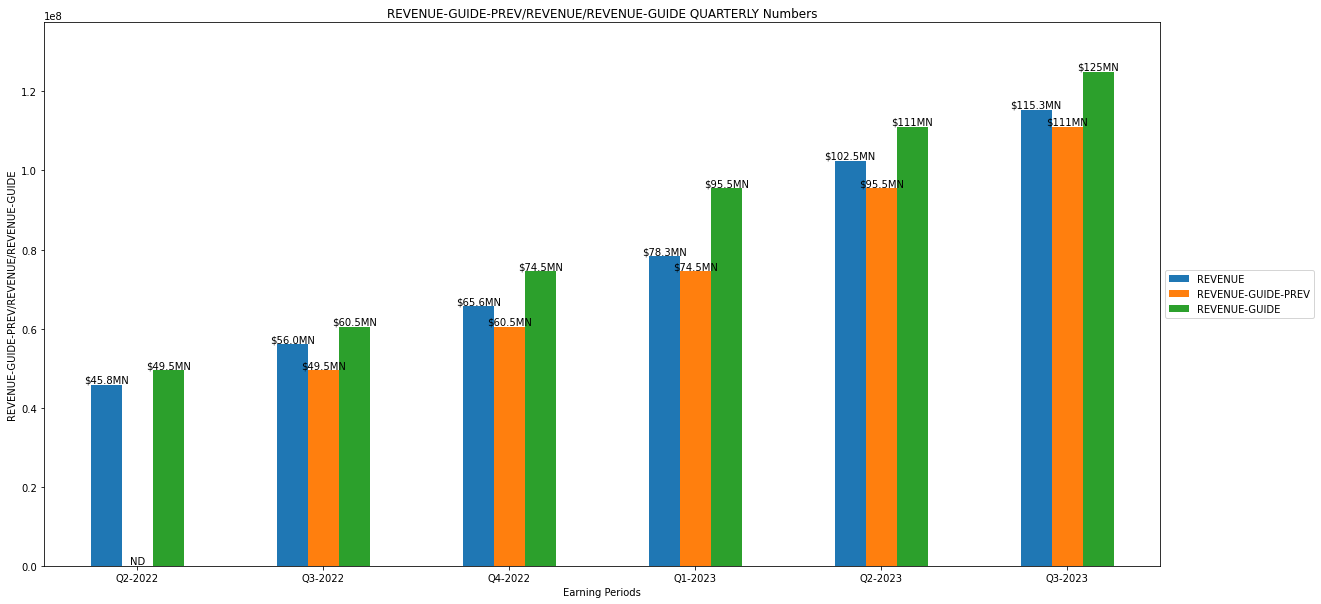

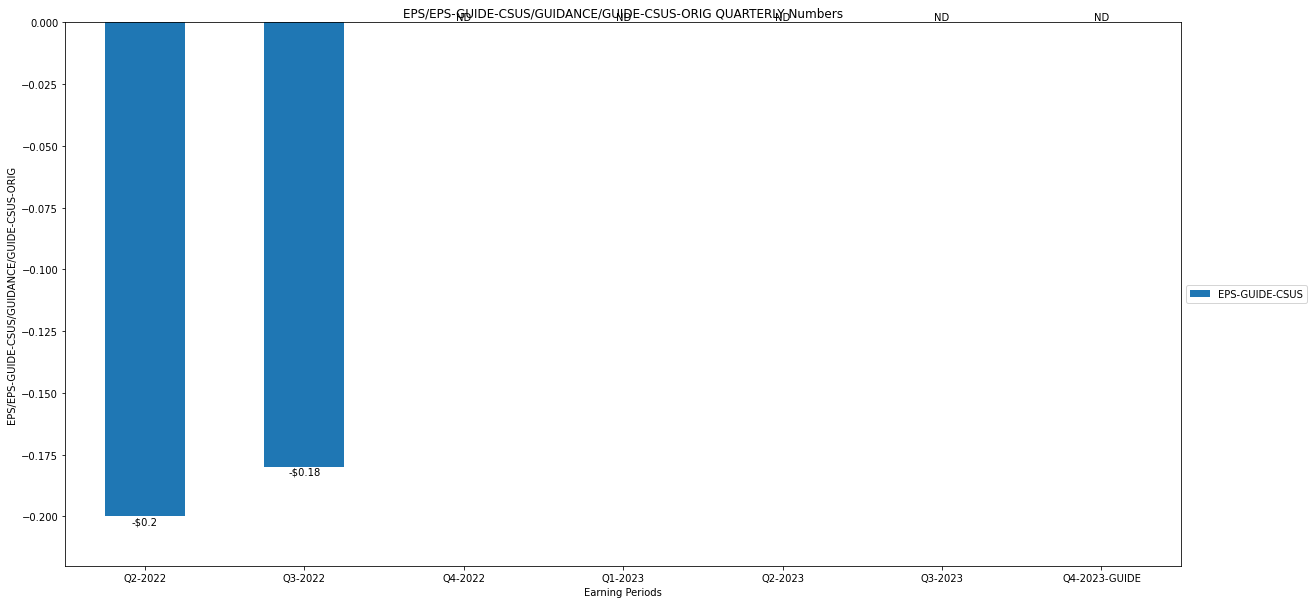

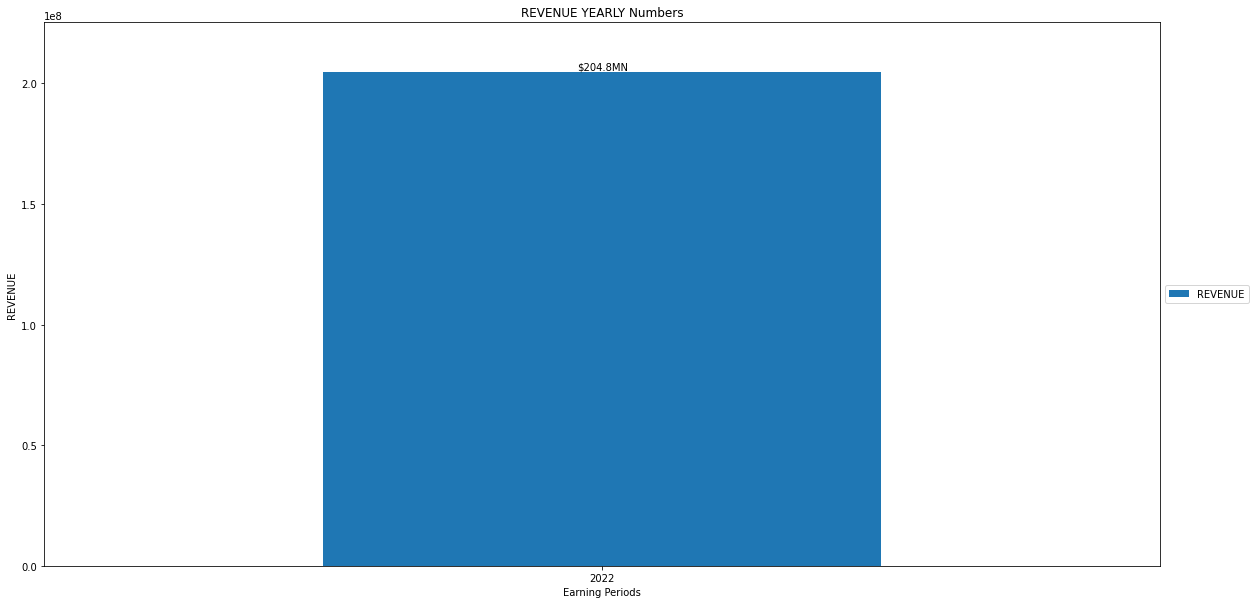

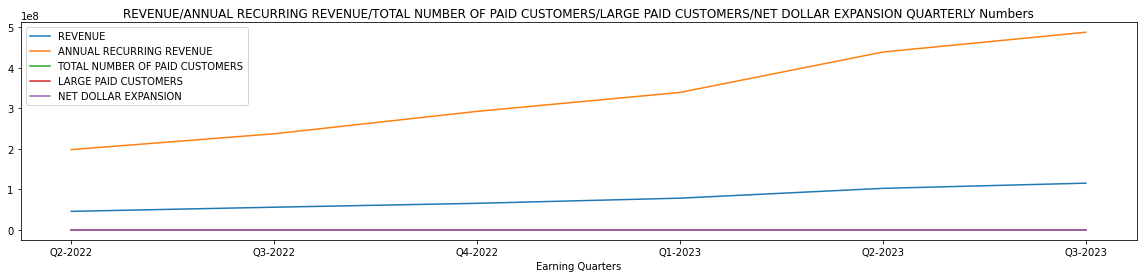

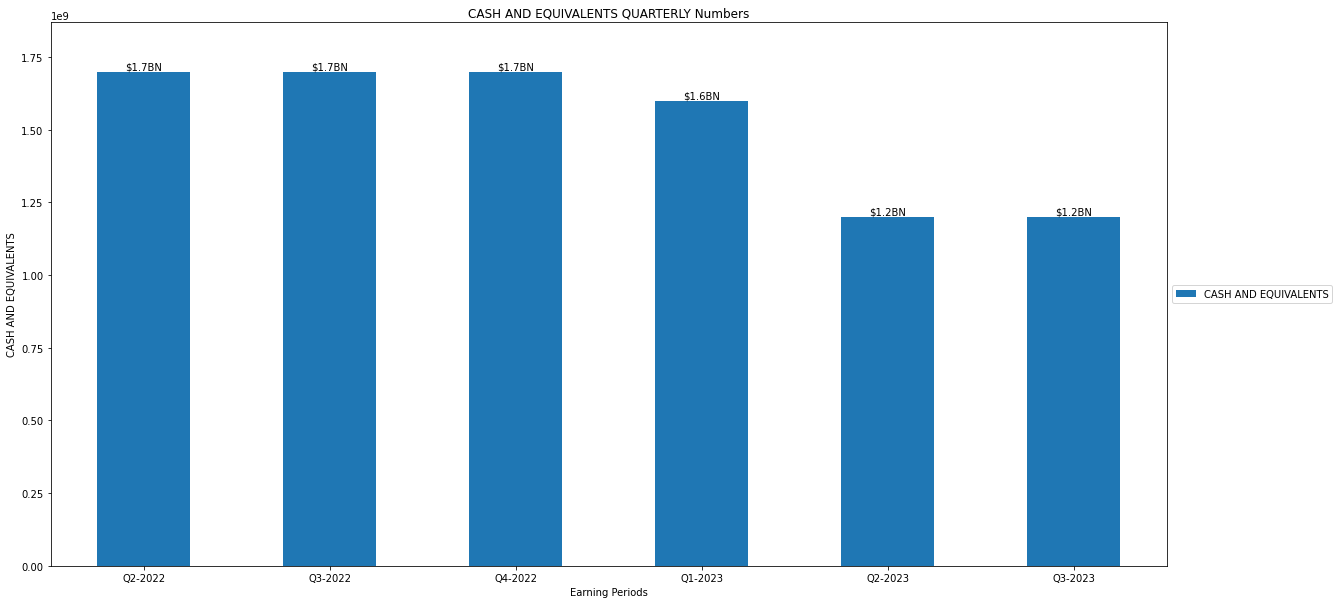

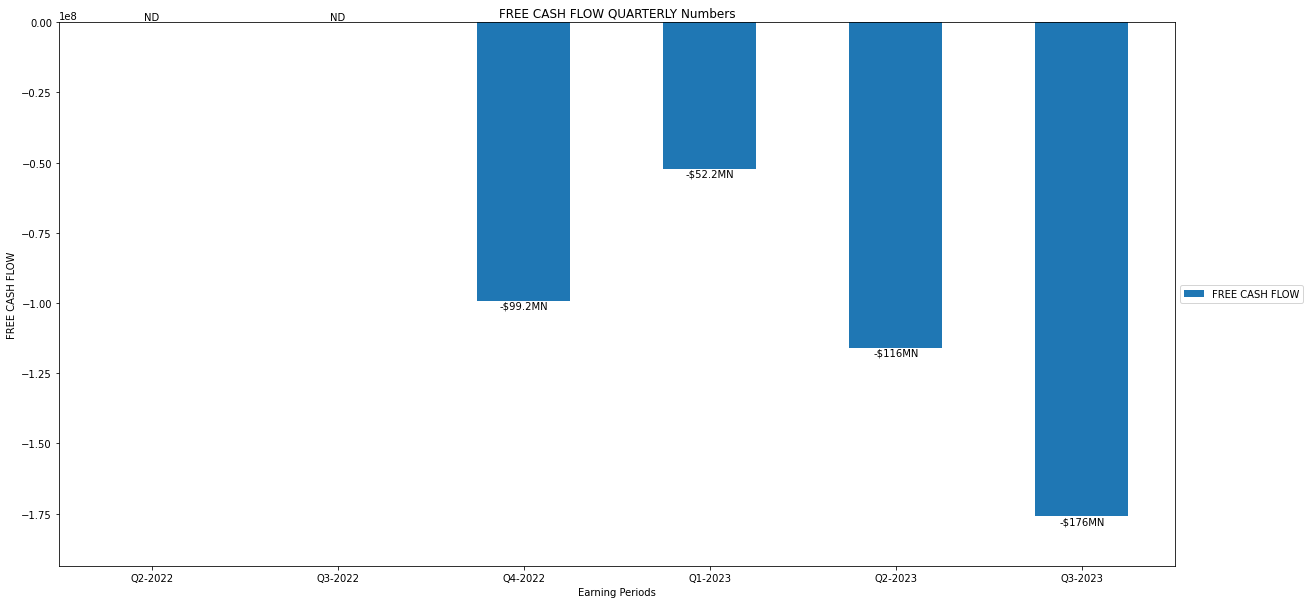

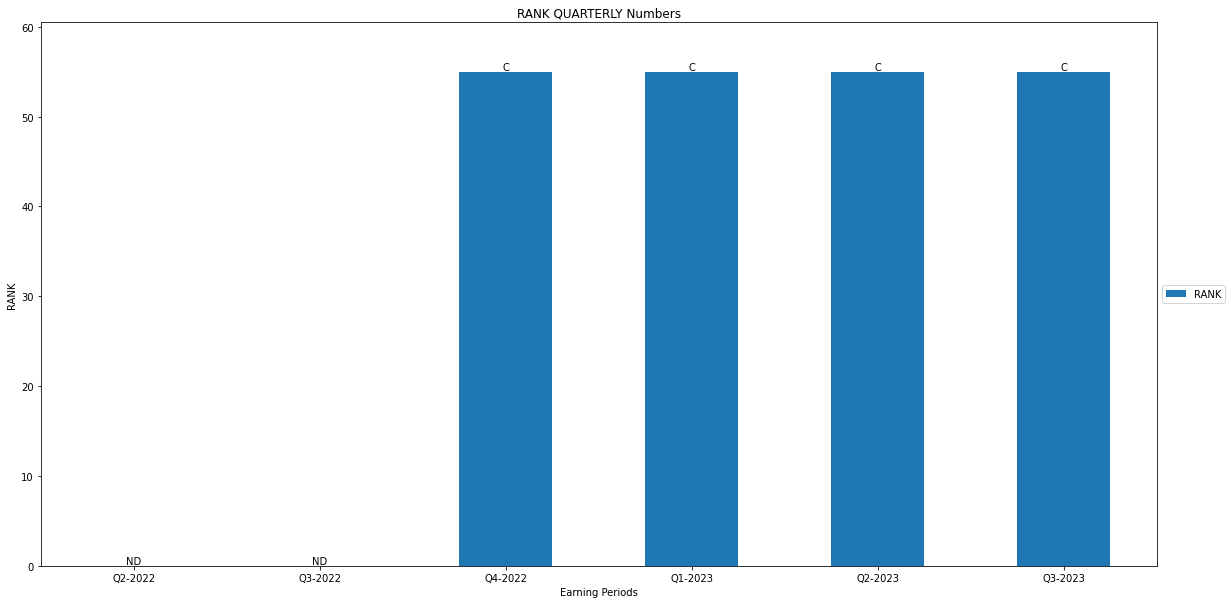

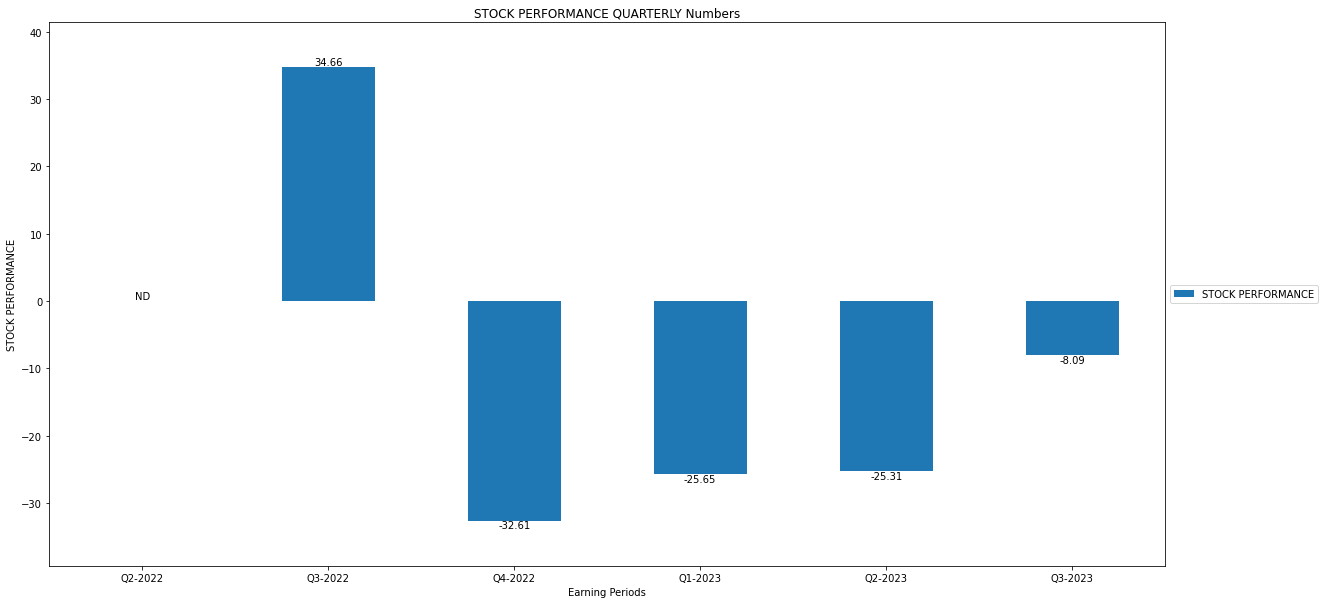

In [944]:
print(file)
if(file and orgData and entities):
    val = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")
    basefile = os.path.basename(file)
    filename = os.path.splitext(basefile)[0]
    edate = None
    #print(filename)
    fsplit = filename.split("-")
    if(len(fsplit) > 3):
        edate = fsplit[1]+"-"+fsplit[2]+"-"+fsplit[3].split("_")[0]
    else:
        fsplit = filename.split("_")
        edate = fsplit[1]
    #args = list()
    #print("EARNING DATE", edate)
    if(val):
        dobj = datetime.strptime(val, "%B")
        fynd = (dobj.month)
        allEntities["QTRS"] = getQtrs(csym, edate, fynd)
        #print(allEntities["QTRS"])
        
    for index,faq in enumerate(faqs):
        nf = False
        allEntities["SELF"] = None
        allEntities["SELF"] = dict()
        allEntities["SELF"]["*ORG"] = csym
        #print(faq["ENTITY"])
        for item in faq["ENTITY"]:
            #print(item, faq["ENTITY"][item])
            allEntities["SELF"]["*"+item] = faq["ENTITY"][item]
        if "FUNCTION" in faq:
            allEntities["SELF"]["*FUNCTION"] = faq["FUNCTION"]
        if "ARGS" in faq:
            allEntities["SELF"]["*ARGS"] = faq["ARGS"]
        if "FILTER" in faq:
            allEntities["SELF"]["*FILTER"] = faq["FILTER"]
        if "FILTERTYPE" in faq:
            allEntities["SELF"]["*FILTERTYPE"] = faq["FILTERTYPE"]
        if "FIELDS" in faq:
            allEntities["SELF"]["*FIELDS"] = faq["FIELDS"]
        if "SEARCH" in faq:
            allEntities["SELF"]["*SEARCH"] = faq["SEARCH"]
        if "INDEX" in faq:
            allEntities["SELF"]["*INDEX"] = faq["INDEX"]
        #print(allEntities["SELF"])
        print(str(index+1)+".", faq["Q"])
        ans = (faq["ANS"])
        #print(ans, faq["VARIABLES"])
        if "VARIABLES" not in faq or faq["VARIABLES"] is None:
            template = faq["TEMPLATE"]
            #print(template)
            #print(templates[template]["VARIABLES"])
            variables = templates[template]["VARIABLES"]
        else:
            variables = faq["VARIABLES"]
        for item in variables:
            var = item["VAR"]
            source = item["SOURCE"]
            how = item["HOW"]
            if "FIELD" not in item or item["FIELD"] is None:
                allEntities["SELF"][var] = getAttr(allEntities, source, None)
            else:
                field = item["FIELD"][0]
                if ("*" not in field and var not in allEntities["SELF"] and (how == "EXACT" or how == "TRANSFORMTOSTR")):
                    allEntities["SELF"][var] = getAttr(allEntities, item["SOURCE"], item["FIELD"][0])
                    if(how == "TRANSFORMTOSTR"):
                        allEntities["SELF"][var] = "\n".join(allEntities["SELF"][var])
                    if allEntities["SELF"][var] is None:
                        ans = faq["NF"]
                        print(ans)
                        print("\n")
                        nf = True
                        break
                elif("*" in field and var not in allEntities["SELF"] and (how == "EXACT" or how == "TRANSFORMTOSTR")):
                    #print(field)
                    for ent in allEntities["SELF"]:
                        if(ent in field):
                            #print(ent, allEntities["SELF"][ent])
                            field = field.replace(ent, allEntities["SELF"][ent])
                    #field = field.replace("*","")
                    #print(field, var, source)
                    #print(allEntities["ENTITIES"]["Q3-2021"]["REVENUE-RESULT"]["ISBEATSTR"])
                    allEntities["SELF"][var] = getAttr(allEntities, item["SOURCE"], field)
                    if(how == "TRANSFORMTOSTR" and allEntities["SELF"][var] is not None):
                        allEntities["SELF"][var] = "\n".join(allEntities["SELF"][var])
                    
                    if allEntities["SELF"][var] is None:
                        ans = faq["NF"]
                        print(ans)
                        print("\n")
                        nf = True
                        break
                elif(how == "APICALL"):
                    func = item["FIELD"][0]
                    if func in allEntities["SELF"]:
                        func = allEntities["SELF"][func]
                        #print(func)
                    args = item["FIELD"][1]
                    if args in allEntities["SELF"]:
                        args = allEntities["SELF"][args]
                    if not args:
                        ans = faq["NF"]
                        print(ans)
                        print("\n")
                        nf = True
                        break
                    for i,v in enumerate(args):
                        #if "*" in args[i] and args[i] in allEntities["SELF"]:
                        if "*" in args[i] and args[i] in allEntities["SELF"]:
                            #print(args[i])
                            args[i] = allEntities["SELF"][args[i]]
                            #print(args[i])
                    #print(args)
                    if not func or not args:
                        ans = faq["NF"]
                        print(ans)
                        print("\n")
                        nf = True
                        break
                    allEntities["SELF"][var] = wfunc(func, args)
                #print(field)
                #print(item["VAR"], item["SOURCE"], item["FIELD"][0], getAttr(allEntities, item["SOURCE"], item["FIELD"][0]))
        
        if not nf:
            if ans and ans != "*CHART" and ans != "*FRAME" and ans != "*TABLE" and ans != "*PLOT":
                for ent in allEntities["SELF"]:
                    if(ent in ans):
                        ans = ans.replace(ent, allEntities["SELF"][ent])
                #ans = ans.replace("*","")
                print(ans)
            elif ans and ans == "*CHART":
                if(allEntities["SELF"]["*GDATA"]):
                    showGraph(allEntities["SELF"]["*GDATA"])
                else:
                    print("Not enough information is available.")
            elif ans and ans == "*PLOT":
                if(allEntities["SELF"]["*GDATA"]):
                    showPlot(allEntities["SELF"]["*GDATA"])
                else:
                    print("Not enough information is available.")
            elif ans and ans == "*TABLE":
                if(allEntities["SELF"]["*GDATA"]):
                    showTable(allEntities["SELF"]["*GDATA"])
                else:
                    print("Not enough information is available.")
            elif ans and ans == "*FRAME":
                print(allEntities["SELF"]["*FRAME"])
        
            print("\n")
            #print(allEntities["SELF"])

In [945]:
aggFields0 = ["LATEST-QTR", "*LATEST-QTR|GUIDE", "ORGDATA|ORGPROFILE|Sector", "*LATEST-QTR|REVENUE|TEXT-MONEY", "*LATEST-QTR|REVENUE-RESULT|ISBEATSTR", "*LATEST-QTR|REVENUE-RESULT|TEXT-MONEY", "*LATEST-QTR|REVENUE-QOQ|TEXT-PCT", "*LATEST-QTR|REVENUE-YOY|TEXT-PCT", "*LATEST-QTR|REVENUE-GUIDE-RESULT|ISBEATSTR", "*LATEST-QTR|REVENUE-GUIDE-QOQ|TEXT-PCT", "*LATEST-QTR|REVENUE-GUIDE-YOY|TEXT-PCT", "*LATEST-QTR|REVENUE-GUIDEFULL-YOY|TEXT-PCT", "*LATEST-QTR|REVENUE-GUIDEFULL-RESULT|ISBEATSTR", "*LATEST-QTR|EPS|TEXT-MONEY", "*LATEST-QTR|EPS-RESULT|ISBEATSTR", "*LATEST-QTR|EPS-GUIDE-RESULT|ISBEATSTR", "*LATEST-QTR|GAAP-EPS|TEXT-MONEY"]
aggLabels0 = ["Latest Qtr", "Guide Qtr", "Sector", "Rev", "Rev Beat?", "Rev Surprise", "Rev QoQ Growth", "Rev YoY Growth", "Rev Guide Beat?", "Rev Guide QoQ Growth", "Rev Guide YoY Growth", "Rev FullYear Guide YoY Growth", "Rev FullYear Guide Raise?", "NON-GAAP EPS", "NON-GAAP EPS Beat?", "NON-GAAP EPS Guide Beat?", "GAAP-EPS"]

gData = getEntAttrTable(aggFields0, aggLabels0)
showTable(gData)

aggFields1 = ["LATEST-QTR", "*LATEST-QTR|GUIDE", "*LATEST-QTR|TOTAL NUMBER OF PAID CUSTOMERS|TEXT-CD||*LATEST-QTR|TOTAL NUMBER OF CUSTOMERS|TEXT-CD", "*LATEST-QTR|LARGE PAID CUSTOMERS|TEXT-CD||*LATEST-QTR|NEW PAID CUSTOMERS|TEXT-CD", "*LATEST-QTR|LARGE PAID CUSTOMERS-QOQ|RTEXT-PCT||*LATEST-QTR|NEW PAID CUSTOMERS-QOQ|RTEXT-PCT", "*LATEST-QTR|NET DOLLAR EXPANSION|TEXT-PCT", "*LATEST-QTR|CASH AND EQUIVALENTS|RTEXT-MONEY", "*LATEST-QTR|CASH AND EQUIVALENTS-QOQ|RTEXT-PCT", "*LATEST-QTR|GAAP GROSS PROFIT|RTEXT-MONEY", "*LATEST-QTR|GAAP GROSS MARGIN|TEXT-PCT||*LATEST-QTR|GROSS MARGIN|TEXT-PCT", "*LATEST-QTR|GAAP FREE CASH FLOW|RTEXT-MONEY||*LATEST-QTR|FREE CASH FLOW|RTEXT-MONEY", "*LATEST-QTR|GAAP FREE CASH FLOW MARGIN|TEXT-PCT||*LATEST-QTR|FREE CASH FLOW MARGIN|TEXT-PCT", "*LATEST-QTR|GAAP FREE CASH FLOW-QOQ|RTEXT-PCT||*LATEST-QTR|FREE CASH FLOW-QOQ|RTEXT-PCT", "*LATEST-QTR|NON-GAAP FREE CASH FLOW|RTEXT-MONEY||*LATEST-QTR|NON-GAAP ADJUSTED FREE CASH FLOW|RTEXT-MONEY", "*LATEST-QTR|NON-GAAP FREE CASH FLOW-QOQ|RTEXT-PCT||*LATEST-QTR|NON-GAAP ADJUSTED FREE CASH FLOW-QOQ|RTEXT-PCT"]
aggLabels1 = ["Latest Qtr", "Guide Qtr", "TOTAL NUMBER OF PAID CUSTOMERS", "Large Paid Customers", "Large Paid Customers QoQ Growth", "Net Dollar Expansion", "Cash And Equivalents", "Cash And Equivalents QoQ Growth", "GAAP Gross Profit", "GAAP Gross Margin", "GAAP FCF", "GAAP FCF Margin", "GAAP FCF QoQ Growth", "NON-GAAP FCF", "NON-GAAP FCF QoQ Growth"]
gData = getEntAttrTable(aggFields1, aggLabels1)
showTable(gData)

,Latest Qtr,Guide Qtr,Sector,Rev,Rev Beat?,Rev Surprise,Rev QoQ Growth,Rev YoY Growth,Rev Guide Beat?,Rev Guide QoQ Growth,Rev Guide YoY Growth,Rev FullYear Guide YoY Growth,Rev FullYear Guide Raise?,NON-GAAP EPS,NON-GAAP EPS Beat?,NON-GAAP EPS Guide Beat?,GAAP-EPS
APPN,Q3-2022,Q4-2022,TECHNOLOGY,$117.9MN,Yes,$4.25MN,7.08%,27.57%,None,3.9%,16.67%,25.51%,No,-$0.43,No,None,-$0.61
BILL,Q1-2023,Q2-2023,TECHNOLOGY,$229.9MN,Yes,$43.2MN,14.84%,97.5%,None,5.7%,55.27%,55.84%,Yes,$0.14,Yes,None,-$0.78
CFLT,Q3-2022,Q4-2022,TECHNOLOGY,$151.7MN,Yes,$9.54MN,8.82%,48.19%,None,6.79%,35.11%,49.27%,Yes,-$0.13,Yes,None,-$0.41
CRWD,Q3-2023,Q4-2023,TECHNOLOGY,$580.9MN,Yes,$7.07MN,8.54%,52.87%,No,7.36%,44.7%,53.62%,Yes,$0.4,Yes,Yes,-$0.24
DDOG,Q3-2022,Q4-2022,TECHNOLOGY,$436.5MN,Yes,$26.8MN,7.49%,61.0%,None,2.41%,37.03%,60.39%,Yes,$0.23,Yes,None,-$0.08
DOCN,Q3-2022,Q4-2022,TECHNOLOGY,$152.1MN,Yes,$5.55MN,13.59%,33.0%,None,5.85%,34.5%,33.92%,Yes,$0.38,Yes,None,$0.1
DOCU,Q2-2023,Q3-2023,TECHNOLOGY,$622.2MN,Yes,$19.5MN,5.69%,21.56%,No,0.61%,14.76%,17.62%,Yes,$0.44,Yes,None,-$0.22
FIVN,Q3-2022,Q4-2022,TECHNOLOGY,$198.3MN,Yes,$5.75MN,4.7%,28.49%,None,3.13%,17.8%,27.13%,No,$0.39,Yes,None,-$0.33
HUBS,Q3-2022,Q4-2022,TECHNOLOGY,$444.0MN,Yes,$1.98MN,5.26%,30.9%,None,0.23%,20.5%,31.23%,Yes,$0.73,Yes,None,$0
MDB,Q3-2023,Q4-2023,TECHNOLOGY,$333.6MN,Yes,$30.1MN,9.85%,47.03%,Yes,0.57%,25.89%,44.03%,Yes,$0.23,Yes,Yes,-$1.23


,Latest Qtr,Guide Qtr,TOTAL NUMBER OF PAID CUSTOMERS,Large Paid Customers,Large Paid Customers QoQ Growth,Net Dollar Expansion,Cash And Equivalents,Cash And Equivalents QoQ Growth,GAAP Gross Profit,GAAP Gross Margin,GAAP FCF,GAAP FCF Margin,GAAP FCF QoQ Growth,NON-GAAP FCF,NON-GAAP FCF QoQ Growth
APPN,Q3-2022,Q4-2022,None,None,None,115.0%,$92.7MN,(32.83%),$84.1MN,71.36%,None,None,None,None,None
BILL,Q1-2023,Q2-2023,"419,800",None,None,None,$1.61BN,0.78%,$184.8MN,80.38%,$16.8MN,7.3%,238.84%,None,None
CFLT,Q3-2022,Q4-2022,None,921,7.47%,None,$503MN,(4.96%),$98.6MN,64.95%,-$45.6MN,-30.06%,(23.58%),None,None
CRWD,Q3-2023,Q4-2023,"21,146","1,460",(16.14%),None,$2.47BN,6.47%,$423MN,72.76%,$174.1MN,29.97%,28.2%,None,None
DDOG,Q3-2022,Q4-2022,None,"2,600",7.44%,None,$1.8BN,5.88%,$343MN,78.56%,$67.1MN,15.37%,11.46%,None,None
DOCN,Q3-2022,Q4-2022,None,"142,000",35.24%,118.0%,$825MN,(31.25%),$97.6MN,64.15%,$22.4MN,14.73%,(18.84%),None,None
DOCU,Q2-2023,Q3-2023,None,None,None,None,$1129.6MN,6.19%,$485MN,78.0%,$105.5MN,16.96%,(39.58%),None,None
FIVN,Q3-2022,Q4-2022,None,None,None,None,$129MN,27.81%,$104MN,52.6%,$10.1MN,5.09%,214.12%,None,None
HUBS,Q3-2022,Q4-2022,"158,905",None,None,None,$1.4BN,0.0%,$362MN,81.5%,$35.5MN,8.0%,58.48%,None,None
MDB,Q3-2023,Q4-2023,"39,100",None,None,None,$1.8BN,0.0%,$240.0MN,71.93%,-$8.4MN,-2.52%,82.72%,None,None


Text(0, 0.5, 'Revenue')

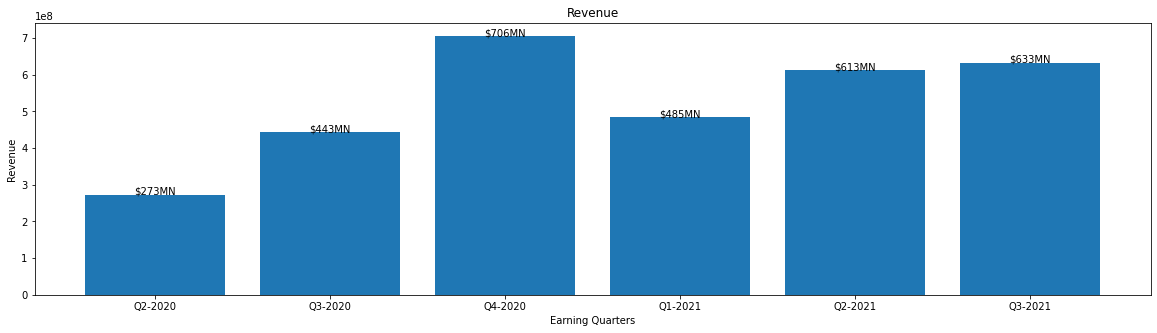

In [989]:
import matplotlib.pyplot as plt
import numpy as np
revenue = {"Q2-2020":273000000,"Q3-2020":443000000,"Q4-2020":706000000,"Q1-2021":485000000,"Q2-2021":613000000,"Q3-2021":633000000}
revtext = {"Q2-2020":"$273MN","Q3-2020":"$443MN","Q4-2020":"$706MN","Q1-2021":"$485MN","Q2-2021":"$613MN","Q3-2021":"$633MN"}
keys = revenue.keys()
#print(keys)
values = revenue.values()
plt.figure(figsize = (20,5))
plt.bar(keys, values, align='center')
for item in revenue:
    if(item in revtext):
        plt.text(item, revenue[item], (revtext[item]), ha = 'center')
#plt.bar(X_axis + 0.2, values, align='center')
plt.title("Revenue")
plt.xlabel("Earning Quarters")
plt.ylabel("Revenue")

,Q4-2020,Q1-2021,Q2-2021,Q3-2021
REVENUE,NaN,273.0,443.0,706.0
MAU,NaN,458.0,469.0,444.0


<AxesSubplot:title={'center':'Revenue/MAUs Quarterly Numbers'}, xlabel='Earning Quarters'>

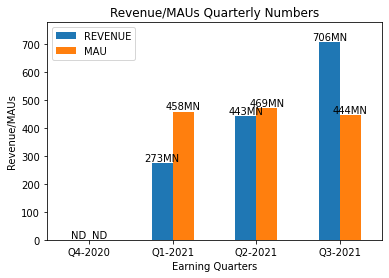

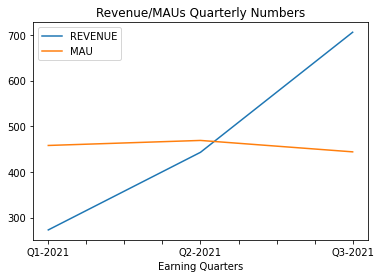

In [109]:
import pandas as pd
from IPython.display import display
revenue = [None, 273,443,706]
revenuetxt = ["ND", "273MN","443MN","706MN"]
mau = [None, 458,469,444]
mautxt = ["ND", "458MN","469MN","444MN"]
index = ["Q4-2020", "Q1-2021","Q2-2021","Q3-2021"]
#print(revenue,mau,index)

df = pd.DataFrame(data={'REVENUE': revenue, 'MAU': mau}, index=index)
ax = df.plot(kind='bar', rot=0, xlabel='Earning Quarters', ylabel='Revenue/MAUs', title='Revenue/MAUs Quarterly Numbers', figsize=(6, 4))
for c in ax.containers:
    # set the bar label
    clbl = (c.get_label())
    if(clbl == "REVENUE"):
        ax.bar_label(c, labels=revenuetxt, fmt='%.0f', label_type='edge')
    else:
        ax.bar_label(c, labels=mautxt, fmt='%.0f', label_type='edge')

ax.margins(y=0.1)
display(df.T)
df.plot(xlabel='Earning Quarters', title="Revenue/MAUs Quarterly Numbers")

{'DATA': {'REVENUE': [1142761000, 1692658000]}, 'TEXT': {'REVENUE': ['$1BN', '$2BN']}, 'INDEX': ['ALL-2019', 'ALL-2020'], 'FIELDS': ['REVENUE'], 'CALENDAR': 'Yearly'}


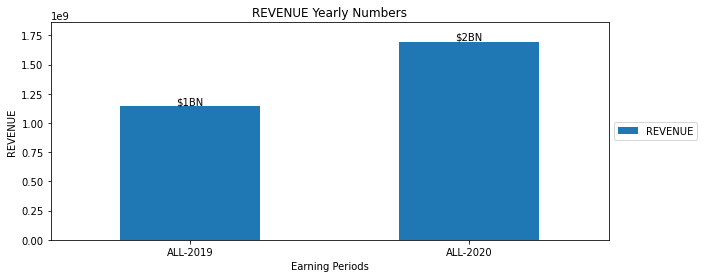

In [67]:
args = list()
args.append(allEntities["ENTITIES"])
#args.append("Q\d+-[0-9][0-9][0-9][0-9]")
args.append("ALL-[0-9][0-9][0-9][0-9]")
#fields = ["REVENUE","GLOBAL MONTHLY ACTIVE USERS"]
#fields = ["REVENUE-GUIDE-CSUS","REVENUE"]
fields = ["REVENUE"]
args.append(fields)
args.append("Yearly")
#args.append(8)
gData = getTableData(args)
print(gData)
showGraph(gData)

['GLOBAL MONTHLY ACTIVE USERS',
 'REVENUE - GLOBAL',
 'REVENUE - UNITED STATES',
 'REVENUE - INTERNATIONAL',
 'MONTHLY ACTIVE USERS - GLOBAL',
 'MONTHLY ACTIVE USERS - UNITED STATES',
 'MONTHLY ACTIVE USERS - INTERNATIONAL',
 'ACTIVE REVENUE PER USER - GLOBAL',
 'ACTIVE REVENUE PER USER - UNITED STATES',
 'ACTIVE REVENUE PER USER - INTERNATIONAL']

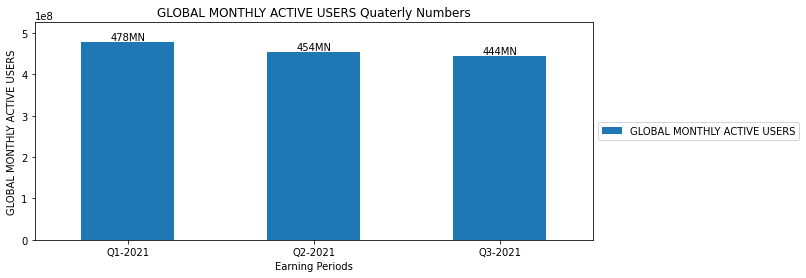

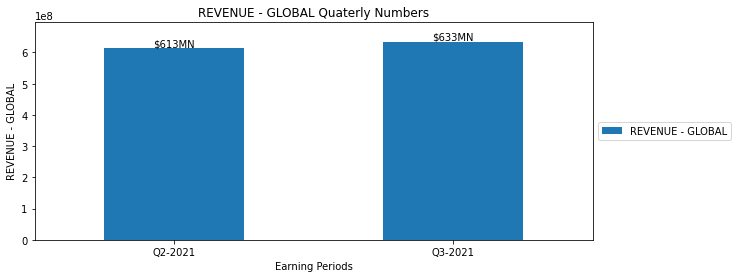

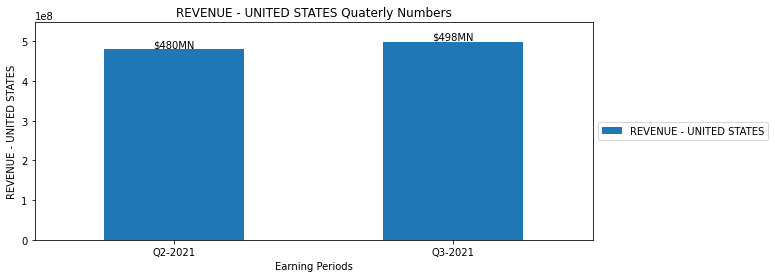

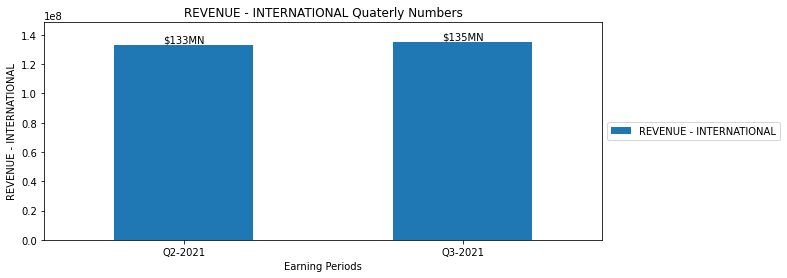

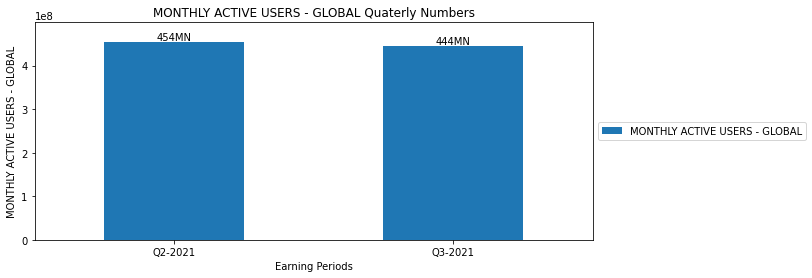

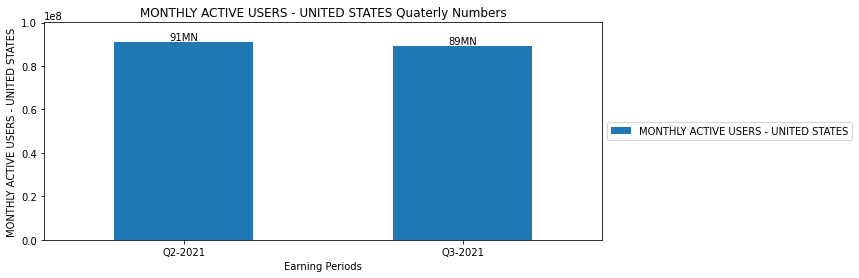

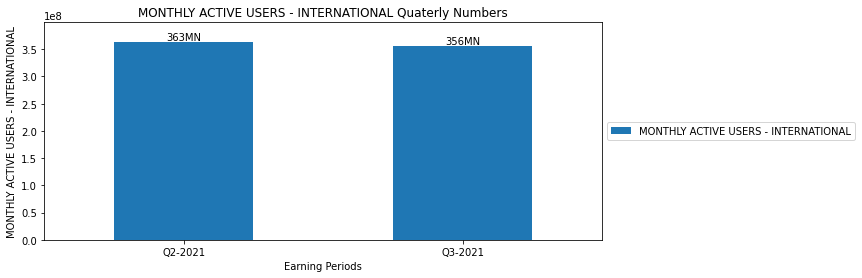

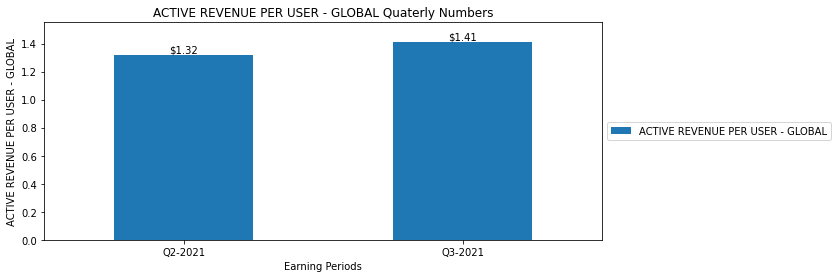

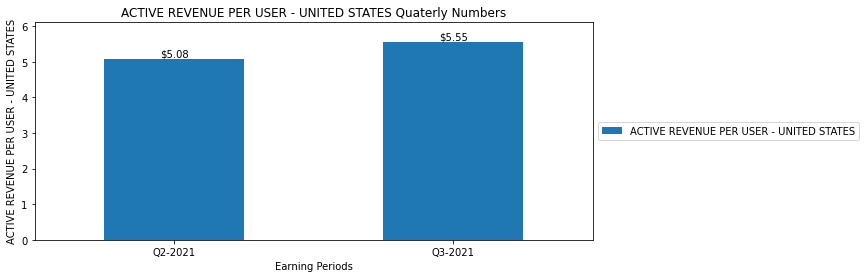

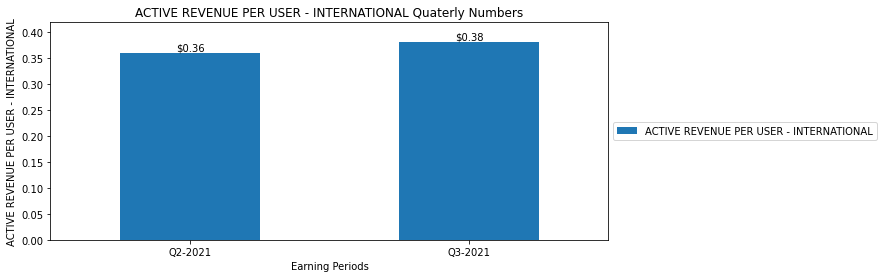

In [68]:
#args.append("ALL-[0-9][0-9][0-9][0-9]")
#fields = ["REVENUE","GLOBAL MONTHLY ACTIVE USERS"]
#fields = ["REVENUE-GUIDE-CSUS","REVENUE"]
args = list()
args.append(allEntities["ENTITIES"])
args.append("Q\d+-[0-9][0-9][0-9][0-9]")
args.append("Quaterly")
args.append("TEXT-METRICTYPE")
args.append("OPMETRIC")
showGraphWithCondition(args)

In [69]:
attr = getAttr(allEntities, "ORGDATA", "MAJORTRANS|ROSTERS")
#print(attr)
df = pd.read_json(attr)
#print(df)
index = "Individual or Entity"
search = "Most Recent Transaction"
df[index] = df[index].str.upper()
#print(df["Holder"])

newdf = df[df[search].str.contains("|".join(["Purchase","Sale"]))]
newdf = newdf.set_index(index)
#print(len(newdf))
if(len(newdf) > 0):
    print(newdf)
#print(df)

                                         Most Recent Transaction  \
Individual or Entity                                               
FLORES CHRISTINEGENERAL COUNSEL                             Sale   
GAVINI NAVEENOFFICER                                        Sale   
MORGENFELD TODD RCHIEF FINANCIAL OFFICER                    Sale   
YANG TSELI LILYOFFICER                                      Sale   

                                                  Date  \
Individual or Entity                                     
FLORES CHRISTINEGENERAL COUNSEL           Jun 27, 2021   
GAVINI NAVEENOFFICER                      Sep 12, 2021   
MORGENFELD TODD RCHIEF FINANCIAL OFFICER  Jun 27, 2021   
YANG TSELI LILYOFFICER                    Aug 26, 2021   

                                         Shares Owned as of Transaction Date  
Individual or Entity                                                          
FLORES CHRISTINEGENERAL COUNSEL                                       294872  
GAVIN

In [412]:
org = "ZM"
path = "../../Summary/entities/"+org+"-ENTITIES.json"
relateFrmFile = True
entities = getReportForOrg(org, nlpModel, nlpWebtf, relateFrmFile)

newEnt = dict()
newEnt[org] = dict()
newEnt[org] = collections.OrderedDict(sorted(entities[org].items(), key=lambda k: (str(k[0].split("-")[1]), str(k[0].split("-")[0])), reverse=True))
#print(newEnt[org]["COMPANY-NAME"])
newEnt[org]["LAST-UPDATE"] = str(date.today())

json_object = json.dumps(newEnt, indent = 4)
  
with open(path, "w") as outfile:
    outfile.write(json_object)
entities = newEnt

['../../Summary/Refined\\ZM-2022-02-28_14-46-18.038611.txt', '../../Summary/Refined\\ZM-2021-11-22_17-33-05.770525.txt', '../../Summary/Refined\\ZM-2021-08-30_16-24-12.513458.txt', '../../Summary/Refined\\ZM-2021-06-01_13-15-52.501544.txt']
../../Summary/Refined\ZM-2022-02-28_14-46-18.038611.txt
ZM-2022-02-28_14-46-18.038611
78

EARNING DATE 2022-02-28
FROMFILEEEEEEE False
RELATEFROMFILEEEEEEE True

EARNING DATE 2022-02-28

QUARTER INFORMATION
{'CQTR': 'Q1', 'GQTR': 'Q1', 'CYR': '2022', 'GYR': '2022', 'EQTR': 'Q4', 'PQTR': 'Q3', 'Q1': {'START': 2, 'SM': 'FEB', 'END': 4, 'EM': 'APR'}, 'Q2': {'START': 5, 'SM': 'MAY', 'END': 7, 'EM': 'JUL'}, 'Q3': {'START': 8, 'SM': 'AUG', 'END': 10, 'EM': 'OCT'}, 'Q4': {'START': 11, 'SM': 'NOV', 'END': 1, 'EM': 'JAN'}, 'EYR': '2022', 'PYR': '2021', 'CFYR': '2023', 'FYR': '2022', 'EFYR': '2022', 'PFYR': '2022', 'GFYR': '2023'}
ORIGINAL SENTENCE 1 url=https://finance.yahoo.com/news/zoom-video-communications-reports-fourth-210500135.html
PREFIXXXXXXXXXXXXXX

Sentences
 ['; full fiscal year non-GAAP income from operations of $1,657.1 million, up 69% year over year.']
NON-GAAP INCOME FROM OPERATIONS [[('8', 'LINE', -1, -1), ('REGULAR', 'SECTION', -1, -1), ('Fourth quarter', 'CALENDAR', 0, 2), ('$420.3 million', 'MONEY', 9, 12), ('up', 'CHG', 13, 14), ('16%', 'PCT', 14, 16), ('year over year', 'CALENDAR', 16, 19), ('Fourth quarter non-GAAP income from operations of $420.3 million, up 16% year over year', 'SENTENCE', -1, -1)]]
NER [('full fiscal', 'CALENDAR', 1, 3), ('non-GAAP', 'METRIC', 4, 7), ('income from operations', 'METRIC', 7, 10), ('$1,657.1 million', 'MONEY', 11, 14), ('up', 'CHG', 15, 16), ('69%', 'PCT', 16, 18), ('year over year', 'CALENDAR', 18, 21)]
SPLIT SENTENCE ; full fiscal year non-GAAP income from operations of $1,657.1 million, up 69% year over year.
SECTIONNNNNN REGULARFULL
SPL SECTIONNNNNNNNNNNNN None ; full fiscal year non-GAAP income from operations of $1,657.1 million, up 69% year over year.
ORIGINAL SENTENCE 10 PG***

NER []
SPLIT SENTENCE Looking forward, we are addressing a large opportunity as
SECTIONNNNNN REGULAR
SPL SECTIONNNNNNNNNNNNN None Looking forward, we are addressing a large opportunity as we expect customers will continue to transform how they work and engage with their customers.
NER []
SPLIT SENTENCE we expect customers will continue to transform how
SECTIONNNNNN REGULAR
SPL SECTIONNNNNNNNNNNNN None Looking forward, we are addressing a large opportunity as we expect customers will continue to transform how they work and engage with their customers.
NER []
SPLIT SENTENCE we expect they work and
SECTIONNNNNN REGULAR
SPL SECTIONNNNNNNNNNNNN None Looking forward, we are addressing a large opportunity as we expect customers will continue to transform how they work and engage with their customers.
NER []
SPLIT SENTENCE we expect they engage with their customers.
SECTIONNNNNN REGULAR
SPL SECTIONNNNNNNNNNNNN None Looking forward, we are addressing a large opportunity as we expect customers w

Sentences
 ['After adjusting for stock-based compensation expense and related payroll taxes, and acquisition-related expenses, non-GAAP income from operations for the fourth quarter was $420.3 million, up from $360.9 million in the fourth quarter of fiscal year 2021. :::Income from Operations and Operating Margin']
NER [('stock-based compensation', 'METRIC', 3, 7), ('expense', 'CHG', 7, 8), ('non-GAAP', 'METRIC', 19, 22), ('income from operations', 'METRIC', 22, 25), ('fourth quarter', 'CALENDAR', 27, 29), ('$420.3 million', 'MONEY', 30, 33), ('up', 'CHG', 34, 35), ('$360.9 million', 'MONEY', 36, 39), ('fourth quarter', 'CALENDAR', 41, 43), ('2021', 'YEAR', 46, 47), ('Income from Operations', 'METRIC', 51, 54), ('Operating Margin', 'METRIC', 55, 57)]
SPLIT SENTENCE After adjusting for stock-based compensation expense and related payroll taxes, and acquisition-related expenses, non-GAAP income from operations for the fourth quarter was $420.3 million, up from $360.9 million in the fourt

Sentences
 ['Non-GAAP net income per share was $1.29.']
NER [('Non-GAAP', 'METRIC', 0, 3), ('net income per share', 'METRIC', 3, 7), ('$1.29', 'MONEY', 8, 10)]
SPLIT SENTENCE Non-GAAP net income per share was $1.29.
SECTIONNNNNN REGULAR
SPL SECTIONNNNNNNNNNNNN None Non-GAAP net income per share was $1.29.
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
ORIGINAL SENTENCE 26 In the fourth quarter of fiscal year 2021, non-GAAP net income was $365.4 million, or $1.22 per share.
PREFIXXXXXXXXXXXXXXXX 
NEW SENTENCE In the fourth quarter of fiscal year 2021, non-GAAP net income was $365.4 million, or $1.22 per share.
Sentences
 ['fourth quarter 2021 In the fourth quarter of fiscal year 2021, non-GAAP net income was $365.4 million, or $1.22 per share.']
NER [('fourth quarter', 'CALENDAR', 0, 2), ('2021', 'YEAR', 2, 3), ('fourth quarter', 'CALENDAR', 5, 7), ('2021', 'YEAR', 10, 11), ('non

NER [('Income from Operations', 'METRIC', 0, 3), ('Operating Margin', 'METRIC', 4, 6), ('GAAP', 'METRIC', 8, 9), ('income from operations', 'METRIC', 9, 12), ('$1,063.6 million', 'MONEY', 17, 20), ('GAAP', 'METRIC', 23, 24), ('income from operations', 'METRIC', 24, 27), ('$659.8 million', 'MONEY', 28, 31), ('2021', 'YEAR', 34, 35)]
SPLIT SENTENCE Income from Operations and Operating Margin:  GAAP income from operations for the fiscal year was $1,063.6 million, compared to GAAP income from operations of $659.8 million for fiscal year 2021.
SECTIONNNNNN COMPAREFULL
SPL SECTIONNNNNNNNNNNNN None Income from Operations and Operating Margin:  GAAP income from operations for the fiscal year was $1,063.6 million, compared to GAAP income from operations of $659.8 million for fiscal year 2021.
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING.

Sentences
 ['Non-GAAP net income for the fiscal year was $1,549.1 million, after adjusting for stock-based compensation expense and related payroll taxes, expenses related to charitable donation of common stock, acquisition-related expenses, gains on strategic investments, litigation settlements, net, income tax benefits from discrete activities, and undistributed earnings attributable to participating securities.']
NER [('Non-GAAP', 'METRIC', 0, 3), ('net income', 'METRIC', 3, 5), ('$1,549.1 million', 'MONEY', 10, 13), ('stock-based compensation', 'METRIC', 17, 21), ('expense', 'CHG', 21, 22)]
SPLIT SENTENCE Non-GAAP net income for the fiscal year was $1,549.1 million, after adjusting for stock-based compensation expense and related payroll taxes, expenses related to charitable donation of common stock, acquisition-related expenses, gains on strategic investments, litigation settlements, net, income tax benefits from discrete activities, and undistributed earnings attributable to part

 ['2,725 customers contributing more than $100,000 in trailing 12 months revenue, up approximately 66% from the same quarter last fiscal year.']
NER [('2,725', 'CD', 0, 1), ('customers contributing more than $100,000', 'METRIC', 1, 7), ('revenue', 'METRIC', 11, 12), ('up', 'CHG', 13, 14), ('66%', 'PCT', 15, 17), ('last fiscal year', 'CALENDAR', 21, 24)]
SPLIT SENTENCE 2,725 customers contributing more than $100,000 in trailing 12 months revenue, up approximately 66% from the same quarter last fiscal year.
SECTIONNNNNN REGULAR
SPL SECTIONNNNNNNNNNNNN None 2,725 customers contributing more than $100,000 in trailing 12 months revenue, up approximately 66% from the same quarter last fiscal year.
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
SENTENCE IS UNDER MANAGEMENT COMMENT, C

Sentences
 ['Going forward, Zoom will provide the following metrics in addition to the number of customers contributing more than $100,000 in trailing 12 months revenue: the number of Enterprise customers and the net dollar expansion rate for Enterprise customers.']
NER [('Zoom', 'ORG', 3, 4), ('customers contributing more than $100,000', 'METRIC', 15, 21), ('revenue', 'METRIC', 25, 26), ('Enterprise customers', 'MISC', 30, 32), ('Enterprise customers', 'MISC', 39, 41)]
SPLIT SENTENCE Going forward, Zoom will provide the following metrics in addition to the number of customers contributing more than $100,000 in trailing 12 months revenue: the number of Enterprise customers and the net dollar expansion rate for Enterprise customers.
SECTIONNNNNN REGULAR
SPL SECTIONNNNNNNNNNNNN None Going forward, Zoom will provide the following metrics in addition to the number of customers contributing more than $100,000 in trailing 12 months revenue: the number of Enterprise customers and the net doll

 ['First quarter non-GAAP diluted EPS is expected to be between $0.86 and $0.88 with approximately 309 million non-GAAP weighted average shares outstanding. :::First Quarter Fiscal Year 2023']
NER [('First quarter', 'CALENDAR', 0, 2), ('non-GAAP', 'METRIC', 2, 5), ('diluted EPS', 'METRIC', 5, 7), ('$0.86', 'MONEY', 12, 14), ('$0.88', 'MONEY', 15, 17), ('309 million', 'CD', 19, 21), ('non-GAAP', 'METRIC', 21, 24), ('average shares outstanding', 'METRIC', 25, 28), ('First Quarter', 'CALENDAR', 32, 34)]
SPLIT SENTENCE First quarter non-GAAP diluted EPS is expected to be between $0.86 and $0.88 with approximately 309 million non-GAAP weighted average shares outstanding. :::First Quarter Fiscal Year 2023
SECTIONNNNNN GUIDE
SPL SECTIONNNNNNNNNNNNN None First quarter non-GAAP diluted EPS is expected to be between $0.86 and $0.88 with approximately 309 million non-GAAP weighted average shares outstanding.
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
SENTENCE IS UNDER MANAGEMENT COMMENT,

SPL SECTIONNNNNNNNNNNNN None A reconciliation of non-GAAP guidance measures to corresponding GAAP measures is not available on a forward-looking basis without unreasonable effort due to the uncertainty of expenses that may be incurred in the future, although it is important to note that these factors could be material to Zoom's results computed in accordance with GAAP.
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
ORIGINAL SENTENCE 61 PG*** A supplemental financial presentation and other information can be accessed through Zoom’s investor relations website at investors.zoom.us.
PREFIXXXXXXXXXXXXXXXX 
NEW SENTENCE A supplemental financial presentation and other information can be accessed through Zoom’s investor relations website at investors.zoom.us.
Sentences
 ['A supplemental financial presentation and other information can be accessed through Zoom’s investor relations website at investors.zoom.us.']
NER [('Zoom', 'ORG', 11, 1

 ['Zoom Video Earnings Call.']
NER [('Zoom', 'ORG', 0, 1)]
SPLIT SENTENCE Zoom Video Earnings Call.
SECTIONNNNNN REGULAR
SPL SECTIONNNNNNNNNNNNN None Zoom Video Earnings Call.
SENTENCE IS UNDER MANAGEMENT COMMENT, CONTINUING...
ORIGINAL SENTENCE 70 PG*** Zoom will host a Zoom Video Webinar for investors on February 28, 2022 at 2:00 p.m. Pacific Time / 5:00 p.m. Eastern Time to discuss the company’s financial results, business highlights and financial outlook.
PREFIXXXXXXXXXXXXXXXX 
NEW SENTENCE Zoom will host a Zoom Video Webinar for investors on February 28, 2022 at 2:00 p.m. Pacific Time / 5:00 p.m. Eastern Time to discuss the company’s financial results, business highlights and financial outlook.
Sentences
 ['Zoom will host a Zoom Video Webinar for investors on February 28, 2022 at 2:00 p.m. Pacific Time / 5:00 p.m. Eastern Time to discuss the company’s financial results, business highlights and financial outlook.']
NER [('Zoom', 'ORG', 0, 1), ('Zoom', 'ORG', 4, 5), ('February 28, 2

IndexError: single positional indexer is out-of-bounds

In [439]:
def getLatestReportFileBkup(csym):
    path = "../../Summary/unsup"
    altPath = "../../Summary/EDGAR/8-k/"+csym
    entPath = "../../Summary/entities/"
    files = glob.glob(path+"/"+csym+"-*")   
    found = False
    if(len(files) > 0):
        files.sort(reverse=True, key=os.path.getmtime)
        for file in (files):
            basefile = os.path.basename(file)
            filename = os.path.splitext(basefile)[0]
            fsplit = filename.split("-")
            edate = fsplit[1]+"-"+fsplit[2]+"-"+fsplit[3].split("_")[0]
            entFile = csym+"_"+edate+"_EP.json"
            entFile = entPath+entFile
            if(os.path.exists(entFile)):
                return(file)
    if not found:
        files = glob.glob(altPath+"/"+csym+"_*")
        if(len(files) > 0):
            files.sort(reverse=True, key=os.path.getmtime)
            for file in files:
                basefile = os.path.basename(file)
                filename = os.path.splitext(basefile)[0]
                fsplit = filename.split("_")
                edate = fsplit[1]
                entFile = csym+"_"+edate+"_EP.json"
                entFile = entPath+entFile
                if(os.path.exists(entFile)):
                    return(file)
    return None

In [440]:
entPath = "../../Summary/entities/"
files = glob.glob(entPath+"/*-ENTITIES.json")   
search = "Q\d+-[0-9][0-9][0-9][0-9]"
ranks = dict()
orgs = dict()
if(len(files) > 0):
    for file in (files):
        basefile = os.path.basename(file)
        filename = os.path.splitext(basefile)[0]
        csym = filename.split("-")[0]
        file = entPath+"/"+csym+"-ENTITIES.json"
        with open(file, encoding="utf-8") as f:
            entity = json.load(f)
        for key in entity[csym]:
            if(re.search(search, key)):
                #print(key)
                rank = getStockRank(csym, entity, key, True)
                print(csym, rank, key)
                if key not in ranks:
                    ranks[key] = list()
                if csym not in orgs:
                    orgs[csym] = list()
                ranks[key].append((csym, rank))
                if(rank):
                    orgs[csym].append((key, rank))
                #if rank not in ranks:
                #    ranks[rank] = list()
                #ranks[rank].append(csym)
print("\n")
#for key in ranks:
#    print(key, len(ranks[key]))
#print(ranks)
print(orgs)

APPN REVENUE YOY GROWTH 27.57 False
APPN REVENUE GUIDE YOY GROWTH 16.67 False
APPN C Q3-2022
APPN REVENUE QOQ GROWTH -3.67 False
APPN B Q2-2022
APPN REVENUE YOY GROWTH 28.64 False
APPN REVENUE FULLYEAR GUIDE YOY GROWTH 23.21 False
APPN C Q1-2022
APPN REVENUE YOY GROWTH 28.63 False
APPN REVENUE GUIDE YOY GROWTH 20.42 False
APPN C Q4-2021
APPN REVENUE YOY GROWTH 19.55 False
APPN REVENUE YOY GROWTH 19.55 False
APPN C Q3-2021
APPN REVENUE QOQ GROWTH -6.59 False
APPN REVENUE YOY GROWTH 24.3 False
APPN C Q2-2021
APPN REVENUE YOY GROWTH 12.67 False
APPN REVENUE YOY GROWTH 12.67 False
APPN C Q1-2021
APPN REVENUE YOY GROWTH 26.61 False
APPN REVENUE GUIDE YOY GROWTH 4.23 False
APPN C Q4-2020
APPN REVENUE YOY GROWTH 11.41 False
APPN REVENUE YOY GROWTH 11.41 False
APPN C Q3-2020
APPN REVENUE QOQ GROWTH -15.33 False
APPN REVENUE YOY GROWTH -0.2 False
APPN C Q2-2020
APPN REVENUE YOY GROWTH 32.37 False
APPN REVENUE GUIDE YOY GROWTH -9.58 False
APPN C Q1-2020
APPN REVENUE QOQ GROWTH -7.08 False
APPN R

NET IS NON GAAP EPS GUIDE QTR BEAT False False
NET IS GAAP FCF POSITIVE -64400000 False
NET C Q1-2022
NET GAAP FCF MARGIN 4.44 False
NET B Q4-2021
NET IS GAAP FCF POSITIVE -39700000 False
NET IS GAAP FCF POSITIVE -39700000 False
NET C Q3-2021
NET IS NON GAAP EPS FULLYEAR GUIDE RAISE False False
NET IS GAAP FCF POSITIVE -9800000 False
NET C Q2-2021
NET IS NON GAAP EPS FULLYEAR GUIDE RAISE False False
NET IS GAAP FCF POSITIVE -2200000 False
NET C Q1-2021
NET REVENUE FULLYEAR GUIDE YOY GROWTH 37.09 False
NET IS GAAP FCF POSITIVE -23500000 False
NET C Q4-2020
NET IS GAAP FCF POSITIVE -17900000 False
NET IS GAAP FCF POSITIVE -17900000 False
NET C Q3-2020
NET REVENUE GUIDE YOY GROWTH 39.3 False
NET IS GAAP FCF POSITIVE -20200000 False
NET C Q2-2020
NET REVENUE FULLYEAR GUIDE YOY GROWTH 36.24 False
NET IS GAAP FCF POSITIVE -30600000 False
NET C Q1-2020
NET REVENUE FULLYEAR GUIDE YOY GROWTH 36.24 False
NET IS GAAP FCF POSITIVE -23500000 False
NET C Q4-2019
REVENUE QOQ GROWTH NET None None
NET 

ZI A Q2-2022
ZI A Q1-2022
ZI REVENUE FULLYEAR GUIDE YOY GROWTH 35.84 False
ZI B Q4-2021
ZI IS LIMITED NEGATIVE FACTS None False
ZI IS POSITIVE EARNING REPORT COMPARING TO YEAR AGO REPORT None False
ZI C Q3-2021
ZI A Q2-2021
ZI A Q1-2021
ZI REVENUE FULLYEAR GUIDE YOY GROWTH 36.5 False
NUMBER OF POSITIVE FACTS IN YEAR AGO QTR ZI None None
ZI None Q4-2020
ZI A Q3-2020
REVENUE QOQ GROWTH ZI None None
ZI None Q2-2020
ZM REVENUE QOQ GROWTH 0.22 False
ZM REVENUE YOY GROWTH 7.0 False
ZM C Q3-2023
ZM REVENUE QOQ GROWTH 2.39 False
ZM IS REVENUE BEAT CURRENT QTR False False
ZM C Q2-2023
ZM REVENUE QOQ GROWTH 0.22 False
ZM REVENUE YOY GROWTH 12.29 False
ZM C Q1-2023
ZM REVENUE QOQ GROWTH 1.96 False
ZM REVENUE YOY GROWTH 21.41 False
ZM C Q4-2022
ZM REVENUE QOQ GROWTH 2.86 False
ZM REVENUE GUIDE YOY GROWTH 19.21 False
ZM C Q3-2022
ZM REVENUE GUIDE QOQ GROWTH -0.39 False
ZM IS POSITIVE EARNING REPORT COMPARING TO YEAR AGO REPORT None False
ZM C Q2-2022
ZM A Q1-2022
ZM GAAP FCF QOQ GROWTH -2.65 False


In [210]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
import requests
key='8NBLCOTKI465W93V'
secKey = "d76154d8c11c709dbdaaa8cdf25c2b69424847ba85f2a569742d588d0d53c8b0"

In [212]:
entPath = "../../Summary/entities/"
csym = "FIVN"
files = glob.glob(entPath+"/"+csym+"-ENTITIES.json")   
search = "Q\d+-[0-9][0-9][0-9][0-9]"
print(files)
stockMData = getMonthlyStockData(csym)

['../../Summary/entities//FIVN-ENTITIES.json']


In [213]:
if(len(files) > 0):
    for file in (files):
        basefile = os.path.basename(file)
        filename = os.path.splitext(basefile)[0]
        csym = filename.split("-")[0]
        file = entPath+"/"+csym+"-ENTITIES.json"
        with open(file, encoding="utf-8") as f:
            entity = json.load(f)
        for key in entity[csym]:
            if(re.search(search, key)):
                #print(key, entity[csym][key]["EFILE"])
                edate = entity[csym][key]["EFILE"]
                orgData = getOrgData(csym)
                if orgData:
                    val = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")
                    if(val):
                        dobj = datetime.strptime(val, "%B")
                        fynd = (dobj.month)
                        qtrs = getQtrs(csym, edate, fynd)
                        #year = key.split("-")[1]
                        year = int(qtrs["EYR"])
                        start = int(qtrs[qtrs["EQTR"]]["START"])
                        end = qtrs[qtrs["EQTR"]]["END"]
                        eyr = int(year)
                        syr = eyr
                        start = start -1
                        if(start == 0):
                            start = 12
                            syr = int(year) - 1
                        elif start > end:
                            syr = int(year) - 1
                        slbdim = lastBusinessDayInMonth(int(syr), start)
                        elbdim = lastBusinessDayInMonth(int(eyr), end)
                        start = str(start).zfill(2)
                        end = str(end).zfill(2)
                        sdate = str(syr)+"-"+start+"-"+str(slbdim)
                        endate = str(eyr)+"-"+end+"-"+str(elbdim)
                        gain = getStockQtrGain(csym, stockMData, sdate, endate)
                        print(key,edate,start,end,year,syr,slbdim,eyr,elbdim,sdate,endate,gain,qtrs["EYR"])
                        #print(qtrs)

Q2-2022 2022-07-28 03 06 2022 2022 31 2022 30 2022-03-31 2022-06-30 -17.45 2022
Q1-2022 2022-04-28 12 03 2022 2021 31 2022 31 2021-12-31 2022-03-31 -19.6 2022
Q4-2021 2022-02-23 09 12 2021 2021 30 2021 31 2021-09-30 2021-12-31 -14.04 2021
Q3-2021 2021-11-08 06 09 2021 2021 30 2021 30 2021-06-30 2021-09-30 -12.9 2021
Q2-2021 2021-07-27 03 06 2021 2021 31 2021 30 2021-03-31 2021-06-30 17.31 2021
Q1-2021 2021-04-29 12 03 2021 2020 31 2021 31 2020-12-31 2021-03-31 -10.36 2021
Q4-2020 2021-02-22 09 12 2020 2020 30 2020 31 2020-09-30 2020-12-31 34.48 2020
Q3-2020 2020-10-29 06 09 2020 2020 30 2020 30 2020-06-30 2020-09-30 17.18 2020
Q2-2020 2020-08-03 03 06 2020 2020 31 2020 30 2020-03-31 2020-06-30 44.74 2020
Q1-2020 2020-05-04 12 03 2020 2019 31 2020 31 2019-12-31 2020-03-31 16.59 2020
Q4-2019 2020-02-19 09 12 2019 2019 30 2019 31 2019-09-30 2019-12-31 22.03 2019
Q3-2019 2019-11-05 06 09 2019 2019 28 2019 30 2019-06-28 2019-09-30 4.78 2019
Q2-2019 2019-07-31 03 06 2019 2019 29 2019 28 2019